# Spatial trends using CWT arrays

Produces the spatial trend plots using the CWT arrays, which are loaded in 

***Figure 3***

In [2]:
import sys

script_path = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\scripts'

sys.path.append(script_path+'\\HYSPLIT_plotting')
import HYSPLIT_plotting as HYplot

sys.path.append(script_path+'\\HYSPLIT-processing')
import HYSPLIT_processing as HYprocess

sys.path.append(script_path+'\\Trends')
import trends_functions as fu_trends

sys.path.append(script_path+'\\clustering_HYSPLIT')
import clustering_functions as fu_cluster

%load_ext autoreload
%autoreload 2

import pandas as pd
import cmocean
import mannkendall as mk
from datetime import datetime, timedelta
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import datetime 
import numpy as np

In [5]:
savepath_plot = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\plots'

# Check memory, delete if necessary: 

In [4]:
for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, HYplot.sizeof_fmt(size)))

                          tqdm:  1.0 KiB
               NamespaceMagics:  896.0 B
                           _ii:  717.0 B
                           _i2:  717.0 B
                     timedelta:  416.0 B
                           _i4:  259.0 B
                           _oh:  232.0 B
                           Out:  232.0 B
                            _i:  176.0 B
                           _i3:  176.0 B


# Example using processed datasets: 

In [8]:
#inpath_processed_hysplit_dfs="F:\\HYSPLIT\\processed\\"
inpath_processed_hysplit_dfs="D:\\HYSPLIT\\processed\\"

In [9]:
years = np.arange(2002, 2024, 1)
x=np.arange(1,len(years)+1,1)
year_arrays_CWT = HYplot.load_year_arrays(years, path=inpath_processed_hysplit_dfs+"abs\\arrays\\")

2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [10]:
df_arrays_hits = HYplot.take_arrays_create_df_columns_for_time(year_arrays_CWT, start_year = 2002)
df_hits_trends = HYplot.create_df_with_trend(df_arrays_hits, x=np.arange(1,len(years)+1,1))
df_hits_trends.loc[(df_hits_trends['count'] <= 0), 'trend'] = np.nan #apply threshold requirement
print(df_hits_trends.head(2))
array_trend = HYplot.turn_grid_df_to_array(df_hits_trends, var='trend', threshold=None)

32400
year: 2002
year: 2003
year: 2004
year: 2005
year: 2006
year: 2007
year: 2008
year: 2009
year: 2010
year: 2011
year: 2012
year: 2013
year: 2014
year: 2015
year: 2016
year: 2017
year: 2018
year: 2019
year: 2020
year: 2021
year: 2022
year: 2023
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.007401657104492187
Trend: 0.006289825439453125
Trend: -0.004669189453125
Trend: -0.0021993001302083332
Trend: -0.08956400553385417
Trend: -0.0004666646321614583
Trend: 0.0034990310668945312
Trend: -0.0007135447333840763
Trend: 0.000776608444103744
Trend: -0.0014840895015212185
Trend: -0.0016848003689099935
Trend: -0.0009852307098464775
Trend: -0.0018686999610978516


C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.0367095947265625
Trend: -0.029194371840533088
Trend: -0.028483102835860905
Trend: -0.0454010009765625
Trend: -0.0454010009765625
Trend: -0.05924001233331088
Trend: nan
Trend: -0.00036418132292918696
Trend: -0.0015495300292968743
Trend: -0.0019838941468895213
Trend: 0.0005623659967476363
Trend: -0.019007592671180365
Trend: -0.0005041528609146367
Trend: -0.003354808222840641
Trend: 0.0030349095662434897
Trend: -0.00310203062550076
Trend: -0.005580132639306224
Trend: -0.0005202748417075166
Trend: -0.00947567147276681
Trend: 0.004081613877240349
Trend: 0.0028181294538682355
Trend: 0.0017969453522332542
Trend: -0.

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.004596848293666925
Trend: 0.0998156208637332
Trend: 0.12730920653299363
Trend: 0.0055311853952774714
Trend: 0.0004525386414871059
Trend: -0.00099823440330616
Trend: -0.023563232421875
Trend: 0.00507107778634237
Trend: -0.006527347221913173
Trend: -0.0004291644273959341
Trend: 0.0003241105444524272
Trend: -0.0006507452280243506
Trend: 0.005463452047920983
Trend: 0.00457316745829201
Trend: -0.0008123472246712288
Trend: -0.0045502167469701075
Trend: -0.006186511189329856
Trend: 0.0
Trend: 0.0006714229982483962
Trend: -0.003118134946469907
Trend: -0.004055231931549349
Trend: -0.005872371033950746
Trend: -0.0026835306270810043
Trend: 0.0007484237869064528
Trend: 0.0003368395172680566
Trend: 0.0007544141810824515
Trend: -0.004692647428569964
Trend: -0.007897108621333141
Trend: -0.004240736406173808
Trend: -0.01566474693

Trend: 0.013961592733627659
Trend: 0.008083839645041764
Trend: 0.0006975446428571429
Trend: 0.004665205682107026
Trend: 0.011358896891276041
Trend: -0.0012680275841700905
Trend: -0.003813425449918516
Trend: 0.0002448979253489073
Trend: 0.0029200057151192336
Trend: -0.002937684021900785
Trend: -0.001813249305019208
Trend: -0.0067118273942445425
Trend: -0.0024368471934082606
Trend: -0.004885741701043939
Trend: -0.007820310892628182
Trend: -0.008698461569905213
Trend: -0.005655980693072556
Trend: -0.0029539119663299107
Trend: -0.0066209613154390645
Trend: -0.006813774796352407
Trend: -0.007336489680226807
Trend: -0.008516926511409787
Trend: -0.009733110082091668
Trend: -0.006402884079449669
Trend: -0.00570537891561838
Trend: -0.001653726484996144
Trend: -0.0042066673363517475
Trend: -0.0003575125776884572
Trend: 0.0004967139433238246
Trend: 0.003279472647361384
Trend: -0.0016743349053896172
Trend: -0.003856895110158768
Trend: -0.003619534094442834
Trend: -0.0026655876151804505
Trend: -0.0

Trend: -0.00472908237386201
Trend: -0.005155100774486112
Trend: -0.007913283255834184
Trend: -0.0068872514421425245
Trend: -0.009666889644002797
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.08425467354910714
Trend: -0.0200828857421875
Trend: -0.0037872314453125007
Trend: -0.0013316761363636363
Trend: 0.012624913068172318
Trend: 0.0007003338035495802
Trend: 0.0019097772444257076
Trend: -0.048173947065304486
Trend: 0.042737483978271484
Trend: 0.008045238452953296
Trend: 0.011257150700524314
Trend: 0.006924590763831429
Trend: 0.002201570701226666
Trend: -0.001956204333182579
Trend

Trend: nan
Trend: 0.10980224609375
Trend: 0.046223958333333336
Trend: 0.1304931640625
Trend: -0.0037891418953251987
Trend: -0.004567832989535487
Trend: -0.007395957608528325
Trend: 0.0016673573276452856
Trend: -0.016532389322916674
Trend: -0.018752257029215492
Trend: -0.014891534788995726
Trend: 0.029185524243698382
Trend: 0.014631097538441027
Trend: 0.008076481737141528
Trend: 0.010763839975441183
Trend: -0.015318872240313416
Trend: -0.008304198085720416
Trend: -0.0008778421842658563
Trend: -0.005557658679970849
Trend: -0.0017407772688231417
Trend: -0.0038516882128260747
Trend: 0.00044814450772240506
Trend: -0.0026885013689038895
Trend: -0.002878224865283841
Trend: 0.002759404056444259
Trend: 0.0010925270607408286
Trend: -0.002689273392559588
Trend: 0.0011114095422459155
Trend: -0.0032758448615972493
Trend: -0.004114872547597764
Trend: -0.0008002948668748999
Trend: -0.0009163728158095741
Trend: -0.001439074912243675
Trend: -0.0001394468672416311
Trend: -0.0028316403693052737
Trend: -0

Trend: -0.006995955768610371
Trend: -0.004583744265384729
Trend: -0.0010585566890138655
Trend: -0.003251099324883419
Trend: -0.005040902362669714
Trend: -0.0032671989405037016
Trend: -0.0031515817191306843
Trend: -0.004742013224687093
Trend: -0.0025091096143229005
Trend: -0.0011006659704489857
Trend: -0.0013063940613638346
Trend: -0.0035400291896671657
Trend: -0.00558827098662545
Trend: -0.003575066989868579
Trend: -0.0037515104740915434
Trend: -0.005095053137347599
Trend: -0.005719154563634615
Trend: -0.006892641389481287
Trend: -0.007630259224268254
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.06337890625
Tr

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.01807151442307692
Trend: -0.014994591346153847
Trend: -0.015496836344401042
Trend: -0.005824461155775599
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.04898681640625
Trend: -0.18587239583333334
Trend: -0.015820638020833333
Trend: 0.024332682291666668
Trend: 0.018845851757599258
Trend: 0.023381159855769232
Trend: -0.02495275410337123
Trend: -0.001267462785379241
Trend: 0.003909790977115083
Trend: 0.006784201327169739
Trend: 0.009339640108855636
Trend: 0.008595363132807805
Trend: 0.0074684003503019125
Trend: 0.009021313291021219
Trend: 6.245862540908698e-05
Trend: 0.0008555572773411647
Trend: -0.0010347675951196344
Trend: -0.012920143897418268
Trend: -0.004601377702921254
Trend: -0.015317884246856128
Trend: -0.0034468183791131826
Trend: -0.005558295991385758
Trend: -0.0022821672584744956
Trend: -0

Trend: -0.011900349678021949
Trend: -0.011720359348216901
Trend: -0.002868768586684417
Trend: -0.00676663455741118
Trend: -0.008111543772611326
Trend: -0.005189553020701562
Trend: -0.005590709355028717
Trend: -0.003957715338533358
Trend: -0.002644779317381246
Trend: -0.002179223039817213
Trend: -0.0013570473966150439
Trend: -0.0017789318046923365
Trend: -0.0028471348279443154
Trend: -0.003619033921146146
Trend: -0.005107890320879744
Trend: -0.0049413888724210405
Trend: -0.005498432322794322
Trend: -0.007543456770582164
Trend: -0.010189215222906356
Trend: -0.012036337489340888
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.0218990234375
Trend: 0.008338722022804057
Trend: -0.013384640622364205
Trend: 0.005383176450376157
Trend: 0.004959366969924188
Trend: 0.0003757307312196426
Trend: -0.01565029182080828
Trend: -0.038132323131713816
Trend: -0.0115245038125233
Trend: -0.004939229045070678
Trend: -0.005910269054199484
Trend: -0.013548128454881259
Trend: -0.010029904092780073
Trend: -0.007277522411828626
Trend: -0.004882654917901114
Trend: -0.003920051026327087
Trend: -0.0072342823112708475
Trend: 0.0009010328201689073
Trend: -0.011017426175824688
Trend: -0.02969088358164599
Trend: -0.02284886720449482
Trend: -0.029988687023202766
Trend: -0.003941241357391261
Trend: 0.0022938129176469702
Trend: -0.005438907316115019
Trend: -0.005236813672924595
Trend: -0.00527580703452897

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 0.046362463378906246
Trend: 0.01284012140012255
Trend: 0.023511969923927806
Trend: 0.022944214283606695
Trend: 0.01284761905438804
Trend: 0.019750821745001694
Trend: -0.013258523042951192
Trend: -0.009441282468033472
Trend: 0.0016986508768659734
Trend: -0.010047652559012776
Trend: -0.020325852463970482
Trend: -0.004936739253244067
Trend: -0.019747145784070178
Trend: -0.017069119992444176
Trend: -0.023060554735588306
Trend: -0.022611846308709393
Trend: -0.015580594697599105
Trend: -0.021807299213262174
Trend: -0.01500769979063464
Trend: -0.022444423317058926
Trend: -0.015322648136384077
Trend: -0.006273878200457522
Trend: -0.04571091316742259
Trend: -0.009165713488824737
Trend: 0.0011601449214589546
Trend: -0.01949940430101499
Tren

Trend: -0.012305178991786047
Trend: -0.003030877300891593
Trend: -0.011070534543512898
Trend: -0.008707899330411417
Trend: -0.015206322188644832
Trend: -0.004657162612096355
Trend: -0.0034323133424647083
Trend: -0.006340558893248741
Trend: -0.009697457874063817
Trend: -0.007760830302354259
Trend: -0.008979497956418461
Trend: -0.004694111237625187
Trend: -0.007556988231600639
Trend: -0.007269254078675809
Trend: -0.008228910869694878
Trend: -0.007527860758884973
Trend: -0.005909992487825824
Trend: -0.004191562504438806
Trend: -0.004347514620854203
Trend: -0.007117001644900966
Trend: -0.006860445956840822
Trend: -0.008286103070678216
Trend: -0.009217462271016257
Trend: -0.010452479851290143
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend:

Trend: -0.029761404734760286
Trend: -0.02486017809901738
Trend: 0.006051705083001717
Trend: 0.008281757669209595
Trend: 0.0095632888500807
Trend: 0.008033984817362403
Trend: 0.0030175721218220954
Trend: 0.006593596789301659
Trend: 0.01412513804516478
Trend: 0.004241923499823913
Trend: -0.011295747342479047
Trend: -0.0055253839860882675
Trend: 0.0004296809690120335
Trend: -0.01682641248414036
Trend: -0.0032469639815893825
Trend: -0.017885092428203516
Trend: -0.0032008314059284605
Trend: -0.006634788855956933
Trend: -0.011774757583995451
Trend: -0.016591632246806237
Trend: -0.0018271361510778055
Trend: 0.0011960522971309904
Trend: -0.005448683802455301
Trend: -0.004681241495566026
Trend: -0.004788245744563639
Trend: -0.005575739942346393
Trend: -0.0065122512993706205
Trend: -0.005976892970371636
Trend: -0.001965640588291795
Trend: -0.005523251019343367
Trend: -0.008032383436016989
Trend: -0.006993054497523136
Trend: -0.007831758533490937
Trend: -0.006616599509755516
Trend: -0.00581787117

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.1181640625
Trend: -0.09758829532657658
Trend: -0.042456379643193
Trend: 0.009220578388669208
Trend: -0.026424834699026862
Trend: -0.023944183421428504
Trend: -0.02061061619079814
Trend: -0.02163370467731363
Trend: -0.029069160525793322
Trend: -0.010165781016720589
Trend: -0.021075124574393287
Trend: -0.004368425242597348
Trend: -0.01500600747066674
Trend: -0.00959611757365245
Trend: -0.032417506686565366
Trend: -0.031914614737212375
Trend: -0.01592288637468787
Trend: -0.026431549339408264
T

Trend: 9.89245013983527e-05
Trend: 0.0022877379678498283
Trend: -0.007190720592229701
Trend: -0.006877709696348582
Trend: -0.009466147627511145
Trend: -0.03548113157398493
Trend: -0.02935609248656283
Trend: -0.027818044886270123
Trend: -0.018992639478266533
Trend: -0.043441934847815666
Trend: -0.0276682584720973
Trend: -0.028105668965133418
Trend: -0.011917463826206523
Trend: -0.007976319990316855
Trend: -0.0018820403943776431
Trend: -0.0046306864114632265
Trend: -0.003546193652446123
Trend: -0.004630285386343541
Trend: -0.007005022315211326
Trend: -0.011918279150703986
Trend: -0.009415499198383947
Trend: -0.0029497144579480497
Trend: -0.012849744170996713
Trend: -0.010357390962536236
Trend: -0.007238845330190813
Trend: -0.010009022422018017
Trend: -0.0052425790619294475
Trend: -0.005389690866514779
Trend: -0.008448749859101759
Trend: -0.006086324543429662
Trend: -0.006234542331033983
Trend: -0.006539735742786785
Trend: -0.00969131858729431
Trend: -0.014420914702865776
Trend: nan
Trend

Trend: -0.021430921020469618
Trend: -0.05493052499575818
Trend: -0.007781328473772323
Trend: -0.013631832788860966
Trend: -0.012639495533487363
Trend: -0.01320994625141268
Trend: -0.009680732772984242
Trend: -0.01897347966579423
Trend: -0.025624893974256446
Trend: -0.04091252845554401
Trend: -0.027639215987111138
Trend: -0.02425775500627604
Trend: -0.014294987346882476
Trend: -0.01076786419500535
Trend: -0.01946306392073948
Trend: -0.028572469852035154
Trend: -0.01872249677143061
Trend: -0.012105530619764762
Trend: -0.012214899427180903
Trend: -0.0057494076648329576
Trend: -0.002993309781373033
Trend: -0.00474158421296092
Trend: -0.0038931166687738022
Trend: -0.005269171811667852
Trend: -0.009632894682765866
Trend: -0.010093451258463384
Trend: -0.004190272362450384
Trend: -0.002861508737729595
Trend: -0.010190291548858798
Trend: -0.007904730246723269
Trend: -0.006672602371449504
Trend: -0.007748099186825429
Trend: -0.006110577534563594
Trend: -0.003299764663761947
Trend: -0.00691878866

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.035151163736979164
Trend: 0.13407529494944115
Trend: -0.019106101334299824
Trend: -0.01872680733263358
Trend: -0.029040661836281803
Trend: -0.005459364881174794
Trend: -0.021324782979556776
Trend: -0.039223332717802505
Trend: -0.020957282505300958
Trend: -0.020002725241624063
Trend: -0.044045181033924956
Trend: -0.042616386211611665
Trend: -0.03886165440969644
Trend: -0.026190792550400632
Trend: -0.027982604765815454
Trend: -0.027656808605612815
Trend: -0.030410314482917884
Trend: -0.014888443812300848
Trend: -0.012214842676039245
Trend: -0.01584037309579143
Trend: -0.02970967901726291
Trend: -0.016813652498775224
Trend: -0.004568698567167389
Trend: -0

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.0770263671875
Trend: 0.045501708984375
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 0.02303157440603596
Trend: nan
Trend: 0.002027343749999999
Trend: 0.014075305415134803
Trend: -0.022991226369167415
Trend: -0.05988066183832173
Trend: -0.05876307102248024
Trend: -0.030612581483877393
Trend: -0.01667519918965701
Trend: 0.0013520288711356225
Trend: -0.006996201879485221
Trend: -0.005841497358391101
Trend: -0.02665682137499606
Trend: 0.0060581735862651025
Trend: -0.01710674649268798
Trend: -0.0036982500871076975
Trend: -0.005454917877533884
Trend: 0.0014535991024058595
Trend: 0.004648817016053385
Trend: -0.0018265172996855367
Trend: 0.005317753420240363
Trend: -0.001836247332762078
Trend: -0.015044179946550894
Trend: -0.009075452487209756
Trend: -0.011480162133049632
Trend: -0.026345397415504877
Trend: -0.027946190415765532
Trend: -0.004409249852026321
T

Trend: -0.002818720605274855
Trend: 0.0009278259041044408
Trend: -0.007326072489661614
Trend: -0.005768870168814359
Trend: -0.002797165658522607
Trend: -0.005729279216077634
Trend: -0.004398217138274196
Trend: -0.003165825093284086
Trend: -0.004502695907604057
Trend: -0.0025279626534963533
Trend: -0.003099667654856885
Trend: -0.00529682287725634
Trend: -0.004998084779395421
Trend: -0.008905985663387943
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.024992624918619793
Trend: -0.0579833984375
Trend: 0.04655783420138889
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.5447904146634616
Trend: -0.0211090087890625
Trend: 0.032745361328125
Trend: 0.00993008

Trend: -0.006243653485711247
Trend: -0.008331058780687675
Trend: -0.006371496589204096
Trend: -0.003560531362638636
Trend: -0.004135012459857576
Trend: -0.004585702129855873
Trend: -0.003925650657252775
Trend: -0.008516747758538844
Trend: -0.008274995538814027
Trend: -0.009596891498484363
Trend: -0.00852994071276434
Trend: -0.0051076150232198005
Trend: -0.004740194136263538
Trend: -0.009405726745177655
Trend: -0.00513437072057644
Trend: -0.0062831037982748845
Trend: -0.006685105372927047
Trend: -0.012793476002390431
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.04195684696499621
Trend: nan
Trend: -0.063048095703125
Trend: nan
Trend: 0.012827555338541666
Trend: -0.1162353515625
Trend: -0

Trend: -0.008808796050140162
Trend: -0.006090276740923327
Trend: -0.005036755816734783
Trend: -0.004713153890398766
Trend: -0.003976682637823225
Trend: -0.006829347737437687
Trend: -0.013447506782211103
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.017242431640625
Trend: 0.013460752699110245
Trend: -0.06886028421336207
Trend: -0.19745793269230769
Trend: -0.0015313648897058824
Trend: nan
Trend: -0.09832255045572916
Trend: -0.12634735107421874
Trend: -0.14711168077256942
Trend: -0.06424445044340629
Trend: -0.05228571904707084
Trend: 0.006351922898065476
Trend: 0.0020008087158203125
Trend: 0.017450890040298154
Trend: 0.0026520066959046735
Trend: 0.0016698303079805982
Trend: 0.0050488640280

Trend: -0.009195745447745624
Trend: -0.0069484282359891115
Trend: -0.006217556786939465
Trend: -0.0077385892718825925
Trend: -0.005546019806974247
Trend: -0.00603470055926754
Trend: -0.005488689192753892
Trend: -0.005094201282761601
Trend: -0.006304961759215952
Trend: -0.009056395037160318
Trend: -0.01514007867831719
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.004351806640624997
Trend: nan
Trend: -0.06443335899939903
Trend: -0.0230712890625
Trend: -0.014453125
Trend: -0.00010316430068597546
Trend: -0.04669445430871212
Trend: 0.06602927399134961
Trend: -0.03179453125
Trend: -0.038974342334062
Trend: -0.05045293898809525
Trend: -0.00621337890625
Trend: -0.039331082589285714
Trend: -0.07

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 0.010986328125
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.02740478515625
Trend: -0.0002623291015625001
Trend: -0.02616715494791667
Trend: -0.038117453550681094
Trend: -0.07657637162642046
Trend: -0.05520678129650298
Trend: -0.04058222565827546
Trend: -0.0011596319025213072
Trend: -0.05958584561374018
Trend: -0.017433488769531248
Trend: -0.045950131801655324
Trend: -0.012323194934475803
Trend: -0.007804998867753624
Trend: -0.003022609612880609
Trend: -0.0028795890954262443
Trend: -0.003014712863498263
Trend: -0.034769793934708235
Trend: -0.009396088594235245
Trend: -0.027352860136843706
Trend: -0.023854230398155117
Trend: -0.041117350260416664
Trend: -0.020134876392505788
Trend: -0.025350

Trend: -0.0007347220890841587
Trend: 0.0005181562996074863
Trend: -0.0023407121833508757
Trend: -0.0018907931402175615
Trend: -0.0023392669358923333
Trend: -0.004718334780051642
Trend: -0.0013848526867352206
Trend: -0.006512550651400822
Trend: -0.009695282088101859
Trend: -0.013902904008056835
Trend: -0.017984944759041246
Trend: -0.007397274844432811
Trend: -0.014977941153207825
Trend: -0.009609979874104002
Trend: -0.005659511072983088
Trend: -0.0057052148485024256
Trend: -0.011806707363850168
Trend: -0.007585564191181844
Trend: -0.005234990819256639
Trend: -0.0053530250840887654
Trend: -0.007486012168545349
Trend: -0.0050305203399583776
Trend: -0.003307058643973626
Trend: -0.0038674972569003128
Trend: -0.006177872547103411
Trend: -0.006560376364619547
Trend: -0.005543531695184525
Trend: -0.007392644474893034
Trend: -0.012571382894987299
Trend: -0.017406588507076617
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan


Trend: -0.000843869290464356
Trend: 0.0019470548824121099
Trend: 0.0009838786017707009
Trend: -0.0025969243431616836
Trend: -0.0019892052077136956
Trend: -0.0037908028724176145
Trend: -0.004628465861684268
Trend: -0.002883265155717548
Trend: -0.004550839546839165
Trend: -0.0062642191217051005
Trend: -0.0013075296787096581
Trend: -0.00834099405971981
Trend: -0.006503661658081509
Trend: -0.007455288096276502
Trend: -0.0159543834176272
Trend: -0.009552903508067975
Trend: -0.016098270386092274
Trend: -0.011206317846835595
Trend: -0.008933491198321994
Trend: -0.004061862521617198
Trend: -0.005770103990627432
Trend: -0.006484647402844018
Trend: -0.0052383645119422634
Trend: -0.005423938884052355
Trend: -0.005689162003244093
Trend: -0.004571508580693894
Trend: -0.0045567352255839804
Trend: -0.010707532770465215
Trend: -0.008955291795485919
Trend: -0.010915463635023777
Trend: -0.019688765421378405
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: na

Trend: -0.005829170260529727
Trend: -0.0022925715345407773
Trend: -0.0068740411918165895
Trend: 0.004191483669163893
Trend: -0.0008635098433072077
Trend: -0.005891760830783905
Trend: -0.0014618887559433523
Trend: -0.0067668443824468
Trend: -0.001979372566819515
Trend: -0.0024557162870343235
Trend: -0.007927590024383207
Trend: -0.0036541386181337893
Trend: -0.0029729044919460717
Trend: -0.004170746652187045
Trend: -0.004646267788437057
Trend: -0.005562285116107309
Trend: -0.006844057745088475
Trend: -0.004952497381241031
Trend: -0.003707851711106189
Trend: -0.007117554973114361
Trend: -0.004380758366146274
Trend: -0.002787144744134748
Trend: -0.005352800166441087
Trend: -0.007032239311808171
Trend: -0.005595384004379881
Trend: -0.011310743896894815
Trend: -0.005879474088128371
Trend: -0.004580318847693668
Trend: -0.007500153685061863
Trend: -0.008938077160114388
Trend: -0.008689395077614648
Trend: -0.005290038167002696
Trend: -0.009524155001310286
Trend: -0.007319040075464259
Trend: -0.

Trend: -0.0020037078888250153
Trend: 0.0002453335280106372
Trend: -0.0039675648524947465
Trend: -0.001670588855946256
Trend: 0.0030486479079454626
Trend: -0.002518234775674286
Trend: 0.0020428473565505326
Trend: -0.0004252140673570095
Trend: 0.0014235133194152548
Trend: -0.00015797933554166643
Trend: 0.002337594624166339
Trend: -0.0050635534310866925
Trend: -0.010267394060487788
Trend: -0.010161062885613466
Trend: -0.006006685630958741
Trend: -0.004305490154746539
Trend: -0.006547889474498773
Trend: -0.007472544209217354
Trend: -0.003001996321050345
Trend: -0.002682446854601346
Trend: -0.0055889222916643225
Trend: -0.002784003108782992
Trend: -0.004678392054414593
Trend: -0.003400449389060922
Trend: -0.004475847197383986
Trend: -0.007114178739572208
Trend: -0.008671624239114266
Trend: -0.008584398778513054
Trend: -0.010661440701198737
Trend: -0.009263306002537603
Trend: -0.010469917701535558
Trend: -0.00714229198448367
Trend: -0.006692401078403148
Trend: -0.008373694012417901
Trend: -0

Trend: -0.0033921471194123948
Trend: 0.001013054075665713
Trend: -0.006308621322899534
Trend: -0.008469075989556676
Trend: -0.008050244168702234
Trend: -0.002110334310785577
Trend: -0.0047425214759199115
Trend: -0.007783551808845446
Trend: -0.004675178032844854
Trend: -0.004062964467259194
Trend: -0.0036344226160090723
Trend: -0.008820443229069785
Trend: -0.008536812892672996
Trend: -0.014563370389422745
Trend: -0.013830417265311853
Trend: -0.009002558547468236
Trend: -0.003768820826283424
Trend: -0.006440592601978032
Trend: -0.0011709545037154434
Trend: -0.0023395406863818656
Trend: -0.0011093771358723248
Trend: 8.89048936194014e-05
Trend: -0.001426114542405032
Trend: -0.0016205957702991553
Trend: -0.0019783487835811275
Trend: -0.004167673230193254
Trend: -0.0007867023663624961
Trend: -0.0030155487033800624
Trend: -0.006437331046387738
Trend: -0.005953790097385845
Trend: -0.0058743219194630145
Trend: -0.006025642926983597
Trend: -0.0038460624484398555
Trend: -0.013223749980758134
Tren

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 0.105255126953125
Trend: 0.030616173377403848
Trend: -0.0014943179921207263
Trend: -0.17019430711984002
Trend: -0.010947503952752976
Trend: -0.00350341796875
Trend: -0.001788464714499081
Trend: 0.005002085367838542
Trend: -0.012052762925515076
Trend: -2.5878906249998666e-06
Trend: -0.004380795499938544
Trend: -0.006925142728365385
Trend: -0.00379523693266369
Trend: -0.0014133998492363014
Trend: -0.0025842673332295354
Trend: -0.003207446247665192
Trend: -0.004200853620256696
Trend: -0.0032179904513888894
Trend: -0.004721747537018709
Trend: -0.004362944139229072
Trend: -0.005895868294719958
Trend: -0.004175987524833961
Trend: -0.005260737424939571
Trend: -0.006418195711931534
Trend: -0.005352120813143433
Trend: -0.013877007286657762
Trend: -0.011619393296562013
Trend: -0.012577589145056783
Trend: -0.009486160154113646
Trend: -0.0

Trend: -0.009559251426650359
Trend: -0.004907362061776115
Trend: -0.0059299653162502115
Trend: -0.006958864767392823
Trend: -0.006057568896875029
Trend: -0.0017052375842922976
Trend: -0.0032757008622900565
Trend: -0.003679993166206194
Trend: -0.0026029977868726626
Trend: -0.0020475013302555683
Trend: -0.009533399028833323
Trend: -0.006922417634536909
Trend: -0.0033511788100412114
Trend: -0.0020753673155785184
Trend: -0.001032209846393022
Trend: -0.002068369729789628
Trend: -0.00129756409834155
Trend: -0.0036799030825615977
Trend: -0.004745756380637809
Trend: -0.004340511569138815
Trend: -0.006551997395292967
Trend: -0.0025253662519672563
Trend: -0.0013954957827524946
Trend: -0.0024566644772334506
Trend: -0.0015681348609993292
Trend: -0.0023023083232295498
Trend: -0.0028460549558608633
Trend: -0.0010706762019310602
Trend: -0.006644211123431783
Trend: -0.0043140193597209775
Trend: -0.0003494714339900028
Trend: -0.0015286308382533493
Trend: -0.0018597037573214181
Trend: -0.005303333432342

Trend: -0.005572927930123494
Trend: -0.006884414240141832
Trend: -0.004475913979037436
Trend: -0.0007152743887305635
Trend: -0.007043367774499706
Trend: -0.007377725775569927
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 0.04250335693359375
Trend: 0.1949920654296875
Trend: 0.039887695312500006
Trend: -0.023760768345424108
Trend: -0.0008951822916666666
Trend: -0.020146687825520832
Trend: 0.013750705034304887
Trend: 0.004952875773111979
Trend: -0.0024752743029720567
Trend: -0.0002633500988984008
Trend: 0.0013845910485621566
Trend: -0.003269482064159797
Trend: -0.005245670519377055
Trend: -0.006914165628367457
Trend: -0.003052206338566209
Trend: -0.007625925164473684
Trend: -0.011542314684920021
Trend: -0.011469647884526181
Trend: -0.012408788371192718
Trend: -0.011914742922019574
Trend: -0.00857655876775442
Tr

Trend: -0.008413184676202341
Trend: -0.0010412210915313664
Trend: -0.005472565818727959
Trend: -0.0019530790060066543
Trend: -0.0021985292807641527
Trend: -0.0013048711699026605
Trend: 0.0013743481717774263
Trend: -0.0037191096511193095
Trend: -0.0020297320711051546
Trend: -0.001934025088626206
Trend: -0.002289106862980888
Trend: -0.0021009120089201727
Trend: -0.0032579182038170095
Trend: -0.002375974716967254
Trend: -0.003509418058773773
Trend: -0.0027268565822033825
Trend: -0.0021923378881816835
Trend: -0.0017861724571254642
Trend: -0.005687715907804018
Trend: -0.0035347971733510264
Trend: -0.0013248542079108221
Trend: 0.0014331127104656692
Trend: -0.0013042707037028765
Trend: -0.00019556044777107755
Trend: -0.00231430013409073
Trend: -0.001952256428369456
Trend: -0.00040655941207102533
Trend: -0.004863337604248169
Trend: -0.008755369640861333
Trend: -0.0029744363338111424
Trend: -0.0015342661076677977
Trend: -0.00500368846962482
Trend: -0.005923805621818173
Trend: -0.006052079836868

Trend: -0.005488535670230263
Trend: -0.008897135397482266
Trend: -0.012007665573350318
Trend: -4.074707031250027e-05
Trend: -0.0045152053845458565
Trend: 0.00019049954701619022
Trend: -0.011482266567660854
Trend: -0.004170925214463776
Trend: -0.0037825448172433035
Trend: -0.001987731077546008
Trend: 0.0009090176557627844
Trend: 0.0023106985065994567
Trend: 0.0007868522260496725
Trend: 0.0009426092284478908
Trend: -0.0013672228313415153
Trend: -0.001317490620966208
Trend: 0.0013093226575645613
Trend: -0.0007838995129573264
Trend: -0.000799894184463514
Trend: -0.0012684306263172132
Trend: -0.0004406104685442797
Trend: -0.0007961669055874861
Trend: -0.003673204122279325
Trend: -0.0037434972240969846
Trend: -0.0021685684932200855
Trend: -0.0009517428633697016
Trend: -6.118509111922854e-05
Trend: -0.0023404490801340505
Trend: -0.003664934391661578
Trend: -0.002374819798965861
Trend: -0.000991976525471687
Trend: -0.0034826634252381867
Trend: -0.008305803753516194
Trend: -0.00663177714108167


Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 0.023509979248046875
Trend: 0.020439995659722224
Trend: 0.018104377834276222
Trend: 0.005824162409855768
Trend: 0.011956351143973214
Trend: 0.003268215465545654
Trend: -0.009265684897958612
Trend: -0.0034887142913510114
Trend: -0.004104335627480159
Trend: -0.015237039620535716
Trend: -0.0016733805338541667
Trend: -0.001924687499999997
Trend: -0.008621717505064555
Trend: -0.0061838626861572266
Trend: -0.004711704812943935
Trend: -0.005037973797510541
Trend: -0.006645317296101074
Trend: -0.008462653882575756
Trend: -0.0058990059848284815
Trend: -0.009804997898056167
Trend: -0.004669079554697473
Trend: -0.009728314439220542
Trend: -0.0029536395913272746
Trend: -0.002523790954034953
Trend: -0.0009292420939394784
Trend: -0.001359165181094084
Trend: -0.004769313063025424
Trend: -0.0008467375173575732
Trend: -0.001350614759657118
Tren

Trend: -0.001219464372967552
Trend: 0.0024650756175704502
Trend: 0.0010733756205832767
Trend: 0.00019582925101265124
Trend: 0.0021705730049145985
Trend: -0.0021906733102686265
Trend: 0.002069978787466526
Trend: 0.0010568387615289818
Trend: 0.002338318235752861
Trend: 0.0018040330734655254
Trend: 0.0014587962857933595
Trend: 0.0010264767689788096
Trend: -0.0019320381006526777
Trend: -0.0035235833939879038
Trend: -0.004608238460093639
Trend: -0.007351154300688176
Trend: -0.0039057298038037334
Trend: 7.670158557443967e-05
Trend: -0.002887056342434309
Trend: -0.003665321432250328
Trend: -0.006995534206890349
Trend: -0.005122272292809199
Trend: -0.006099387841980404
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 0.23447418212890625
Trend: 0.009833750406901041
Trend: nan
Trend: -0.012925194912269468
Trend: 0.0
Trend: -0.00986

Trend: 0.003907699210971009
Trend: -0.002166748046875
Trend: -0.002336607954321883
Trend: -0.00456340077159169
Trend: -0.0052643880208333325
Trend: -0.0024562695927980564
Trend: -0.003957601693960337
Trend: -0.013911621093750002
Trend: 0.005907682476621686
Trend: -0.002640946706136068
Trend: -0.005596548714956918
Trend: -0.00299072265625
Trend: -0.006824033349611594
Trend: -0.004332177700537076
Trend: -0.004229468437258622
Trend: -0.005160441360469828
Trend: -0.002129137039412205
Trend: -0.003973207892971988
Trend: -0.00534088134765625
Trend: -0.0025238022357010398
Trend: -0.002451280013708208
Trend: 0.0011234718324191484
Trend: 0.006520080566406249
Trend: 0.011697957803914836
Trend: 0.003040616474454365
Trend: -0.00382305908203125
Trend: -0.003238131009615384
Trend: 0.004922099139054901
Trend: 0.0014857422726520337
Trend: -0.003358510524826488
Trend: -0.0015013134874581845
Trend: -0.004068539263539804
Trend: -0.0007560499045649164
Trend: -0.00023331112331814266
Trend: 0.00235356760357

Trend: nan
Trend: -0.09814453125
Trend: -0.025595540364583336
Trend: -0.03073046875
Trend: -0.09595235188802083
Trend: 0.00109100341796875
Trend: 0.0019999912806919645
Trend: -0.030720302036830356
Trend: -0.006508370996490726
Trend: -0.0014937264578683042
Trend: -0.006371157761562017
Trend: -0.002527465499852246
Trend: -0.009247489597486412
Trend: 0.005775773525238037
Trend: -0.000694271600858183
Trend: 0.0034251493566176466
Trend: -0.005808537180830793
Trend: -5.1021233863773885e-05
Trend: 0.0006389696142069106
Trend: -0.0004991803850446429
Trend: -0.004901123046875
Trend: -0.009294297960069439
Trend: 0.010444241487273595
Trend: 0.0026421533175255063
Trend: 0.00042724609375
Trend: 0.0006451056312134988
Trend: -0.0005697316687091428
Trend: -0.003811299571057027
Trend: 0.0023553858047876608
Trend: -0.008918591474984855
Trend: 0.003728591621696175
Trend: 0.001863796247462429
Trend: 0.001322195913408186
Trend: -0.00517491034989213
Trend: -0.0015308598716980342
Trend: -0.000297825130565956

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.07089567803717278
Trend: 0.027994155883789062
Trend: 0.012149522756783783
Trend: 0.0023089726811799144
Trend: -0.07932843232875708
Trend: 0.01611277838436228
Trend: -0.13802083333333334
Trend: -0.17529296875
Trend: -0.24968719482421875
Trend: -0.06722606023152669
Trend: nan
Trend: -0.004001617431640625
Trend: -0.013995998627769526
Trend: -0.0011116788626570919
Trend: 0.00019454449960009564
Trend: -0.00024277009635136028
Trend: -0.00632313553994083
Trend: -0.025739397321428572
Trend: -0.039277424759300336
Trend: -0.03054872106333248
Trend: 0.0016775676857625342
Trend: -0.01375732421875
Trend: 0.0030417289348563773
Trend: 0.006169881105267449
Trend: 0.00262451171875
Trend: 0.005516710165541182
Trend: 0.002005401446252746
Trend: 0

Trend: 0.00014645178868923775
Trend: -0.003115788595838263
Trend: -0.0037070312158530936
Trend: -0.007800574145930652
Trend: -0.001641567507491558
Trend: -0.006608535942722303
Trend: -0.0047226334082774366
Trend: -0.0030473498322064977
Trend: -0.0012268029965148766
Trend: -0.00109139679165267
Trend: -0.0022135080522284736
Trend: -0.0021315459312572053
Trend: -0.006031645167587357
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.0022943507603236605
Trend: -0.003873733520507811
Trend: 0.14683052756569603
Trend: 0.01406097412109375
Trend: 0.018395479987649357
Trend: 0.008038495343104357
Trend: 0.004312351740843861
Trend: 0.013888888888888888
Trend: -0.05997467041015625
Trend: -0.16794490814208984
Trend: -0.00566864013671875
Trend: -0.01708666827227618
Trend: -0.01930745529238119
Trend: -0.02930871582

Trend: -0.0006515637114576269
Trend: -0.002548526612108054
Trend: -0.006261959706714124
Trend: -0.005476979688120137
Trend: -0.0026816366420640766
Trend: -0.002578708784151503
Trend: -0.002319665394531116
Trend: -0.004168793231564397
Trend: -0.0051289696812637205
Trend: -0.0014260467006998144
Trend: -0.000977399035497438
Trend: 0.0006045912445589635
Trend: 0.0010115961943771468
Trend: -0.00270443561696737
Trend: -0.007742041085105922
Trend: -0.0018589804696175494
Trend: 0.00033816997378710925
Trend: -0.00152348872799223
Trend: -0.0008419928158707891
Trend: -0.0032050638310865734
Trend: -0.0022625654741550314
Trend: -0.0033288984150999282
Trend: -0.0018312364710003637
Trend: -0.0026384003791695603
Trend: -0.001859566745342929
Trend: -0.0050767208456058656
Trend: -0.007927264702029344
Trend: -0.006736560932640891
Trend: -0.0026989611736695
Trend: -0.002315458983953319
Trend: -0.003856241761579491
Trend: -0.0012860648040550263
Trend: -0.0013757936147195424
Trend: -0.0022851640132064027
Tr

Trend: 0.0028220312935965408
Trend: 0.001381550032590361
Trend: 0.0005026603173957297
Trend: 0.00016334951987272055
Trend: 0.00035971706871599943
Trend: 0.0006812559901267206
Trend: -0.0029070368015673494
Trend: -0.0004281792534682888
Trend: -0.006046146484150193
Trend: -0.005212113987658222
Trend: -0.005461262865454328
Trend: -0.0024971599171452813
Trend: -0.005998863184479974
Trend: -0.0022326190211594023
Trend: -0.0035668590560029613
Trend: -0.004070110903754702
Trend: -0.00683456825138079
Trend: -0.0030787318979381096
Trend: -0.0026147402501278116
Trend: -0.0026907338266918034
Trend: -0.005035695447861488
Trend: -0.0011251719928476109
Trend: -0.005952666868248057
Trend: -0.005385989221611659
Trend: 0.001317426170587574
Trend: 0.0009859476203364747
Trend: -0.0032518180821426226
Trend: 0.00038563651638217966
Trend: -0.002116731674497319
Trend: -0.004091548947457429
Trend: -0.0026752815071217836
Trend: -0.0037553028934002794
Trend: -0.002004635366290482
Trend: -4.704969900625721e-05
T

Trend: -0.0011179280835528706
Trend: -0.001450639906383696
Trend: 0.00038690904974277387
Trend: 0.002345851353236607
Trend: 0.0016548560970604666
Trend: -0.0008208161938924657
Trend: -0.0006958609413502463
Trend: -0.0009212679333157009
Trend: -0.006073958630295273
Trend: 0.0023107148144806524
Trend: -0.0011641950064805646
Trend: -0.005003721286088993
Trend: 0.0011160266352634807
Trend: -0.0001593945073146442
Trend: -0.0028208822837242726
Trend: 0.001097835373200804
Trend: 0.0018135067131038823
Trend: 0.004702657772688916
Trend: 0.003455477127227924
Trend: 0.001938806005995317
Trend: -0.0025274041083924483
Trend: -0.0033721764511224104
Trend: -0.001705207840283579
Trend: -0.0010837196438111315
Trend: -0.00048032226562499947
Trend: 0.0008249229750176399
Trend: -0.0069381389154044
Trend: -0.004219333023339744
Trend: -0.002167614862975048
Trend: -0.0036922371049436333
Trend: -0.003622082756533871
Trend: -0.006707072326043771
Trend: -0.0023516619992971868
Trend: -0.005664376825583976
Trend:

Trend: -0.0011565577281834744
Trend: -0.0014001673957932833
Trend: -0.0016936316067602383
Trend: -0.002834339198414961
Trend: -0.003679071081131965
Trend: -0.005494836555799896
Trend: -0.007511001296004074
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.0001007080078125
Trend: 0.00057952880859375
Trend: -0.07613597196691177
Trend: nan
Trend: 0.00149993896484375
Trend: -0.009647518382352942
Trend: 0.00149993896484375
Trend: -0.007200976562499999
Trend: -0.0041246834590517225
Trend: -0.003482249818999193
Trend: 0.001747898288540073
Trend: 0.0010856781722907733
Trend: 0.0013814580262944524
Trend: -0.007242603191937381
Trend: -0.00314158694648044
Trend: 0.00011082536552124844
Trend: 5.433974695987389e-05
Trend: -0.0009700991805538266
Trend: 0.0015877140198970825
Trend: 0.0006120090879636099
Trend: -0.0012890739

Trend: -0.006058058265810559
Trend: 0.0012143972148219977
Trend: -0.00254021333592791
Trend: -0.0048095008724810834
Trend: -0.0021176220163122397
Trend: -0.00894125644707488
Trend: -0.0013072051504564126
Trend: -0.0032403752917335143
Trend: -0.005180429538120928
Trend: -0.003927973508766668
Trend: -0.004655411021092369
Trend: -0.0026236986727950495
Trend: -0.0025279413222222035
Trend: -0.00032954715348278325
Trend: -0.0028220853933089776
Trend: -0.004305118715503177
Trend: -0.00535866690222368
Trend: -0.006710734624144022
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 0.007889641655815972
Trend: -0.022002604166666665
Trend: 0.006153106689453125
Trend: 0.005621818932810465
Trend: -0.014485950969827585
Trend: 0.0027019953775310706
Trend: 0.0011477639614007411
Trend: 0

Trend: -0.00680812626558067
Trend: -0.006172741634922313
Trend: -0.004133320415363257
Trend: -0.001894089919996325
Trend: -0.002873043508994242
Trend: -0.004524243102171407
Trend: -0.004751072711805474
Trend: -0.0061559076402226175
Trend: -0.0026348623667364853
Trend: -0.002409195420059068
Trend: -0.005459376840830211
Trend: -0.009174529617650631
Trend: -0.006456043985154893
Trend: 0.0003300242953830297
Trend: -0.001231609730891208
Trend: -0.000529753856169872
Trend: -0.005449364824992855
Trend: 0.001375160965265012
Trend: -0.0019264357430594306
Trend: -0.004662472572537335
Trend: -0.0028562653701487487
Trend: -0.0018603022381567154
Trend: -0.0009521816425571615
Trend: -0.00203523545536322
Trend: -0.003410441186348835
Trend: -0.004525896217419354
Trend: -0.005829274512801526
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend

Trend: -0.0020757583314260377
Trend: -0.007226007733441567
Trend: -0.0052238055938724085
Trend: -0.0029207323228767146
Trend: -0.0019709499879288924
Trend: -0.003837601767099736
Trend: -0.001383906864688686
Trend: -0.0005556468511168066
Trend: -0.0010987447069557667
Trend: -0.0012417607569575548
Trend: -0.0020082920395169206
Trend: -0.00426031440407717
Trend: -0.003185243198475503
Trend: -0.0036857197219905477
Trend: -0.0034964038468216544
Trend: -0.005200781256457385
Trend: -0.007565154213251538
Trend: -0.00467503327726071
Trend: -0.003195489780633223
Trend: -0.002013036260515281
Trend: -0.005377703562972888
Trend: -0.005541285519798906
Trend: -0.007062459230060085
Trend: -0.006780152887220128
Trend: -0.0038030960138035266
Trend: -0.0007883846234706459
Trend: -0.004388758768287624
Trend: 0.0011341094970703125
Trend: 0.0006847077785693025
Trend: 0.0009706937349759615
Trend: -0.002275515825320513
Trend: -0.0009232360908577034
Trend: -0.005491814775655586
Trend: -0.0016566512296333422
Tr

Trend: -0.001899849850198497
Trend: -0.001512908935546875
Trend: -0.0049548021721993254
Trend: -0.003368246675741794
Trend: -0.0043155523628698135
Trend: -0.0036870644351647158
Trend: -0.0031767982912108677
Trend: -0.002614684576510181
Trend: -0.0035274245084580143
Trend: -0.002550628948920607
Trend: -0.0045691598715470036
Trend: -0.002037181486233412
Trend: -0.002270325107575735
Trend: -0.0037719354303310092
Trend: -0.006467988089033344
Trend: -0.0006750222832146269
Trend: -0.003917367730034798
Trend: -0.004372047354839308
Trend: -0.0028877138654147413
Trend: -0.0013740321271342253
Trend: -0.0043820422026062495
Trend: -0.0038613520334199606
Trend: -0.00314137094755458
Trend: -0.0023674084296475204
Trend: -0.001991320184858335
Trend: -0.0031667355331580858
Trend: -0.0035265860877110897
Trend: -0.0044582668558167775
Trend: -0.005801465759560815
Trend: -0.005340842715651875
Trend: -0.007051085214773207
Trend: -0.0029893031437340815
Trend: -0.005031012238141608
Trend: -0.00515308530497272

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.00469818115234375
Trend: -0.00519866943359375
Trend: 0.00579629625592913
Trend: -0.009752273559570312
Trend: -0.0009836383373137746
Trend: 0.001056758431171837
Trend: 0.0011182287946022314
Trend: 0.0006891184839709052
Trend: -0.0006675167360167574
Trend: -0.002655351121271023
Trend: -0.0028515701773781446
Trend: -0.0013393224217894233
Trend: -0.0025639217202744102
Trend: -0.0019286109026146944
Trend: -0.0001171284039248612
Trend: -0.0023373943771116757
Trend: -0.0003153976678632237
Trend: -0.0027590240321656045
Trend: -0.0025152254453945514
Trend: -0.0039306362355010505
Trend: -0.003855043072631393
Trend: -0.007359052507267441
Trend: -0.0008244863029921249
Trend: -0.0013638204827170158
Trend: -0.0020302399534771753
Trend: -0.0010910921529029638
Trend: -0.0021313540322371967
Trend: -0.003097818277431304
Trend: -0.003488080036606255
Trend: -0.0026172897315098697
Trend: -0.004709690770967089


Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.00949859619140625
Trend: -0.005015207926432292
Trend: 0.0038079736252605396
Trend: 0.0014328174734134429
Trend: -0.00040182636183356554
Trend: -0.003418553912450396
Trend: -0.004572865257483155
Trend: -0.006408203479855559
Trend: -0.002812858411528606
Trend: -0.0007769072928079743
Trend: -0.0007604420292524747
Trend: -0.0015618989393521038
Trend: -0.001143038612037762
Trend: -0.0015657250336336922
Trend: -0.0021578254006001454
Trend: -0.0006482430294707089
Trend: 0.0003390560137817145
Trend: -0.0001550852429979334
Trend: -0.0005219002063419476
Trend: -0.0003784986979471234
Trend: -0.002503731926527395
Trend: -0.0011586234328265872
Trend: -0.0012240761446172161
Trend: -0.003078531974743929
Trend: -0.0010691

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 0.013998031616210938
Trend: -0.00137028974645278
Trend: 0.001758329076857196
Trend: -0.013782486548790565
Trend: 0.004626050420168067
Trend: 0.003375998580307034
Trend: -0.0032764915003898037
Trend: -0.002986712640106616
Trend: 0.0004665735649415658
Trend: -0.00015821308519627596
Trend: 0.00034480035411270333
Trend: -0.0017223074338943846
Trend: 0.0020964806821165962
Trend: 0.001185708582091275
Trend: 0.0004995049901034899
Trend: 0.00044786655584087354
Trend: 0.0005672412978370907
Trend: -0.0009161883708465892
Trend: -0.0017284654036371916
Trend: -0.0005848744978870646
Trend: -0.0010883026295800218
Trend: 0.0016038110645246306
Trend: 0.001650957943952423
Trend: -3.407648164932206e-05
Trend: -0.0014421097242627691
Trend: -0.0010246

Trend: -0.0019203718374930742
Trend: -0.002302674860599787
Trend: -0.002443681470322298
Trend: -0.00228780435585423
Trend: -0.0009133363672461994
Trend: -0.0013226490164736232
Trend: -0.0026270460697545156
Trend: -0.003067447312054571
Trend: -0.004360599868188636
Trend: -0.003087189170495176
Trend: -0.003861362265522856
Trend: -0.004043310683287992
Trend: -0.0025959388949458894
Trend: -0.0024618503965074365
Trend: -0.0038901221647251517
Trend: -0.00425153969061849
Trend: -0.00693855963295488
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.01483261201679323
Trend: 0.00552856203109499
Trend: -0.007865397135416667
Trend: -0.0068359375
Trend: -0.0027516682942708335
Trend: -0.004027467960827208
Trend: -0.0015715851081469774
Trend: 0.00076334237644

Trend: -0.0034411553226354457
Trend: -0.0020684123331100646
Trend: -0.0019362977550717066
Trend: -0.0015173247071107454
Trend: -0.0011419236681934873
Trend: -0.0013678287612860227
Trend: -0.000670578379189421
Trend: -0.0019282571608240998
Trend: -0.002127733500860518
Trend: -0.0013250054544961193
Trend: -0.002755795760713879
Trend: -0.003294224647913737
Trend: -0.002332534979608988
Trend: -0.001927892549912824
Trend: -0.0014253280588186776
Trend: -0.00070800193838339
Trend: -0.0015316040970912992
Trend: -0.002659563453524021
Trend: -0.0024169328921752526
Trend: -0.004445004623929868
Trend: -0.004459318801097006
Trend: -0.004155655589105885
Trend: -0.004216554794300923
Trend: -0.004819334035551768
Trend: -0.003981498573555758
Trend: -0.003190123951448499
Trend: -0.0023514963196759066
Trend: -0.003450432020465377
Trend: -0.004575193941031218
Trend: -0.004268415362813854
Trend: -0.0064693396423674155
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
T

Trend: -0.0034915167935965457
Trend: -0.0019733723040691277
Trend: -0.0023472317270550485
Trend: -0.00037632466518530694
Trend: -0.0004022259571818612
Trend: -0.001303997073421866
Trend: -0.0011610126254172298
Trend: -0.0008448427902612948
Trend: -0.0016834018752445584
Trend: -0.0032436295914303704
Trend: -0.0034097254310928114
Trend: -0.002069692701120909
Trend: -0.003109051492739774
Trend: -0.0020658246714841235
Trend: -0.004028070387897496
Trend: -0.003130961849668516
Trend: -0.002732545646056933
Trend: -0.0025277396301610342
Trend: -0.0022810260729084334
Trend: -0.001942466542546788
Trend: -0.003025062766607818
Trend: -0.0028051270880774352
Trend: -0.0019980219724950394
Trend: -0.0023229688984701367
Trend: -0.001658156400550781
Trend: -0.003822504774355571
Trend: -0.004217571075359163
Trend: -0.004112279194536081
Trend: -0.005666607186305659
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan

Trend: -0.0036200444815473786
Trend: -0.006220084398593909
Trend: -0.004062226955891491
Trend: -0.0020117625066818543
Trend: -0.0017771619403039157
Trend: -0.002837412727534099
Trend: -0.0012427846909635826
Trend: -0.0031202943132105344
Trend: -0.0021222008581102346
Trend: -0.0017458343795246078
Trend: -0.0017063375280626312
Trend: -0.0015135470421287632
Trend: -0.001888135425597122
Trend: -0.001471191846190374
Trend: -0.00039200869308074634
Trend: -0.0023173205093334065
Trend: -0.003642415855497801
Trend: -0.0030750468673080783
Trend: -0.002805319610340076
Trend: -0.002023133982371646
Trend: -0.0016468219152623819
Trend: -0.002296260428539813
Trend: -0.001969097763409991
Trend: -0.003483096649140288
Trend: -0.003544881629451067
Trend: -0.0033663666665662353
Trend: -0.0031465987231111695
Trend: -0.0023061875657974956
Trend: -0.003880552983337013
Trend: -0.0034916089721302016
Trend: -0.004214477221509501
Trend: -0.005519656789380344
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan

Trend: -0.002352763729487482
Trend: -0.0020020706287972104
Trend: -0.0030215213344557987
Trend: -0.0034676304418260664
Trend: -0.002898931415857927
Trend: -0.002393393832842486
Trend: -0.0021876428701834046
Trend: -0.0021951923734050893
Trend: -0.0020694560126753303
Trend: -0.0017570989257339707
Trend: -0.001065170944021154
Trend: -0.0014020687302636898
Trend: -0.0010319892838161566
Trend: -0.0008736056687752135
Trend: -0.0023819710233398735
Trend: -0.001089119792886407
Trend: -0.002061948544178121
Trend: -0.0014052288908360452
Trend: -0.0025218559367887992
Trend: -0.0023994291502703533
Trend: -0.0022687796555565486
Trend: -0.002834302741348896
Trend: -0.003972711513697676
Trend: -0.002895755010000874
Trend: -0.002482000257395233
Trend: -0.003479852130080293
Trend: -0.004148842677277751
Trend: -0.005719626488854155
Trend: -0.006264931504839693
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
T

Trend: -0.0014386126796875791
Trend: -0.0022156654701541005
Trend: -0.0033614570152801847
Trend: -0.002437914588020361
Trend: -0.002888755082522612
Trend: -0.0030124002210640366
Trend: -0.0029191135834229598
Trend: -0.003963308367541224
Trend: -0.006497571491509457
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 0.0128329498599274
Trend: 0.022096252806798708
Trend: 0.00952526608862058
Trend: 0.0007867813110351562
Trend: 0.006159605368589744
Trend: 0.0004481935761665386
Trend: -2.084175745646159e-05
Trend: -0.0020512910157218294
Trend: -0.0007495880126953125
Trend: 0.0006498931261445105
Trend: 0.0010325055241567015
Trend: -0.0019107326988876056
Tren

Trend: -0.003642177130206986
Trend: -0.007469180229811384
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 0.02349853515625
Trend: nan
Trend: -0.11286653645833333
Trend: nan
Trend: 0.0007671357155304918
Trend: -0.0018486683185283948
Trend: 0.0029302760532924103
Trend: -0.003253665971167294
Trend: -0.004413048946496212
Trend: 0.0035999206542968753
Trend: 0.00011464686175577007
Trend: 0.00037919394990317836
Trend: -0.0032137315947891056
Trend: -0.0017487227605989912
Trend: -0.005633974039050318
Trend: -0.0035184664945853384
Trend: -0.0019094324629352222
Trend: -0.00032480884439468893
Trend: -0.00047310816396926283
Trend: -0.0022816845419595926
Trend: -0.0030188457701427517
Trend: -0.

Trend: -0.0013962562796753732
Trend: -0.0009423622142992684
Trend: -0.0018400418529468698
Trend: -0.000899040898086581
Trend: -0.001830218348817518
Trend: -0.001229791278456141
Trend: -0.002016107130381541
Trend: -0.0031048452032071136
Trend: -0.003447698153183583
Trend: -0.003507048928199966
Trend: -0.004256119599497064
Trend: -0.0036885274305487646
Trend: -0.003722168496081156
Trend: -0.004239943479510315
Trend: -0.00486859085469738
Trend: -0.0036695473165695965
Trend: -0.0032121133504534848
Trend: -0.005257986286342377
Trend: -0.007194370854148583
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 0.009523076923076922
Trend: nan
Trend: -0.021832784016927086
Trend: 0.003

Trend: -0.004245596882185769
Trend: -0.004807229750688243
Trend: -0.006548895682884715
Trend: -0.00529161543060076
Trend: -0.003913706571693539
Trend: -0.003340832081307456
Trend: -0.00257423459683148
Trend: -0.0030645957688702594
Trend: -0.006060478168091429
Trend: -0.006164897441521075
Trend: -0.00505186391302331
Trend: -0.00533247546894513
Trend: -0.007615343518678792
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.012431504991319444
Trend: -0.0018292038529007515
Trend: -0.009063640393708881
Trend: -0.019663003774789665
Trend: 0.00048099419200164364
Trend: 0.0023825636036516186
Trend: 0.004001193576388889
Trend: 0.003218328302556818
Trend: 0.0006911423825866643
Tr

Trend: -0.002103551699068326
Trend: -0.00155185711084353
Trend: -0.003134848496492812
Trend: -0.0033512978417797453
Trend: -0.0033010670645685254
Trend: -0.0004255277379686025
Trend: -0.0008697631168662169
Trend: -0.0036481906257501183
Trend: -0.002519639330010529
Trend: -0.002362777881347425
Trend: -0.0060725884744116665
Trend: -0.004115855881306067
Trend: -0.0032917072783046706
Trend: -0.003569115512965469
Trend: -0.004633860425279083
Trend: -0.005172895395160856
Trend: -0.005098869293316751
Trend: -0.0044446068737798265
Trend: -0.003584959179488164
Trend: -0.004066545378880391
Trend: -0.004377881929593856
Trend: -0.004441237219304025
Trend: -0.005101317164521237
Trend: -0.00480233405210499
Trend: -0.006492932043795618
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend

Trend: -0.009119028858443635
Trend: -0.0050002761388092225
Trend: 0.0018286965768235727
Trend: -0.004177420050009398
Trend: -0.004635853338180229
Trend: -0.0003775376751888211
Trend: -0.003093489820127884
Trend: -0.0024225270728027585
Trend: 0.00037976321738603797
Trend: -0.001396704789102858
Trend: 0.0009529613531552832
Trend: -0.0005666169447420497
Trend: -0.002555984546343298
Trend: -0.007035604628905822
Trend: -0.005752535565715515
Trend: -0.0077427558589754746
Trend: -0.005821883626808669
Trend: -0.007583282651292614
Trend: -0.006055789306980814
Trend: -0.005930249483737632
Trend: -0.003968875048399553
Trend: -0.003800869616936914
Trend: -0.0042220411745549115
Trend: -0.005543526614294985
Trend: -0.005359480418576016
Trend: -0.005406262139689572
Trend: -0.004702180619180193
Trend: -0.008773833131516529
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend

In [11]:
df_arrays_hits.head(2)

latitude  longitude  2002-07-02 00:00:00  2003-07-02 00:00:00  \
0         1          1                  NaN                  NaN   
1         2          1                  NaN                  NaN   

   2004-07-01 12:00:00  2005-07-02 00:00:00  2006-07-02 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   

   2007-07-02 00:00:00  2008-07-01 12:00:00  2009-07-02 00:00:00  ...  \
0                  NaN                  NaN                  NaN  ...   
1                  NaN                  NaN                  NaN  ...   

   2014-07-02 00:00:00  2015-07-02 00:00:00  2016-07-01 12:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   

   2017-07-02 00:00:00  2018-07-02 00:00:00  2019-07-02 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   

   2020-07-01 12:00:00  2021-07-02 00:00:00  2022-07-02 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   

   2023-07-02 00:00:00  
0                  NaN  
1                  NaN  

[2 rows x 24 columns]

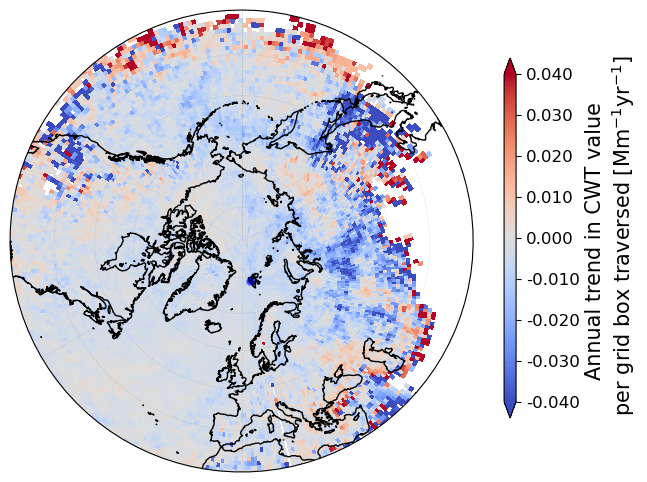

In [12]:
fig = HYplot.circular_plots_array(array_trend, vmin=-0.04, vmax=0.04, cmap='coolwarm', 
               orientation='vertical', colourbar_label="Annual trend in CWT value \n per grid box traversed [Mm$^{-1}$yr$^{-1}$]", 
               colourbar_labelsize=15, colourbar_tick_fontsize=12, decimal_places_colourbar=3,
               scientific_notation=False, axes_projection='North_Stereo', array_projection='rotated_pole', title='',
               extend='both')

# Significance: 

In [13]:
def convert_to_datetime(x):
    x_datetime = datetime(pd.to_datetime(x).year, pd.to_datetime(x).month, pd.to_datetime(x).day)
    return x_datetime

def find_datetime_cols(df):
    cols = df.columns
    mask = [i[:4].isdigit() for i in cols] #isinstance(<var>, int)    
    return cols[mask]

def remove_npnan(x,y):
    x = np.array(x)
    y = np.array(y)
    idx = np.where(~np.isnan(y)) 
    x = x[idx]
    y = y[idx]
    return idx

In [14]:
df_hits_trends_ = df_arrays_hits.loc[:, ~df_arrays_hits.columns.isin(['latitude', 'longitude'])].copy()

for index, row in df_hits_trends_.iterrows():
    x_datetimes = df_hits_trends_.columns
    y0 = datetime.datetime(2002, 6, 1) #convert_to_datetime(x_datetimes[0]) #inital starting time
            
    multi_obs_dts = np.array([y0+timedelta(days=item*365.25) for item in range(len(x_datetimes))])
    multi_obs = row.values #hits for this i,j   
    
    number_npnan = np.count_nonzero(~np.isnan(multi_obs)) 
        
    try:    
        out = mk.mk_temp_aggr(multi_obs_dts, multi_obs, resolution=1, pw_method='3pw', alpha_mk=95)
        print(out[0])
        p = out[0]['p'] #p,robability for the statistical significance. If 3PW is applied,
        ss = out[0]['ss'] #'ss': statistical significance: alpha_MK if the test is ss at the alpha confidence level. 
                          #Defaults to
        slope = out[0]['slope'] #'slope'
    except:
        p = np.nan
        ss = np.nan
        slope = np.nan
        
    df_hits_trends.loc[index, 'p'] = p
    df_hits_trends.loc[index, 'ss'] = ss
    df_hits_trends.loc[index, 'slope'] = slope

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\mannkendall\mk_tools.py:138: RuntimeWarning: invalid value encountered in double_scalars
  var_s += np.nansum(t*(t-1)*(t-2)) * np.nansum(n*(n-1)*(n-2)) / (9*l_real*(l_real-1)*(l_real-2))
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\mannkendall\mk_tools.py:139: RuntimeWarning: invalid value encountered in double_scalars
  var_s += np.nansum(t*(t-1)) * np.nansum(n*(n-1)) / (2*l_real*(l_real-1))
C:\Users\DominicHeslinRees\AppData\Roaming\Python\Python38\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\mannkendall\mk_white.py:94: UserWarning: No statistically significant autocorrelation.
  warnings.warn('No statistically significant autocorrelation.')


{'p': 0.8936946693232326, 'ss': 0, 'slope': -0.0016848003689099937, 'ucl': 0.0016365446189184052, 'lcl': -0.0066965013018252945}
{'p': 0.8169613217153913, 'ss': 0, 'slope': -0.0009852307098464775, 'ucl': 0.0014989616742950317, 'lcl': -0.0034436564154544727}
{'p': 0.03261716087388278, 'ss': 95, 'slope': -0.0018686999610978518, 'ucl': -0.0008058384674472454, 'lcl': -0.00825135488498745}
{'p': 0.02121075414293805, 'ss': 95, 'slope': -0.014136954767172543, 'ucl': -0.004940318790562255, 'lcl': -0.027557217100726658}
{'p': 0.01719911149926623, 'ss': 95, 'slope': -0.007796032554224917, 'ucl': -0.002055669102397528, 'lcl': -0.018466640962811573}
{'p': 0.2328233516916538, 'ss': 0, 'slope': -0.004297197830109369, 'ucl': 0.0005635748341010275, 'lcl': -0.006325509499727231}
{'p': 0.0, 'ss': 95, 'slope': -0.0033909723356172635, 'ucl': -0.0035819028720353936, 'lcl': -0.0035819028720353936}
{'p': 0.0002607296328553943, 'ss': 95, 'slope': -0.009953789797216407, 'ucl': -0.005987070969932869, 'lcl': -0.

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\mannkendall\mk_stats.py:52: RuntimeWarning: divide by zero encountered in true_divide
  return (s - np.sign(s))/var_s**0.5
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\mannkendall\mk_main.py:360: RuntimeWarning: invalid value encountered in double_scalars
  xhomo = np.nansum(z**2) - n_tas * np.nanmean(z)**2


{'p': 0.09945347974830887, 'ss': 0, 'slope': -0.004734187070166481, 'ucl': -0.0005554902578250027, 'lcl': -0.007584986775932975}
{'p': 0.19337316310500352, 'ss': 0, 'slope': 0.002701076066155147, 'ucl': 0.004115950988957046, 'lcl': -0.0008148833508994065}
{'p': 0.0, 'ss': 95, 'slope': -0.00011403193065806504, 'ucl': -0.00011677026656193326, 'lcl': -0.00011677026656193326}
{'p': 0.0, 'ss': 95, 'slope': -0.003937564036282891, 'ucl': -0.003968375500439455, 'lcl': -0.003968375500439455}
{'p': 0.00028861740869579044, 'ss': 95, 'slope': -0.005556120613102277, 'ucl': -0.0037545473923605707, 'lcl': -0.008487443793732286}
{'p': 0.0, 'ss': 95, 'slope': -0.0020851058490308763, 'ucl': -0.0021266158150585234, 'lcl': -0.0021266158150585234}
{'p': 0.15601603599625435, 'ss': 0, 'slope': -0.002670978626597824, 'ucl': 8.315501028718523e-05, 'lcl': -0.0055908049108682025}
{'p': 0.01806265567112675, 'ss': 95, 'slope': -0.0038641709959072526, 'ucl': -0.0012925265400569805, 'lcl': -0.00651787401371964}
{'p'

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\mannkendall\mk_stats.py:52: RuntimeWarning: invalid value encountered in true_divide
  return (s - np.sign(s))/var_s**0.5
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\mannkendall\mk_main.py:55: RuntimeWarning: All-NaN axis encountered
  p = np.nanmax([p_pw, p_tfpw_y])


{'p': 0.8747546027626794, 'ss': 0, 'slope': -7.144260391938665e-05, 'ucl': 0.0011905433922126956, 'lcl': -0.0014834748000456305}
{'p': 4.5612200927358515e-07, 'ss': 95, 'slope': -0.010260110733229142, 'ucl': -0.005409066600697521, 'lcl': -0.01366918567360909}
{'p': 0.0, 'ss': 95, 'slope': -0.005601070733235139, 'ucl': -0.005616663581210749, 'lcl': -0.005616663581210749}
{'p': 1.1324274851176597e-14, 'ss': 95, 'slope': -0.00662288890536619, 'ucl': -0.005636342338783321, 'lcl': -0.010004552549115068}
{'p': 1.0, 'ss': -1, 'slope': -0.005173118516666083, 'ucl': -0.005400199134217559, 'lcl': -0.005400199134217559}
{'p': 0.0, 'ss': 95, 'slope': -0.007318919885751557, 'ucl': -0.007369030858484139, 'lcl': -0.007369030858484139}
{'p': 0.0, 'ss': 95, 'slope': -0.006204608648161963, 'ucl': -0.006305162811042439, 'lcl': -0.006305162811042439}
{'p': 0.0, 'ss': 95, 'slope': -0.007076541893273802, 'ucl': -0.007174234557636727, 'lcl': -0.007174234557636727}
{'p': 0.0, 'ss': 95, 'slope': -0.00460134008

{'p': 0.7649513588724606, 'ss': 0, 'slope': 0.0006993531672416787, 'ucl': 0.004431937316191314, 'lcl': -0.004415395325840531}
{'p': 0.0, 'ss': 95, 'slope': 0.0055312239982032016, 'ucl': 0.005438650274709456, 'lcl': 0.005438650274709456}
{'p': 0.109840007507366, 'ss': 0, 'slope': -0.005778407792394985, 'ucl': -0.00014463017827287338, 'lcl': -0.010812519543933434}
{'p': 1.0, 'ss': 0, 'slope': 8.339353453168337e-05, 'ucl': 0.0020090758029032573, 'lcl': -0.0023023283560262963}
{'p': 0.0, 'ss': 95, 'slope': -0.002562129491989619, 'ucl': -0.002740490311065248, 'lcl': -0.002740490311065248}
{'p': 0.15601603599625435, 'ss': 0, 'slope': -0.003203123870621366, 'ucl': 4.521129828642101e-06, 'lcl': -0.009248418674380728}
{'p': 0.05856230219636904, 'ss': 0, 'slope': -0.003227166801833247, 'ucl': -0.0014564903509909626, 'lcl': -0.004972768536786416}
{'p': 0.0, 'ss': 95, 'slope': 0.0010439581274932406, 'ucl': 0.0009989640755137612, 'lcl': 0.0009989640755137612}
{'p': 0.0, 'ss': 95, 'slope': -0.001140

{'p': 0.0, 'ss': 95, 'slope': -0.004252744598236859, 'ucl': -0.004297601975397648, 'lcl': -0.004297601975397648}
{'p': 0.0, 'ss': 95, 'slope': -0.0038154350175775044, 'ucl': -0.0039218914097224646, 'lcl': -0.0039218914097224646}
{'p': 0.0, 'ss': 95, 'slope': -0.0041603877274049355, 'ucl': -0.004167720310888465, 'lcl': -0.004167720310888465}
{'p': 0.0, 'ss': 95, 'slope': -0.004343179487391029, 'ucl': -0.004562147120164769, 'lcl': -0.004562147120164769}
{'p': 0.0, 'ss': 95, 'slope': -0.010909843847476772, 'ucl': -0.011122542696671667, 'lcl': -0.011122542696671667}
{'p': 0.0023527071595801363, 'ss': 95, 'slope': 0.004689533027442726, 'ucl': 0.006444807308208978, 'lcl': 0.0016985443658033056}
{'p': 0.8464505968765905, 'ss': 0, 'slope': -0.004074923993582604, 'ucl': 0.012487075401607269, 'lcl': -0.036308228956824014}
{'p': 0.12773570410997004, 'ss': 0, 'slope': 0.003564378255208333, 'ucl': 0.005592154087657312, 'lcl': -0.00016403168583434773}
{'p': 0.0965272420205534, 'ss': 0, 'slope': 0.00

{'p': 0.752576276853584, 'ss': 0, 'slope': 0.0006904700383599606, 'ucl': 0.0023384052235059056, 'lcl': -0.0019001685471230875}
{'p': 0.0, 'ss': 95, 'slope': -0.0039464762563325515, 'ucl': -0.0040651652254297035, 'lcl': -0.0040651652254297035}
{'p': 0.0, 'ss': 95, 'slope': -0.004820093803856592, 'ucl': -0.004929857733839163, 'lcl': -0.004929857733839163}
{'p': 0.0005249607187833849, 'ss': 95, 'slope': -0.0035435255712510942, 'ucl': -0.0026319041672817696, 'lcl': -0.0048225879347478535}
{'p': 0.002746072519350218, 'ss': 95, 'slope': -0.002944832708059907, 'ucl': -0.0015549545937114182, 'lcl': -0.005241662578853777}
{'p': 0.040453602956972645, 'ss': 95, 'slope': -0.0021633648088434437, 'ucl': -0.0008886398911700231, 'lcl': -0.003084168370589847}
{'p': 0.0, 'ss': 95, 'slope': -0.0007125475815754588, 'ucl': -0.0007972430562620236, 'lcl': -0.0007972430562620236}
{'p': 0.752576276853584, 'ss': 0, 'slope': -0.00023981906145749638, 'ucl': 0.0011760205064380122, 'lcl': -0.0017257922464840427}
{'

{'p': 0.8193227771513387, 'ss': 0, 'slope': 0.0007484237869064528, 'ucl': 0.004225795155587024, 'lcl': -0.0038688901341978354}
{'p': 0.9237803055238245, 'ss': 0, 'slope': 0.0003368395172680566, 'ucl': 0.004795368103193454, 'lcl': -0.005626993903124045}
{'p': 0.0, 'ss': 95, 'slope': 0.0007544141810824515, 'ucl': 0.0006041364609993331, 'lcl': 0.0006041364609993331}
{'p': 1.0175113888344356e-05, 'ss': 95, 'slope': -0.004692647428569964, 'ucl': -0.0031544804618838314, 'lcl': -0.0063612359625203}
{'p': 0.0, 'ss': 95, 'slope': -0.007897108621333141, 'ucl': -0.007982273894990687, 'lcl': -0.007982273894990687}
{'p': 0.0, 'ss': 95, 'slope': -0.004240736406173808, 'ucl': -0.004346471855506579, 'lcl': -0.004346471855506579}
{'p': 3.5888847449427885e-11, 'ss': 95, 'slope': -0.011130884103567601, 'ucl': -0.004532319310275145, 'lcl': -0.016163470645973545}
{'p': 2.260037727630504e-06, 'ss': 95, 'slope': -0.007582630720988265, 'ucl': -0.003869361313810297, 'lcl': -0.009697608330405123}
{'p': 1.391797

{'p': 0.0, 'ss': 95, 'slope': -0.005321810126512682, 'ucl': -0.005322480719071362, 'lcl': -0.005322480719071362}
{'p': 0.0, 'ss': 95, 'slope': -0.004320219726983376, 'ucl': -0.004393897241529469, 'lcl': -0.004393897241529469}
{'p': 0.0, 'ss': 95, 'slope': -0.004459511748130321, 'ucl': -0.004469499427839459, 'lcl': -0.004469499427839459}
{'p': 0.0, 'ss': 95, 'slope': -0.005631703495548899, 'ucl': -0.005645662239384139, 'lcl': -0.005645662239384139}
{'p': 0.0, 'ss': 95, 'slope': -0.007873782159199543, 'ucl': -0.00790383248507304, 'lcl': -0.00790383248507304}
{'p': 0.0, 'ss': 95, 'slope': 0.0016018419591266881, 'ucl': 0.0009296855963693962, 'lcl': 0.0009296855963693962}
{'p': 0.7350128913948084, 'ss': 0, 'slope': 0.001347755833675987, 'ucl': 0.005193229348469829, 'lcl': -0.006881724298388525}
{'p': 0.9407482722760154, 'ss': 0, 'slope': -0.0005111060715716386, 'ucl': 0.0018285410902325763, 'lcl': -0.003418323920702192}
{'p': 0.907868500949536, 'ss': 0, 'slope': 0.0010715694262215544, 'ucl'

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1202: RuntimeWarning: divide by zero encountered in double_scalars
  phi[k, k] = (
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1206: RuntimeWarning: invalid value encountered in double_scalars
  phi[j, k] = phi[j, k - 1] - phi[k, k] * phi[k - j, k - 1]
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1207: RuntimeWarning: invalid value encountered in double_scalars
  sig[k] = sig[k - 1] * (1 - phi[k, k] ** 2)


{'p': 0.20731726000099426, 'ss': 0, 'slope': 0.0023310692284646585, 'ucl': 0.005503128386978849, 'lcl': -0.00033051987559353505}
{'p': 0.0, 'ss': 95, 'slope': -0.0007732209383615522, 'ucl': -0.001203636302069056, 'lcl': -0.001203636302069056}
{'p': 0.0005249607187833849, 'ss': 95, 'slope': -0.004459771122808799, 'ucl': -0.002187780922702257, 'lcl': -0.006406118011807895}
{'p': 0.0, 'ss': 95, 'slope': -0.0007694437210688243, 'ucl': -0.0008364323890661619, 'lcl': -0.0008364323890661619}
{'p': 0.0, 'ss': 95, 'slope': -0.008877401723882275, 'ucl': -0.008926898897251357, 'lcl': -0.008926898897251357}
{'p': 8.12943148258416e-05, 'ss': 95, 'slope': -0.006986946199683693, 'ucl': -0.004308276764873354, 'lcl': -0.011180805647550581}
{'p': 1.0, 'ss': -1, 'slope': 0.0033204293027829838, 'ucl': 0.024714019830052315, 'lcl': -0.02850155575745907}
{'p': 0.0, 'ss': 95, 'slope': -0.008703519943173199, 'ucl': -0.00875653678675603, 'lcl': -0.00875653678675603}
{'p': 1.0298362163041475e-10, 'ss': 95, 'slop

{'p': 1.0, 'ss': 0, 'slope': -0.0006301153273809534, 'ucl': 0.0071086622535625685, 'lcl': -0.005700665729738465}
{'p': 0.39746227080458185, 'ss': 0, 'slope': -0.003774146238962809, 'ucl': 0.007248023786091587, 'lcl': -0.015664901438716763}
{'p': 0.0, 'ss': 95, 'slope': 0.008185756120705996, 'ucl': 0.00792719299728806, 'lcl': 0.00792719299728806}
{'p': 0.5040358664525049, 'ss': 0, 'slope': 0.0020811931261884398, 'ucl': 0.011278049033082613, 'lcl': -0.00862298118757406}
{'p': 0.4896602630171414, 'ss': 0, 'slope': 0.003414154853864698, 'ucl': 0.03063404382774583, 'lcl': -0.0012556422945701792}
{'p': 0.45115160024440004, 'ss': 0, 'slope': -0.0059774089614827546, 'ucl': 0.013307420206197195, 'lcl': -0.0695096182524984}
{'p': 0.4917619464040863, 'ss': 0, 'slope': 0.0035352284597904944, 'ucl': 0.009567941176361942, 'lcl': -0.008690899119916584}
{'p': 0.14157886335524372, 'ss': 0, 'slope': -0.010081730769230768, 'ucl': -0.001330675292983195, 'lcl': -0.030319120268286294}
{'p': 0.63558612227876

{'p': 1.0175113888344356e-05, 'ss': 95, 'slope': -0.005705378915618381, 'ucl': -0.004300204506839938, 'lcl': -0.009221552398206169}
{'p': 0.0, 'ss': 95, 'slope': -0.0016537264849961438, 'ucl': -0.0016881805886555885, 'lcl': -0.0016881805886555885}
{'p': 0.0045511455518534305, 'ss': 95, 'slope': -0.0042066673363517475, 'ucl': -0.0017953317009175894, 'lcl': -0.006630600875753562}
{'p': 0.269873217779931, 'ss': 0, 'slope': -0.0003575125776884571, 'ucl': 3.8381633693911897e-05, 'lcl': -0.0019914969887008024}
{'p': 0.20731726000099426, 'ss': 0, 'slope': 0.0004967139433238246, 'ucl': 0.0019376635882931148, 'lcl': -0.0002332687405478302}
{'p': 0.00028861740869579044, 'ss': 95, 'slope': 0.003279472647361384, 'ucl': 0.0044466640102673646, 'lcl': 0.0015215364642442765}
{'p': 0.11667744915847056, 'ss': 0, 'slope': -0.0016743349053896172, 'ucl': -4.5449290525609414e-05, 'lcl': -0.003324458147636033}
{'p': 0.0, 'ss': 95, 'slope': -0.0038568951101587675, 'ucl': -0.0039046276926729484, 'lcl': -0.0039

{'p': 0.344285047862368, 'ss': 0, 'slope': -0.0014613347146604887, 'ucl': 0.00037925771205415536, 'lcl': -0.00435254366826193}
{'p': 0.0005249607187833849, 'ss': 95, 'slope': -0.006092990098479366, 'ucl': -0.0034808295697408066, 'lcl': -0.009352490249779416}
{'p': 0.01806265567112675, 'ss': 95, 'slope': -0.00444655655811485, 'ucl': -0.0009063635975523691, 'lcl': -0.007910768918936937}
{'p': 0.0, 'ss': 95, 'slope': -0.00888852294157642, 'ucl': -0.009128745200815807, 'lcl': -0.009128745200815807}
{'p': 0.0, 'ss': 95, 'slope': -0.01618740600820898, 'ucl': -0.01619908836125312, 'lcl': -0.01619908836125312}
{'p': 0.0, 'ss': 95, 'slope': -0.003177877920791924, 'ucl': -0.0032150146822877246, 'lcl': -0.0032150146822877246}
{'p': 0.0, 'ss': 95, 'slope': -0.0023542500022987853, 'ucl': -0.0024172167576209827, 'lcl': -0.0024172167576209827}
{'p': 0.0, 'ss': 95, 'slope': -0.0009961431757751138, 'ucl': -0.0010789716874462327, 'lcl': -0.0010789716874462327}
{'p': 0.0, 'ss': 95, 'slope': -0.0028734736

{'p': 0.10374167823654146, 'ss': 0, 'slope': 0.005186461915307001, 'ucl': 0.011920568269105201, 'lcl': -0.00047174524790884924}
{'p': 0.31530245208174557, 'ss': 0, 'slope': -0.001682912973257211, 'ucl': 0.00047326455375734183, 'lcl': -0.005247491791654876}
{'p': 0.06407750645105947, 'ss': 0, 'slope': -0.0036910634909944583, 'ucl': -0.0018945048877411336, 'lcl': -0.008601984515459545}
{'p': 0.6434288435636204, 'ss': 0, 'slope': -0.003146865406336886, 'ucl': 0.00328762070317309, 'lcl': -0.01005610557430782}
{'p': 0.0015565730248836562, 'ss': 95, 'slope': 0.01895008765326606, 'ucl': 0.029212148557770476, 'lcl': 0.004987370759538235}
{'p': 1.0, 'ss': 0, 'slope': -0.0003125046088041714, 'ucl': 0.007740731909701296, 'lcl': -0.011752850359779564}
{'p': 0.20720691940998304, 'ss': 0, 'slope': 0.006368929564263605, 'ucl': 0.015824626378749495, 'lcl': -0.0013947401996658466}
{'p': 0.36131042852617856, 'ss': 0, 'slope': 0.0036170340469971894, 'ucl': 0.011528368753580067, 'lcl': -0.0021914680159126

{'p': 0.0014098628990055762, 'ss': 95, 'slope': -0.006797288859532896, 'ucl': -0.003100485855572204, 'lcl': -0.012040447514427833}
{'p': 0.0, 'ss': 95, 'slope': -0.0057124044341074, 'ucl': -0.005839389270900091, 'lcl': -0.005839389270900091}
{'p': 0.01806265567112675, 'ss': 95, 'slope': -0.0034026556754078643, 'ucl': -0.0012199957165402564, 'lcl': -0.0073323417731009114}
{'p': 0.0, 'ss': 95, 'slope': -0.003700843440366806, 'ucl': -0.0037075704695150448, 'lcl': -0.0037075704695150448}
{'p': 0.20731726000099426, 'ss': 0, 'slope': -0.002446313219655743, 'ucl': 0.0002752928817883953, 'lcl': -0.0043053780464345145}
{'p': 0.0, 'ss': 95, 'slope': 0.003083951337676033, 'ucl': 0.0030534930712201127, 'lcl': 0.0030534930712201127}
{'p': 0.0, 'ss': 95, 'slope': 0.004524653722397164, 'ucl': 0.00443638392976249, 'lcl': 0.00443638392976249}
{'p': 0.269873217779931, 'ss': 0, 'slope': 0.00027307194966301815, 'ucl': 0.0010956525602517234, 'lcl': -0.0008036777891895425}
{'p': 0.0, 'ss': 95, 'slope': -0.0

{'p': 0.20975288496736066, 'ss': 0, 'slope': -0.0019848080563832056, 'ucl': 0.00138020216886638, 'lcl': -0.006621769202415727}
{'p': 0.752576276853584, 'ss': 0, 'slope': 0.0005625015488758961, 'ucl': 0.005376443331217619, 'lcl': -0.0022555233265449523}
{'p': 0.0, 'ss': 95, 'slope': 0.006002913598089936, 'ucl': 0.005874336956164054, 'lcl': 0.005874336956164054}
{'p': 0.0, 'ss': 95, 'slope': -0.002364024415224433, 'ucl': -0.002794330342804097, 'lcl': -0.002794330342804097}
{'p': 0.11497492369307993, 'ss': 0, 'slope': -0.00266414579007012, 'ucl': -0.00012624772527040562, 'lcl': -0.0064729443309642296}
{'p': 0.0, 'ss': 95, 'slope': -0.004625933478676209, 'ucl': -0.004733739066023543, 'lcl': -0.004733739066023543}
{'p': 0.5283751389681013, 'ss': 0, 'slope': -0.001111734081440754, 'ucl': 0.0010505423384046433, 'lcl': -0.004441040312922779}
{'p': 0.00028861740869579044, 'ss': 95, 'slope': -0.005203416437806627, 'ucl': -0.00344112768489619, 'lcl': -0.0077527433744101855}
{'p': 0.00015499304520

{'p': 0.0, 'ss': 95, 'slope': 0.0012482167079313241, 'ucl': 0.0010174031160315687, 'lcl': 0.0010174031160315687}
{'p': 0.0, 'ss': 95, 'slope': 0.0033664527278729327, 'ucl': 0.0032631058998295825, 'lcl': 0.0032631058998295825}
{'p': 0.0, 'ss': 95, 'slope': -0.002538848217368691, 'ucl': -0.002616258133455331, 'lcl': -0.002616258133455331}
{'p': 0.01421916755825392, 'ss': 95, 'slope': 0.006701385953800278, 'ucl': 0.010733444488518961, 'lcl': 0.003229382542011603}
{'p': 0.0, 'ss': 95, 'slope': 0.0014117607371757124, 'ucl': 0.001383315461093855, 'lcl': 0.001383315461093855}
{'p': 0.8747546027626794, 'ss': 0, 'slope': 0.00045146712919038603, 'ucl': 0.005715458842821574, 'lcl': -0.002581102200780868}
{'p': 0.4938907046832697, 'ss': 0, 'slope': -0.0015983291267178165, 'ucl': 0.0023847848493422775, 'lcl': -0.00593212648474332}
{'p': 1.0, 'ss': 0, 'slope': -0.0004345779043057393, 'ucl': 0.005811176601933918, 'lcl': -0.00882648719985017}
{'p': 0.344285047862368, 'ss': 0, 'slope': 0.00246711774122

{'p': 0.0, 'ss': 95, 'slope': -0.003187419575565472, 'ucl': -0.0032509788309042238, 'lcl': -0.0032509788309042238}
{'p': 0.0, 'ss': 95, 'slope': -0.0033795528390194937, 'ucl': -0.0034533177990263603, 'lcl': -0.0034533177990263603}
{'p': 0.0, 'ss': 95, 'slope': -0.0006595516151864859, 'ucl': -0.0007070493517683578, 'lcl': -0.0007070493517683578}
{'p': 0.269873217779931, 'ss': 0, 'slope': -0.0006616598898816314, 'ucl': 0.0002794200054151762, 'lcl': -0.002002329440746177}
{'p': 0.0009327473930902386, 'ss': 95, 'slope': -0.0038606933237141203, 'ucl': -0.0018891287392128811, 'lcl': -0.006084578943475414}
{'p': 0.0, 'ss': 95, 'slope': -0.002212867084126488, 'ucl': -0.0022212414641637223, 'lcl': -0.0022212414641637223}
{'p': 0.0, 'ss': 95, 'slope': -0.003356297645479224, 'ucl': -0.003358609706965604, 'lcl': -0.003358609706965604}
{'p': 0.0, 'ss': 95, 'slope': -0.0031921523208360307, 'ucl': -0.0032292759660906044, 'lcl': -0.0032292759660906044}
{'p': 0.0, 'ss': 95, 'slope': -0.0031733024068288

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\mannkendall\mk_white.py:163: RuntimeWarning: divide by zero encountered in true_divide
  data_pw['pw_cor'] = data_ar_removed/(1-c_dict['pw'])
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\mannkendall\mk_stats.py:170: RuntimeWarning: invalid value encountered in subtract
  sij[yr_ind] = np.nansum([np.sign(item - obs[obs_years == year])
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\mannkendall\mk_stats.py:90: RuntimeWarning: invalid value encountered in subtract
  for item in list((obs[i+1:l] - obs[i])/mkt.dt_to_s(obs_dts[i+1:l] - obs_dts[i]))])


{'p': 0.8196115781195024, 'ss': 0, 'slope': -0.0009571687773341541, 'ucl': 0.0022115324003191728, 'lcl': -0.004833786661560301}
{'p': 0.6363086093642671, 'ss': 0, 'slope': 0.0011334933888948093, 'ucl': 0.004220403769074879, 'lcl': -0.0015692896518194723}
{'p': 0.0, 'ss': 95, 'slope': 0.0015243083954276206, 'ucl': 0.0014535641316410213, 'lcl': 0.0014535641316410213}
{'p': 0.0, 'ss': 95, 'slope': 0.0024859165680926605, 'ucl': 0.002318000110922525, 'lcl': 0.002318000110922525}
{'p': 2.103072160863917e-09, 'ss': 95, 'slope': -0.00638326560901142, 'ucl': -0.004452547239408335, 'lcl': -0.007961463026243114}
{'p': 0.11497492369307993, 'ss': 0, 'slope': -0.0028558827925409085, 'ucl': -8.170336092012014e-05, 'lcl': -0.006234871129493289}
{'p': 0.0, 'ss': 95, 'slope': -0.009635120390501113, 'ucl': -0.009691219596743373, 'lcl': -0.009691219596743373}
{'p': 0.0, 'ss': 95, 'slope': -0.004988946958037826, 'ucl': -0.005128944752706883, 'lcl': -0.005128944752706883}
{'p': 0.0, 'ss': 95, 'slope': -0.00

{'p': 0.0, 'ss': 95, 'slope': 0.0011114095422459158, 'ucl': 0.0008849374410597857, 'lcl': 0.0008849374410597857}
{'p': 0.08720405349047544, 'ss': 0, 'slope': -0.003275844861597249, 'ucl': -0.0006361814144968885, 'lcl': -0.007690182187060257}
{'p': 0.0045511455518534305, 'ss': 95, 'slope': -0.004114872547597764, 'ucl': -0.0017446733981111241, 'lcl': -0.007085689067826065}
{'p': 0.269873217779931, 'ss': 0, 'slope': -0.0008002948668749, 'ucl': 0.00047485016605959383, 'lcl': -0.0018781979948467007}
{'p': 0.6363086093642671, 'ss': 0, 'slope': -0.0009163728158095741, 'ucl': 0.0011960991259126344, 'lcl': -0.004794319681922966}
{'p': 0.0, 'ss': 95, 'slope': -0.001439074912243675, 'ucl': -0.0017522463778027685, 'lcl': -0.0017522463778027685}
{'p': 0.0, 'ss': 95, 'slope': -0.002831640369305274, 'ucl': -0.0028348363063526527, 'lcl': -0.0028348363063526527}
{'p': 0.0, 'ss': 95, 'slope': -0.0038824857103650773, 'ucl': -0.0039006769745383173, 'lcl': -0.0039006769745383173}
{'p': 0.01806265567112675,

{'p': 0.00028861740869579044, 'ss': 95, 'slope': 0.004648315310416248, 'ucl': 0.007817011109720735, 'lcl': 0.0022800772948701957}
{'p': 0.01806265567112675, 'ss': 95, 'slope': -0.004074575281504678, 'ucl': -0.0013905076191572123, 'lcl': -0.008569981615857201}
{'p': 0.0, 'ss': 95, 'slope': -0.004318414050066814, 'ucl': -0.0044464324700955815, 'lcl': -0.0044464324700955815}
{'p': 1.976559615979312e-07, 'ss': 95, 'slope': -0.006656091180328586, 'ucl': -0.004781598001718801, 'lcl': -0.009865152820509425}
{'p': 0.0, 'ss': 95, 'slope': -0.001696885811491883, 'ucl': -0.0017061039745741974, 'lcl': -0.0017061039745741974}
{'p': 0.0009327473930902386, 'ss': 95, 'slope': -0.007399210768788153, 'ucl': -0.0028818953464046734, 'lcl': -0.011549806323957627}
{'p': 0.0, 'ss': 95, 'slope': -0.0026198572647405673, 'ucl': -0.002786392769992225, 'lcl': -0.002786392769992225}
{'p': 0.43063212878824864, 'ss': 0, 'slope': -0.0013783868199544497, 'ucl': 0.0009502809560541255, 'lcl': -0.003523350630095069}
{'p'

{'p': 0.752576276853584, 'ss': 0, 'slope': 0.0005220709549409001, 'ucl': 0.004037649359069148, 'lcl': -0.0033827171031108084}
{'p': 0.02733438646050379, 'ss': 95, 'slope': -0.004175792170341169, 'ucl': -0.0005355561716977299, 'lcl': -0.006991013797282278}
{'p': 8.12943148258416e-05, 'ss': 95, 'slope': -0.006265821241067377, 'ucl': -0.003563151219649808, 'lcl': -0.0069956284429645325}
{'p': 0.0, 'ss': 95, 'slope': -0.002699947108004799, 'ucl': -0.0030009280100753008, 'lcl': -0.0030009280100753008}
{'p': 0.01806265567112675, 'ss': 95, 'slope': -0.0038723379464343315, 'ucl': -0.0020508376675557076, 'lcl': -0.007885622052230121}
{'p': 1.027566746580888e-06, 'ss': 95, 'slope': -0.008410473439226423, 'ucl': -0.005145772173589226, 'lcl': -0.011805406256112996}
{'p': 0.0, 'ss': 95, 'slope': -0.006934150346949234, 'ucl': -0.006972764749695319, 'lcl': -0.006972764749695319}
{'p': 0.040453602956972645, 'ss': 95, 'slope': -0.001534425874544792, 'ucl': -0.00064859049557555, 'lcl': -0.00317142624707

{'p': 0.752576276853584, 'ss': 0, 'slope': 0.001437261178689719, 'ucl': 0.003389057149393553, 'lcl': -0.0016356266753029072}
{'p': 0.15601603599625435, 'ss': 0, 'slope': -0.004007730343914237, 'ucl': 5.3932439053336586e-05, 'lcl': -0.009240320869329117}
{'p': 0.752576276853584, 'ss': 0, 'slope': -0.0013219551423021222, 'ucl': 0.001342086073623677, 'lcl': -0.004859713773206439}
{'p': 0.0, 'ss': 95, 'slope': -0.0060374834668327345, 'ucl': -0.006052236771632298, 'lcl': -0.006052236771632298}
{'p': 0.15601603599625435, 'ss': 0, 'slope': -0.002780390903822241, 'ucl': 6.510261352409144e-05, 'lcl': -0.005268979214990512}
{'p': 0.008728400149381699, 'ss': 95, 'slope': -0.006995955768610371, 'ucl': -0.00218037414883092, 'lcl': -0.011096305251122141}
{'p': 0.01806265567112675, 'ss': 95, 'slope': -0.004583744265384729, 'ucl': -0.001975377638376585, 'lcl': -0.009181194782532761}
{'p': 0.20731726000099426, 'ss': 0, 'slope': -0.0010585566890138655, 'ucl': 5.213907013696754e-05, 'lcl': -0.00287067928

{'p': 0.10530536515800137, 'ss': 0, 'slope': -0.013042747992193161, 'ucl': -0.0003395680788715861, 'lcl': -0.024704718481158582}
{'p': 0.0016191119156048206, 'ss': 95, 'slope': 0.0053821718727601565, 'ucl': 0.008980867027314411, 'lcl': 0.002057134624444216}
{'p': 0.002746072519350218, 'ss': 95, 'slope': -0.008075667751197696, 'ucl': -0.005866318417139389, 'lcl': -0.01434899561119015}
{'p': 0.0016191119156048206, 'ss': 95, 'slope': -0.00612572967418376, 'ucl': -0.0025412970250423433, 'lcl': -0.00850551408131489}
{'p': 0.0009441995905794531, 'ss': 95, 'slope': -0.013427643563137323, 'ucl': -0.00492311997136475, 'lcl': -0.021622504257862492}
{'p': 1.976559615979312e-07, 'ss': 95, 'slope': -0.008778527286698508, 'ucl': -0.005288625929068595, 'lcl': -0.012018021339637093}
{'p': 0.0045511455518534305, 'ss': 95, 'slope': -0.007405902674567824, 'ucl': -0.002608989371351636, 'lcl': -0.010546385881194187}
{'p': 0.006125378348068811, 'ss': 95, 'slope': -0.008697711779784076, 'ucl': -0.00339951287

{'p': 0.344285047862368, 'ss': 0, 'slope': -0.002308863554589697, 'ucl': 0.0008848705475705798, 'lcl': -0.006930426312322034}
{'p': 2.940767767967145e-06, 'ss': 95, 'slope': -0.015479517437072779, 'ucl': -0.009864373460450005, 'lcl': -0.02338706422326039}
{'p': 7.36103885867756e-06, 'ss': 95, 'slope': -0.01509018942154659, 'ucl': -0.0089470356896228, 'lcl': -0.027831031958396854}
{'p': 1.31250565971186e-12, 'ss': 95, 'slope': -0.012536205763690276, 'ucl': -0.010581187149400217, 'lcl': -0.016119307980339108}
{'p': 0.0030309678640338955, 'ss': 95, 'slope': -0.01056147981039315, 'ucl': -0.004077789266113887, 'lcl': -0.01361624456758263}
{'p': 0.6477916648293116, 'ss': 0, 'slope': -0.001111779121313914, 'ucl': 0.0021842475094057683, 'lcl': -0.004427760220437704}
{'p': 0.0, 'ss': 95, 'slope': -0.005558743156292624, 'ucl': -0.005807834428276834, 'lcl': -0.005807834428276834}
{'p': 0.002746072519350218, 'ss': 95, 'slope': -0.002949055548618759, 'ucl': -0.0013968209287148635, 'lcl': -0.0049376

{'p': 0.11497492369307993, 'ss': 0, 'slope': -0.0026665465771226575, 'ucl': -2.1409399070335274e-05, 'lcl': -0.006657037928372378}
{'p': 2.260037727630504e-06, 'ss': 95, 'slope': -0.011196942836194585, 'ucl': -0.007075035188114706, 'lcl': -0.01591153583739985}
{'p': 6.407403816055535e-05, 'ss': 95, 'slope': -0.011768473401032797, 'ucl': -0.008186461902933099, 'lcl': -0.014785029598221412}
{'p': 0.7539253164932289, 'ss': 0, 'slope': 0.013649628770874918, 'ucl': 0.04636152831493147, 'lcl': -0.04812231151478327}
{'p': 1.2789769243681803e-13, 'ss': 95, 'slope': -0.018807340151637042, 'ucl': -0.014099554805860311, 'lcl': -0.021446391695907664}
{'p': 0.0, 'ss': 95, 'slope': -0.0028401927496113566, 'ucl': -0.002955240469828585, 'lcl': -0.002955240469828585}
{'p': 0.0, 'ss': 95, 'slope': 0.0017869426251141728, 'ucl': 0.001724027633692061, 'lcl': 0.001724027633692061}
{'p': 0.0, 'ss': 95, 'slope': -0.002814747821838223, 'ucl': -0.0028604624041408027, 'lcl': -0.0028604624041408027}
{'p': 0.0, 's

{'p': 0.0001549930452056092, 'ss': 95, 'slope': -0.004058392724721398, 'ucl': -0.0023853633536523953, 'lcl': -0.009021085434566017}
{'p': 0.0, 'ss': 95, 'slope': -0.0042220558208375635, 'ucl': -0.004532729158176354, 'lcl': -0.004532729158176354}
{'p': 1.0175113888344356e-05, 'ss': 95, 'slope': -0.007416009598428255, 'ucl': -0.003908826451906828, 'lcl': -0.010355095171384452}
{'p': 8.36140590099177e-08, 'ss': 95, 'slope': -0.009794351936814667, 'ucl': -0.006933578167263213, 'lcl': -0.013906611429069486}
{'p': 0.0, 'ss': 95, 'slope': -0.0064355059271707475, 'ucl': -0.006628294829025092, 'lcl': -0.006628294829025092}
{'p': 0.0, 'ss': 95, 'slope': 0.000879212591392264, 'ucl': 0.0008510611238141605, 'lcl': 0.0008510611238141605}
{'p': 0.0, 'ss': 95, 'slope': -0.002260565599320896, 'ucl': -0.0023148880582235386, 'lcl': -0.0023148880582235386}
{'p': 0.0, 'ss': 95, 'slope': -0.0012156425461790276, 'ucl': -0.0012326014231653381, 'lcl': -0.0012326014231653381}
{'p': 0.0, 'ss': 95, 'slope': -0.00

{'p': 0.02733438646050379, 'ss': 95, 'slope': -0.004975843775269893, 'ucl': -0.0013014426151639349, 'lcl': -0.011205364003210988}
{'p': 0.5043399425682065, 'ss': 0, 'slope': -0.006113546045732577, 'ucl': 0.0042250375254180095, 'lcl': -0.016409459506590483}
{'p': 0.01664448831953158, 'ss': 95, 'slope': -0.007848395785495307, 'ucl': -0.003998326753644811, 'lcl': -0.015855161129788724}
{'p': 0.00028861740869579044, 'ss': 95, 'slope': -0.008284214507788046, 'ucl': -0.0045253788687863615, 'lcl': -0.010330813112332558}
{'p': 2.0830639448687904e-05, 'ss': 95, 'slope': -0.010688825788980956, 'ucl': -0.006503248790439021, 'lcl': -0.013011667111553686}
{'p': 0.11497492369307993, 'ss': 0, 'slope': -0.003514295658838025, 'ucl': -0.0003074919160612335, 'lcl': -0.009901815435567788}
{'p': 0.6363086093642671, 'ss': 0, 'slope': -0.0008014894704011086, 'ucl': 0.0011968664548031621, 'lcl': -0.0028590927976143692}
{'p': 0.0009327473930902386, 'ss': 95, 'slope': -0.004226150053242372, 'ucl': -0.0024912046

{'p': 0.0, 'ss': 95, 'slope': -0.00986257201435089, 'ucl': -0.005627292793020663, 'lcl': -0.014590329060505282}
{'p': 0.0, 'ss': 95, 'slope': -0.005903967336756019, 'ucl': -0.006246149597536538, 'lcl': -0.006246149597536538}
{'p': 0.4573905431688554, 'ss': 0, 'slope': -0.0025191842022936903, 'ucl': 0.0010299795014170187, 'lcl': -0.006066225609844809}
{'p': 0.010475027211696908, 'ss': 95, 'slope': -0.005748519003715593, 'ucl': -0.002653682283198977, 'lcl': -0.009180471942074662}
{'p': 1.0, 'ss': 0, 'slope': -0.00021605350975196597, 'ucl': 0.0026586356594996588, 'lcl': -0.002807332012659126}
{'p': 0.0, 'ss': 95, 'slope': 0.007793117237846281, 'ucl': 0.007445510306988895, 'lcl': 0.007445510306988895}
{'p': 0.0, 'ss': 95, 'slope': 0.0047893580539691855, 'ucl': 0.004618179012548472, 'lcl': 0.004618179012548472}
{'p': 0.20731726000099426, 'ss': 0, 'slope': 0.002620193171774477, 'ucl': 0.005593191935755211, 'lcl': -0.0005807224506694143}
{'p': 0.0, 'ss': 95, 'slope': 0.007248278872271055, 'uc

{'p': 4.051647906067046e-12, 'ss': 95, 'slope': -0.008111543772611326, 'ucl': -0.006686822894102735, 'lcl': -0.011036880112780773}
{'p': 1.027566746580888e-06, 'ss': 95, 'slope': -0.005189553020701563, 'ucl': -0.003934695291930923, 'lcl': -0.007090928574498266}
{'p': 0.0, 'ss': 95, 'slope': -0.005590709355028716, 'ucl': -0.005830197370815137, 'lcl': -0.005830197370815137}
{'p': 0.0, 'ss': 95, 'slope': -0.003957715338533358, 'ucl': -0.004124023533444272, 'lcl': -0.004124023533444272}
{'p': 0.0, 'ss': 95, 'slope': -0.0026447793173812457, 'ucl': -0.0027653379841528387, 'lcl': -0.0027653379841528387}
{'p': 0.0, 'ss': 95, 'slope': -0.002179223039817213, 'ucl': -0.0021883707602441006, 'lcl': -0.0021883707602441006}
{'p': 0.0, 'ss': 95, 'slope': -0.0013570473966150439, 'ucl': -0.0013858334328614012, 'lcl': -0.0013858334328614012}
{'p': 0.0, 'ss': 95, 'slope': -0.0017789318046923367, 'ucl': -0.0018147440254423104, 'lcl': -0.0018147440254423104}
{'p': 0.0, 'ss': 95, 'slope': -0.0028471348279443

{'p': 0.0, 'ss': 95, 'slope': -0.013782006265918545, 'ucl': -0.013930703249900032, 'lcl': -0.013930703249900032}
{'p': 0.0001549930452056092, 'ss': 95, 'slope': -0.01657233437551652, 'ucl': -0.00945223824363208, 'lcl': -0.023768695111897057}
{'p': 0.0004002785783510099, 'ss': 95, 'slope': -0.01721117382502555, 'ucl': -0.0072329044106312305, 'lcl': -0.02825926667654198}
{'p': 0.0008542408071556817, 'ss': 95, 'slope': -0.023945867300539478, 'ucl': -0.009941633947601993, 'lcl': -0.03812743879050717}
{'p': 0.0001549930452056092, 'ss': 95, 'slope': -0.014536457168124987, 'ucl': -0.009157130835291918, 'lcl': -0.02111998986676449}
{'p': 0.5283751389681013, 'ss': 0, 'slope': -0.0012958512492641165, 'ucl': 0.0011951303899946234, 'lcl': -0.003294151389711521}
{'p': 0.0, 'ss': 95, 'slope': 0.002837499834439358, 'ucl': 0.0028180103177493673, 'lcl': 0.0028180103177493673}
{'p': 0.344285047862368, 'ss': 0, 'slope': -0.0018261081376064938, 'ucl': 0.002161560255965438, 'lcl': -0.004591521751187014}
{'

{'p': 0.0, 'ss': 95, 'slope': -0.009139734501528761, 'ucl': -0.009160254405120022, 'lcl': -0.009160254405120022}
{'p': 0.0, 'ss': 95, 'slope': -0.00987325508871055, 'ucl': -0.009895662150371125, 'lcl': -0.009895662150371125}
{'p': 0.0824778874732095, 'ss': 0, 'slope': -0.017175608667834043, 'ucl': -0.0014920485732883315, 'lcl': -0.030404576297813984}
{'p': 0.0, 'ss': 95, 'slope': -0.004884840820011178, 'ucl': -0.005682614989631727, 'lcl': -0.005682614989631727}
{'p': 0.9309012350403778, 'ss': 0, 'slope': 5.907825891836155e-05, 'ucl': 0.007616046242458974, 'lcl': -0.009268358957318373}
{'p': 0.0, 'ss': 95, 'slope': 0.004232730865480997, 'ucl': 0.003934467449436391, 'lcl': 0.003934467449436391}
{'p': 0.0575431142774816, 'ss': 0, 'slope': 0.0035935637903026624, 'ucl': 0.006592999763980725, 'lcl': 0.00012329851308903332}
{'p': 0.21549950906932702, 'ss': 0, 'slope': -0.004234654377062822, 'ucl': 0.0002950356028358857, 'lcl': -0.010921436376179386}
{'p': 0.11041912780190621, 'ss': 0, 'slope'

{'p': 0.0, 'ss': 95, 'slope': -0.007986972918194914, 'ucl': -0.00811649566204811, 'lcl': -0.00811649566204811}
{'p': 0.0, 'ss': 95, 'slope': -0.0016034103006265811, 'ucl': -0.0016130649189249563, 'lcl': -0.0016130649189249563}
{'p': 0.0, 'ss': 95, 'slope': -0.006502351136183806, 'ucl': -0.0067040292854441096, 'lcl': -0.0067040292854441096}
{'p': 0.0, 'ss': 95, 'slope': -0.008477132582830048, 'ucl': -0.008499376481091388, 'lcl': -0.008499376481091388}
{'p': 0.0, 'ss': 95, 'slope': -0.012179014313344791, 'ucl': -0.012479420575962196, 'lcl': -0.012479420575962196}
{'p': 0.0, 'ss': 95, 'slope': -0.0057444786762627905, 'ucl': -0.005975407545680369, 'lcl': -0.005975407545680369}
{'p': 0.0, 'ss': 95, 'slope': -0.0017879259046999975, 'ucl': -0.001807327610409999, 'lcl': -0.001807327610409999}
{'p': 0.0, 'ss': 95, 'slope': -0.003914924725041998, 'ucl': -0.003924817511833904, 'lcl': -0.003924817511833904}
{'p': 0.0, 'ss': 95, 'slope': -0.003015308036395657, 'ucl': -0.00307020227661359, 'lcl': -0

{'p': 0.15601603599625435, 'ss': 0, 'slope': -0.011017426175824688, 'ucl': 0.0002764463128244812, 'lcl': -0.014700268009356771}
{'p': 0.0011424127353503177, 'ss': 95, 'slope': -0.02969088358164599, 'ucl': -0.016584242826371724, 'lcl': -0.04181652980882022}
{'p': 2.382015041058061e-05, 'ss': 95, 'slope': -0.02284886720449482, 'ucl': -0.016385675761270913, 'lcl': -0.030467021531029807}
{'p': 0.00010585756079972697, 'ss': 95, 'slope': -0.029988687023202766, 'ucl': -0.014352309334197764, 'lcl': -0.04057646994650728}
{'p': 0.20975288496736066, 'ss': 0, 'slope': -0.003941241357391261, 'ucl': 0.002439611505042454, 'lcl': -0.010927432094253503}
{'p': 0.11497492369307993, 'ss': 0, 'slope': 0.0022938129176469702, 'ucl': 0.005025439411964552, 'lcl': -0.00032757412636139337}
{'p': 0.0, 'ss': 95, 'slope': -0.005438907316115019, 'ucl': -0.005575274838270619, 'lcl': -0.005575274838270619}
{'p': 0.0045511455518534305, 'ss': 95, 'slope': -0.005236813672924595, 'ucl': -0.0017626930686583902, 'lcl': -0.0

{'p': 0.0, 'ss': 95, 'slope': -0.005152396312723004, 'ucl': -0.00517974755896267, 'lcl': -0.00517974755896267}
{'p': 0.0, 'ss': 95, 'slope': -0.009368400674845177, 'ucl': -0.009632169844457653, 'lcl': -0.009632169844457653}
{'p': 0.0, 'ss': 95, 'slope': -0.009282983842011351, 'ucl': -0.00928824740412669, 'lcl': -0.00928824740412669}
{'p': 0.0, 'ss': 95, 'slope': -0.019982141821664114, 'ucl': -0.024277130865550448, 'lcl': -0.024277130865550448}
{'p': 0.47495853988950687, 'ss': 0, 'slope': 0.004389580799134181, 'ucl': 0.01478659095894986, 'lcl': -0.0054327886112741025}
{'p': 0.0, 'ss': 95, 'slope': -0.011471776125208931, 'ucl': -0.012060882722350615, 'lcl': -0.012060882722350615}
{'p': 0.06861735591493168, 'ss': 0, 'slope': 0.006130185437082932, 'ucl': 0.011459692173032712, 'lcl': 0.0009424139740677043}
{'p': 0.01191611105210666, 'ss': 95, 'slope': -0.006246082385362022, 'ucl': -0.0030098265720625962, 'lcl': -0.017574782047159364}
{'p': 6.47335026027207e-07, 'ss': 95, 'slope': -0.0280513

{'p': 5.248977945626621e-07, 'ss': 95, 'slope': -0.012523831299870647, 'ucl': -0.008949330247226477, 'lcl': -0.018945397654257214}
{'p': 0.11497492369307993, 'ss': 0, 'slope': -0.0024632842805692567, 'ucl': -0.0001930564520737677, 'lcl': -0.005314158156008175}
{'p': 2.88411294846469e-10, 'ss': 95, 'slope': -0.011145957497144313, 'ucl': -0.009076805785333064, 'lcl': -0.015037672962165467}
{'p': 0.109840007507366, 'ss': 0, 'slope': -0.004725734749600708, 'ucl': -0.00010495901955163587, 'lcl': -0.012195502977813289}
{'p': 0.6363086093642671, 'ss': 0, 'slope': -0.0034481937257412765, 'ucl': 0.001426797447547632, 'lcl': -0.005216130095525158}
{'p': 0.269873217779931, 'ss': 0, 'slope': -0.0020414692447960773, 'ucl': 0.00048099297530927417, 'lcl': -0.005379289783707468}
{'p': 0.0, 'ss': 95, 'slope': -0.009435704294598298, 'ucl': -0.009509646681480754, 'lcl': -0.009509646681480754}
{'p': 0.0, 'ss': 95, 'slope': -0.007297617298073998, 'ucl': -0.007339940905919109, 'lcl': -0.007339940905919109}


{'p': 0.00010910549276310633, 'ss': 95, 'slope': -0.020185149846181083, 'ucl': -0.014565059039616624, 'lcl': -0.03665722550367726}
{'p': 0.05219319803314426, 'ss': 0, 'slope': -0.010920746284045194, 'ucl': -0.0021424931399501813, 'lcl': -0.018980661906915684}
{'p': 0.016468265440881646, 'ss': 95, 'slope': -0.014831248765372238, 'ucl': -0.006015678402510604, 'lcl': -0.019843381093317427}
{'p': 0.03980711480122423, 'ss': 95, 'slope': -0.010999524186318034, 'ucl': -0.0015578086853884347, 'lcl': -0.020038085089880926}
{'p': 0.5283751389681013, 'ss': 0, 'slope': -0.0021746439054420863, 'ucl': 0.002498446219748433, 'lcl': -0.010409999501146976}
{'p': 0.012864541531340423, 'ss': 95, 'slope': -0.013401175380273349, 'ucl': -0.004936161981204943, 'lcl': -0.03182511401577829}
{'p': 0.007371560345667882, 'ss': 95, 'slope': -0.007397355420222149, 'ucl': -0.002712402671928185, 'lcl': -0.012530269714420953}
{'p': 0.01806265567112675, 'ss': 95, 'slope': -0.007262611295755154, 'ucl': -0.003080898953687

{'p': 0.0, 'ss': 95, 'slope': -0.005176925908667258, 'ucl': -0.00521107947508597, 'lcl': -0.00521107947508597}
{'p': 0.0, 'ss': 95, 'slope': -0.00581635733114394, 'ucl': -0.00584499989170988, 'lcl': -0.00584499989170988}
{'p': 0.0, 'ss': 95, 'slope': -0.007873897216398118, 'ucl': -0.008035681741849288, 'lcl': -0.008035681741849288}
{'p': 0.0, 'ss': 95, 'slope': -0.007385803062964591, 'ucl': -0.007431804023621077, 'lcl': -0.007431804023621077}
{'p': 0.0, 'ss': 95, 'slope': -0.007347098747115682, 'ucl': -0.0073875000006141415, 'lcl': -0.0073875000006141415}
{'p': 0.5270892568655381, 'ss': 0, 'slope': 0.007395823408917681, 'ucl': 0.03695452530973872, 'lcl': -0.00833129659666584}
{'p': 0.14157886335524372, 'ss': 0, 'slope': 0.017559058647469383, 'ucl': 0.02252256210898744, 'lcl': -0.0003449206127638533}
{'p': 0.24715997321190697, 'ss': 0, 'slope': -0.010133922609508541, 'ucl': 0.0007318101307687391, 'lcl': -0.025522788606388108}
{'p': 0.27332167829229803, 'ss': 0, 'slope': 0.00588020812782

{'p': 0.0, 'ss': 95, 'slope': -0.010650509170343188, 'ucl': -0.010700193586806845, 'lcl': -0.010700193586806845}
{'p': 0.0, 'ss': 95, 'slope': -0.0029091824293304078, 'ucl': -0.00301981347973276, 'lcl': -0.00301981347973276}
{'p': 0.0, 'ss': 95, 'slope': -0.004445860865510479, 'ucl': -0.004640625141388505, 'lcl': -0.004640625141388505}
{'p': 0.0009327473930902386, 'ss': 95, 'slope': -0.006739200143265977, 'ucl': -0.0035063113140929997, 'lcl': -0.00894641071014312}
{'p': 4.164220029556631e-05, 'ss': 95, 'slope': -0.0052103503695126, 'ucl': -0.002929449238688609, 'lcl': -0.010794003475136291}
{'p': 0.0, 'ss': 95, 'slope': -0.0074979470780294506, 'ucl': -0.0075109327024159124, 'lcl': -0.0075109327024159124}
{'p': 0.0, 'ss': 95, 'slope': -0.008164228179643582, 'ucl': -0.0081796696350935, 'lcl': -0.0081796696350935}
{'p': 0.0, 'ss': 95, 'slope': -0.006031078418987437, 'ucl': -0.006064889357382017, 'lcl': -0.006064889357382017}
{'p': 0.0, 'ss': 95, 'slope': -0.006124374159652027, 'ucl': -0.0

{'p': 0.0, 'ss': 95, 'slope': -0.011653423456665705, 'ucl': -0.011853600940067923, 'lcl': -0.011853600940067923}
{'p': 0.0, 'ss': 95, 'slope': -0.015082323776350664, 'ucl': -0.015183944810400403, 'lcl': -0.015183944810400403}
{'p': 0.6363086093642671, 'ss': 0, 'slope': -0.004934528694089978, 'ucl': 0.00426795527757292, 'lcl': -0.010245603469634483}
{'p': 0.5030421512466403, 'ss': 0, 'slope': -0.0034423577341820967, 'ucl': 0.002723033671571247, 'lcl': -0.01736582122582582}
{'p': 0.33870367986454797, 'ss': 0, 'slope': -0.002222977182061225, 'ucl': 0.001826868943357357, 'lcl': -0.013358203999776632}
{'p': 0.29261482077562384, 'ss': 0, 'slope': -0.00719347556110334, 'ucl': 0.00285286580439547, 'lcl': -0.020147215114583932}
{'p': 0.01806265567112675, 'ss': 95, 'slope': -0.006574787375699055, 'ucl': -0.0016384922959460076, 'lcl': -0.013663861228080786}
{'p': 0.012124824290953073, 'ss': 95, 'slope': -0.014443971065787625, 'ucl': -0.0061086132325155265, 'lcl': -0.028843800955390506}
{'p': 0.00

{'p': 0.0, 'ss': 95, 'slope': -0.004822942890800979, 'ucl': -0.0048924886807328065, 'lcl': -0.0048924886807328065}
{'p': 0.0, 'ss': 95, 'slope': -0.007852178985530275, 'ucl': -0.007885344117386462, 'lcl': -0.007885344117386462}
{'p': 0.0, 'ss': 95, 'slope': -0.006044859982803712, 'ucl': -0.006164443017549239, 'lcl': -0.006164443017549239}
{'p': 0.0, 'ss': 95, 'slope': -0.008012351891818405, 'ucl': -0.008138955217100818, 'lcl': -0.008138955217100818}
{'p': 0.0, 'ss': 95, 'slope': -0.00849934763987268, 'ucl': -0.008540124343392757, 'lcl': -0.008540124343392757}
{'p': 0.0, 'ss': 95, 'slope': -0.010430442197941885, 'ucl': -0.010479308122030767, 'lcl': -0.010479308122030767}
{'p': 0.8169613217153913, 'ss': 0, 'slope': 0.003984493717638452, 'ucl': 0.008814781239937185, 'lcl': -0.006538296623566795}
{'p': 0.8471565099266034, 'ss': 0, 'slope': 0.0009096924631575853, 'ucl': 0.006607411794040701, 'lcl': -0.008645207635175884}
{'p': 0.0, 'ss': 95, 'slope': 0.030801660874310657, 'ucl': 0.030685424

{'p': 0.6477916648293116, 'ss': 0, 'slope': -0.0006656662402375196, 'ucl': 0.0028729320892963398, 'lcl': -0.008381860766197947}
{'p': 0.0, 'ss': 95, 'slope': -0.008425212235512998, 'ucl': -0.008640808894035273, 'lcl': -0.008640808894035273}
{'p': 0.0, 'ss': 95, 'slope': -0.007143725691619036, 'ucl': -0.007769855256492731, 'lcl': -0.007769855256492731}
{'p': 0.0, 'ss': 95, 'slope': -0.006862409301388875, 'ucl': -0.006977167489590922, 'lcl': -0.006977167489590922}
{'p': 0.0, 'ss': 95, 'slope': -0.007971580806097936, 'ucl': -0.008001094701876953, 'lcl': -0.008001094701876953}
{'p': 0.0, 'ss': 95, 'slope': -0.005227504035701709, 'ucl': -0.005290243336724483, 'lcl': -0.005290243336724483}
{'p': 0.0, 'ss': 95, 'slope': -0.007337637510932724, 'ucl': -0.007427442176775291, 'lcl': -0.007427442176775291}
{'p': 0.0, 'ss': 95, 'slope': -0.007346195523780702, 'ucl': -0.007417469223019597, 'lcl': -0.007417469223019597}
{'p': 0.0, 'ss': 95, 'slope': -0.0072246818551434545, 'ucl': -0.00740300777685388

{'p': 8.36140590099177e-08, 'ss': 95, 'slope': -0.010987352777283967, 'ucl': -0.007095462169299874, 'lcl': -0.01497512258836561}
{'p': 2.8335573782900525e-06, 'ss': 95, 'slope': -0.020745467385720417, 'ucl': -0.016545007854623706, 'lcl': -0.027292748760174228}
{'p': 0.0, 'ss': 95, 'slope': -0.019234616116611352, 'ucl': -0.019404578756709506, 'lcl': -0.019404578756709506}
{'p': 0.0003843421986950979, 'ss': 95, 'slope': -0.012760049694788172, 'ucl': -0.004545969692826384, 'lcl': -0.02529584004275601}
{'p': 0.09838035017221913, 'ss': -1, 'slope': -0.015413290969618014, 'ucl': -0.002239476496785567, 'lcl': -0.03752572841869858}
{'p': 6.407403816055535e-05, 'ss': 95, 'slope': -0.018134876526418924, 'ucl': -0.013644862679768647, 'lcl': -0.029097803578871546}
{'p': 2.8335573782900525e-06, 'ss': 95, 'slope': -0.025175474336119087, 'ucl': -0.015469071687763718, 'lcl': -0.039058574069067147}
{'p': 0.15250591102001199, 'ss': 0, 'slope': -0.01265030147733376, 'ucl': 0.0004461193812201203, 'lcl': -

{'p': 8.328839412818922e-05, 'ss': 95, 'slope': -0.012838163829985117, 'ucl': -0.006660410669001008, 'lcl': -0.022694395577250937}
{'p': 0.06772559147846513, 'ss': 0, 'slope': -0.008477998204848273, 'ucl': -0.0002788445701080377, 'lcl': -0.022582454582334998}
{'p': 0.4351560724455288, 'ss': 0, 'slope': -0.00686302914972218, 'ucl': 0.0024269575808022817, 'lcl': -0.015385840662723058}
{'p': 0.7947611906465479, 'ss': 0, 'slope': -0.0010999912262386338, 'ucl': 0.00577358593026053, 'lcl': -0.018065171953095045}
{'p': 0.5951631467095724, 'ss': 0, 'slope': 0.005193484458650636, 'ucl': 0.02125927694920613, 'lcl': -0.010652554782520819}
{'p': 1.0, 'ss': 0, 'slope': 0.00044113315602458997, 'ucl': 0.007772760883112919, 'lcl': -0.011270624653377562}
{'p': 0.22662830755064922, 'ss': 0, 'slope': -0.015673219375472135, 'ucl': 0.0029329156058537516, 'lcl': -0.04293947801923035}
{'p': 0.9341916414436111, 'ss': 0, 'slope': 0.0019675012572548285, 'ucl': 0.007710120552572562, 'lcl': -0.005128259982424426}

{'p': 0.0, 'ss': 95, 'slope': -0.007916494224329444, 'ucl': -0.008168802054407613, 'lcl': -0.008168802054407613}
{'p': 0.0, 'ss': 95, 'slope': -0.006219332596024517, 'ucl': -0.006429038536028185, 'lcl': -0.006429038536028185}
{'p': 0.0, 'ss': 95, 'slope': -0.004700997883957479, 'ucl': -0.004792642535310326, 'lcl': -0.004792642535310326}
{'p': 0.0, 'ss': 95, 'slope': -0.007758282487351328, 'ucl': -0.007817403043558192, 'lcl': -0.007817403043558192}
{'p': 0.0, 'ss': 95, 'slope': -0.006986488411776259, 'ucl': -0.00710309259407256, 'lcl': -0.00710309259407256}
{'p': 0.0, 'ss': 95, 'slope': -0.007430192398196875, 'ucl': -0.007455806795477691, 'lcl': -0.007455806795477691}
{'p': 0.0, 'ss': 95, 'slope': -0.008719741104490078, 'ucl': -0.00872483738255082, 'lcl': -0.00872483738255082}
{'p': 0.0, 'ss': 95, 'slope': -0.007025575530376272, 'ucl': -0.007043934109065239, 'lcl': -0.007043934109065239}
{'p': 0.0, 'ss': 95, 'slope': -0.005900453117210804, 'ucl': -0.00593048987837574, 'lcl': -0.00593048

{'p': 0.05643673853271536, 'ss': 0, 'slope': -0.009584417199077306, 'ucl': -0.003327733818588816, 'lcl': -0.02356298397995737}
{'p': 0.0006246735471024945, 'ss': 95, 'slope': -0.014786413794793693, 'ucl': -0.009133827805992572, 'lcl': -0.023394415151343724}
{'p': 0.00516578521584643, 'ss': 95, 'slope': -0.02274902705583019, 'ucl': -0.007521278040480557, 'lcl': -0.03943554281308434}
{'p': 0.0004082521105677195, 'ss': 95, 'slope': -0.012123007325899646, 'ucl': -0.007132407900289498, 'lcl': -0.019595788201944894}
{'p': 0.08294596260379672, 'ss': 0, 'slope': -0.0023543568162664404, 'ucl': -0.0004958663299050779, 'lcl': -0.0038364963653669663}
{'p': 0.00028861740869579044, 'ss': 95, 'slope': -0.01170402203473357, 'ucl': -0.005637564103494227, 'lcl': -0.015187880211763292}
{'p': 0.011670520073508106, 'ss': 95, 'slope': -0.0052200771705514445, 'ucl': -0.0012575090012598817, 'lcl': -0.011024492835230486}
{'p': 0.0, 'ss': 95, 'slope': -0.004694070419672944, 'ucl': -0.004783459423893486, 'lcl': 

{'p': 0.45209879839525957, 'ss': 0, 'slope': -0.008267567258250355, 'ucl': 0.003270611772205964, 'lcl': -0.04044450946981079}
{'p': 1.1771339097688127e-05, 'ss': 95, 'slope': -0.06456486568180905, 'ucl': -0.057235465471501976, 'lcl': -0.08085384466123574}
{'p': 0.00015917737576165436, 'ss': 95, 'slope': -0.0222138188899667, 'ucl': -0.017002419628346036, 'lcl': -0.029437695795900727}
{'p': 8.29780688604842e-12, 'ss': 95, 'slope': -0.05120907827781303, 'ucl': -0.0435556122705932, 'lcl': -0.0609968752307976}
{'p': 0.0001995758212189891, 'ss': 95, 'slope': -0.02554977149294134, 'ucl': -0.01561663619437984, 'lcl': -0.05563070747399945}
{'p': 0.5390882817195948, 'ss': 0, 'slope': -0.00822971946750015, 'ucl': 0.005541253942407619, 'lcl': -0.027405604260157056}
{'p': 0.10821433270196801, 'ss': 0, 'slope': -0.015694311109639827, 'ucl': -0.0008124497315182332, 'lcl': -0.0514104153751222}
{'p': 0.0, 'ss': 95, 'slope': -0.009355421190137991, 'ucl': -0.009523126238427902, 'lcl': -0.0095231262384279

{'p': 0.0, 'ss': 95, 'slope': -0.0036856758995971184, 'ucl': -0.0037469592358970513, 'lcl': -0.0037469592358970513}
{'p': 0.0, 'ss': 95, 'slope': -0.0026097729635146984, 'ucl': -0.002631631270443578, 'lcl': -0.002631631270443578}
{'p': 0.0, 'ss': 95, 'slope': -0.006083644778442467, 'ucl': -0.006364024954858447, 'lcl': -0.006364024954858447}
{'p': 0.0, 'ss': 95, 'slope': -0.004601805948627263, 'ucl': -0.004628688091738686, 'lcl': -0.004628688091738686}
{'p': 0.0, 'ss': 95, 'slope': -0.007660924458164293, 'ucl': -0.007798410429868381, 'lcl': -0.007798410429868381}
{'p': 0.0, 'ss': 95, 'slope': -0.0073729519161923685, 'ucl': -0.007403121693283033, 'lcl': -0.007403121693283033}
{'p': 0.0, 'ss': 95, 'slope': -0.005832182136284318, 'ucl': -0.005859703107016833, 'lcl': -0.005859703107016833}
{'p': 0.0, 'ss': 95, 'slope': -0.008072849511462902, 'ucl': -0.008441914545197094, 'lcl': -0.008441914545197094}
{'p': 0.0, 'ss': 95, 'slope': -0.006202759336858876, 'ucl': -0.006225633014639996, 'lcl': -

{'p': 4.046603273444305e-05, 'ss': 95, 'slope': -0.031935291790072685, 'ucl': -0.018835735379108664, 'lcl': -0.042808972120717236}
{'p': 0.25419343457591204, 'ss': 0, 'slope': -0.004304318789598368, 'ucl': 0.0010219029471128952, 'lcl': -0.012975732645088967}
{'p': 0.5283751389681013, 'ss': 0, 'slope': -0.0010084325952946405, 'ucl': 0.0014275143334617083, 'lcl': -0.0036117565687606933}
{'p': 0.040453602956972645, 'ss': 95, 'slope': -0.007993585975157794, 'ucl': -0.001482990699825587, 'lcl': -0.015738939606292256}
{'p': 0.08720405349047544, 'ss': 0, 'slope': -0.007078899507449904, 'ucl': -0.0004858816389267426, 'lcl': -0.010804651119638225}
{'p': 0.11497492369307993, 'ss': 0, 'slope': -0.002791105990430572, 'ucl': -0.00010692591220930653, 'lcl': -0.007745589330385983}
{'p': 0.08294596260379672, 'ss': 0, 'slope': 0.0028411824583679923, 'ucl': 0.0049674811373076454, 'lcl': 6.522368987325884e-05}
{'p': 0.0045511455518534305, 'ss': 95, 'slope': 0.0038863593241815404, 'ucl': 0.005760749158137

{'p': 0.30302621346251524, 'ss': -1, 'slope': 0.012587489079751142, 'ucl': 0.03894511668311579, 'lcl': -0.026469305037787022}
{'p': 0.6730730668248166, 'ss': -1, 'slope': -0.022820924574921204, 'ucl': -0.0011865016160338812, 'lcl': -0.04744559372225029}
{'p': 0.01664448831953158, 'ss': 95, 'slope': -0.01176568826705084, 'ucl': -0.003931456293917606, 'lcl': -0.024006208476078254}
{'p': 1.027566746580888e-06, 'ss': 95, 'slope': -0.017119195251702905, 'ucl': -0.011400775601163832, 'lcl': -0.022075462396634504}
{'p': 0.0045511455518534305, 'ss': 95, 'slope': -0.012018651513456867, 'ucl': -0.005342745136608786, 'lcl': -0.015231983951881002}
{'p': 0.269873217779931, 'ss': 0, 'slope': -0.0037634790062640077, 'ucl': 0.0022320508280285825, 'lcl': -0.013116084646155015}
{'p': 0.20731726000099426, 'ss': 0, 'slope': -0.0031752908550597503, 'ucl': 0.0009077384383393578, 'lcl': -0.006724585837200546}
{'p': 0.6363086093642671, 'ss': 0, 'slope': -0.0002696994141217081, 'ucl': 0.0021348551566638787, 'l

{'p': 0.31063545633740075, 'ss': 0, 'slope': -0.012052594300256136, 'ucl': 0.0009593266813282377, 'lcl': -0.0362372179771039}
{'p': 0.021320280834354, 'ss': 95, 'slope': -0.037090114385907716, 'ucl': -0.009091828938397183, 'lcl': -0.05273812067387657}
{'p': 0.08283742515880621, 'ss': 0, 'slope': -0.005962896966314934, 'ucl': -0.00036889553963514554, 'lcl': -0.019940109514401814}
{'p': 0.1671847076920896, 'ss': 0, 'slope': -0.01700855767702363, 'ucl': 0.0024727535685802322, 'lcl': -0.040160465591976745}
{'p': 0.0011322070453605448, 'ss': 95, 'slope': -0.03329244601987969, 'ucl': -0.017952105466775878, 'lcl': -0.052919422506492106}
{'p': 0.05643673853271536, 'ss': 0, 'slope': -0.01723601788744817, 'ucl': -0.0024664342287800977, 'lcl': -0.029047543247213398}
{'p': 0.00026355693297230864, 'ss': 95, 'slope': -0.024292714564909806, 'ucl': -0.00926842380364597, 'lcl': -0.04834052228783073}
{'p': 0.0, 'ss': 95, 'slope': -0.01456286741139834, 'ucl': -0.014693986673149166, 'lcl': -0.014693986673

{'p': 0.03898861209635851, 'ss': 95, 'slope': -0.006622425065987156, 'ucl': -0.00527563255268596, 'lcl': -0.009351374580462347}
{'p': 0.0, 'ss': 95, 'slope': -0.0023624537215864846, 'ucl': -0.0024284438064269757, 'lcl': -0.0024284438064269757}
{'p': 0.0, 'ss': 95, 'slope': -0.012788798206234773, 'ucl': -0.006571720155940729, 'lcl': -0.02389472506918196}
{'p': 0.0, 'ss': 95, 'slope': -0.010648059902229086, 'ucl': -0.010812501311921132, 'lcl': -0.010812501311921132}
{'p': 0.0, 'ss': 95, 'slope': -0.008927596826561815, 'ucl': -0.00901536254400383, 'lcl': -0.00901536254400383}
{'p': 0.0, 'ss': 95, 'slope': -0.005880010474759681, 'ucl': -0.006171316754560238, 'lcl': -0.006171316754560238}
{'p': 0.0, 'ss': 95, 'slope': -0.005346350611899451, 'ucl': -0.0054624565762578965, 'lcl': -0.0054624565762578965}
{'p': 0.0, 'ss': 95, 'slope': -0.006206591123366691, 'ucl': -0.006235326622265088, 'lcl': -0.006235326622265088}
{'p': 0.0, 'ss': 95, 'slope': -0.008800713056704212, 'ucl': -0.0088492118007991

{'p': 0.000595257309060182, 'ss': 95, 'slope': -0.027818044886270123, 'ucl': -0.014169816904133901, 'lcl': -0.04116270248298544}
{'p': 8.424038258958433e-06, 'ss': 95, 'slope': -0.018992639478266533, 'ucl': -0.012244095001084553, 'lcl': -0.02593897942912163}
{'p': 0.4487559236243839, 'ss': -1, 'slope': -0.03611331645748278, 'ucl': 0.0030664716922653265, 'lcl': -0.07149001308353536}
{'p': 3.494493583389158e-11, 'ss': 95, 'slope': -0.027668258472097296, 'ucl': -0.024310465093208625, 'lcl': -0.03351917410330599}
{'p': 1.2206236021938821e-11, 'ss': 95, 'slope': -0.02810566896513342, 'ucl': -0.022578361838785605, 'lcl': -0.038119167795516926}
{'p': 8.12943148258416e-05, 'ss': 95, 'slope': -0.011917463826206521, 'ucl': -0.009117260011382043, 'lcl': -0.015073361430352128}
{'p': 1.0175113888344356e-05, 'ss': 95, 'slope': -0.007976319990316855, 'ucl': -0.006069927697985483, 'lcl': -0.011378692474527673}
{'p': 0.269873217779931, 'ss': 0, 'slope': -0.0018820403943776431, 'ucl': 0.0005364373483489

{'p': 0.03898861209635851, 'ss': 95, 'slope': 0.019278056289606663, 'ucl': 0.06304941935935059, 'lcl': -0.027552647447064833}
{'p': 0.2377041972963181, 'ss': -1, 'slope': -0.026230987710114482, 'ucl': -0.007910790946048615, 'lcl': -0.048446379061122105}
{'p': 0.5357239360626169, 'ss': -1, 'slope': -0.026479248501207604, 'ucl': -0.010610965455160219, 'lcl': -0.040026106067546995}
{'p': 1.141309269314661e-13, 'ss': 95, 'slope': -0.02489448616907663, 'ucl': -0.02064980390194344, 'lcl': -0.03305055018494653}
{'p': 2.103072160863917e-09, 'ss': 95, 'slope': -0.010726906593878772, 'ucl': -0.007771525255048286, 'lcl': -0.015772750673848358}
{'p': 0.344285047862368, 'ss': 0, 'slope': -0.0009983259098210405, 'ucl': 0.0010465686506540056, 'lcl': -0.00364372274032789}
{'p': 0.8747546027626794, 'ss': 0, 'slope': -0.0004101514805370937, 'ucl': 0.0030108815320815407, 'lcl': -0.004923978294074603}
{'p': 0.0005249607187833849, 'ss': 95, 'slope': -0.00578166503563036, 'ucl': -0.003990545061954678, 'lcl'

{'p': 6.173981286505814e-05, 'ss': 95, 'slope': -0.022241459998969204, 'ucl': -0.012483480808753639, 'lcl': -0.03010836510716809}
{'p': 1.2206236021938821e-11, 'ss': 95, 'slope': -0.02390613934640692, 'ucl': -0.01858508229933222, 'lcl': -0.02895249705833519}
{'p': 1.3917971442012345e-08, 'ss': 95, 'slope': -0.010720194224538022, 'ucl': -0.008245539446955899, 'lcl': -0.01727114976253637}
{'p': 0.11497492369307993, 'ss': 0, 'slope': -0.004078036080572444, 'ucl': -0.0006307285272757773, 'lcl': -0.008543063948570627}
{'p': 0.20731726000099426, 'ss': 0, 'slope': -0.003141264849389508, 'ucl': 0.00033437903746685925, 'lcl': -0.005994483681615619}
{'p': 0.6363086093642671, 'ss': 0, 'slope': 0.001058461514385945, 'ucl': 0.0032572529951245413, 'lcl': -0.0014975160863999043}
{'p': 0.5632600841286355, 'ss': 0, 'slope': 0.0010055202369644138, 'ucl': 0.003690388315281571, 'lcl': -0.0037891089309055005}
{'p': 0.0, 'ss': 95, 'slope': -0.0061599621417214485, 'ucl': -0.006324622172981628, 'lcl': -0.0063

{'p': 2.5958611482579386e-07, 'ss': 95, 'slope': -0.029137430336890837, 'ucl': -0.020886702498929047, 'lcl': -0.04071201921979463}
{'p': 5.476133546622464e-09, 'ss': 95, 'slope': -0.012922743587039282, 'ucl': -0.007063344216414475, 'lcl': -0.017335685830897975}
{'p': 0.0005249607187833849, 'ss': 95, 'slope': -0.006633242208619002, 'ucl': -0.003967492400806235, 'lcl': -0.010630883096296}
{'p': 0.02733438646050379, 'ss': 95, 'slope': -0.0049091378480469105, 'ucl': -0.0020719929749667292, 'lcl': -0.00891027303100999}
{'p': 0.43063212878824864, 'ss': 0, 'slope': -0.0008204273833566538, 'ucl': 0.0015658251607781574, 'lcl': -0.0030450769387444176}
{'p': 0.0, 'ss': 95, 'slope': -0.0017021607577466236, 'ucl': -0.0019827062513529995, 'lcl': -0.0019827062513529995}
{'p': 0.8193227771513387, 'ss': 0, 'slope': -0.0018707903737565507, 'ucl': 0.0035251482558691224, 'lcl': -0.006642570363957816}
{'p': 0.0, 'ss': 95, 'slope': -0.00472902772242989, 'ucl': -0.004844455807979787, 'lcl': -0.00484445580797

{'p': 2.8820199604595587e-07, 'ss': 95, 'slope': -0.016455270881444644, 'ucl': -0.010236580116431393, 'lcl': -0.022359080982566892}
{'p': 1.027566746580888e-06, 'ss': 95, 'slope': -0.007956577042322999, 'ucl': -0.0042529120728466855, 'lcl': -0.012634667414350678}
{'p': 0.0003994460829643831, 'ss': 95, 'slope': -0.01967292061344752, 'ucl': -0.007793488556943013, 'lcl': -0.03161411945592418}
{'p': 2.0830639448687904e-05, 'ss': 95, 'slope': -0.008203546496362596, 'ucl': -0.005147519989173473, 'lcl': -0.011579172502181477}
{'p': 0.0045511455518534305, 'ss': 95, 'slope': -0.007708745499765028, 'ucl': -0.0029664381413385967, 'lcl': -0.011552494031544583}
{'p': 0.0, 'ss': 95, 'slope': -0.0014446546489970018, 'ucl': 0.005249916866239943, 'lcl': -0.0151342554845953}
{'p': 0.4573905431688554, 'ss': -1, 'slope': -0.005323026921169606, 'ucl': -0.0013221369602670382, 'lcl': -0.012316919691784776}
{'p': 2.0830639448687904e-05, 'ss': 95, 'slope': -0.007705582042389546, 'ucl': -0.004628661984524009, '

{'p': 3.3306690738754696e-15, 'ss': 95, 'slope': -0.01350614119737583, 'ucl': -0.011202798429596943, 'lcl': -0.016584311040119995}
{'p': 2.260037727630504e-06, 'ss': 95, 'slope': -0.010670935388636109, 'ucl': -0.006660010756763808, 'lcl': -0.014048675018378268}
{'p': 8.713075389410463e-06, 'ss': 95, 'slope': -0.013889104285512908, 'ucl': -0.010087892452722028, 'lcl': -0.01998502989101973}
{'p': 0.0, 'ss': 95, 'slope': -0.009678555920504412, 'ucl': -0.003667164553519428, 'lcl': -0.0131540269257681}
{'p': 0.269873217779931, 'ss': 0, 'slope': -0.001382506707961657, 'ucl': 0.001218551759612778, 'lcl': -0.003882364167553558}
{'p': 0.0, 'ss': 95, 'slope': -0.00653926795461159, 'ucl': -0.006917415905060747, 'lcl': -0.006917415905060747}
{'p': 0.0, 'ss': 95, 'slope': -0.002417334541005516, 'ucl': -0.0025834462483846797, 'lcl': -0.0025834462483846797}
{'p': 0.752576276853584, 'ss': 0, 'slope': -0.0008368285716584095, 'ucl': 0.0014718047533810138, 'lcl': -0.0029498754425103533}
{'p': 0.0, 'ss': 

{'p': 2.9332092310596636e-13, 'ss': 95, 'slope': -0.02588881064414823, 'ucl': -0.019076712849839122, 'lcl': -0.03313009327444763}
{'p': 4.164220029556631e-05, 'ss': 95, 'slope': -0.0069529889893999676, 'ucl': -0.004984757041714144, 'lcl': -0.00956702444440937}
{'p': 4.686468937808996e-06, 'ss': 95, 'slope': -0.0239273100735546, 'ucl': -0.014121240179985917, 'lcl': -0.033654874041345574}
{'p': 0.7260951618325295, 'ss': -1, 'slope': -0.006644106420758448, 'ucl': 0.013621338962524937, 'lcl': -0.025314612092528145}
{'p': 0.0, 'ss': 95, 'slope': -0.007111182482096079, 'ucl': -0.007149305259892268, 'lcl': -0.007149305259892268}
{'p': 0.0, 'ss': 95, 'slope': -0.014601233338594007, 'ucl': -0.007755654524499821, 'lcl': -0.018466200453895146}
{'p': 0.0, 'ss': 95, 'slope': -0.0019140034456474238, 'ucl': -0.002076396509024458, 'lcl': -0.002076396509024458}
{'p': 0.0, 'ss': 95, 'slope': 0.000790389869946107, 'ucl': 0.0007714226771453792, 'lcl': 0.0007714226771453792}
{'p': 0.0, 'ss': 95, 'slope': -

{'p': 0.0, 'ss': 95, 'slope': -0.014888443812300846, 'ucl': -0.014999096681335932, 'lcl': -0.014999096681335932}
{'p': 1.976559615979312e-07, 'ss': 95, 'slope': -0.012214842676039244, 'ucl': -0.00797768810078157, 'lcl': -0.01999434704755912}
{'p': 7.883227404192894e-10, 'ss': 95, 'slope': -0.01584037309579143, 'ucl': -0.011634338882737386, 'lcl': -0.025422511820881486}
{'p': 6.949461006655611e-10, 'ss': 95, 'slope': -0.029709679017262906, 'ucl': -0.020566378069591496, 'lcl': -0.03969104221620664}
{'p': 1.2206236021938821e-11, 'ss': 95, 'slope': -0.016813652498775224, 'ucl': -0.013345234914824448, 'lcl': -0.020957881005714715}
{'p': 0.007371560345667882, 'ss': 95, 'slope': -0.004568698567167389, 'ucl': -0.0012508292934265868, 'lcl': -0.008218433921825453}
{'p': 0.752576276853584, 'ss': 0, 'slope': -0.0008228578471181279, 'ucl': 0.0024325460002036737, 'lcl': -0.004301028275682655}
{'p': 0.0, 'ss': 95, 'slope': -0.0021366580582341797, 'ucl': -0.00226856369136318, 'lcl': -0.002268563691363

{'p': 0.0, 'ss': 95, 'slope': -0.009136721844609572, 'ucl': -0.009280900345398238, 'lcl': -0.009280900345398238}
{'p': 0.0, 'ss': 95, 'slope': -0.02194669635000068, 'ucl': -0.019101963056767854, 'lcl': -0.025513336379876593}
{'p': 8.36140590099177e-08, 'ss': 95, 'slope': -0.012271377152399243, 'ucl': -0.008550004923672009, 'lcl': -0.01780927939757782}
{'p': 1.2206236021938821e-11, 'ss': 95, 'slope': -0.016312388656412963, 'ucl': -0.012893958301822491, 'lcl': -0.02019972900672818}
{'p': 0.00012975719686636467, 'ss': 95, 'slope': -0.023286958619869, 'ucl': -0.016304046964460046, 'lcl': -0.03559140119288872}
{'p': 1.31250565971186e-12, 'ss': 95, 'slope': -0.02115663590935221, 'ucl': -0.018420036828730797, 'lcl': -0.028380529133963862}
{'p': 2.8820199604595587e-07, 'ss': 95, 'slope': -0.02528407185802947, 'ucl': -0.019102124825057173, 'lcl': -0.03398761995412097}
{'p': 0.0, 'ss': 95, 'slope': -0.012842010729543408, 'ucl': -0.004576094727226384, 'lcl': -0.022120829649853083}
{'p': 0.0, 'ss'

{'p': 0.040453602956972645, 'ss': 95, 'slope': -0.006749310486692686, 'ucl': -0.001735377347231783, 'lcl': -0.011839217472849549}
{'p': 0.0, 'ss': 95, 'slope': -0.00710018637069991, 'ucl': -0.007142540998005188, 'lcl': -0.007142540998005188}
{'p': 0.0, 'ss': 95, 'slope': -0.002982957365454441, 'ucl': -0.0030867514285765375, 'lcl': -0.0030867514285765375}
{'p': 2.8335573782900525e-06, 'ss': 95, 'slope': -0.01682576032179064, 'ucl': -0.011248433475033008, 'lcl': -0.024765400461439862}
{'p': 0.0045511455518534305, 'ss': 95, 'slope': -0.007425302276277294, 'ucl': -0.0047532587920629255, 'lcl': -0.012031742348926436}
{'p': 7.883227404192894e-10, 'ss': 95, 'slope': -0.012044174062378734, 'ucl': -0.008989569630733657, 'lcl': -0.017103493077592794}
{'p': 1.612702979159053e-06, 'ss': 95, 'slope': -0.016467408826610044, 'ucl': -0.011777858479877747, 'lcl': -0.021398450606774914}
{'p': 1.667717510844824e-05, 'ss': 95, 'slope': -0.03172799701446264, 'ucl': -0.018100038499211938, 'lcl': -0.04738524

{'p': 0.0, 'ss': 95, 'slope': -0.0016787628900651812, 'ucl': -0.0016983125704660843, 'lcl': -0.0016983125704660843}
{'p': 0.0, 'ss': 95, 'slope': -0.006339823097886513, 'ucl': -0.006365945460261285, 'lcl': -0.006365945460261285}
{'p': 0.0, 'ss': 95, 'slope': -0.00469034571728999, 'ucl': -0.004859246808601245, 'lcl': -0.004859246808601245}
{'p': 0.0, 'ss': 95, 'slope': -0.01137497243013878, 'ucl': -0.003906063475677569, 'lcl': -0.01764509750243041}
{'p': 0.0676503519667977, 'ss': 0, 'slope': -0.007104268229121653, 'ucl': -0.0013755530824914619, 'lcl': -0.015517673311287668}
{'p': 0.0045511455518534305, 'ss': 95, 'slope': -0.008252447750655872, 'ucl': -0.0046566649886420714, 'lcl': -0.013195244940912811}
{'p': 0.004178557568166541, 'ss': 95, 'slope': -0.03191615458756859, 'ucl': -0.012883177788988807, 'lcl': -0.04440004770752539}
{'p': 1.0298362163041475e-10, 'ss': 95, 'slope': -0.025672423487996927, 'ucl': -0.021703978544401325, 'lcl': -0.03245392183841143}
{'p': 0.15601603599625435, 's

{'p': 0.0, 'ss': 95, 'slope': 0.0003796309198627427, 'ucl': 0.0002319851020162011, 'lcl': 0.0002319851020162011}
{'p': 0.0, 'ss': 95, 'slope': 0.0009687168448116235, 'ucl': 0.0008067492089121861, 'lcl': 0.0008067492089121861}
{'p': 0.0, 'ss': 95, 'slope': -0.010986208858506475, 'ucl': -0.011019488059522626, 'lcl': -0.011019488059522626}
{'p': 1.027566746580888e-06, 'ss': 95, 'slope': -0.009737749181350425, 'ucl': -0.00697468712436774, 'lcl': -0.012478466120224766}
{'p': 0.00028861740869579044, 'ss': 95, 'slope': -0.010368914032082328, 'ucl': -0.006213267177442251, 'lcl': -0.01394331798689863}
{'p': 2.88411294846469e-10, 'ss': 95, 'slope': -0.015981059591678805, 'ucl': -0.012814138402938997, 'lcl': -0.02016636544236419}
{'p': 2.103072160863917e-09, 'ss': 95, 'slope': -0.02174573456378596, 'ucl': -0.015441094557721186, 'lcl': -0.027444726198315728}
{'p': 0.11497492369307993, 'ss': 0, 'slope': -0.004086474257205282, 'ucl': -0.0009497130969438525, 'lcl': -0.009169989445488788}
{'p': 0.0, '

{'p': 0.0, 'ss': 95, 'slope': -0.007881032832974007, 'ucl': -0.00795427106885807, 'lcl': -0.00795427106885807}
{'p': 0.909072872160142, 'ss': 0, 'slope': -0.0014657192145347692, 'ucl': 0.002739957389696978, 'lcl': -0.007746048625614727}
{'p': 4.147793219999585e-13, 'ss': 95, 'slope': -0.015269669385212927, 'ucl': -0.011423276136224287, 'lcl': -0.01896619983884858}
{'p': 1.3917971442012345e-08, 'ss': 95, 'slope': -0.010792629949473071, 'ucl': -0.009423730824862316, 'lcl': -0.013236356838483778}
{'p': 0.00025752549280366743, 'ss': 95, 'slope': -0.010115169387763712, 'ucl': -0.0059040984917400645, 'lcl': -0.020893423832850824}
{'p': 0.0009327473930902386, 'ss': 95, 'slope': -0.01610742069271547, 'ucl': -0.007762905743554384, 'lcl': -0.024490783357314985}
{'p': 8.12943148258416e-05, 'ss': 95, 'slope': -0.012783035805404627, 'ucl': -0.007047648296698042, 'lcl': -0.01886111148168212}
{'p': 0.02733438646050379, 'ss': 95, 'slope': -0.005830855474900602, 'ucl': -0.0016099949464129326, 'lcl': -0

{'p': 0.269873217779931, 'ss': 0, 'slope': -0.002079574421904958, 'ucl': 0.0012643305038124188, 'lcl': -0.004172625394087356}
{'p': 0.03602474307790415, 'ss': 95, 'slope': -0.006532334889891293, 'ucl': -0.002878730866197821, 'lcl': -0.015371901930563713}
{'p': 0.0823478760022407, 'ss': 0, 'slope': -0.009421118354632281, 'ucl': -0.0007830816457863104, 'lcl': -0.01699322492117588}
{'p': 0.20731726000099426, 'ss': 0, 'slope': 0.0033669773613806343, 'ucl': 0.007760219670889496, 'lcl': -0.0022152860700245347}
{'p': 0.0014098628990055762, 'ss': 95, 'slope': -0.011090619070353525, 'ucl': -0.006616347466951427, 'lcl': -0.019745096306404607}
{'p': 0.0, 'ss': 95, 'slope': -0.012622405151218421, 'ucl': -0.012743347639291892, 'lcl': -0.012743347639291892}
{'p': 0.0, 'ss': 95, 'slope': -0.00931510480620058, 'ucl': -0.009385182602914445, 'lcl': -0.009385182602914445}
{'p': 0.0009327473930902386, 'ss': 95, 'slope': -0.011438224907868758, 'ucl': -0.004779933044481408, 'lcl': -0.01812058186443993}
{'p'

{'p': 0.16902860376106732, 'ss': 0, 'slope': 0.05827944834837692, 'ucl': 0.14240110987620924, 'lcl': -0.017651922865113183}
{'p': 0.11497492369307993, 'ss': 0, 'slope': -0.005403889637990361, 'ucl': -0.00015982539386282316, 'lcl': -0.010032340684972794}
{'p': 0.0, 'ss': 95, 'slope': -0.006760522217932186, 'ucl': -0.006895545061448403, 'lcl': -0.006895545061448403}
{'p': 0.0, 'ss': 95, 'slope': -0.007654077002099911, 'ucl': -0.007949959661664606, 'lcl': -0.007949959661664606}
{'p': 0.25419343457591204, 'ss': 0, 'slope': -0.005675748188646325, 'ucl': 0.0025283865794870483, 'lcl': -0.01501687506255467}
{'p': 0.016468265440881646, 'ss': 95, 'slope': -0.016322656117169213, 'ucl': -0.004089800741641026, 'lcl': -0.02794768222320134}
{'p': 0.011670520073508106, 'ss': 95, 'slope': -0.007826729266602338, 'ucl': -0.002563983299900984, 'lcl': -0.010404671734642419}
{'p': 0.0009327473930902386, 'ss': 95, 'slope': -0.007316289204231441, 'ucl': -0.003927281819510762, 'lcl': -0.012582100792100138}
{'p

{'p': 0.43063212878824864, 'ss': 0, 'slope': 0.0007375681978509581, 'ucl': 0.0021492014043855935, 'lcl': -0.0027467100040031145}
{'p': 0.8747546027626794, 'ss': 0, 'slope': -0.0011265780768814834, 'ucl': 0.002247384876699835, 'lcl': -0.005516090689350055}
{'p': 0.002746072519350218, 'ss': 95, 'slope': -0.008074755483055973, 'ucl': -0.005811792314091526, 'lcl': -0.014607805466865385}
{'p': 0.00010585756079972697, 'ss': 95, 'slope': -0.01707390832808548, 'ucl': -0.009687827595356949, 'lcl': -0.023978889702730127}
{'p': 0.15601603599625435, 'ss': 0, 'slope': -0.005216952795936994, 'ucl': 0.0003896957904125509, 'lcl': -0.010117684594795284}
{'p': 8.12943148258416e-05, 'ss': 95, 'slope': -0.011806053904411739, 'ucl': -0.006513626966812073, 'lcl': -0.017674236220241425}
{'p': 0.0013846811544235837, 'ss': 95, 'slope': -0.009542187736589575, 'ucl': -0.0059060350737704225, 'lcl': -0.012701403690145663}
{'p': 3.452812591397958e-08, 'ss': 95, 'slope': -0.015023038152993988, 'ucl': -0.010866933331

{'p': 0.0, 'ss': 95, 'slope': -0.005544649649084985, 'ucl': -0.005773617338852079, 'lcl': -0.005773617338852079}
{'p': 2.0830639448687904e-05, 'ss': 95, 'slope': -0.01224508369891472, 'ucl': -0.005774214791293314, 'lcl': -0.015641372011883373}
{'p': 1.027566746580888e-06, 'ss': 95, 'slope': -0.012725283094527215, 'ucl': -0.007261295627816047, 'lcl': -0.019726774482764546}
{'p': 0.040453602956972645, 'ss': 95, 'slope': -0.004631754744360034, 'ucl': -0.0017945349220999112, 'lcl': -0.007918368180843984}
{'p': 0.0009327473930902386, 'ss': 95, 'slope': -0.004748966605700794, 'ucl': -0.003129964577944908, 'lcl': -0.008657655545542957}
{'p': 1.0175113888344356e-05, 'ss': 95, 'slope': -0.0087737921934464, 'ucl': -0.006087971729924126, 'lcl': -0.01239426937020881}
{'p': 0.0, 'ss': 95, 'slope': -0.009430724484479487, 'ucl': -0.00956474979147457, 'lcl': -0.00956474979147457}
{'p': 0.0, 'ss': 95, 'slope': -0.0003325966629306554, 'ucl': -0.0006554340875714447, 'lcl': -0.0006554340875714447}
{'p': 0

C:\Users\DominicHeslinRees\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


{'p': 0.011117560716106922, 'ss': 95, 'slope': -0.02758190043725132, 'ucl': -0.01594098768707515, 'lcl': -0.048714838819115314}
{'p': 0.0926249697955841, 'ss': 0, 'slope': -0.012610069391254752, 'ucl': -0.004293878017335792, 'lcl': -0.027663021795699357}
{'p': 0.140458182202861, 'ss': 0, 'slope': -0.006950752822041402, 'ucl': -4.387840215713193e-06, 'lcl': -0.012950037172949683}
{'p': 0.5686020976875965, 'ss': 0, 'slope': -0.0030917256534113142, 'ucl': 0.0029111230035340605, 'lcl': -0.012089029301096635}
{'p': 0.13826319690575484, 'ss': 0, 'slope': -0.006938896027818386, 'ucl': 0.0011301999984107533, 'lcl': -0.023655786396958364}
{'p': 0.15126013652684667, 'ss': 0, 'slope': -0.009447205146292045, 'ucl': 0.001275931706779567, 'lcl': -0.03151702242015023}
{'p': 0.2149860685327818, 'ss': 0, 'slope': -0.0041513799958307375, 'ucl': 0.0016761899927613972, 'lcl': -0.012676266594737017}
{'p': 0.0014098628990055762, 'ss': 95, 'slope': -0.011955334470206209, 'ucl': -0.005914943390421095, 'lcl': 

{'p': 0.884836122122616, 'ss': 0, 'slope': -0.000988655598958331, 'ucl': 0.009912475382316968, 'lcl': -0.013642081144427295}
{'p': 0.12578642463893996, 'ss': 0, 'slope': -0.013668680645404252, 'ucl': -0.0018432733167717424, 'lcl': -0.022248897769753355}
{'p': 0.4137552942103686, 'ss': 0, 'slope': -0.007123629952631307, 'ucl': 0.003288802445409122, 'lcl': -0.014848735947287358}
{'p': 0.004216908554587118, 'ss': 95, 'slope': -0.007039239060579516, 'ucl': -0.0037064946554423188, 'lcl': -0.014216870063407418}
{'p': 2.260037727630504e-06, 'ss': 95, 'slope': -0.019335545078287504, 'ucl': -0.013015063105596905, 'lcl': -0.026913285317860112}
{'p': 0.20975288496736066, 'ss': 0, 'slope': -0.010727967955096911, 'ucl': 0.0009170506480371598, 'lcl': -0.024572754976340903}
{'p': 0.17122835282071325, 'ss': 0, 'slope': -0.007828657320939778, 'ucl': 0.0048135732373420035, 'lcl': -0.020957055373103058}
{'p': 0.4456515900818592, 'ss': 0, 'slope': -0.004394238303223459, 'ucl': 0.0034516030593951794, 'lcl'

{'p': 0.16491482255330148, 'ss': 0, 'slope': -0.01476795325118504, 'ucl': 0.00021802033723898698, 'lcl': -0.022701303455040782}
{'p': 0.571512646478787, 'ss': 0, 'slope': -0.007074327244617061, 'ucl': 0.002920754442933246, 'lcl': -0.024748165446427956}
{'p': 0.2558964467226805, 'ss': 0, 'slope': -0.011006340910056752, 'ucl': 0.0024063681610566917, 'lcl': -0.0281540673400927}
{'p': 0.0030309678640338955, 'ss': 95, 'slope': -0.0193641128577279, 'ucl': -0.009835810991195721, 'lcl': -0.029368105897167318}
{'p': 0.20975288496736066, 'ss': 0, 'slope': -0.007838565181218357, 'ucl': 0.001616149342967975, 'lcl': -0.018485306439540137}
{'p': 0.0, 'ss': 95, 'slope': -0.0008853375280798714, 'ucl': -0.0010850419330561553, 'lcl': -0.0010850419330561553}
{'p': 0.002079743731164818, 'ss': 95, 'slope': -0.01306298685271656, 'ucl': -0.006858385591715789, 'lcl': -0.02128544173299772}
{'p': 0.006125378348068811, 'ss': 95, 'slope': -0.008265875942746788, 'ucl': -0.0037521177259281424, 'lcl': -0.01569503162

{'p': 0.32106199225390664, 'ss': 0, 'slope': 0.01408103660300926, 'ucl': 0.017020375101443982, 'lcl': -0.0021788242098924678}
{'p': 0.9407482722760154, 'ss': 0, 'slope': 0.0036335613913337735, 'ucl': 0.015141658792254714, 'lcl': -0.008466408438111427}
{'p': 0.14817787189628495, 'ss': 0, 'slope': -0.01490857145734365, 'ucl': 0.0010473108406917242, 'lcl': -0.0340345976769592}
{'p': 0.06809816413012615, 'ss': 0, 'slope': -0.008615689297444662, 'ucl': -0.0030045160762160986, 'lcl': -0.017221786447930182}
{'p': 0.17122835282071325, 'ss': 0, 'slope': -0.008039304695830753, 'ucl': 0.0015443947279807119, 'lcl': -0.017331572391002237}
{'p': 0.344285047862368, 'ss': 0, 'slope': 0.0017126810168959184, 'ucl': 0.0053492099817581, 'lcl': -0.0020316005353731054}
{'p': 0.20975288496736066, 'ss': 0, 'slope': -0.008428697514965645, 'ucl': 0.0010073548850132081, 'lcl': -0.015031463995122223}
{'p': 0.004216789302307289, 'ss': 95, 'slope': -0.02204821472930773, 'ucl': -0.009967568722997304, 'lcl': -0.03385

{'p': 0.39746227080458185, 'ss': 0, 'slope': 0.0014084315825743017, 'ucl': 0.008556115565380116, 'lcl': -0.01330376815117622}
{'p': 0.03398703558374239, 'ss': 95, 'slope': -0.010880301980411303, 'ucl': -0.0035374170795177354, 'lcl': -0.021898684242766094}
{'p': 0.0, 'ss': 95, 'slope': 0.012088879809250084, 'ucl': 0.011802221004199604, 'lcl': 0.011802221004199604}
{'p': 0.00011695392275545835, 'ss': 95, 'slope': -0.025760443912703677, 'ucl': -0.013916825875612444, 'lcl': -0.0408307447045759}
{'p': 0.3047970189036189, 'ss': 0, 'slope': -0.00839642830442584, 'ucl': 0.0026325024426657848, 'lcl': -0.021049364987995124}
{'p': 0.42402585481291366, 'ss': 0, 'slope': 0.006912124757036186, 'ucl': 0.013000388819313452, 'lcl': -0.008597492621136559}
{'p': 0.752576276853584, 'ss': 0, 'slope': 0.0005150644938585931, 'ucl': 0.0027760665699084, 'lcl': -0.004378916109978261}
{'p': 0.01806265567112675, 'ss': 95, 'slope': -0.008665772461981797, 'ucl': -0.002741005586359316, 'lcl': -0.012620101568275081}


{'p': 0.0, 'ss': 95, 'slope': 0.006380898378796745, 'ucl': 0.0061160436673099935, 'lcl': 0.0061160436673099935}
{'p': 0.03354693749988513, 'ss': 95, 'slope': -0.018202873130656928, 'ucl': -0.005685404924865798, 'lcl': -0.03397768046748207}
{'p': 0.4357540760839036, 'ss': 0, 'slope': -0.005126301112881544, 'ucl': 0.005880392542244804, 'lcl': -0.018336121352809986}
{'p': 0.0, 'ss': 95, 'slope': -0.01595928776836537, 'ucl': -0.016430396424741887, 'lcl': -0.016430396424741887}
{'p': 0.4454281125479942, 'ss': 0, 'slope': 0.0037072787604989083, 'ucl': 0.013935707144564253, 'lcl': -0.009812206275587938}
{'p': 0.7645424377668886, 'ss': 0, 'slope': 0.0022078311351667883, 'ucl': 0.0065347671942578255, 'lcl': -0.009123394172242706}
{'p': 0.4247799356573285, 'ss': 0, 'slope': 0.00436988100446432, 'ucl': 0.009370954078471232, 'lcl': -0.006999498951551439}
{'p': 0.3401727617089676, 'ss': 0, 'slope': -0.008188332965864853, 'ucl': 0.0038559056620114797, 'lcl': -0.020946693050268313}
{'p': 0.0, 'ss': 9

{'p': 0.007189517250165034, 'ss': 95, 'slope': -0.03179453125000001, 'ucl': -0.011763343631787078, 'lcl': -0.05254471279887179}
{'p': 0.20311483634313143, 'ss': 0, 'slope': -0.007973427714606528, 'ucl': 0.0012949350445223664, 'lcl': -0.04885911373403256}
{'p': 0.3472427033555472, 'ss': 0, 'slope': -0.011089422188553157, 'ucl': 0.003630689078295446, 'lcl': -0.04000338861505042}
{'p': 0.007887577919672983, 'ss': 95, 'slope': -0.013695338188472924, 'ucl': -0.004764465830987624, 'lcl': -0.02637266318438142}
{'p': 0.30543850713661636, 'ss': 0, 'slope': -0.01011511064458227, 'ucl': 0.006515181208825423, 'lcl': -0.034355441385249604}
{'p': 0.43063212878824864, 'ss': 0, 'slope': 0.0037231204086746205, 'ucl': 0.007035532888202211, 'lcl': -0.002554328689140423}
{'p': 0.20731726000099426, 'ss': 0, 'slope': 0.004439258643096492, 'ucl': 0.009207635266584803, 'lcl': -0.0009122484066121937}
{'p': 0.007371560345667882, 'ss': 95, 'slope': 0.00871573675461875, 'ucl': 0.014469481648059746, 'lcl': 0.00335

{'p': 0.34278171114791145, 'ss': 0, 'slope': -0.011596679687500002, 'ucl': 0.002881361370430179, 'lcl': -0.041504247647783404}
{'p': 0.00027623972394730245, 'ss': 95, 'slope': -0.004557033686330561, 'ucl': -0.003128155497007437, 'lcl': -0.009936906693769423}
{'p': 0.026856695507524453, 'ss': 95, 'slope': -0.004323323567708333, 'ucl': -0.002067814635809931, 'lcl': -0.005663612707488225}
{'p': 0.48745329036403495, 'ss': 0, 'slope': 0.003147734902121803, 'ucl': 0.008946016645589576, 'lcl': -0.0052321431364856725}
{'p': 0.03941783742658478, 'ss': 95, 'slope': -0.016893734727630328, 'ucl': -0.0033538636308828567, 'lcl': -0.035180374453195114}
{'p': 0.752784132649847, 'ss': 0, 'slope': -0.0026049232898454518, 'ucl': 0.004570524582226406, 'lcl': -0.015886682052696808}
{'p': 0.43063212878824864, 'ss': 0, 'slope': -0.0029076299507269174, 'ucl': 0.0016356395129105616, 'lcl': -0.00900749794819461}
{'p': 0.0, 'ss': 95, 'slope': 0.005098881670741382, 'ucl': 0.005071988456310537, 'lcl': 0.0050719884

{'p': 1.0, 'ss': 0, 'slope': 0.0011857444915580391, 'ucl': 0.003956561660577107, 'lcl': -0.0037022365752829257}
{'p': 0.0, 'ss': 95, 'slope': -0.007934155720986436, 'ucl': -0.0080049370100565, 'lcl': -0.0080049370100565}
{'p': 0.0, 'ss': 95, 'slope': -0.007820222644674104, 'ucl': -0.007851666586508725, 'lcl': -0.007851666586508725}
{'p': 0.0, 'ss': 95, 'slope': -0.008920595292650544, 'ucl': -0.008959837454538905, 'lcl': -0.008959837454538905}
{'p': 0.0, 'ss': 95, 'slope': -0.007002802908699698, 'ucl': -0.007109881916168236, 'lcl': -0.007109881916168236}
{'p': 0.0, 'ss': 95, 'slope': -0.0057934069698339745, 'ucl': -0.005852858527339942, 'lcl': -0.005852858527339942}
{'p': 0.0, 'ss': 95, 'slope': -0.005197072523948359, 'ucl': -0.005272370535853338, 'lcl': -0.005272370535853338}
{'p': 0.0, 'ss': 95, 'slope': -0.005240373537241234, 'ucl': -0.005436332898298608, 'lcl': -0.005436332898298608}
{'p': 0.0, 'ss': 95, 'slope': -0.0039055036558482423, 'ucl': -0.003914235302084553, 'lcl': -0.003914

{'p': 0.3254031804801121, 'ss': 0, 'slope': -0.00697084042658238, 'ucl': 0.004286825181361735, 'lcl': -0.026627040913717506}
{'p': 0.044609718024939626, 'ss': 95, 'slope': 0.006594466173705459, 'ucl': 0.014777817290531384, 'lcl': 0.0005339290907161661}
{'p': 0.0, 'ss': 95, 'slope': 0.0033505922805766304, 'ucl': 0.003165477278648533, 'lcl': 0.003165477278648533}
{'p': 0.0, 'ss': 95, 'slope': 0.0033602811446594907, 'ucl': 0.003243196277363942, 'lcl': 0.003243196277363942}
{'p': 0.19337316310500352, 'ss': 0, 'slope': 0.0031662824898922404, 'ucl': 0.005990538812237139, 'lcl': -0.0005033348327125777}
{'p': 0.0, 'ss': 95, 'slope': 0.009383291568396228, 'ucl': 0.00929769576347238, 'lcl': 0.00929769576347238}
{'p': 0.0, 'ss': 95, 'slope': 0.0034948191505415295, 'ucl': 0.003334687124535919, 'lcl': 0.003334687124535919}
{'p': 0.0, 'ss': 95, 'slope': 0.009320179525418056, 'ucl': 0.008983383157314267, 'lcl': 0.008983383157314267}
{'p': 0.0, 'ss': 95, 'slope': 0.0066429176516754574, 'ucl': 0.006629

{'p': 0.0, 'ss': 95, 'slope': -0.008878219884633543, 'ucl': -0.008888781030201647, 'lcl': -0.008888781030201647}
{'p': 0.0, 'ss': 95, 'slope': -0.004741662907338275, 'ucl': -0.004833342100647895, 'lcl': -0.004833342100647895}
{'p': 0.0, 'ss': 95, 'slope': -0.007457603212871616, 'ucl': -0.0075173581441855845, 'lcl': -0.0075173581441855845}
{'p': 0.0, 'ss': 95, 'slope': -0.007003461667450167, 'ucl': -0.00706332735309635, 'lcl': -0.00706332735309635}
{'p': 0.0, 'ss': 95, 'slope': -0.00458273694725721, 'ucl': -0.004655411108958586, 'lcl': -0.004655411108958586}
{'p': 0.0, 'ss': 95, 'slope': -0.002315273616489015, 'ucl': -0.0024828380731685916, 'lcl': -0.0024828380731685916}
{'p': 0.0, 'ss': 95, 'slope': -0.004036231119433617, 'ucl': -0.004062439698211301, 'lcl': -0.004062439698211301}
{'p': 0.0, 'ss': 95, 'slope': -0.004252485273096394, 'ucl': -0.004298744005089207, 'lcl': -0.004298744005089207}
{'p': 0.0, 'ss': 95, 'slope': -0.00605901359527295, 'ucl': -0.006176683211365306, 'lcl': -0.006

{'p': 2.3961170088071526e-06, 'ss': 95, 'slope': -0.05412951713000542, 'ucl': -0.03354652253956865, 'lcl': -0.07261538112220618}
{'p': 0.001658079345890462, 'ss': 95, 'slope': -0.012579043042074613, 'ucl': -0.0043035195741573575, 'lcl': -0.021592449212388704}
{'p': 0.02980889370453066, 'ss': 95, 'slope': -0.010580543290619472, 'ucl': -0.002573278106508048, 'lcl': -0.02030623649122165}
{'p': 0.005012287145488736, 'ss': 95, 'slope': -0.020253740507980875, 'ucl': -0.003935411209200906, 'lcl': -0.037274352173360406}
{'p': 0.0, 'ss': 95, 'slope': -0.008231936949085816, 'ucl': -0.008704305300654126, 'lcl': -0.008704305300654126}
{'p': 0.0, 'ss': 95, 'slope': -0.0035203493558443517, 'ucl': -0.00384063720703125, 'lcl': -0.00384063720703125}
{'p': 0.0, 'ss': 95, 'slope': 0.002262991166735569, 'ucl': 0.001436625720580992, 'lcl': 0.001436625720580992}
{'p': 0.00015917737576165436, 'ss': 95, 'slope': 0.013009031834884258, 'ucl': 0.016229005767394108, 'lcl': 0.007192817949659973}
{'p': 0.1772616922

{'p': 0.0, 'ss': 95, 'slope': -0.007524565976035545, 'ucl': -0.007594880820843115, 'lcl': -0.007594880820843115}
{'p': 2.88411294846469e-10, 'ss': 95, 'slope': -0.012766418613201507, 'ucl': -0.011611929610644499, 'lcl': -0.017171169768498255}
{'p': 0.0, 'ss': 95, 'slope': -0.013672610596004088, 'ucl': -0.012422600293685597, 'lcl': -0.017410419246224735}
{'p': 3.863576125695545e-14, 'ss': 95, 'slope': -0.011498187500748571, 'ucl': -0.010671666702761583, 'lcl': -0.015828405334604195}
{'p': 1.491787664509303e-07, 'ss': 95, 'slope': -0.01754240768144909, 'ucl': -0.01242642495732204, 'lcl': -0.021744093568981136}
{'p': 0.0, 'ss': 95, 'slope': -0.011732343079975203, 'ucl': -0.012059600134210886, 'lcl': -0.012059600134210886}
{'p': 0.0, 'ss': 95, 'slope': -0.004628906846003157, 'ucl': -0.004674493889615417, 'lcl': -0.004674493889615417}
{'p': 0.02733438646050379, 'ss': 95, 'slope': -0.003973248997370809, 'ucl': -0.0014190530577113708, 'lcl': -0.00762556844251574}
{'p': 0.0, 'ss': 95, 'slope':

{'p': 0.0, 'ss': 95, 'slope': -0.00044247034143518545, 'ucl': -0.0007819697627314819, 'lcl': -0.0007819697627314819}
{'p': 0.0, 'ss': 95, 'slope': -0.007734309895833333, 'ucl': -0.008203927442762587, 'lcl': -0.008203927442762587}
{'p': 0.34957480612329817, 'ss': 0, 'slope': -0.001709305293976316, 'ucl': 0.0015114261709681747, 'lcl': -0.010888923313362742}
{'p': 0.10519250512004152, 'ss': 0, 'slope': -0.02166748046875, 'ucl': -0.005661309367501441, 'lcl': -0.03860603181705925}
{'p': 0.24748216965301384, 'ss': 0, 'slope': -0.0105743408203125, 'ucl': 0.0010732985797891684, 'lcl': -0.017923766124905257}
{'p': 0.2635524772829727, 'ss': 0, 'slope': -0.007383779062222826, 'ucl': 0.003096485601958521, 'lcl': -0.030985808270451075}
{'p': 1.0, 'ss': 0, 'slope': -1.1365167025861877e-05, 'ucl': 0.003708209483394808, 'lcl': -0.009915255051465469}
{'p': 0.010587137334056917, 'ss': 95, 'slope': -0.006055733629317772, 'ucl': -0.00354369131051347, 'lcl': -0.00871702738357082}
{'p': 1.0, 'ss': 0, 'slope

{'p': 0.040453602956972645, 'ss': 95, 'slope': -0.007044749281656293, 'ucl': -0.0008321861581552866, 'lcl': -0.009642782036855844}
{'p': 0.0, 'ss': 95, 'slope': -0.002374984328110949, 'ucl': -0.0024419879675023196, 'lcl': -0.0024419879675023196}
{'p': 0.0, 'ss': 95, 'slope': -0.007125352828057308, 'ucl': -0.007317797746818164, 'lcl': -0.007317797746818164}
{'p': 0.0, 'ss': 95, 'slope': -0.0048889791576469, 'ucl': -0.004998265714072645, 'lcl': -0.004998265714072645}
{'p': 0.0, 'ss': 95, 'slope': -0.004810958642263161, 'ucl': -0.005212351037963659, 'lcl': -0.005212351037963659}
{'p': 0.0, 'ss': 95, 'slope': -0.0023240168975103915, 'ucl': -0.002574916637085938, 'lcl': -0.002574916637085938}
{'p': 0.0, 'ss': 95, 'slope': -0.01140373500310717, 'ucl': -0.011618643964499605, 'lcl': -0.011618643964499605}
{'p': 0.0, 'ss': 95, 'slope': -0.0009058634343851949, 'ucl': -0.0012201324561587684, 'lcl': -0.0012201324561587684}
{'p': 0.0, 'ss': 95, 'slope': -0.01421642908274167, 'ucl': -0.0144851157226

{'p': 0.0, 'ss': 95, 'slope': -0.009990243609301171, 'ucl': -0.010245614386532195, 'lcl': -0.010245614386532195}
{'p': 0.0, 'ss': 95, 'slope': -0.01655824681110496, 'ucl': -0.01235721366826408, 'lcl': -0.022348393248040225}
{'p': 0.0015654022580025018, 'ss': 95, 'slope': -0.015030998610935396, 'ucl': -0.007425929060785674, 'lcl': -0.026062045685430066}
{'p': 0.0, 'ss': 95, 'slope': -0.006021146392822266, 'ucl': -0.006373713684082031, 'lcl': -0.006373713684082031}
{'p': 0.0, 'ss': 95, 'slope': -0.006969451904296874, 'ucl': -0.007452011108398438, 'lcl': -0.007452011108398438}
{'p': 0.0, 'ss': 95, 'slope': 0.009951019287109375, 'ucl': 0.009703063964843751, 'lcl': 0.009703063964843751}
{'p': 0.0, 'ss': 95, 'slope': 0.003316199779510498, 'ucl': 0.0031005859375000003, 'lcl': 0.0031005859375000003}
{'p': 0.5630998624487367, 'ss': 0, 'slope': 0.0013178013392857143, 'ucl': 0.004045560466647667, 'lcl': -0.003945071635701625}
{'p': 0.010587137334056917, 'ss': 95, 'slope': -0.03768775624803829, 'u

{'p': 0.02746864038568142, 'ss': 95, 'slope': -0.010411688568558551, 'ucl': -0.004691813564981884, 'lcl': -0.016322119319219404}
{'p': 0.5632600841286355, 'ss': 0, 'slope': -0.0021091748781494764, 'ucl': 0.0011758792133838582, 'lcl': -0.007540292836923379}
{'p': 0.0, 'ss': 95, 'slope': 0.0018705471288784274, 'ucl': 0.0018691114550642134, 'lcl': 0.0018691114550642134}
{'p': 0.0, 'ss': 95, 'slope': -0.005521986219618056, 'ucl': -0.006798294054635286, 'lcl': -0.006798294054635286}
{'p': 0.0, 'ss': 95, 'slope': 0.020138061124514908, 'ucl': 0.018794506182836526, 'lcl': 0.018794506182836526}
{'p': 0.0, 'ss': 95, 'slope': 0.012917897787438818, 'ucl': 0.01274871826171875, 'lcl': 0.01274871826171875}
{'p': 0.0, 'ss': 95, 'slope': -0.0012538285897924577, 'ucl': -0.0016262378219144584, 'lcl': -0.0016262378219144584}
{'p': 0.0, 'ss': 95, 'slope': 0.002127884076575158, 'ucl': 0.0018338350430181824, 'lcl': 0.0018338350430181824}
{'p': 0.020724110558227204, 'ss': 95, 'slope': -0.009055390696945144, '

{'p': 4.5612200927358515e-07, 'ss': 95, 'slope': -0.008105481066761103, 'ucl': -0.00562139277415346, 'lcl': -0.010870925984260097}
{'p': 2.88411294846469e-10, 'ss': 95, 'slope': -0.01340096272174361, 'ucl': -0.009009764891677836, 'lcl': -0.017475928611803318}
{'p': 0.0, 'ss': 95, 'slope': -0.009808137032551643, 'ucl': -0.009851937840768085, 'lcl': -0.009851937840768085}
{'p': 0.0, 'ss': 95, 'slope': -0.0056503063743302785, 'ucl': -0.005670581559457971, 'lcl': -0.005670581559457971}
{'p': 0.0, 'ss': 95, 'slope': -0.006034686457885034, 'ucl': -0.006105690256641722, 'lcl': -0.006105690256641722}
{'p': 0.0, 'ss': 95, 'slope': -0.00608816905015806, 'ucl': -0.006113469914657734, 'lcl': -0.006113469914657734}
{'p': 0.0, 'ss': 95, 'slope': -0.00437238025856028, 'ucl': -0.004500087580762643, 'lcl': -0.004500087580762643}
{'p': 0.0, 'ss': 95, 'slope': -0.00581915979469242, 'ucl': -0.005832736114386366, 'lcl': -0.005832736114386366}
{'p': 0.0, 'ss': 95, 'slope': -0.004050674793670283, 'ucl': -0.0

{'p': 0.0, 'ss': 95, 'slope': 0.0035638350852620166, 'ucl': 0.003319076420524032, 'lcl': 0.003319076420524032}
{'p': 0.0005147279617543354, 'ss': 95, 'slope': -0.007869252232142857, 'ucl': -0.004404314703150835, 'lcl': -0.013868393341935672}
{'p': 1.0, 'ss': 0, 'slope': -0.00010493670049036265, 'ucl': -0.0004028970826213503, 'lcl': -0.0004028970826213503}
{'p': 0.0, 'ss': 95, 'slope': -0.0019497723312851807, 'ucl': -0.0020494164887422364, 'lcl': -0.0020494164887422364}
{'p': 0.24715997321190697, 'ss': 0, 'slope': -0.0030562789351851853, 'ucl': 0.0007025954032492939, 'lcl': -0.008166147624656544}
{'p': 1.0, 'ss': 0, 'slope': 0.0010830735403393951, 'ucl': 0.005027069229743874, 'lcl': -0.007300686245626981}
{'p': 0.0, 'ss': 95, 'slope': -0.0012883406075817796, 'ucl': -0.0013754754317434198, 'lcl': -0.0013754754317434198}
{'p': 0.0, 'ss': 95, 'slope': -0.0039114586597245446, 'ucl': -0.004178093834474882, 'lcl': -0.004178093834474882}
{'p': 0.15672386794511883, 'ss': 0, 'slope': -0.00616970

{'p': 0.02423691324443089, 'ss': 95, 'slope': -0.011095659887179735, 'ucl': -0.0043785411723424586, 'lcl': -0.027949491077980275}
{'p': 0.011650211430596746, 'ss': 95, 'slope': -0.010618521327431732, 'ucl': -0.0031606839763328324, 'lcl': -0.03026916683467253}
{'p': 4.379012106126012e-05, 'ss': 95, 'slope': -0.01183759980888342, 'ucl': -0.005445547929394104, 'lcl': -0.0226995376866793}
{'p': 0.02236207285327252, 'ss': 95, 'slope': -0.007606291769612195, 'ucl': -0.002740472945009418, 'lcl': -0.01171418255404362}
{'p': 0.0829149018536659, 'ss': 0, 'slope': -0.003742034305406299, 'ucl': -0.0005240368039089177, 'lcl': -0.00866452460059213}
{'p': 0.0009327473930902386, 'ss': 95, 'slope': -0.004678145948589515, 'ucl': -0.0014919860387929028, 'lcl': -0.011284864463672042}
{'p': 0.00025995833275427316, 'ss': 95, 'slope': -0.01377660144290859, 'ucl': -0.005321015719766335, 'lcl': -0.02715758304664083}
{'p': 0.0, 'ss': 95, 'slope': 0.0015718896890792211, 'ucl': 0.0014793578547568037, 'lcl': 0.001

{'p': 0.0, 'ss': 95, 'slope': -0.0033152486116741057, 'ucl': -0.0034778245573432167, 'lcl': -0.0034778245573432167}
{'p': 0.0, 'ss': 95, 'slope': -0.0032405579710645853, 'ucl': -0.0032407215323787112, 'lcl': -0.0032407215323787112}
{'p': 0.0, 'ss': 95, 'slope': -0.0028190689763392483, 'ucl': -0.0028943851761979757, 'lcl': -0.0028943851761979757}
{'p': 0.0, 'ss': 95, 'slope': -0.0009832152220968077, 'ucl': -0.001675508714199282, 'lcl': -0.001675508714199282}
{'p': 0.0, 'ss': 95, 'slope': 0.0022592775129696707, 'ucl': 0.0021872763983636113, 'lcl': 0.0021872763983636113}
{'p': 0.0, 'ss': 95, 'slope': 0.00042666133426644406, 'ucl': 0.0003578223222561567, 'lcl': 0.0003578223222561567}
{'p': 0.0, 'ss': 95, 'slope': -0.004471526406785109, 'ucl': -0.004490625714462996, 'lcl': -0.004490625714462996}
{'p': 0.0, 'ss': 95, 'slope': -0.007798174527719931, 'ucl': -0.007907501918004354, 'lcl': -0.007907501918004354}
{'p': 0.0, 'ss': 95, 'slope': -0.00464033436526363, 'ucl': -0.00467306861364617, 'lcl

{'p': 0.0, 'ss': 95, 'slope': -0.011274611457462017, 'ucl': -0.011327873918163634, 'lcl': -0.011327873918163634}
{'p': 0.0, 'ss': 95, 'slope': -0.011639068006808428, 'ucl': -0.011913034536359828, 'lcl': -0.011913034536359828}
{'p': 0.0, 'ss': 95, 'slope': 0.0005690779252485795, 'ucl': 0.0005000610351562499, 'lcl': 0.0005000610351562499}
{'p': 0.0, 'ss': 95, 'slope': 0.0026000305846497203, 'ucl': 0.00203082325694325, 'lcl': 0.00203082325694325}
{'p': 0.0, 'ss': 95, 'slope': -0.0013541969598508349, 'ucl': -0.0014661153157552085, 'lcl': -0.0014661153157552085}
{'p': 0.0, 'ss': 95, 'slope': -0.002685998513396836, 'ucl': -0.0027980794270833337, 'lcl': -0.0027980794270833337}
{'p': 0.04717669381813416, 'ss': 95, 'slope': -0.015081713127367422, 'ucl': -0.0026172233288727607, 'lcl': -0.029593398760282233}
{'p': 0.9187074054282889, 'ss': 0, 'slope': -0.0004897166942727984, 'ucl': 0.003332304965654774, 'lcl': -0.0051240824532063885}
{'p': 3.4118502142410634e-05, 'ss': 95, 'slope': 0.006654424981

{'p': 0.24715997321190697, 'ss': 0, 'slope': -0.0054258765243902435, 'ucl': 0.001359648499118941, 'lcl': -0.024862246952111106}
{'p': 0.1366410048074831, 'ss': 0, 'slope': 0.08381993568316747, 'ucl': 0.1614697630269682, 'lcl': -0.0268657487327806}
{'p': 0.00011505373007603126, 'ss': 95, 'slope': -0.02785185196812211, 'ucl': -0.013049102799663311, 'lcl': -0.03768815760054717}
{'p': 1.2158590356747823e-08, 'ss': 95, 'slope': -0.011697814483844663, 'ucl': -0.008756312212139938, 'lcl': -0.015169840702973853}
{'p': 0.002746072519350218, 'ss': 95, 'slope': -0.003531297009350157, 'ucl': -0.0020826134561360257, 'lcl': -0.005421854486347076}
{'p': 0.0, 'ss': 95, 'slope': -0.014815340611421783, 'ucl': -0.012323532314758521, 'lcl': -0.016907289376262537}
{'p': 0.14817787189628495, 'ss': 0, 'slope': -0.007156374585601181, 'ucl': 5.195250978928021e-05, 'lcl': -0.01594513580371825}
{'p': 0.0034870048921413765, 'ss': 95, 'slope': -0.004803167982429328, 'ucl': -0.0029464309626015227, 'lcl': -0.0076298

{'p': 0.0, 'ss': 95, 'slope': -0.006961483947913531, 'ucl': -0.006992806163943231, 'lcl': -0.006992806163943231}
{'p': 0.0, 'ss': 95, 'slope': -0.005228273016342516, 'ucl': -0.005268390176172327, 'lcl': -0.005268390176172327}
{'p': 0.0005249607187833849, 'ss': 95, 'slope': -0.008993499150262504, 'ucl': -0.004735944520167344, 'lcl': -0.015456351949304541}
{'p': 0.0, 'ss': 95, 'slope': -0.003300361532606437, 'ucl': -0.0033941460472930295, 'lcl': -0.0033941460472930295}
{'p': 0.0, 'ss': 95, 'slope': -0.005019959201777056, 'ucl': -0.005042475086518523, 'lcl': -0.005042475086518523}
{'p': 0.0, 'ss': 95, 'slope': -0.0035390799395661685, 'ucl': -0.0035532489747113947, 'lcl': -0.0035532489747113947}
{'p': 0.0, 'ss': 95, 'slope': -0.0012447182861322716, 'ucl': -0.0013397551031659864, 'lcl': -0.0013397551031659864}
{'p': 0.0, 'ss': 95, 'slope': -0.003364377454930162, 'ucl': -0.0033647635167117344, 'lcl': -0.0033647635167117344}
{'p': 0.0, 'ss': 95, 'slope': -0.007518446116749587, 'ucl': -0.00772

{'p': 0.0, 'ss': 95, 'slope': -0.003353654818478052, 'ucl': -0.0033823677552433677, 'lcl': -0.0033823677552433677}
{'p': 0.0, 'ss': 95, 'slope': -0.004420204770475639, 'ucl': -0.004522900819799373, 'lcl': -0.004522900819799373}
{'p': 0.0, 'ss': 95, 'slope': -0.0033361498372729568, 'ucl': -0.003421684322116664, 'lcl': -0.003421684322116664}
{'p': 0.0, 'ss': 95, 'slope': -0.007205179680167133, 'ucl': -0.007273618326837714, 'lcl': -0.007273618326837714}
{'p': 0.0, 'ss': 95, 'slope': -0.007546405380105641, 'ucl': -0.0075908722186823815, 'lcl': -0.0075908722186823815}
{'p': 0.0, 'ss': 95, 'slope': -0.00463966741484299, 'ucl': -0.004694604167239848, 'lcl': -0.004694604167239848}
{'p': 0.0, 'ss': 95, 'slope': -0.006152774992557733, 'ucl': -0.006163944052329139, 'lcl': -0.006163944052329139}
{'p': 0.0, 'ss': 95, 'slope': -0.006687855179703045, 'ucl': -0.006770317859363542, 'lcl': -0.006770317859363542}
{'p': 0.0, 'ss': 95, 'slope': -0.00791536332977463, 'ucl': -0.007970101685237312, 'lcl': -0.

{'p': 0.0, 'ss': 95, 'slope': -0.010215880321585399, 'ucl': -0.010240976127119876, 'lcl': -0.010240976127119876}
{'p': 0.0, 'ss': 95, 'slope': -0.006779082867938565, 'ucl': -0.0067825286893675885, 'lcl': -0.0067825286893675885}
{'p': 0.0, 'ss': 95, 'slope': -0.0057406651736379545, 'ucl': -0.005881440112725414, 'lcl': -0.005881440112725414}
{'p': 0.0, 'ss': 95, 'slope': -0.01106066451717022, 'ucl': -0.011150823605669815, 'lcl': -0.011150823605669815}
{'p': 1.0, 'ss': 0, 'slope': 0.014945531978045098, 'ucl': 0.13080222903374747, 'lcl': -0.10156562166010552}
{'p': 0.0, 'ss': 95, 'slope': 0.01196745259548539, 'ucl': 0.011726531167533274, 'lcl': 0.011726531167533274}
{'p': 0.0, 'ss': 95, 'slope': -0.00608784863064875, 'ucl': -0.006143689908244292, 'lcl': -0.006143689908244292}
{'p': 0.0, 'ss': 95, 'slope': 0.0007103036726129234, 'ucl': 0.000665831455505494, 'lcl': 0.000665831455505494}
{'p': 0.0, 'ss': 95, 'slope': -0.0006147904829545507, 'ucl': -0.0007449410178444629, 'lcl': -0.00074494101

{'p': 0.344285047862368, 'ss': 0, 'slope': -0.001144654981373499, 'ucl': 0.0005930306704119879, 'lcl': -0.00310566936454453}
{'p': 0.006125378348068811, 'ss': 95, 'slope': -0.0063881959662964805, 'ucl': -0.0030920866777241237, 'lcl': -0.012492780120911616}
{'p': 0.0009327473930902386, 'ss': 95, 'slope': -0.004925612313064279, 'ucl': -0.0026384606708785745, 'lcl': -0.007679527507803106}
{'p': 0.43063212878824864, 'ss': 0, 'slope': 0.001038795413932542, 'ucl': 0.0030516632921687055, 'lcl': -0.001332637816870843}
{'p': 0.02733438646050379, 'ss': 95, 'slope': -0.004403352063111584, 'ucl': -0.0016084003571329606, 'lcl': -0.00846641588417972}
{'p': 0.13826319690575484, 'ss': 0, 'slope': -0.0034904514204414784, 'ucl': 0.0002029127879510868, 'lcl': -0.011273014526905864}
{'p': 0.007569166879730194, 'ss': 95, 'slope': -0.008891447468807824, 'ucl': -0.002814996022174312, 'lcl': -0.019903272095872688}
{'p': 0.00010585756079972697, 'ss': 95, 'slope': -0.015632618219104444, 'ucl': -0.00819125573187

{'p': 0.43063212878824864, 'ss': 0, 'slope': -0.0016705888559462557, 'ucl': 0.000877764980663944, 'lcl': -0.003562868233879318}
{'p': 0.0, 'ss': 95, 'slope': 0.0030486479079454626, 'ucl': 0.002670869482258006, 'lcl': 0.002670869482258006}
{'p': 0.0, 'ss': 95, 'slope': -0.0025182347756742864, 'ucl': -0.0025185297364466986, 'lcl': -0.0025185297364466986}
{'p': 0.0, 'ss': 95, 'slope': 0.0020428473565505326, 'ucl': 0.002034801538644143, 'lcl': 0.002034801538644143}
{'p': 0.0, 'ss': 95, 'slope': -0.0004252140673570095, 'ucl': -0.0005110675137943154, 'lcl': -0.0005110675137943154}
{'p': 0.0, 'ss': 95, 'slope': 0.0014235133194152546, 'ucl': 0.00121589278890939, 'lcl': 0.00121589278890939}
{'p': 0.0, 'ss': 95, 'slope': -0.00015797933554166643, 'ucl': -0.00037578494517502423, 'lcl': -0.00037578494517502423}
{'p': 0.0, 'ss': 95, 'slope': 0.002337594624166339, 'ucl': 0.0022760993810722213, 'lcl': 0.0022760993810722213}
{'p': 0.0, 'ss': 95, 'slope': -0.005063553431086692, 'ucl': -0.005128575160832

{'p': 0.0, 'ss': 95, 'slope': -0.005056761332802805, 'ucl': -0.005100454360725304, 'lcl': -0.005100454360725304}
{'p': 0.0, 'ss': 95, 'slope': -0.0050351286287687366, 'ucl': -0.005183198901830663, 'lcl': -0.005183198901830663}
{'p': 0.0, 'ss': 95, 'slope': -0.006057838667165782, 'ucl': -0.0061419805983681085, 'lcl': -0.0061419805983681085}
{'p': 0.0, 'ss': 95, 'slope': -0.0042045957969312105, 'ucl': -0.0043477223434512215, 'lcl': -0.0043477223434512215}
{'p': 0.0, 'ss': 95, 'slope': -0.002763439180474345, 'ucl': -0.0027670982362759636, 'lcl': -0.0027670982362759636}
{'p': 0.0, 'ss': 95, 'slope': -0.00860029901760026, 'ucl': -0.008637626386488776, 'lcl': -0.008637626386488776}
{'p': 0.0, 'ss': 95, 'slope': -0.007796779702239126, 'ucl': -0.00815142893220301, 'lcl': -0.00815142893220301}
{'p': 0.0, 'ss': 95, 'slope': -0.006128325434291315, 'ucl': -0.0061855216265679315, 'lcl': -0.0061855216265679315}
{'p': 0.0, 'ss': 95, 'slope': -0.007466966390023341, 'ucl': -0.007748613311007209, 'lcl':

{'p': 0.0, 'ss': 95, 'slope': -0.009318594382566842, 'ucl': -0.009472758713559449, 'lcl': -0.009472758713559449}
{'p': 0.0, 'ss': 95, 'slope': 0.005235972524691028, 'ucl': 0.004217870295548639, 'lcl': 0.004217870295548639}
{'p': 0.0, 'ss': 95, 'slope': -0.0039340924651173215, 'ucl': -0.004128802783755635, 'lcl': -0.004128802783755635}
{'p': 0.0, 'ss': 95, 'slope': -0.008226667131696428, 'ucl': -0.008827166844928076, 'lcl': -0.008827166844928076}
{'p': 0.0, 'ss': 95, 'slope': -0.0012415565049695404, 'ucl': -0.0015448166918848815, 'lcl': -0.0015448166918848815}
{'p': 0.0, 'ss': 95, 'slope': -0.001063177495101612, 'ucl': -0.0012761896306818182, 'lcl': -0.0012761896306818182}
{'p': 0.0, 'ss': 95, 'slope': -0.00290990596395881, 'ucl': -0.0035511291294403427, 'lcl': -0.0035511291294403427}
{'p': 0.0, 'ss': 95, 'slope': -0.004859270795093001, 'ucl': -0.005109006096021204, 'lcl': -0.005109006096021204}
{'p': 1.0, 'ss': 0, 'slope': 4.328933498585154e-06, 'ucl': 0.0022787970157304997, 'lcl': -0.

{'p': 0.0, 'ss': 95, 'slope': -0.006628466840409741, 'ucl': -0.0067132668865305545, 'lcl': -0.0067132668865305545}
{'p': 0.016764862774740097, 'ss': 95, 'slope': -0.0069318387017506524, 'ucl': -0.002634793246480502, 'lcl': -0.016597433014407716}
{'p': 0.026660253742055717, 'ss': 95, 'slope': -0.010122154228481268, 'ucl': -0.0024456656053747834, 'lcl': -0.023793420576965024}
{'p': 0.0001549930452056092, 'ss': 95, 'slope': -0.00823346543533611, 'ucl': -0.004508065521806367, 'lcl': -0.013250319350372963}
{'p': 2.260037727630504e-06, 'ss': 95, 'slope': -0.012679828763448154, 'ucl': -0.008099184032048392, 'lcl': -0.017354688314658355}
{'p': 4.853088005019046e-06, 'ss': 95, 'slope': -0.008641619440652096, 'ucl': -0.003445092972454837, 'lcl': -0.012467407302544042}
{'p': 0.06330672622712852, 'ss': 0, 'slope': -0.004588084631263941, 'ucl': -0.0013751452961145393, 'lcl': -0.011093974258638263}
{'p': 0.0676503519667977, 'ss': 0, 'slope': -0.0054055457021675865, 'ucl': -0.0009018264466139072, 'lc

{'p': 0.0, 'ss': 95, 'slope': -0.0007384139238460917, 'ucl': -0.0007728421683125499, 'lcl': -0.0007728421683125499}
{'p': 0.0, 'ss': 95, 'slope': 6.460049118481899e-05, 'ucl': 5.9006332285486755e-05, 'lcl': 5.9006332285486755e-05}
{'p': 0.0, 'ss': 95, 'slope': -0.0019284571324970229, 'ucl': -0.002013488950498284, 'lcl': -0.002013488950498284}
{'p': 0.0, 'ss': 95, 'slope': -0.0004718706569706119, 'ucl': -0.0005308095459877669, 'lcl': -0.0005308095459877669}
{'p': 0.0, 'ss': 95, 'slope': 0.0004899215030149599, 'ucl': 0.00047761500772683873, 'lcl': 0.00047761500772683873}
{'p': 0.0, 'ss': 95, 'slope': -0.0002006953322551602, 'ucl': -0.00030760343642028293, 'lcl': -0.00030760343642028293}
{'p': 0.0, 'ss': 95, 'slope': -0.005854329241407685, 'ucl': -0.0061794237209835765, 'lcl': -0.0061794237209835765}
{'p': 0.0, 'ss': 95, 'slope': -0.005150748510697526, 'ucl': -0.005212188826740455, 'lcl': -0.005212188826740455}
{'p': 0.269873217779931, 'ss': 0, 'slope': -0.001842324770041572, 'ucl': 0.000

{'p': 0.0, 'ss': 95, 'slope': -0.006144834142157512, 'ucl': -0.006326275574556546, 'lcl': -0.006326275574556546}
{'p': 0.0, 'ss': 95, 'slope': -0.0025352562960552975, 'ucl': -0.00255371152804512, 'lcl': -0.00255371152804512}
{'p': 0.0, 'ss': 95, 'slope': -0.00446762237207936, 'ucl': -0.004473529874893797, 'lcl': -0.004473529874893797}
{'p': 0.0, 'ss': 95, 'slope': -0.002518263189257215, 'ucl': -0.002718598418417755, 'lcl': -0.002718598418417755}
{'p': 0.0, 'ss': 95, 'slope': 0.0008620011262757928, 'ucl': 0.0008366696505388518, 'lcl': 0.0008366696505388518}
{'p': 0.0, 'ss': 95, 'slope': -0.001284332260708204, 'ucl': -0.001420889243196194, 'lcl': -0.001420889243196194}
{'p': 0.0, 'ss': 95, 'slope': -0.0030844869287143992, 'ucl': -0.0032784476868911896, 'lcl': -0.0032784476868911896}
{'p': 0.0, 'ss': 95, 'slope': -0.004719382217659028, 'ucl': -0.004783324945771419, 'lcl': -0.004783324945771419}
{'p': 0.0, 'ss': 95, 'slope': -0.004624373282626446, 'ucl': -0.004660603143937124, 'lcl': -0.00

{'p': 0.0, 'ss': 95, 'slope': -0.013791012315422511, 'ucl': -0.014375373757773261, 'lcl': -0.014375373757773261}
{'p': 0.0, 'ss': 95, 'slope': -0.010846886342865496, 'ucl': -0.010980149226373309, 'lcl': -0.010980149226373309}
{'p': 0.0, 'ss': 95, 'slope': -0.011091774680415676, 'ucl': -0.011273139891239353, 'lcl': -0.011273139891239353}
{'p': 0.0, 'ss': 95, 'slope': -0.011558114054533223, 'ucl': -0.012159698918591451, 'lcl': -0.012159698918591451}
{'p': 0.0, 'ss': 95, 'slope': -0.0011354654776949843, 'ucl': -0.0014109892003676473, 'lcl': -0.0014109892003676473}
{'p': 0.6434288435636204, 'ss': 0, 'slope': 0.0005109998914930555, 'ucl': 0.0034437116442269586, 'lcl': -0.0015486352627991546}
{'p': 0.0, 'ss': 95, 'slope': -0.010581560190287864, 'ucl': -0.0106630016028673, 'lcl': -0.0106630016028673}
{'p': 0.0, 'ss': 95, 'slope': -0.0031367203617508788, 'ucl': -0.0031655725784632037, 'lcl': -0.0031655725784632037}
{'p': 0.0, 'ss': 95, 'slope': -0.0029287961634066185, 'ucl': -0.003024677048513

{'p': 1.027566746580888e-06, 'ss': 95, 'slope': -0.00722514964916088, 'ucl': -0.004963626508256929, 'lcl': -0.009448142189632011}
{'p': 0.0, 'ss': 95, 'slope': -0.0039685790716928, 'ucl': -0.004057526365967572, 'lcl': -0.004057526365967572}
{'p': 0.0, 'ss': 95, 'slope': -0.0019659245872024255, 'ucl': -0.00218414647120642, 'lcl': -0.00218414647120642}
{'p': 0.0, 'ss': 95, 'slope': -0.007948837968787772, 'ucl': -0.007962209192602512, 'lcl': -0.007962209192602512}
{'p': 0.6363086093642671, 'ss': 0, 'slope': -0.00027321128996288555, 'ucl': 0.0011970415891145814, 'lcl': -0.003013047363405949}
{'p': 0.030010413107631306, 'ss': 95, 'slope': -0.007654789766691963, 'ucl': -0.00243848356232076, 'lcl': -0.01357856568317441}
{'p': 2.88411294846469e-10, 'ss': 95, 'slope': -0.013837605436693075, 'ucl': -0.010191475847504261, 'lcl': -0.017240073412856542}
{'p': 7.883227404192894e-10, 'ss': 95, 'slope': -0.008890439400857644, 'ucl': -0.007069021419908272, 'lcl': -0.012306401224156433}
{'p': 8.88178419

{'p': 0.0, 'ss': 95, 'slope': -0.0010979555342709106, 'ucl': -0.0011604812446681934, 'lcl': -0.0011604812446681934}
{'p': 0.0, 'ss': 95, 'slope': 0.000992820162956403, 'ucl': 0.0009219510907454868, 'lcl': 0.0009219510907454868}
{'p': 0.0, 'ss': 95, 'slope': -0.0014398608509452557, 'ucl': -0.0014743683630839336, 'lcl': -0.0014743683630839336}
{'p': 0.0, 'ss': 95, 'slope': -0.0057623204869322155, 'ucl': -0.005922504501977504, 'lcl': -0.005922504501977504}
{'p': 4.164220029556631e-05, 'ss': 95, 'slope': -0.008391337291769134, 'ucl': -0.005236961963254597, 'lcl': -0.012601421250285254}
{'p': 0.0, 'ss': 95, 'slope': -0.004657572921576288, 'ucl': -0.004850526913272785, 'lcl': -0.004850526913272785}
{'p': 8.12943148258416e-05, 'ss': 95, 'slope': -0.00869426456569811, 'ucl': -0.004975273217100757, 'lcl': -0.012491028721311024}
{'p': 3.452812591397958e-08, 'ss': 95, 'slope': -0.010816414467724217, 'ucl': -0.006266603654219409, 'lcl': -0.01500981857942735}
{'p': 0.0, 'ss': 95, 'slope': -0.004409

{'p': 0.0, 'ss': 95, 'slope': -0.011056445272980164, 'ucl': -0.011061712783829157, 'lcl': -0.011061712783829157}
{'p': 0.0, 'ss': 95, 'slope': -0.0034466368984292, 'ucl': -0.003539321105191779, 'lcl': -0.003539321105191779}
{'p': 0.0, 'ss': 95, 'slope': -0.004909781627466993, 'ucl': -0.004917562254606004, 'lcl': -0.004917562254606004}
{'p': 0.0, 'ss': 95, 'slope': -0.003758157350763726, 'ucl': -0.0038039832617888, 'lcl': -0.0038039832617888}
{'p': 0.0, 'ss': 95, 'slope': -0.0011887516882167885, 'ucl': -0.0013097073346003223, 'lcl': -0.0013097073346003223}
{'p': 0.0, 'ss': 95, 'slope': -0.004712743171480095, 'ucl': -0.004778264643398283, 'lcl': -0.004778264643398283}
{'p': 0.0, 'ss': 95, 'slope': -0.002776696824051371, 'ucl': -0.0028206586225687892, 'lcl': -0.0028206586225687892}
{'p': 0.0, 'ss': 95, 'slope': -0.005852319587981265, 'ucl': -0.0059611821331807075, 'lcl': -0.0059611821331807075}
{'p': 0.0, 'ss': 95, 'slope': -0.005605068360856812, 'ucl': -0.006043993650770134, 'lcl': -0.00

{'p': 2.260037727630504e-06, 'ss': 95, 'slope': -0.005764629461509336, 'ucl': -0.004400401420831403, 'lcl': -0.008218204937587922}
{'p': 0.0, 'ss': 95, 'slope': -0.007580138549116917, 'ucl': -0.007960486951761695, 'lcl': -0.007960486951761695}
{'p': 0.0, 'ss': 95, 'slope': 0.007902152485054716, 'ucl': 0.007807190221322, 'lcl': 0.007807190221322}
{'p': 0.005012287145488736, 'ss': 95, 'slope': 0.004774589820156379, 'ucl': 0.006546345890892207, 'lcl': 0.00305740106658021}
{'p': 0.34957480612329817, 'ss': 0, 'slope': 0.0018949772589284019, 'ucl': 0.004681098236398031, 'lcl': -0.0016354263212209554}
{'p': 0.0, 'ss': 95, 'slope': -0.0028211061783086247, 'ucl': -0.002917435434129503, 'lcl': -0.002917435434129503}
{'p': 0.0, 'ss': 95, 'slope': -0.003287968489123103, 'ucl': -0.0033690201289700585, 'lcl': -0.0033690201289700585}
{'p': 0.0, 'ss': 95, 'slope': -0.00035378697322990127, 'ucl': -0.00037052266206284706, 'lcl': -0.00037052266206284706}
{'p': 0.0, 'ss': 95, 'slope': -0.00047479001115818

{'p': 1.2206236021938821e-11, 'ss': 95, 'slope': -0.01013910995272424, 'ucl': -0.008119220326426526, 'lcl': -0.01269817547324901}
{'p': 7.883227404192894e-10, 'ss': 95, 'slope': -0.012242176303422675, 'ucl': -0.008020196273539322, 'lcl': -0.01652860302666632}
{'p': 3.5888847449427885e-11, 'ss': 95, 'slope': -0.010954026737001616, 'ucl': -0.007638915316259648, 'lcl': -0.013570422510750546}
{'p': 2.0830639448687904e-05, 'ss': 95, 'slope': -0.008151915067590483, 'ucl': -0.005326915388136153, 'lcl': -0.012187741974101602}
{'p': 0.0, 'ss': 95, 'slope': -0.002284180525299148, 'ucl': -0.0025085643382992315, 'lcl': -0.0025085643382992315}
{'p': 0.0, 'ss': 95, 'slope': -0.006961054309451937, 'ucl': -0.0073442145785458145, 'lcl': -0.0073442145785458145}
{'p': 0.0, 'ss': 95, 'slope': -0.005763234357788383, 'ucl': -0.005772485819712198, 'lcl': -0.005772485819712198}
{'p': 0.0, 'ss': 95, 'slope': -0.004294393493257495, 'ucl': -0.004370340357787803, 'lcl': -0.004370340357787803}
{'p': 0.0, 'ss': 95,

{'p': 4.164220029556631e-05, 'ss': 95, 'slope': -0.010224680741887785, 'ucl': -0.005088299920817058, 'lcl': -0.019062170931928968}
{'p': 0.0, 'ss': 95, 'slope': -0.005026356285905794, 'ucl': -0.005040445312269755, 'lcl': -0.005040445312269755}
{'p': 0.0, 'ss': 95, 'slope': -0.0018754931299910693, 'ucl': -0.0018870521513769255, 'lcl': -0.0018870521513769255}
{'p': 0.0, 'ss': 95, 'slope': -0.0015999583569140765, 'ucl': -0.0017789444266344163, 'lcl': -0.0017789444266344163}
{'p': 0.0, 'ss': 95, 'slope': -0.0020933665349102447, 'ucl': -0.0023337784457233067, 'lcl': -0.0023337784457233067}
{'p': 0.0, 'ss': 95, 'slope': -0.006591785726840435, 'ucl': -0.006627776440021428, 'lcl': -0.006627776440021428}
{'p': 0.0, 'ss': 95, 'slope': -0.0067768463046531625, 'ucl': -0.006814592128419669, 'lcl': -0.006814592128419669}
{'p': 0.0, 'ss': 95, 'slope': -0.003267817846240722, 'ucl': -0.003557490142453999, 'lcl': -0.003557490142453999}
{'p': 0.0, 'ss': 95, 'slope': -0.003743764461668536, 'ucl': -0.00384

{'p': 0.0, 'ss': 95, 'slope': -0.0013176623315970203, 'ucl': -0.0013214913678985813, 'lcl': -0.0013214913678985813}
{'p': 0.0, 'ss': 95, 'slope': -0.0031618503063186444, 'ucl': -0.0031725246074279854, 'lcl': -0.0031725246074279854}
{'p': 0.0, 'ss': 95, 'slope': -0.0018186371263376694, 'ucl': -0.0018355572154357203, 'lcl': -0.0018355572154357203}
{'p': 0.0, 'ss': 95, 'slope': -0.0032864389221595835, 'ucl': -0.0034096228587833285, 'lcl': -0.0034096228587833285}
{'p': 0.0, 'ss': 95, 'slope': -0.004842584376271434, 'ucl': -0.00486723209599911, 'lcl': -0.00486723209599911}
{'p': 0.0, 'ss': 95, 'slope': -0.0047296720942844265, 'ucl': -0.004783535629875999, 'lcl': -0.004783535629875999}
{'p': 0.0, 'ss': 95, 'slope': -0.0016825956947741005, 'ucl': -0.0018499278758186937, 'lcl': -0.0018499278758186937}
{'p': 0.0, 'ss': 95, 'slope': -0.00299683657741621, 'ucl': -0.003012698478110507, 'lcl': -0.003012698478110507}
{'p': 0.0, 'ss': 95, 'slope': -0.004189691133015291, 'ucl': -0.00447231646220308, '

{'p': 0.0, 'ss': 95, 'slope': -0.004299473822516667, 'ucl': -0.004339849312881284, 'lcl': -0.004339849312881284}
{'p': 0.0, 'ss': 95, 'slope': -0.00594509062905234, 'ucl': -0.005986370778883461, 'lcl': -0.005986370778883461}
{'p': 0.0, 'ss': 95, 'slope': -0.014913707622141913, 'ucl': -0.014925704344781974, 'lcl': -0.014925704344781974}
{'p': 0.0, 'ss': 95, 'slope': -0.005872624955819689, 'ucl': -0.00605453398055937, 'lcl': -0.00605453398055937}
{'p': 0.0007726192330657078, 'ss': 95, 'slope': -0.0136903006016523, 'ucl': -0.007448802933637878, 'lcl': -0.022227537456147847}
{'p': 0.0, 'ss': 95, 'slope': -0.009361712231355554, 'ucl': -0.009682566511864756, 'lcl': -0.009682566511864756}
{'p': 0.0, 'ss': 95, 'slope': -0.007924702034897212, 'ucl': -0.008486350619323861, 'lcl': -0.008486350619323861}
{'p': 0.0, 'ss': 95, 'slope': -0.003767952291245661, 'ucl': -0.003859456148197799, 'lcl': -0.003859456148197799}
{'p': 0.0, 'ss': 95, 'slope': -0.005047993120394255, 'ucl': -0.005308568477630614, 

{'p': 0.0, 'ss': 95, 'slope': -0.010598145225817923, 'ucl': -0.01062797991069242, 'lcl': -0.01062797991069242}
{'p': 0.0, 'ss': 95, 'slope': -0.010834231613167405, 'ucl': -0.0109028273737906, 'lcl': -0.0109028273737906}
{'p': 0.0, 'ss': 95, 'slope': -0.014291778417025211, 'ucl': -0.014364305527162603, 'lcl': -0.014364305527162603}
{'p': 0.0, 'ss': 95, 'slope': -0.009581664576252792, 'ucl': -0.009778647745986309, 'lcl': -0.009778647745986309}
{'p': 0.0, 'ss': 95, 'slope': -0.0072179188434395095, 'ucl': -0.007351094632293686, 'lcl': -0.007351094632293686}
{'p': 0.02733438646050379, 'ss': 95, 'slope': -0.0034510366674215874, 'ucl': -0.002185061728141379, 'lcl': -0.005439575781714846}
{'p': 0.0, 'ss': 95, 'slope': -0.001341635934228651, 'ucl': -0.0015911849769074315, 'lcl': -0.0015911849769074315}
{'p': 0.0, 'ss': 95, 'slope': -0.003412137447714163, 'ucl': -0.003573381921556255, 'lcl': -0.003573381921556255}
{'p': 0.0, 'ss': 95, 'slope': -0.003172291179488963, 'ucl': -0.003295742613116253,

{'p': 0.0, 'ss': 95, 'slope': -0.002410280212636705, 'ucl': -0.002525367341901898, 'lcl': -0.002525367341901898}
{'p': 0.0, 'ss': 95, 'slope': -0.0013372737420591055, 'ucl': -0.0014028124986417533, 'lcl': -0.0014028124986417533}
{'p': 0.0, 'ss': 95, 'slope': -0.004316658331840824, 'ucl': -0.004576147660149589, 'lcl': -0.004576147660149589}
{'p': 0.0, 'ss': 95, 'slope': -0.006792964783611267, 'ucl': -0.006839898067346691, 'lcl': -0.006839898067346691}
{'p': 0.0, 'ss': 95, 'slope': -0.003805096223175264, 'ucl': -0.0038054473477312526, 'lcl': -0.0038054473477312526}
{'p': 4.853088005019046e-06, 'ss': 95, 'slope': -0.004864706553308269, 'ucl': -0.0036383855374170935, 'lcl': -0.0076547556503411135}
{'p': 1.027566746580888e-06, 'ss': 95, 'slope': -0.00501458076245849, 'ucl': -0.003862006520558974, 'lcl': -0.006992477125387525}
{'p': 0.0016191119156048206, 'ss': 95, 'slope': -0.004007479478218816, 'ucl': -0.001853915037570542, 'lcl': -0.0046743710008257085}
{'p': 0.0, 'ss': 95, 'slope': -0.00

{'p': 0.0, 'ss': 95, 'slope': -0.007806623748170745, 'ucl': -0.007840412125714138, 'lcl': -0.007840412125714138}
{'p': 0.0, 'ss': 95, 'slope': -0.006870133351046367, 'ucl': -0.006956722968142089, 'lcl': -0.006956722968142089}
{'p': 0.0, 'ss': 95, 'slope': -0.0022135877688069312, 'ucl': -0.0022472929808742136, 'lcl': -0.0022472929808742136}
{'p': 0.0, 'ss': 95, 'slope': -0.0049589644835755994, 'ucl': -0.004965450370073367, 'lcl': -0.004965450370073367}
{'p': 0.0, 'ss': 95, 'slope': -0.00426490137262245, 'ucl': -0.004346880300279375, 'lcl': -0.004346880300279375}
{'p': 0.0, 'ss': 95, 'slope': -0.0038517255671711072, 'ucl': -0.0038624641752784345, 'lcl': -0.0038624641752784345}
{'p': 0.0, 'ss': 95, 'slope': -0.0030214931068869885, 'ucl': -0.003090070071683407, 'lcl': -0.003090070071683407}
{'p': 0.0, 'ss': 95, 'slope': -0.004405489344483644, 'ucl': -0.00446835560105695, 'lcl': -0.00446835560105695}
{'p': 0.0, 'ss': 95, 'slope': -0.0015742654159187023, 'ucl': -0.0016263069501518171, 'lcl':

{'p': 0.0, 'ss': 95, 'slope': -0.0007152743887305634, 'ucl': -0.0007204345014522653, 'lcl': -0.0007204345014522653}
{'p': 0.0, 'ss': 95, 'slope': -0.007043367774499707, 'ucl': -0.007215560231359058, 'lcl': -0.007215560231359058}
{'p': 0.0, 'ss': 95, 'slope': -0.007377725775569927, 'ucl': -0.0075360101328528235, 'lcl': -0.0075360101328528235}
{'p': 0.0, 'ss': 95, 'slope': -0.0002633500988984008, 'ucl': -0.0005233910878499349, 'lcl': -0.0005233910878499349}
{'p': 0.0, 'ss': 95, 'slope': 0.0013845910485621566, 'ucl': 0.0010670363300978498, 'lcl': 0.0010670363300978498}
{'p': 0.0, 'ss': 95, 'slope': -0.0032694820641597966, 'ucl': -0.003439029232486262, 'lcl': -0.003439029232486262}
{'p': 0.0, 'ss': 95, 'slope': -0.005245670519377054, 'ucl': -0.005570592378315172, 'lcl': -0.005570592378315172}
{'p': 0.0, 'ss': 95, 'slope': -0.006914165628367457, 'ucl': -0.007011413574218751, 'lcl': -0.007011413574218751}
{'p': 0.0, 'ss': 95, 'slope': -0.003052206338566209, 'ucl': -0.0032826303466548766, 'lc

{'p': 0.0009327473930902386, 'ss': 95, 'slope': -0.006350889562643916, 'ucl': -0.0033760590795467384, 'lcl': -0.010448262608403818}
{'p': 0.007371560345667882, 'ss': 95, 'slope': -0.0036649497091983205, 'ucl': -0.0014852953563526986, 'lcl': -0.007404077220384242}
{'p': 0.016468265440881646, 'ss': 95, 'slope': -0.005130987777780629, 'ucl': -0.0023474049845812993, 'lcl': -0.007386361409831094}
{'p': 0.0, 'ss': 95, 'slope': 0.0006262733716837603, 'ucl': 0.0005580148949512935, 'lcl': 0.0005580148949512935}
{'p': 0.7323005610996038, 'ss': 0, 'slope': -0.0007487360636393229, 'ucl': 0.002396567392219531, 'lcl': -0.0030118522836734005}
{'p': 4.853088005019046e-06, 'ss': 95, 'slope': -0.0046621965849433025, 'ucl': -0.0034009320146749828, 'lcl': -0.006727330881857987}
{'p': 0.0, 'ss': 95, 'slope': -0.002724055239821868, 'ucl': -0.0028195591345370878, 'lcl': -0.0028195591345370878}
{'p': 0.0, 'ss': 95, 'slope': -0.0010333566104601562, 'ucl': -0.0010954686694967341, 'lcl': -0.0010954686694967341}


{'p': 0.0, 'ss': 95, 'slope': -0.003842231443449178, 'ucl': -0.00439815763305812, 'lcl': -0.00439815763305812}
{'p': 0.0, 'ss': 95, 'slope': -0.0016294958806575238, 'ucl': -0.0017069101695766458, 'lcl': -0.0017069101695766458}
{'p': 0.0, 'ss': 95, 'slope': -0.0020429127593342995, 'ucl': -0.0020643152628019596, 'lcl': -0.0020643152628019596}
{'p': 0.0, 'ss': 95, 'slope': -0.000745968944363048, 'ucl': -0.0007986211298203328, 'lcl': -0.0007986211298203328}
{'p': 0.0, 'ss': 95, 'slope': -0.0028096122298123757, 'ucl': -0.0028728721655782233, 'lcl': -0.0028728721655782233}
{'p': 0.0, 'ss': 95, 'slope': -0.00340384139166203, 'ucl': -0.0036555611665086197, 'lcl': -0.0036555611665086197}
{'p': 0.0, 'ss': 95, 'slope': -0.0032525857502461487, 'ucl': -0.0033472486715597537, 'lcl': -0.0033472486715597537}
{'p': 0.0, 'ss': 95, 'slope': -0.0024158326977242995, 'ucl': -0.0024934714306585376, 'lcl': -0.0024934714306585376}
{'p': 0.0, 'ss': 95, 'slope': 0.0006003779244844569, 'ucl': 0.000591676981905136

{'p': 0.0, 'ss': 95, 'slope': -0.002749461572890981, 'ucl': -0.002884628380183631, 'lcl': -0.002884628380183631}
{'p': 0.0, 'ss': 95, 'slope': -0.006443307876824178, 'ucl': -0.006481313940222088, 'lcl': -0.006481313940222088}
{'p': 0.0, 'ss': 95, 'slope': -0.0035235528375536754, 'ucl': -0.0037743150292718526, 'lcl': -0.0037743150292718526}
{'p': 0.0, 'ss': 95, 'slope': -0.005361008231170361, 'ucl': -0.005444417053563512, 'lcl': -0.005444417053563512}
{'p': 0.0, 'ss': 95, 'slope': -0.006864560619613875, 'ucl': -0.006931863819623317, 'lcl': -0.006931863819623317}
{'p': 0.0, 'ss': 95, 'slope': -0.004326024611097554, 'ucl': -0.004502696653488515, 'lcl': -0.004502696653488515}
{'p': 0.0, 'ss': 95, 'slope': -0.0008356216307268035, 'ucl': -0.0010411297907870988, 'lcl': -0.0010411297907870988}
{'p': 0.0, 'ss': 95, 'slope': -0.0025390982191598275, 'ucl': -0.002580297033261933, 'lcl': -0.002580297033261933}
{'p': 0.0, 'ss': 95, 'slope': -0.007841710262113388, 'ucl': -0.008028664802799521, 'lcl':

{'p': 0.0, 'ss': 95, 'slope': -0.003008762719896104, 'ucl': -0.003154197777642143, 'lcl': -0.003154197777642143}
{'p': 0.0, 'ss': 95, 'slope': -0.002451154232025146, 'ucl': -0.002685661577043079, 'lcl': -0.002685661577043079}
{'p': 0.0, 'ss': 95, 'slope': -0.012933602741172723, 'ucl': -0.01308810617285899, 'lcl': -0.01308810617285899}
{'p': 0.0, 'ss': 95, 'slope': -0.014865205175312719, 'ucl': -0.015016534897948025, 'lcl': -0.015016534897948025}
{'p': 0.0, 'ss': 95, 'slope': -0.006124981318068306, 'ucl': -0.00617503891248691, 'lcl': -0.00617503891248691}
{'p': 0.0, 'ss': 95, 'slope': -0.010123795110538689, 'ucl': -0.010190503926729788, 'lcl': -0.010190503926729788}
{'p': 0.0, 'ss': 95, 'slope': -0.01496339723119911, 'ucl': -0.01502453592516513, 'lcl': -0.01502453592516513}
{'p': 0.0, 'ss': 95, 'slope': -0.008282514030186337, 'ucl': -0.008325261863146693, 'lcl': -0.008325261863146693}
{'p': 0.0, 'ss': 95, 'slope': -0.016836387753847853, 'ucl': -0.01691063115289716, 'lcl': -0.01691063115

{'p': 0.0, 'ss': 95, 'slope': -0.0021086237530735475, 'ucl': -0.002140913986740082, 'lcl': -0.002140913986740082}
{'p': 0.0, 'ss': 95, 'slope': -0.0017929705490064617, 'ucl': -0.001969054515574634, 'lcl': -0.001969054515574634}
{'p': 0.0, 'ss': 95, 'slope': -0.001034512917122317, 'ucl': -0.0011078533281056917, 'lcl': -0.0011078533281056917}
{'p': 0.0, 'ss': 95, 'slope': -0.0011889613023028068, 'ucl': -0.0012479097662805524, 'lcl': -0.0012479097662805524}
{'p': 0.0, 'ss': 95, 'slope': -0.0013990365585617255, 'ucl': -0.001402964719736826, 'lcl': -0.001402964719736826}
{'p': 0.269873217779931, 'ss': 0, 'slope': -0.0017959140408960602, 'ucl': 0.000789173122025227, 'lcl': -0.0036546596101753002}
{'p': 0.20731726000099426, 'ss': 0, 'slope': -0.001809321024631736, 'ucl': 0.00011106170508315342, 'lcl': -0.004785830108085996}
{'p': 0.0, 'ss': 95, 'slope': -0.0023947424090846234, 'ucl': -0.002597258723078534, 'lcl': -0.002597258723078534}
{'p': 0.0, 'ss': 95, 'slope': -0.0032121779696027545, 'uc

{'p': 0.0, 'ss': 95, 'slope': -0.0032424899161826166, 'ucl': -0.0032831291582076576, 'lcl': -0.0032831291582076576}
{'p': 0.0, 'ss': 95, 'slope': -0.004530356404287668, 'ucl': -0.004607387972438392, 'lcl': -0.004607387972438392}
{'p': 0.0, 'ss': 95, 'slope': -0.0032619899037905735, 'ucl': -0.003310231445680031, 'lcl': -0.003310231445680031}
{'p': 0.0, 'ss': 95, 'slope': -0.00452108421286675, 'ucl': -0.004545605070956496, 'lcl': -0.004545605070956496}
{'p': 0.0, 'ss': 95, 'slope': -0.005788122703619754, 'ucl': -0.0058049169630686875, 'lcl': -0.0058049169630686875}
{'p': 0.0, 'ss': 95, 'slope': -0.0061758686077121325, 'ucl': -0.0062385529153475726, 'lcl': -0.0062385529153475726}
{'p': 0.0, 'ss': 95, 'slope': -0.003590508652005882, 'ucl': -0.003628980936837637, 'lcl': -0.003628980936837637}
{'p': 0.0, 'ss': 95, 'slope': -0.004686240054271227, 'ucl': -0.004895059503425894, 'lcl': -0.004895059503425894}
{'p': 0.0, 'ss': 95, 'slope': -0.00397277820520959, 'ucl': -0.004106594173793591, 'lcl':

{'p': 0.0, 'ss': 95, 'slope': 0.0068178196327359055, 'ucl': 0.006734195551321658, 'lcl': 0.006734195551321658}
{'p': 0.0, 'ss': 95, 'slope': 0.0010903543746884755, 'ucl': 0.001034119742680523, 'lcl': 0.001034119742680523}
{'p': 0.006695313538751302, 'ss': 95, 'slope': -0.007378574999431231, 'ucl': -0.0027078880088405514, 'lcl': -0.016639104869810156}
{'p': 0.0019107751373643733, 'ss': 95, 'slope': -0.005403390237931111, 'ucl': -0.003825021563450284, 'lcl': -0.01051268405668671}
{'p': 0.0827886525848831, 'ss': 0, 'slope': -0.004454073224748884, 'ucl': -0.0007673201462120452, 'lcl': -0.009746350667529323}
{'p': 0.0, 'ss': 95, 'slope': -0.007700948542660021, 'ucl': -0.00785678412632468, 'lcl': -0.00785678412632468}
{'p': 0.0, 'ss': 95, 'slope': 0.00016031004417269067, 'ucl': 5.749515175853209e-05, 'lcl': 5.749515175853209e-05}
{'p': 0.0, 'ss': 95, 'slope': -0.002935637200991902, 'ucl': -0.002943253642618234, 'lcl': -0.002943253642618234}
{'p': 0.0, 'ss': 95, 'slope': -0.005761594830137310

{'p': 0.0, 'ss': 95, 'slope': 0.0021966761017484676, 'ucl': 0.002072717441510991, 'lcl': 0.002072717441510991}
{'p': 0.0, 'ss': 95, 'slope': -0.00016392475454041965, 'ucl': -0.00023021460004456326, 'lcl': -0.00023021460004456326}
{'p': 0.0, 'ss': 95, 'slope': -0.002526951873265896, 'ucl': -0.0026521072351435248, 'lcl': -0.0026521072351435248}
{'p': 0.6363086093642671, 'ss': 0, 'slope': 0.0006879270148822835, 'ucl': 0.0029123883960279536, 'lcl': -0.0019931862933395142}
{'p': 0.08294596260379672, 'ss': 0, 'slope': 0.001398015634374336, 'ucl': 0.0027474065365582817, 'lcl': 8.388574921737243e-05}
{'p': 1.0, 'ss': 0, 'slope': 3.068801454868264e-05, 'ucl': 0.001284601215611993, 'lcl': -0.0020417019890125827}
{'p': 0.0, 'ss': 95, 'slope': 0.0009506352800371862, 'ucl': 0.000948350691555732, 'lcl': 0.000948350691555732}
{'p': 0.0, 'ss': 95, 'slope': 0.0005222168707059415, 'ucl': 0.000422576751779188, 'lcl': 0.000422576751779188}
{'p': 0.0, 'ss': 95, 'slope': 0.00019225042186928398, 'ucl': 0.000

{'p': 0.0, 'ss': 95, 'slope': -0.0036649343916615785, 'ucl': -0.003766439197403671, 'lcl': -0.003766439197403671}
{'p': 0.0, 'ss': 95, 'slope': -0.002374819798965861, 'ucl': -0.002422421393235262, 'lcl': -0.002422421393235262}
{'p': 0.0, 'ss': 95, 'slope': -0.0009919765254716873, 'ucl': -0.0010020033835492987, 'lcl': -0.0010020033835492987}
{'p': 0.0, 'ss': 95, 'slope': -0.0034826634252381867, 'ucl': -0.003625065517247794, 'lcl': -0.003625065517247794}
{'p': 0.0, 'ss': 95, 'slope': -0.008305803753516194, 'ucl': -0.008374155863418886, 'lcl': -0.008374155863418886}
{'p': 0.0, 'ss': 95, 'slope': -0.00663177714108167, 'ucl': -0.006689618058993819, 'lcl': -0.006689618058993819}
{'p': 0.0, 'ss': 95, 'slope': 0.002421226373518337, 'ucl': 0.0022636227668573015, 'lcl': 0.0022636227668573015}
{'p': 0.0, 'ss': 95, 'slope': -0.003919663471548961, 'ucl': -0.003921724935172325, 'lcl': -0.003921724935172325}
{'p': 0.0, 'ss': 95, 'slope': -0.0029479013509065284, 'ucl': -0.0030555183437835556, 'lcl': -

{'p': 0.0, 'ss': 95, 'slope': -0.0072072509765625, 'ucl': -0.0072428710937500005, 'lcl': -0.0072428710937500005}
{'p': 0.0, 'ss': 95, 'slope': -0.00821752775283087, 'ucl': -0.00821773778824579, 'lcl': -0.00821773778824579}
{'p': 0.0, 'ss': 95, 'slope': -0.006412447415865385, 'ucl': -0.006611191346843726, 'lcl': -0.006611191346843726}
{'p': 0.0, 'ss': 95, 'slope': -0.0007206574578616169, 'ucl': -0.000822179457720588, 'lcl': -0.000822179457720588}
{'p': 0.0, 'ss': 95, 'slope': -0.009540729762861633, 'ucl': -0.01000213623046875, 'lcl': -0.01000213623046875}
{'p': 0.0, 'ss': 95, 'slope': -0.004188094254378433, 'ucl': -0.0043595869462568675, 'lcl': -0.0043595869462568675}
{'p': 0.0, 'ss': 95, 'slope': -0.014740377390870398, 'ucl': -0.014818303725298711, 'lcl': -0.014818303725298711}
{'p': 0.0, 'ss': 95, 'slope': -0.0029659421714942342, 'ucl': -0.003025527567969784, 'lcl': -0.003025527567969784}
{'p': 0.0, 'ss': 95, 'slope': -0.003134901258680557, 'ucl': -0.0031844753689236147, 'lcl': -0.003

{'p': 0.0, 'ss': 95, 'slope': -0.0031351361955915175, 'ucl': -0.0031492445203993055, 'lcl': -0.0031492445203993055}
{'p': 5.2090927272985255e-05, 'ss': 95, 'slope': -0.006061321843868841, 'ucl': -0.004201705441007247, 'lcl': -0.007747481613782408}
{'p': 0.0045511455518534305, 'ss': 95, 'slope': -0.0019030739029872153, 'ucl': -0.0012159397030931977, 'lcl': -0.003932672964789628}
{'p': 0.040453602956972645, 'ss': 95, 'slope': -0.0038126121829338286, 'ucl': -0.0010244437754363099, 'lcl': -0.00816697319112634}
{'p': 0.008619574960601728, 'ss': 95, 'slope': -0.006442694056103799, 'ucl': -0.002504219267596182, 'lcl': -0.016407150006661743}
{'p': 0.001280480176101495, 'ss': 95, 'slope': -0.0058641005364160476, 'ucl': -0.002614993956034397, 'lcl': -0.011527585154930126}
{'p': 0.0, 'ss': 95, 'slope': -0.00598483893486379, 'ucl': -0.006262134885153651, 'lcl': -0.006262134885153651}
{'p': 0.0, 'ss': 95, 'slope': -0.000426680233490357, 'ucl': -0.0005364327572520182, 'lcl': -0.0005364327572520182}


{'p': 1.0, 'ss': 0, 'slope': 2.7661149542529403e-05, 'ucl': 0.002572532129790831, 'lcl': -0.0021202959045813524}
{'p': 0.5283751389681013, 'ss': 0, 'slope': -0.0005787217910039657, 'ucl': 0.001236190218182045, 'lcl': -0.002567212082250344}
{'p': 0.0, 'ss': 95, 'slope': 0.0017732301070392436, 'ucl': 0.001677146945877501, 'lcl': 0.001677146945877501}
{'p': 0.0, 'ss': 95, 'slope': 0.001424891127464051, 'ucl': 0.0014190734868911661, 'lcl': 0.0014190734868911661}
{'p': 0.0, 'ss': 95, 'slope': 0.001433242334213218, 'ucl': 0.001141696267729157, 'lcl': 0.001141696267729157}
{'p': 0.0, 'ss': 95, 'slope': 0.0015928039154711286, 'ucl': 0.0015185689866973775, 'lcl': 0.0015185689866973775}
{'p': 0.0, 'ss': 95, 'slope': -0.00261918445380655, 'ucl': -0.0028346490420333758, 'lcl': -0.0028346490420333758}
{'p': 0.0, 'ss': 95, 'slope': 0.000811610168764825, 'ucl': 0.0007461577628995792, 'lcl': 0.0007461577628995792}
{'p': 0.0, 'ss': 95, 'slope': -0.0012179867280868962, 'ucl': -0.001268179105801665, 'lcl

{'p': 0.0, 'ss': 95, 'slope': -0.007573576517617899, 'ucl': -0.007598397242060653, 'lcl': -0.007598397242060653}
{'p': 0.0, 'ss': 95, 'slope': -0.009583325881997925, 'ucl': -0.009599892244199562, 'lcl': -0.009599892244199562}
{'p': 0.0, 'ss': 95, 'slope': -0.010323439569558284, 'ucl': -0.010328872537780346, 'lcl': -0.010328872537780346}
{'p': 0.0, 'ss': 95, 'slope': -0.007734047699350836, 'ucl': -0.007902254203708346, 'lcl': -0.007902254203708346}
{'p': 0.0, 'ss': 95, 'slope': -0.0034887142913510114, 'ucl': -0.005367702907986114, 'lcl': -0.005367702907986114}
{'p': 0.0, 'ss': 95, 'slope': -0.015237039620535714, 'ucl': -0.016070572916666664, 'lcl': -0.016070572916666664}
{'p': 0.0, 'ss': 95, 'slope': -0.001673380533854167, 'ucl': -0.0017447868982950845, 'lcl': -0.0017447868982950845}
{'p': 0.0, 'ss': 95, 'slope': -0.0019246874999999967, 'ucl': -0.0022469732160984228, 'lcl': -0.0022469732160984228}
{'p': 0.012220200069382736, 'ss': 95, 'slope': -0.008621717505064554, 'ucl': -0.0042386673

{'p': 0.0, 'ss': 95, 'slope': -0.009508979352753126, 'ucl': -0.009602487821300394, 'lcl': -0.009602487821300394}
{'p': 0.0, 'ss': 95, 'slope': -0.005039679934378738, 'ucl': -0.005046539466621307, 'lcl': -0.005046539466621307}
{'p': 0.0022492964906635216, 'ss': 95, 'slope': -0.00476737489584269, 'ucl': -0.0035578888941105212, 'lcl': -0.008074442880485885}
{'p': 0.28307389315280895, 'ss': 0, 'slope': -0.0015276530460723574, 'ucl': 0.0008359486510708601, 'lcl': -0.0032810496177817492}
{'p': 0.160399622796926, 'ss': 0, 'slope': -0.0024239751356007885, 'ucl': 0.0002454996152977494, 'lcl': -0.004862790636908319}
{'p': 0.0024062750417275236, 'ss': 95, 'slope': -0.006327101604615623, 'ucl': -0.0033345160432486374, 'lcl': -0.010398097783420348}
{'p': 0.0, 'ss': 95, 'slope': -0.004310417193825911, 'ucl': -0.004361666188675159, 'lcl': -0.004361666188675159}
{'p': 0.9309012350403778, 'ss': 0, 'slope': 0.0005474141201821565, 'ucl': 0.0025859687088325162, 'lcl': -0.0014289433711586236}
{'p': 0.10247

{'p': 0.0, 'ss': 95, 'slope': -0.00570199385551845, 'ucl': -0.005866785735558914, 'lcl': -0.005866785735558914}
{'p': 0.269873217779931, 'ss': 0, 'slope': -0.0024321219584748158, 'ucl': 0.00040978824922406414, 'lcl': -0.004239567055123375}
{'p': 0.0, 'ss': 95, 'slope': 0.002755962260710643, 'ucl': 0.002647859416989729, 'lcl': 0.002647859416989729}
{'p': 0.0, 'ss': 95, 'slope': 0.0015009788835670021, 'ucl': 0.0014993658306790133, 'lcl': 0.0014993658306790133}
{'p': 0.0, 'ss': 95, 'slope': -0.0006552342687696, 'ucl': -0.000718103814727849, 'lcl': -0.000718103814727849}
{'p': 0.0, 'ss': 95, 'slope': -0.001887511792869412, 'ucl': -0.0019520004357527871, 'lcl': -0.0019520004357527871}
{'p': 0.0, 'ss': 95, 'slope': 0.000843148871657066, 'ucl': 0.000811234532223389, 'lcl': 0.000811234532223389}
{'p': 0.0, 'ss': 95, 'slope': 0.002994544183700585, 'ucl': 0.0029145656363344006, 'lcl': 0.0029145656363344006}
{'p': 0.0, 'ss': 95, 'slope': 0.0026207807201880868, 'ucl': 0.002489464690958862, 'lcl': 

{'p': 0.0, 'ss': 95, 'slope': -0.000871104395457629, 'ucl': -0.0009000858965804191, 'lcl': -0.0009000858965804191}
{'p': 0.0, 'ss': 95, 'slope': -0.0016079826138668942, 'ucl': -0.0017818822260263528, 'lcl': -0.0017818822260263528}
{'p': 0.0, 'ss': 95, 'slope': -0.0024514612375474425, 'ucl': -0.0024981938142220436, 'lcl': -0.0024981938142220436}
{'p': 0.0, 'ss': 95, 'slope': -0.005722261909859864, 'ucl': -0.005910949717981083, 'lcl': -0.005910949717981083}
{'p': 1.0, 'ss': -1, 'slope': -0.006052486423570319, 'ucl': -0.006124525596884019, 'lcl': -0.006124525596884019}
{'p': 0.0, 'ss': 95, 'slope': -0.006370480663294199, 'ucl': -0.006661016398420723, 'lcl': -0.006661016398420723}
{'p': 0.0, 'ss': 95, 'slope': -0.00843828870107535, 'ucl': -0.008470482682143272, 'lcl': -0.008470482682143272}
{'p': 0.0, 'ss': 95, 'slope': -0.012290785047743056, 'ucl': -0.012585110134548614, 'lcl': -0.012585110134548614}
{'p': 0.0, 'ss': 95, 'slope': -0.005035245768229167, 'ucl': -0.005103120930989583, 'lcl':

{'p': 0.0, 'ss': 95, 'slope': -0.0023256856435011322, 'ucl': -0.0024621391975874953, 'lcl': -0.0024621391975874953}
{'p': 0.0, 'ss': 95, 'slope': -0.004782002500644394, 'ucl': -0.005176394702042136, 'lcl': -0.005176394702042136}
{'p': 0.0, 'ss': 95, 'slope': -0.003189433562730663, 'ucl': -0.0032434531513800065, 'lcl': -0.0032434531513800065}
{'p': 0.0, 'ss': 95, 'slope': -0.0033818884192658755, 'ucl': -0.00343558253921025, 'lcl': -0.00343558253921025}
{'p': 0.0, 'ss': 95, 'slope': -0.0016105018646610885, 'ucl': -0.0016368402255353047, 'lcl': -0.0016368402255353047}
{'p': 0.0, 'ss': 95, 'slope': -0.0005173998147436036, 'ucl': -0.0006225609360157323, 'lcl': -0.0006225609360157323}
{'p': 0.0, 'ss': 95, 'slope': -0.016228905416049502, 'ucl': -0.0162651880021424, 'lcl': -0.0162651880021424}
{'p': 0.0, 'ss': 95, 'slope': -0.004168160801993983, 'ucl': -0.004326802299439974, 'lcl': -0.004326802299439974}
{'p': 1.0, 'ss': 0, 'slope': -0.0003631469651396052, 'ucl': -0.0009296962193080357, 'lcl':

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\mannkendall\mk_main.py:360: RuntimeWarning: Mean of empty slice
  xhomo = np.nansum(z**2) - n_tas * np.nanmean(z)**2


{'p': 0.0, 'ss': 95, 'slope': -0.0005035400390625, 'ucl': -0.0006377749488467271, 'lcl': -0.0006377749488467271}
{'p': 0.0007105813875889488, 'ss': 95, 'slope': -0.004741372716421415, 'ucl': -0.0029122101713858757, 'lcl': -0.007954224769617517}
{'p': 0.0, 'ss': 95, 'slope': -0.0008409025820496158, 'ucl': -0.0008712261282580105, 'lcl': -0.0008712261282580105}
{'p': 0.0, 'ss': 95, 'slope': 0.0017540803431327007, 'ucl': 0.0015587533196104897, 'lcl': 0.0015587533196104897}
{'p': 0.0, 'ss': 95, 'slope': 0.0022646801513008658, 'ucl': 0.002142835312386916, 'lcl': 0.002142835312386916}
{'p': 0.007371560345667882, 'ss': 95, 'slope': -0.0013007639454211961, 'ucl': -0.00041852109106852613, 'lcl': -0.003867231803933787}
{'p': 0.0, 'ss': 95, 'slope': -0.00026658138447606915, 'ucl': -0.00027287750242464197, 'lcl': -0.00027287750242464197}
{'p': 0.0, 'ss': 95, 'slope': 0.0019463969207170332, 'ucl': 0.001911459024290152, 'lcl': 0.001911459024290152}
{'p': 0.0, 'ss': 95, 'slope': 0.002674400931920093, 

{'p': 0.0, 'ss': 95, 'slope': 0.0028146452723270565, 'ucl': 0.002549374193864488, 'lcl': 0.002549374193864488}
{'p': 0.0, 'ss': 95, 'slope': -0.004417794299601156, 'ucl': -0.004486392435349657, 'lcl': -0.004486392435349657}
{'p': 0.0, 'ss': 95, 'slope': -0.0001254673423961426, 'ucl': -0.0001975609784505002, 'lcl': -0.0001975609784505002}
{'p': 0.0, 'ss': 95, 'slope': -0.003129885184960498, 'ucl': -0.0031336340564488154, 'lcl': -0.0031336340564488154}
{'p': 0.0, 'ss': 95, 'slope': -0.006162142157676295, 'ucl': -0.006534887013300215, 'lcl': -0.006534887013300215}
{'p': 0.0, 'ss': 95, 'slope': -0.005399543557900401, 'ucl': -0.005618409950700603, 'lcl': -0.005618409950700603}
{'p': 0.0, 'ss': 95, 'slope': -0.00469443611371332, 'ucl': -0.004709473017271276, 'lcl': -0.004709473017271276}
{'p': 0.0, 'ss': 95, 'slope': -0.005002821967925188, 'ucl': -0.005143399953638914, 'lcl': -0.005143399953638914}
{'p': 0.0, 'ss': 95, 'slope': -0.008243560791015625, 'ucl': -0.008319362412151109, 'lcl': -0.0

{'p': 0.0, 'ss': 95, 'slope': -0.004953002929687501, 'ucl': -0.004988174062824705, 'lcl': -0.004988174062824705}
{'p': 0.3545394797735013, 'ss': 0, 'slope': -0.002146323756167762, 'ucl': 0.0022553353029831887, 'lcl': -0.010779656242110332}
{'p': 5.2090927272985255e-05, 'ss': 95, 'slope': -0.006574721321779219, 'ucl': -0.004252311096864123, 'lcl': -0.010113237318838132}
{'p': 0.0, 'ss': 95, 'slope': -0.0015232803753589986, 'ucl': -0.0015448873370385253, 'lcl': -0.0015448873370385253}
{'p': 0.0, 'ss': 95, 'slope': 0.0031406608800345786, 'ucl': 0.0029333950749384336, 'lcl': 0.0029333950749384336}
{'p': 0.0, 'ss': 95, 'slope': 0.0024767752308974267, 'ucl': 0.0024686457623637717, 'lcl': 0.0024686457623637717}
{'p': 0.6363086093642671, 'ss': 0, 'slope': -0.000582706718528822, 'ucl': 0.0013691677744015183, 'lcl': -0.0022269225937505193}
{'p': 0.752576276853584, 'ss': 0, 'slope': -0.00044662669816394613, 'ucl': 0.0016968616565707943, 'lcl': -0.00253712647524522}
{'p': 0.0, 'ss': 95, 'slope': 0

{'p': 0.0, 'ss': 95, 'slope': 0.0020843400001154962, 'ucl': 0.0019660812844017068, 'lcl': 0.0019660812844017068}
{'p': 0.0, 'ss': 95, 'slope': -0.0009014558166346165, 'ucl': -0.001005079273883705, 'lcl': -0.001005079273883705}
{'p': 0.0, 'ss': 95, 'slope': -0.00118619317569229, 'ucl': -0.0011941218637423646, 'lcl': -0.0011941218637423646}
{'p': 0.0, 'ss': 95, 'slope': -0.002123393583635838, 'ucl': -0.002172243598495532, 'lcl': -0.002172243598495532}
{'p': 0.0, 'ss': 95, 'slope': 0.0023186496931639007, 'ucl': 0.002189774086487426, 'lcl': 0.002189774086487426}
{'p': 0.0, 'ss': 95, 'slope': 0.0008013675893067145, 'ucl': 0.0006855290371947303, 'lcl': 0.0006855290371947303}
{'p': 0.0, 'ss': 95, 'slope': 0.0012728018814035444, 'ucl': 0.0012490846749855717, 'lcl': 0.0012490846749855717}
{'p': 0.0, 'ss': 95, 'slope': 0.0024551465248382615, 'ucl': 0.0024037614355227757, 'lcl': 0.0024037614355227757}
{'p': 0.0, 'ss': 95, 'slope': 0.001235620356161173, 'ucl': 0.0010932634946758707, 'lcl': 0.00109

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\mannkendall\mk_white.py:228: RuntimeWarning: divide by zero encountered in true_divide
  data_ar_removed2_pw[1:] /= (1-ak_pw)
C:\Users\DominicHeslinRees\AppData\Roaming\Python\Python38\site-packages\scipy\interpolate\interpolate.py:623: RuntimeWarning: invalid value encountered in subtract
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


{'p': 0.0, 'ss': 95, 'slope': -0.0006521202362632467, 'ucl': -0.0007033121750434709, 'lcl': -0.0007033121750434709}
{'p': 0.0, 'ss': 95, 'slope': 0.0035403882489509118, 'ucl': 0.0033375682543648443, 'lcl': 0.0033375682543648443}
{'p': 0.0, 'ss': 95, 'slope': 0.0007070437537599893, 'ucl': 0.000597047521780457, 'lcl': 0.000597047521780457}
{'p': 0.269873217779931, 'ss': 0, 'slope': -0.0019446374563993236, 'ucl': 0.0004892958686259662, 'lcl': -0.004594751684698751}
{'p': 0.0, 'ss': 95, 'slope': -0.001349565920121465, 'ucl': -0.0013897162681786926, 'lcl': -0.0013897162681786926}
{'p': 0.0, 'ss': 95, 'slope': 0.0008109983504755419, 'ucl': 0.0007957578727234497, 'lcl': 0.0007957578727234497}
{'p': 0.0, 'ss': 95, 'slope': 0.0014595402953194664, 'ucl': 0.001432618221830049, 'lcl': 0.001432618221830049}
{'p': 0.0, 'ss': 95, 'slope': 0.0003073888256763468, 'ucl': 0.00018785513508751887, 'lcl': 0.00018785513508751887}
{'p': 0.0, 'ss': 95, 'slope': -0.0012003370771753303, 'ucl': -0.001358586396782

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\mannkendall\mk_tools.py:98: RuntimeWarning: invalid value encountered in double_scalars
  nbins = int((np.nanmax(data)-np.nanmin(data))//resolution + 1)


{'p': 0.0, 'ss': 95, 'slope': -0.003238131009615385, 'ucl': -0.003287359775641026, 'lcl': -0.003287359775641026}
{'p': 0.4407122191163779, 'ss': 0, 'slope': 0.001485742272652034, 'ucl': 0.0030716658566621313, 'lcl': -0.002191027033073379}
{'p': 0.006432382518660518, 'ss': 95, 'slope': -0.0033585105248264877, 'ucl': -0.0015890945656385407, 'lcl': -0.0076384429513165365}
{'p': 0.4573905431688554, 'ss': 0, 'slope': -0.0015013134874581845, 'ucl': 0.00029617348956998394, 'lcl': -0.004078339352817809}
{'p': 0.016638678549945718, 'ss': 95, 'slope': -0.004068539263539804, 'ucl': -0.001921176682599624, 'lcl': -0.006273376697547347}
{'p': 0.0, 'ss': 95, 'slope': -0.0007560499045649164, 'ucl': -0.0008375530424480012, 'lcl': -0.0008375530424480012}
{'p': 0.0, 'ss': 95, 'slope': -0.00023331112331814266, 'ucl': -0.00024592549141181735, 'lcl': -0.00024592549141181735}
{'p': 0.0, 'ss': 95, 'slope': 0.002353567603570906, 'ucl': 0.002316742868127539, 'lcl': 0.002316742868127539}
{'p': 0.0, 'ss': 95, 'sl

{'p': 0.0, 'ss': 95, 'slope': -0.0019395418275872268, 'ucl': -0.0019753233843692883, 'lcl': -0.0019753233843692883}
{'p': 0.0, 'ss': 95, 'slope': -0.007135665266253302, 'ucl': -0.007185087825974367, 'lcl': -0.007185087825974367}
{'p': 0.0, 'ss': 95, 'slope': -0.0012759162154354728, 'ucl': -0.0013669998098804572, 'lcl': -0.0013669998098804572}
{'p': 0.0, 'ss': 95, 'slope': 0.0006784556374973098, 'ucl': 0.0005273213312491327, 'lcl': 0.0005273213312491327}
{'p': 0.0, 'ss': 95, 'slope': 0.0013528016863930126, 'ucl': 0.001315603861105453, 'lcl': 0.001315603861105453}
{'p': 0.0, 'ss': 95, 'slope': 0.0009330995616098791, 'ucl': 0.000861716917700701, 'lcl': 0.000861716917700701}
{'p': 0.0, 'ss': 95, 'slope': -0.0022912689281593705, 'ucl': -0.002401198416298964, 'lcl': -0.002401198416298964}
{'p': 0.0, 'ss': 95, 'slope': -0.003293384604784644, 'ucl': -0.0033715296532398345, 'lcl': -0.0033715296532398345}
{'p': 0.0, 'ss': 95, 'slope': -0.0008499186339361086, 'ucl': -0.0009482652077874618, 'lcl':

{'p': 0.0, 'ss': 95, 'slope': -0.006972235012265124, 'ucl': -0.007036754960522743, 'lcl': -0.007036754960522743}
{'p': 0.0, 'ss': 95, 'slope': -0.006505339135569725, 'ucl': -0.006721272771396977, 'lcl': -0.006721272771396977}
{'p': 0.0, 'ss': 95, 'slope': 0.001602747705247667, 'ucl': 0.001474338107638889, 'lcl': 0.001474338107638889}
{'p': 0.0, 'ss': 95, 'slope': -0.003575255724848533, 'ucl': -0.0036736040676453026, 'lcl': -0.0036736040676453026}
{'p': 0.0, 'ss': 95, 'slope': -0.0006656087239583335, 'ucl': -0.0012936312357584637, 'lcl': -0.0012936312357584637}
{'p': 0.0, 'ss': 95, 'slope': -0.003407462800371425, 'ucl': -0.0037608831618584923, 'lcl': -0.0037608831618584923}
{'p': 0.0, 'ss': 95, 'slope': -0.009487261090959823, 'ucl': -0.00956380407107558, 'lcl': -0.00956380407107558}
{'p': 0.0, 'ss': 95, 'slope': -0.006762026179387019, 'ucl': -0.006904085411658655, 'lcl': -0.006904085411658655}
{'p': 0.0, 'ss': 95, 'slope': 0.00025666937770613477, 'ucl': 0.00018033677408879522, 'lcl': 0.

{'p': 0.8747546027626794, 'ss': 0, 'slope': 0.0007550357675536977, 'ucl': 0.002635324804333275, 'lcl': -0.0019299369225009445}
{'p': 0.0, 'ss': 95, 'slope': -0.0014718954465178264, 'ucl': -0.0015499639933980096, 'lcl': -0.0015499639933980096}
{'p': 0.0, 'ss': 95, 'slope': -0.0024460556899612296, 'ucl': -0.0024510493827040293, 'lcl': -0.0024510493827040293}
{'p': 0.0, 'ss': 95, 'slope': 0.0010462405944094838, 'ucl': 0.0009179891970169215, 'lcl': 0.0009179891970169215}
{'p': 0.0, 'ss': 95, 'slope': 0.0003793474230438539, 'ucl': 0.0003496786183133811, 'lcl': 0.0003496786183133811}
{'p': 0.0, 'ss': 95, 'slope': -0.0024049016993909385, 'ucl': -0.0024532444594866807, 'lcl': -0.0024532444594866807}
{'p': 0.0, 'ss': 95, 'slope': -0.0015143931467277386, 'ucl': -0.0015530141228924906, 'lcl': -0.0015530141228924906}
{'p': 0.0, 'ss': 95, 'slope': -0.0002721575295947203, 'ucl': -0.0005413022083418475, 'lcl': -0.0005413022083418475}
{'p': 0.0, 'ss': 95, 'slope': -0.0007060501708975103, 'ucl': -0.000

{'p': 0.0, 'ss': 95, 'slope': -0.002064706899205543, 'ucl': -0.0020763223555220886, 'lcl': -0.0020763223555220886}
{'p': 0.0, 'ss': 95, 'slope': 0.00028526725924885493, 'ucl': 0.0002545613322217025, 'lcl': 0.0002545613322217025}
{'p': 0.0, 'ss': 95, 'slope': -0.0009035385560040761, 'ucl': -0.0010898125025708015, 'lcl': -0.0010898125025708015}
{'p': 0.0, 'ss': 95, 'slope': -0.002498841773759816, 'ucl': -0.0025860859731921823, 'lcl': -0.0025860859731921823}
{'p': 0.0, 'ss': 95, 'slope': -0.002931270618788461, 'ucl': -0.0029741497332421165, 'lcl': -0.0029741497332421165}
{'p': 0.0, 'ss': 95, 'slope': -0.0035862944296181877, 'ucl': -0.003660769138901149, 'lcl': -0.003660769138901149}
{'p': 0.0, 'ss': 95, 'slope': -0.004683264247499418, 'ucl': -0.004758353819503457, 'lcl': -0.004758353819503457}
{'p': 0.0, 'ss': 95, 'slope': -0.0014937264578683044, 'ucl': -0.0025436723387086547, 'lcl': -0.0025436723387086547}
{'p': 0.0, 'ss': 95, 'slope': -0.006371157761562017, 'ucl': -0.006468815104166666,

{'p': 0.0, 'ss': 95, 'slope': -0.0017563421065895952, 'ucl': -0.0017835569600227702, 'lcl': -0.0017835569600227702}
{'p': 0.0, 'ss': 95, 'slope': -0.0011112484650926673, 'ucl': -0.0011570012709781208, 'lcl': -0.0011570012709781208}
{'p': 0.0, 'ss': 95, 'slope': 0.00018272345221509307, 'ucl': 0.0001502489268049875, 'lcl': 0.0001502489268049875}
{'p': 0.0, 'ss': 95, 'slope': -0.0016394399135683246, 'ucl': -0.0016572636278983932, 'lcl': -0.0016572636278983932}
{'p': 0.0, 'ss': 95, 'slope': -0.00381500071877248, 'ucl': -0.003896314500716117, 'lcl': -0.003896314500716117}
{'p': 0.0, 'ss': 95, 'slope': -0.0034887986169336803, 'ucl': -0.003591115465187054, 'lcl': -0.003591115465187054}
{'p': 0.0, 'ss': 95, 'slope': -0.005204211392241399, 'ucl': -0.005278012831796293, 'lcl': -0.005278012831796293}
{'p': 0.0, 'ss': 95, 'slope': -0.00147949349149722, 'ucl': -0.0016462067025830975, 'lcl': -0.0016462067025830975}
{'p': 0.0, 'ss': 95, 'slope': -0.001242025177908799, 'ucl': -0.0013445539393446718, '

{'p': 0.0, 'ss': 95, 'slope': -0.0031446268578537375, 'ucl': -0.00328981175142176, 'lcl': -0.00328981175142176}
{'p': 0.0, 'ss': 95, 'slope': 0.005015973772321429, 'ucl': 0.004904994419642858, 'lcl': 0.004904994419642858}
{'p': 0.0, 'ss': 95, 'slope': -0.0006637227708014893, 'ucl': -0.0007883707682291665, 'lcl': -0.0007883707682291665}
{'p': 0.0, 'ss': 95, 'slope': -0.0013536690376900334, 'ucl': -0.0015795239817601172, 'lcl': -0.0015795239817601172}
{'p': 0.0, 'ss': 95, 'slope': -0.0031911334965398393, 'ucl': -0.003214931800717211, 'lcl': -0.003214931800717211}
{'p': 0.0, 'ss': 95, 'slope': 0.0016921846375058825, 'ucl': 0.0013239697712223684, 'lcl': 0.0013239697712223684}
{'p': 0.0, 'ss': 95, 'slope': -0.0004737934032520216, 'ucl': -0.0005023973039674185, 'lcl': -0.0005023973039674185}
{'p': 0.0, 'ss': 95, 'slope': 0.00095992719636108, 'ucl': 0.0008974472625309591, 'lcl': 0.0008974472625309591}
{'p': 0.0, 'ss': 95, 'slope': 0.0016855926498625315, 'ucl': 0.0015790805482027825, 'lcl': 0.

{'p': 0.0, 'ss': 95, 'slope': -0.005127020518230666, 'ucl': -0.005371305520785793, 'lcl': -0.005371305520785793}
{'p': 0.0, 'ss': 95, 'slope': -0.001156426155667726, 'ucl': -0.001275864159131749, 'lcl': -0.001275864159131749}
{'p': 0.0, 'ss': 95, 'slope': -0.004536553262672751, 'ucl': -0.004599663730735736, 'lcl': -0.004599663730735736}
{'p': 0.0, 'ss': 95, 'slope': -0.004487882352656479, 'ucl': -0.004508093004768566, 'lcl': -0.004508093004768566}
{'p': 0.0, 'ss': 95, 'slope': -0.005098953252330708, 'ucl': -0.005177541603882136, 'lcl': -0.005177541603882136}
{'p': 0.0, 'ss': 95, 'slope': -0.0036965776309784903, 'ucl': -0.003742037224338573, 'lcl': -0.003742037224338573}
{'p': 0.0, 'ss': 95, 'slope': -0.0034032120214507224, 'ucl': -0.0034956593603543227, 'lcl': -0.0034956593603543227}
{'p': 0.0, 'ss': 95, 'slope': -0.0025613379100003723, 'ucl': -0.0025680539076866223, 'lcl': -0.0025680539076866223}
{'p': 0.0, 'ss': 95, 'slope': -0.0027951963857362175, 'ucl': -0.0028023733524985463, 'lcl

{'p': 0.0, 'ss': 95, 'slope': -0.002406041820844014, 'ucl': -0.002419041557045303, 'lcl': -0.002419041557045303}
{'p': 0.0, 'ss': 95, 'slope': 0.0009391750050245282, 'ucl': 0.000921868927597585, 'lcl': 0.000921868927597585}
{'p': 0.0, 'ss': 95, 'slope': -0.005083737974139004, 'ucl': -0.005095262272964185, 'lcl': -0.005095262272964185}
{'p': 0.0, 'ss': 95, 'slope': -0.005823897299590183, 'ucl': -0.005843069420573143, 'lcl': -0.005843069420573143}
{'p': 0.0, 'ss': 95, 'slope': -0.002972103608070213, 'ucl': -0.0030862937908431977, 'lcl': -0.0030862937908431977}
{'p': 0.0, 'ss': 95, 'slope': -0.004044532872822527, 'ucl': -0.004069456446685814, 'lcl': -0.004069456446685814}
{'p': 0.0, 'ss': 95, 'slope': -0.00039878416377966963, 'ucl': -0.00042638907623709227, 'lcl': -0.00042638907623709227}
{'p': 0.0, 'ss': 95, 'slope': -0.0019907394975326445, 'ucl': -0.002065173326989601, 'lcl': -0.002065173326989601}
{'p': 0.0, 'ss': 95, 'slope': -0.005946343351252808, 'ucl': -0.005991196550391893, 'lcl':

{'p': 0.0, 'ss': 95, 'slope': -0.002094953628480364, 'ucl': -0.0022571856112828686, 'lcl': -0.0022571856112828686}
{'p': 0.0, 'ss': 95, 'slope': 0.0026699481024258366, 'ucl': 0.0018833333333333334, 'lcl': 0.0018833333333333334}
{'p': 0.0, 'ss': 95, 'slope': 0.002148372221758021, 'ucl': 0.0020914031467728043, 'lcl': 0.0020914031467728043}
{'p': 0.0, 'ss': 95, 'slope': -0.00125083615350501, 'ucl': -0.0017863062808388117, 'lcl': -0.0017863062808388117}
{'p': 0.0, 'ss': 95, 'slope': 0.008390683801908168, 'ucl': 0.008344890989544308, 'lcl': 0.008344890989544308}
{'p': 0.0, 'ss': 95, 'slope': 0.008866184085873295, 'ucl': 0.008817675736220904, 'lcl': 0.008817675736220904}
{'p': 0.0, 'ss': 95, 'slope': 0.004438213942923892, 'ucl': 0.004344302065979244, 'lcl': 0.004344302065979244}
{'p': 0.140458182202861, 'ss': 0, 'slope': -0.0027825421872908055, 'ucl': 0.00020215902057112224, 'lcl': -0.008301020879653264}
{'p': 0.0, 'ss': 95, 'slope': -0.0005636851720602728, 'ucl': -0.00059967041015625, 'lcl'

{'p': 0.0, 'ss': 95, 'slope': -0.002770234908516733, 'ucl': -0.0027848090577294576, 'lcl': -0.0027848090577294576}
{'p': 0.0, 'ss': 95, 'slope': -0.0025695254555120495, 'ucl': -0.0025750033801570853, 'lcl': -0.0025750033801570853}
{'p': 0.0, 'ss': 95, 'slope': -0.0010802832864437643, 'ucl': -0.0010853099731501137, 'lcl': -0.0010853099731501137}
{'p': 0.0, 'ss': 95, 'slope': -0.0029284962048085786, 'ucl': -0.0029472600659999626, 'lcl': -0.0029472600659999626}
{'p': 0.0, 'ss': 95, 'slope': -0.004236104054053884, 'ucl': -0.004421575424650961, 'lcl': -0.004421575424650961}
{'p': 0.0, 'ss': 95, 'slope': -0.008916052979125816, 'ucl': -0.009133041894293903, 'lcl': -0.009133041894293903}
{'p': 0.0, 'ss': 95, 'slope': -0.0010257897011784576, 'ucl': -0.0012864177158299992, 'lcl': -0.0012864177158299992}
{'p': 0.0, 'ss': 95, 'slope': -0.002716111395030026, 'ucl': -0.0029469936823915063, 'lcl': -0.0029469936823915063}
{'p': 0.0, 'ss': 95, 'slope': -0.00293407902617916, 'ucl': -0.002982194566900440

{'p': 0.0, 'ss': 95, 'slope': 0.0007705930679563476, 'ucl': 0.0006210816917695986, 'lcl': 0.0006210816917695986}
{'p': 0.0, 'ss': 95, 'slope': -0.003846377840410608, 'ucl': -0.003910726653205025, 'lcl': -0.003910726653205025}
{'p': 2.0830639448687904e-05, 'ss': 95, 'slope': -0.007997965525516635, 'ucl': -0.005198267877074302, 'lcl': -0.012421191202842541}
{'p': 0.0, 'ss': 95, 'slope': -0.007057083335103869, 'ucl': -0.007064895224338392, 'lcl': -0.007064895224338392}
{'p': 0.0, 'ss': 95, 'slope': -0.006103667846330092, 'ucl': -0.006126253624967773, 'lcl': -0.006126253624967773}
{'p': 0.0, 'ss': 95, 'slope': -0.0019593509039222156, 'ucl': -0.0020247676932972454, 'lcl': -0.0020247676932972454}
{'p': 0.0, 'ss': 95, 'slope': -0.0025442363507427648, 'ucl': -0.002664978239500307, 'lcl': -0.002664978239500307}
{'p': 0.0, 'ss': 95, 'slope': -0.003142242564581344, 'ucl': -0.003185475826546635, 'lcl': -0.003185475826546635}
{'p': 0.0, 'ss': 95, 'slope': -0.0027753442171240214, 'ucl': -0.002838189

{'p': 0.0, 'ss': 95, 'slope': -0.0017735204768873428, 'ucl': -0.0017821689343415089, 'lcl': -0.0017821689343415089}
{'p': 0.0, 'ss': 95, 'slope': -0.0019211738759673678, 'ucl': -0.0020183446391183572, 'lcl': -0.0020183446391183572}
{'p': 1.027566746580888e-06, 'ss': 95, 'slope': -0.0023883661904736866, 'ucl': -0.0017864779760674195, 'lcl': -0.003794675343081526}
{'p': 0.0, 'ss': 95, 'slope': -0.005139227834073479, 'ucl': -0.005148267198561244, 'lcl': -0.005148267198561244}
{'p': 0.0, 'ss': 95, 'slope': -0.009476245395720952, 'ucl': -0.010009765625000002, 'lcl': -0.010009765625000002}
{'p': 0.0, 'ss': 95, 'slope': -0.010553110881707607, 'ucl': -0.010681661529541015, 'lcl': -0.010681661529541015}
{'p': 0.0, 'ss': 95, 'slope': 0.0005374145507812501, 'ucl': 0.0004723815917968744, 'lcl': 0.0004723815917968744}
{'p': 0.0, 'ss': 95, 'slope': 0.006560269645683138, 'ucl': 0.0064921590133712554, 'lcl': 0.0064921590133712554}
{'p': 1.0, 'ss': -1, 'slope': 1.862850673027782e-05, 'ucl': -0.00038608

{'p': 0.0, 'ss': 95, 'slope': -0.004728542407005397, 'ucl': -0.004734385382157663, 'lcl': -0.004734385382157663}
{'p': 0.0, 'ss': 95, 'slope': -0.005429919443109781, 'ucl': -0.005486722364583725, 'lcl': -0.005486722364583725}
{'p': 0.0, 'ss': 95, 'slope': 0.0005413721090638916, 'ucl': 0.0005020934421732315, 'lcl': 0.0005020934421732315}
{'p': 0.0, 'ss': 95, 'slope': -0.002716817105066069, 'ucl': -0.0028078542972944536, 'lcl': -0.0028078542972944536}
{'p': 0.0, 'ss': 95, 'slope': -0.0007363530804092655, 'ucl': -0.0007838969078417089, 'lcl': -0.0007838969078417089}
{'p': 0.0, 'ss': 95, 'slope': -0.005563552150363874, 'ucl': -0.005591707817991003, 'lcl': -0.005591707817991003}
{'p': 0.0, 'ss': 95, 'slope': -0.003076978937274837, 'ucl': -0.00349440849563361, 'lcl': -0.00349440849563361}
{'p': 0.0, 'ss': 95, 'slope': -0.0017973077449207715, 'ucl': -0.0018089455442133152, 'lcl': -0.0018089455442133152}
{'p': 0.0, 'ss': 95, 'slope': -0.0013436081941279128, 'ucl': -0.0014415606552595026, 'lcl'

{'p': 1.027566746580888e-06, 'ss': 95, 'slope': -0.005370920591293408, 'ucl': -0.0031128535883537573, 'lcl': -0.007635704234879769}
{'p': 2.0830639448687904e-05, 'ss': 95, 'slope': -0.006451100790040391, 'ucl': -0.004379741468190387, 'lcl': -0.008329270922703474}
{'p': 0.0, 'ss': 95, 'slope': -0.0028978283243413575, 'ucl': -0.0030453513214974914, 'lcl': -0.0030453513214974914}
{'p': 0.0, 'ss': 95, 'slope': -0.0025751613566683583, 'ucl': -0.0026604854681843986, 'lcl': -0.0026604854681843986}
{'p': 0.0, 'ss': 95, 'slope': -0.0021587281084842836, 'ucl': -0.002198626461687536, 'lcl': -0.002198626461687536}
{'p': 0.0, 'ss': 95, 'slope': -0.00277648997449721, 'ucl': -0.0027858931022553095, 'lcl': -0.0027858931022553095}
{'p': 0.0, 'ss': 95, 'slope': -0.002683596093921879, 'ucl': -0.002698154980023962, 'lcl': -0.002698154980023962}
{'p': 0.0, 'ss': 95, 'slope': -0.005897853565636343, 'ucl': -0.006215385464587878, 'lcl': -0.006215385464587878}
{'p': 0.0, 'ss': 95, 'slope': -0.00269297246610798

{'p': 0.0, 'ss': 95, 'slope': -0.0012860648040550263, 'ucl': -0.0013048971481028479, 'lcl': -0.0013048971481028479}
{'p': 0.0, 'ss': 95, 'slope': -0.0013757936147195421, 'ucl': -0.0014359431674100993, 'lcl': -0.0014359431674100993}
{'p': 0.0, 'ss': 95, 'slope': -0.002285164013206403, 'ucl': -0.0022878557992634576, 'lcl': -0.0022878557992634576}
{'p': 0.0, 'ss': 95, 'slope': -0.00392865057806693, 'ucl': -0.0039545812075208985, 'lcl': -0.0039545812075208985}
{'p': 0.0, 'ss': 95, 'slope': -0.004651977065118689, 'ucl': -0.004755353390135421, 'lcl': -0.004755353390135421}
{'p': 0.0, 'ss': 95, 'slope': -0.007535494290865386, 'ucl': -0.008859544020432692, 'lcl': -0.008859544020432692}
{'p': 0.0, 'ss': 95, 'slope': 0.0028641460332107086, 'ucl': 0.002850779780635127, 'lcl': 0.002850779780635127}
{'p': 0.0, 'ss': 95, 'slope': 0.004453780434348366, 'ucl': 0.00441452276827109, 'lcl': 0.00441452276827109}
{'p': 0.0, 'ss': 95, 'slope': 0.004852272098899907, 'ucl': 0.0047785438574228095, 'lcl': 0.004

{'p': 0.0, 'ss': 95, 'slope': -0.0017730454630517562, 'ucl': -0.0017753096282785697, 'lcl': -0.0017753096282785697}
{'p': 0.0, 'ss': 95, 'slope': -0.0009798990389359313, 'ucl': -0.0010516214275833454, 'lcl': -0.0010516214275833454}
{'p': 0.0, 'ss': 95, 'slope': -0.002459130673263522, 'ucl': -0.0025175711699929183, 'lcl': -0.0025175711699929183}
{'p': 0.0, 'ss': 95, 'slope': -0.0024654067598050373, 'ucl': -0.002601757687096789, 'lcl': -0.002601757687096789}
{'p': 0.0, 'ss': 95, 'slope': -0.002008119621275435, 'ucl': -0.0020208738135655173, 'lcl': -0.0020208738135655173}
{'p': 0.0, 'ss': 95, 'slope': 0.0012394010000727092, 'ucl': 0.0012032546077952028, 'lcl': 0.0012032546077952028}
{'p': 0.0, 'ss': 95, 'slope': -0.0018988807480056547, 'ucl': -0.0019011004045277084, 'lcl': -0.0019011004045277084}
{'p': 0.0, 'ss': 95, 'slope': -0.010779409523469858, 'ucl': -0.010857679712131755, 'lcl': -0.010857679712131755}
{'p': 2.8573787087982083e-05, 'ss': 95, 'slope': -0.006893685144402651, 'ucl': -0.

{'p': 0.0, 'ss': 95, 'slope': -0.0016725444793701178, 'ucl': -0.001694935347698665, 'lcl': -0.001694935347698665}
{'p': 0.0, 'ss': 95, 'slope': -0.0027386354105603332, 'ucl': -0.002745229248695067, 'lcl': -0.002745229248695067}
{'p': 0.0, 'ss': 95, 'slope': -0.0017892929147667717, 'ucl': -0.0018863087104164173, 'lcl': -0.0018863087104164173}
{'p': 0.0, 'ss': 95, 'slope': -0.004779171130036629, 'ucl': -0.004985840156717204, 'lcl': -0.004985840156717204}
{'p': 0.0, 'ss': 95, 'slope': -0.005366064083099076, 'ucl': -0.005396144179096507, 'lcl': -0.005396144179096507}
{'p': 2.260037727630504e-06, 'ss': 95, 'slope': -0.006331208481034192, 'ucl': -0.004016765968035343, 'lcl': -0.0077966111791251454}
{'p': 4.147793219999585e-13, 'ss': 95, 'slope': -0.007143237740277185, 'ucl': -0.005483356411951224, 'lcl': -0.008596984446022866}
{'p': 2.0830639448687904e-05, 'ss': 95, 'slope': -0.004547136961198597, 'ucl': -0.002776504689473358, 'lcl': -0.006971733037671045}
{'p': 1.976559615979312e-07, 'ss': 

{'p': 0.0, 'ss': 95, 'slope': -0.0028986147957365716, 'ucl': -0.002955474880722905, 'lcl': -0.002955474880722905}
{'p': 0.0, 'ss': 95, 'slope': -0.0030959876269691057, 'ucl': -0.0031503515950700345, 'lcl': -0.0031503515950700345}
{'p': 0.0, 'ss': 95, 'slope': -0.0003699225874661364, 'ucl': -0.00040197803221105576, 'lcl': -0.00040197803221105576}
{'p': 0.0, 'ss': 95, 'slope': -0.0015481193702089543, 'ucl': -0.0015605216198666056, 'lcl': -0.0015605216198666056}
{'p': 0.0, 'ss': 95, 'slope': -0.002004557008485797, 'ucl': -0.002039409810533434, 'lcl': -0.002039409810533434}
{'p': 0.0, 'ss': 95, 'slope': -0.003232440184097163, 'ucl': -0.0032566882654233168, 'lcl': -0.0032566882654233168}
{'p': 0.0, 'ss': 95, 'slope': -0.002554952135649333, 'ucl': -0.0026088926410398647, 'lcl': -0.0026088926410398647}
{'p': 0.0, 'ss': 95, 'slope': 0.005059333074660529, 'ucl': 0.004881618136451358, 'lcl': 0.004881618136451358}
{'p': 0.8743670611628918, 'ss': 0, 'slope': -0.0006700662466195915, 'ucl': 0.001407

{'p': 8.12943148258416e-05, 'ss': 95, 'slope': -0.004139811994019398, 'ucl': -0.0016557657790049166, 'lcl': -0.006671672712623543}
{'p': 0.0, 'ss': 95, 'slope': -0.005994765199198854, 'ucl': -0.005997363418788595, 'lcl': -0.005997363418788595}
{'p': 0.0, 'ss': 95, 'slope': -0.0010005311666185968, 'ucl': -0.0010427680352327353, 'lcl': -0.0010427680352327353}
{'p': 0.0, 'ss': 95, 'slope': -0.002080883708828354, 'ucl': -0.0022131171146993374, 'lcl': -0.0022131171146993374}
{'p': 0.0, 'ss': 95, 'slope': -0.006073550245091713, 'ucl': -0.0062438049023212025, 'lcl': -0.0062438049023212025}
{'p': 0.0, 'ss': 95, 'slope': -0.004612841156398418, 'ucl': -0.004749595237409253, 'lcl': -0.004749595237409253}
{'p': 0.0, 'ss': 95, 'slope': -0.0018199944681237432, 'ucl': -0.0018839933914746073, 'lcl': -0.0018839933914746073}
{'p': 0.0, 'ss': 95, 'slope': -0.0023049810051343996, 'ucl': -0.0023457645622332515, 'lcl': -0.0023457645622332515}
{'p': 0.0, 'ss': 95, 'slope': -0.001140927225045535, 'ucl': -0.00

{'p': 0.0, 'ss': 95, 'slope': -0.00044803160242949767, 'ucl': -0.0005303090484328792, 'lcl': -0.0005303090484328792}
{'p': 0.0, 'ss': 95, 'slope': -0.0028346123561770304, 'ucl': -0.002838212267038635, 'lcl': -0.002838212267038635}
{'p': 0.0, 'ss': 95, 'slope': -0.003769779062221396, 'ucl': -0.0037738482926111074, 'lcl': -0.0037738482926111074}
{'p': 0.0, 'ss': 95, 'slope': -0.003810743108303089, 'ucl': -0.0038446751511953467, 'lcl': -0.0038446751511953467}
{'p': 0.0, 'ss': 95, 'slope': -0.0025533785467593737, 'ucl': -0.0025646900940800924, 'lcl': -0.0025646900940800924}
{'p': 0.0, 'ss': 95, 'slope': -0.0020679990694294262, 'ucl': -0.002405992114626388, 'lcl': -0.002405992114626388}
{'p': 0.12663045794761718, 'ss': -1, 'slope': -0.008628506616488172, 'ucl': 0.0015428386615198048, 'lcl': -0.014838641468453297}
{'p': 9.202259923046796e-05, 'ss': 95, 'slope': -0.008182923375607776, 'ucl': -0.004461838326524829, 'lcl': -0.010852829034099707}
{'p': 0.00010649866183976009, 'ss': 95, 'slope': 

{'p': 0.0, 'ss': 95, 'slope': -0.001294190470199599, 'ucl': -0.0013657346294835208, 'lcl': -0.0013657346294835208}
{'p': 0.0, 'ss': 95, 'slope': -0.0013401228256621903, 'ucl': -0.0013541388092384696, 'lcl': -0.0013541388092384696}
{'p': 0.0, 'ss': 95, 'slope': -0.001639755771922118, 'ucl': -0.001747505268258983, 'lcl': -0.001747505268258983}
{'p': 0.0, 'ss': 95, 'slope': -0.00267411299252879, 'ucl': -0.0027049505941211262, 'lcl': -0.0027049505941211262}
{'p': 0.0, 'ss': 95, 'slope': -0.0035165631410394955, 'ucl': -0.0035744828027834373, 'lcl': -0.0035744828027834373}
{'p': 0.0, 'ss': 95, 'slope': -0.0035621645587788093, 'ucl': -0.003597430332977671, 'lcl': -0.003597430332977671}
{'p': 0.0, 'ss': 95, 'slope': -0.0001833961123511905, 'ucl': -0.000366792224702381, 'lcl': -0.000366792224702381}
{'p': 0.0, 'ss': 95, 'slope': 0.0, 'ucl': 0.0, 'lcl': 0.0}
{'p': 0.0, 'ss': 95, 'slope': -0.0023241711901379864, 'ucl': -0.0024915829613095237, 'lcl': -0.0024915829613095237}
{'p': 0.0, 'ss': 95, 's

{'p': 0.0, 'ss': 95, 'slope': 0.00114186196828696, 'ucl': 0.0011046659263000756, 'lcl': 0.0011046659263000756}
{'p': 0.0, 'ss': 95, 'slope': 0.0003209819526237232, 'ucl': 0.00023723341265217022, 'lcl': 0.00023723341265217022}
{'p': 0.0, 'ss': 95, 'slope': -0.001616089768347595, 'ucl': -0.001649876558554976, 'lcl': -0.001649876558554976}
{'p': 0.0, 'ss': 95, 'slope': 0.002714411819700211, 'ucl': 0.002684512261284722, 'lcl': 0.002684512261284722}
{'p': 0.0, 'ss': 95, 'slope': 0.0034123294842105375, 'ucl': 0.003362578437441871, 'lcl': 0.003362578437441871}
{'p': 0.0, 'ss': 95, 'slope': 0.0013814383257410967, 'ucl': 0.0013742405792716032, 'lcl': 0.0013742405792716032}
{'p': 0.0, 'ss': 95, 'slope': -0.0014807063997872537, 'ucl': -0.001643096863745688, 'lcl': -0.001643096863745688}
{'p': 0.0, 'ss': 95, 'slope': -0.0008505558622056165, 'ucl': -0.0008540991026583725, 'lcl': -0.0008540991026583725}
{'p': 0.0, 'ss': 95, 'slope': 0.0007333331637912328, 'ucl': 0.000662420798039091, 'lcl': 0.000662

{'p': 0.0, 'ss': 95, 'slope': -0.005664376825583976, 'ucl': -0.005753764369927189, 'lcl': -0.005753764369927189}
{'p': 0.0, 'ss': 95, 'slope': -0.004568382138718249, 'ucl': -0.004581128481928499, 'lcl': -0.004581128481928499}
{'p': 0.0, 'ss': 95, 'slope': -0.0054399228561240465, 'ucl': -0.005522631976140006, 'lcl': -0.005522631976140006}
{'p': 0.0, 'ss': 95, 'slope': -0.003307920539875944, 'ucl': -0.0033645493682684983, 'lcl': -0.0033645493682684983}
{'p': 0.0, 'ss': 95, 'slope': -0.0021292375265398408, 'ucl': -0.002188393789485927, 'lcl': -0.002188393789485927}
{'p': 0.0, 'ss': 95, 'slope': -0.0023966148445579796, 'ucl': -0.002403563842852796, 'lcl': -0.002403563842852796}
{'p': 0.0, 'ss': 95, 'slope': -0.003463844399364265, 'ucl': -0.0035141936415584896, 'lcl': -0.0035141936415584896}
{'p': 0.0, 'ss': 95, 'slope': -0.0041325799672638315, 'ucl': -0.004179011649820153, 'lcl': -0.004179011649820153}
{'p': 0.0, 'ss': 95, 'slope': -0.0025130738264275113, 'ucl': -0.0025843720927634273, 'lc

{'p': 0.0, 'ss': 95, 'slope': -0.005527287812036376, 'ucl': -0.005693825591067723, 'lcl': -0.005693825591067723}
{'p': 0.0, 'ss': 95, 'slope': -0.0039917039844304895, 'ucl': -0.004042104023245209, 'lcl': -0.004042104023245209}
{'p': 0.0, 'ss': 95, 'slope': -0.0031656595713373775, 'ucl': -0.003253280125308682, 'lcl': -0.003253280125308682}
{'p': 0.0, 'ss': 95, 'slope': -0.0028348751170607545, 'ucl': -0.002836140950520835, 'lcl': -0.002836140950520835}
{'p': 0.0, 'ss': 95, 'slope': -0.0092999062367848, 'ucl': -0.00970151823045861, 'lcl': -0.00970151823045861}
{'p': 1.0, 'ss': -1, 'slope': -0.003373198292225164, 'ucl': -0.0033744152278226977, 'lcl': -0.0033744152278226977}
{'p': 0.0, 'ss': 95, 'slope': -0.005090223519969441, 'ucl': -0.0051103835181529125, 'lcl': -0.0051103835181529125}
{'p': 0.0, 'ss': 95, 'slope': -0.005154939364361507, 'ucl': -0.005164088481922329, 'lcl': -0.005164088481922329}
{'p': 0.0, 'ss': 95, 'slope': 0.0003330329936203847, 'ucl': 0.00030169743721739447, 'lcl': 0.

{'p': 0.0, 'ss': 95, 'slope': 0.00020448835096248462, 'ucl': 0.00015939469596025754, 'lcl': 0.00015939469596025754}
{'p': 0.0, 'ss': 95, 'slope': -0.0006765965603474759, 'ucl': -0.0010150854134840933, 'lcl': -0.0010150854134840933}
{'p': 0.0, 'ss': 95, 'slope': -0.007679413950996272, 'ucl': -0.008274693954664802, 'lcl': -0.008274693954664802}
{'p': 0.0, 'ss': 95, 'slope': -0.00412217177353896, 'ucl': -0.005049519724660105, 'lcl': -0.005049519724660105}
{'p': 0.0, 'ss': 95, 'slope': -0.003255399592193492, 'ucl': -0.003293942182491987, 'lcl': -0.003293942182491987}
{'p': 0.0, 'ss': 95, 'slope': -0.007619110876772584, 'ucl': -0.007869881301873135, 'lcl': -0.007869881301873135}
{'p': 0.0, 'ss': 95, 'slope': -0.005120460767867555, 'ucl': -0.005214496903382169, 'lcl': -0.005214496903382169}
{'p': 0.0, 'ss': 95, 'slope': -0.0018121819747121727, 'ucl': -0.00186436328553317, 'lcl': -0.00186436328553317}
{'p': 0.0, 'ss': 95, 'slope': -0.004005099458048063, 'ucl': -0.004209613743618614, 'lcl': -0

{'p': 0.0, 'ss': 95, 'slope': -0.005183777212376153, 'ucl': -0.005196943985875238, 'lcl': -0.005196943985875238}
{'p': 0.0, 'ss': 95, 'slope': -0.004534255962203459, 'ucl': -0.004557819295467902, 'lcl': -0.004557819295467902}
{'p': 0.0, 'ss': 95, 'slope': -0.0030963834341982206, 'ucl': -0.0031343962153068555, 'lcl': -0.0031343962153068555}
{'p': 0.0, 'ss': 95, 'slope': 0.0031822015186347267, 'ucl': 0.003158911716567002, 'lcl': 0.003158911716567002}
{'p': 0.0, 'ss': 95, 'slope': -0.0023289248277182035, 'ucl': -0.002355035061165887, 'lcl': -0.002355035061165887}
{'p': 0.0, 'ss': 95, 'slope': -0.0027535920670980576, 'ucl': -0.002832126821042654, 'lcl': -0.002832126821042654}
{'p': 0.0, 'ss': 95, 'slope': -0.003844320415733812, 'ucl': -0.004039256938942366, 'lcl': -0.004039256938942366}
{'p': 0.0, 'ss': 95, 'slope': -0.006443740007509053, 'ucl': -0.006506801623859187, 'lcl': -0.006506801623859187}
{'p': 0.0, 'ss': 95, 'slope': -0.004737895830321902, 'ucl': -0.004739013509479874, 'lcl': -0.

{'p': 0.0, 'ss': 95, 'slope': -0.008443836192027031, 'ucl': -0.008483681977923286, 'lcl': -0.008483681977923286}
{'p': 0.0, 'ss': 95, 'slope': -0.006589883669425063, 'ucl': -0.006646740911750131, 'lcl': -0.006646740911750131}
{'p': 0.0, 'ss': 95, 'slope': -0.003315013727025656, 'ucl': -0.0033515072341146965, 'lcl': -0.0033515072341146965}
{'p': 0.0, 'ss': 95, 'slope': -0.0047980969291093935, 'ucl': -0.004818156911825271, 'lcl': -0.004818156911825271}
{'p': 0.0, 'ss': 95, 'slope': -0.005918415236654235, 'ucl': -0.006042234457048576, 'lcl': -0.006042234457048576}
{'p': 0.0, 'ss': 95, 'slope': -0.005413108423609648, 'ucl': -0.005420613345934348, 'lcl': -0.005420613345934348}
{'p': 0.0, 'ss': 95, 'slope': -0.004371312608436773, 'ucl': -0.004380734185685143, 'lcl': -0.004380734185685143}
{'p': 0.0, 'ss': 95, 'slope': -0.003905960477978352, 'ucl': -0.003919874251734824, 'lcl': -0.003919874251734824}
{'p': 0.0, 'ss': 95, 'slope': -0.0013147204078356694, 'ucl': -0.0013462529974315408, 'lcl': -

{'p': 0.0, 'ss': 95, 'slope': -0.0033953575721153845, 'ucl': -0.0034603669460003188, 'lcl': -0.0034603669460003188}
{'p': 0.0, 'ss': 95, 'slope': -0.0015645774244362769, 'ucl': -0.0016364066547551483, 'lcl': -0.0016364066547551483}
{'p': 0.0, 'ss': 95, 'slope': -0.002596131232259973, 'ucl': -0.002603199178063709, 'lcl': -0.002603199178063709}
{'p': 0.0, 'ss': 95, 'slope': -0.0013438062319880058, 'ucl': -0.001356168300723879, 'lcl': -0.001356168300723879}
{'p': 0.0, 'ss': 95, 'slope': -0.0018871338398556495, 'ucl': -0.0018957735748789878, 'lcl': -0.0018957735748789878}
{'p': 0.0, 'ss': 95, 'slope': -0.00451847687744306, 'ucl': -0.004535357295482483, 'lcl': -0.004535357295482483}
{'p': 0.0, 'ss': 95, 'slope': -0.0053285253929085, 'ucl': -0.0056271165265304075, 'lcl': -0.0056271165265304075}
{'p': 0.0, 'ss': 95, 'slope': -0.006802046038679953, 'ucl': -0.007301268272831267, 'lcl': -0.007301268272831267}
{'p': 0.0, 'ss': 95, 'slope': -0.003607476563195558, 'ucl': -0.004296025028935185, 'lcl

{'p': 0.0, 'ss': 95, 'slope': -0.0005742421318198933, 'ucl': -0.0006058965854963903, 'lcl': -0.0006058965854963903}
{'p': 0.0, 'ss': 95, 'slope': 0.000921501884217756, 'ucl': 0.0008822845615092361, 'lcl': 0.0008822845615092361}
{'p': 0.0, 'ss': 95, 'slope': 0.000922213065029112, 'ucl': 0.0007594285743439834, 'lcl': 0.0007594285743439834}
{'p': 0.0, 'ss': 95, 'slope': -0.0019762657516696836, 'ucl': -0.002023131223051005, 'lcl': -0.002023131223051005}
{'p': 0.0, 'ss': 95, 'slope': -0.0007157614840097165, 'ucl': -0.0007209972535019102, 'lcl': -0.0007209972535019102}
{'p': 0.0, 'ss': 95, 'slope': -0.00016565871090480795, 'ucl': -0.00017893491169671918, 'lcl': -0.00017893491169671918}
{'p': 0.0, 'ss': 95, 'slope': -0.0026272325546100525, 'ucl': -0.0027226505096887214, 'lcl': -0.0027226505096887214}
{'p': 0.0, 'ss': 95, 'slope': -0.0028351018363782345, 'ucl': -0.002902213732154238, 'lcl': -0.002902213732154238}
{'p': 0.0, 'ss': 95, 'slope': -0.002750311369977939, 'ucl': -0.002781916562834805

{'p': 1.976559615979312e-07, 'ss': 95, 'slope': -0.003492632131109217, 'ucl': -0.0019792400393190118, 'lcl': -0.004569503801411613}
{'p': 0.05856230219636904, 'ss': 0, 'slope': -0.0006802077812859297, 'ucl': -7.167869471216835e-05, 'lcl': -0.0024962814813423943}
{'p': 0.0, 'ss': 95, 'slope': -0.003235901753942251, 'ucl': -0.0032370300212285377, 'lcl': -0.0032370300212285377}
{'p': 3.452812591397958e-08, 'ss': 95, 'slope': -0.004979659695611433, 'ucl': -0.0032836586066415504, 'lcl': -0.006854021974524128}
{'p': 0.0, 'ss': 95, 'slope': -0.003203085628708495, 'ucl': -0.0032360041899779928, 'lcl': -0.0032360041899779928}
{'p': 0.0, 'ss': 95, 'slope': -0.003687002563027524, 'ucl': -0.0037337932018297612, 'lcl': -0.0037337932018297612}
{'p': 0.0, 'ss': 95, 'slope': -0.00020479398585568408, 'ucl': -0.00021141769543882766, 'lcl': -0.00021141769543882766}
{'p': 0.0, 'ss': 95, 'slope': -0.001869474298264811, 'ucl': -0.001945772624341696, 'lcl': -0.001945772624341696}
{'p': 0.0, 'ss': 95, 'slope'

{'p': 0.0, 'ss': 95, 'slope': -0.005227505866286678, 'ucl': -0.005271895864867562, 'lcl': -0.005271895864867562}
{'p': 0.0, 'ss': 95, 'slope': -0.0015649710401351685, 'ucl': -0.0016763840741350422, 'lcl': -0.0016763840741350422}
{'p': 0.0, 'ss': 95, 'slope': 0.0005145333737426265, 'ucl': 0.0005012499710527964, 'lcl': 0.0005012499710527964}
{'p': 0.0, 'ss': 95, 'slope': -0.006915444559994494, 'ucl': -0.006968826556433127, 'lcl': -0.006968826556433127}
{'p': 0.0, 'ss': 95, 'slope': -0.00419554719436327, 'ucl': -0.004257017349430642, 'lcl': -0.004257017349430642}
{'p': 0.4999190058446641, 'ss': 0, 'slope': -0.0007176399230957031, 'ucl': 0.0010239327393123257, 'lcl': -0.0038346831390260808}
{'p': 0.0, 'ss': 95, 'slope': 0.0011411731826262578, 'ucl': 0.0011135926152704904, 'lcl': 0.0011135926152704904}
{'p': 0.0, 'ss': 95, 'slope': -0.0029331290144283483, 'ucl': -0.0030286830374876123, 'lcl': -0.0030286830374876123}
{'p': 0.0, 'ss': 95, 'slope': -0.005354939052902143, 'ucl': -0.005497117429

{'p': 0.8936946693232326, 'ss': 0, 'slope': -0.00010622265955784958, 'ucl': 0.0029778852398207227, 'lcl': -0.0011390536499078581}
{'p': 0.0, 'ss': 95, 'slope': 0.00024192672187046813, 'ucl': 0.00012038624043367416, 'lcl': 0.00012038624043367416}
{'p': 0.0, 'ss': 95, 'slope': -0.0002666497650082571, 'ucl': -0.0002831049804559674, 'lcl': -0.0002831049804559674}
{'p': 0.0, 'ss': 95, 'slope': -0.0035731126433457584, 'ucl': -0.0036137739598065964, 'lcl': -0.0036137739598065964}
{'p': 0.0, 'ss': 95, 'slope': -0.00502370093374271, 'ucl': -0.005057438759846532, 'lcl': -0.005057438759846532}
{'p': 0.0, 'ss': 95, 'slope': -0.0028578645038896486, 'ucl': -0.002890413440315841, 'lcl': -0.002890413440315841}
{'p': 0.0, 'ss': 95, 'slope': -0.001308631310096154, 'ucl': -0.0013309158852705697, 'lcl': -0.0013309158852705697}
{'p': 0.0, 'ss': 95, 'slope': 0.018303176586238926, 'ucl': 0.033863200655600216, 'lcl': 0.005137068292388178}
{'p': 0.0, 'ss': 95, 'slope': -0.0024502156078694158, 'ucl': -0.0024515

{'p': 0.0, 'ss': 95, 'slope': 0.002078668626587292, 'ucl': 0.002047003592884945, 'lcl': 0.002047003592884945}
{'p': 0.0, 'ss': 95, 'slope': 0.002359881703093254, 'ucl': 0.0022279490970418397, 'lcl': 0.0022279490970418397}
{'p': 0.0, 'ss': 95, 'slope': 0.003523771940159917, 'ucl': 0.003488323414952919, 'lcl': 0.003488323414952919}
{'p': 0.0, 'ss': 95, 'slope': -0.002345295061804725, 'ucl': -0.0024606394420181596, 'lcl': -0.0024606394420181596}
{'p': 0.0, 'ss': 95, 'slope': -0.004333813988751791, 'ucl': -0.0044242031014334595, 'lcl': -0.0044242031014334595}
{'p': 0.0, 'ss': 95, 'slope': 0.0012338608409984487, 'ucl': 0.0011796324043032967, 'lcl': 0.0011796324043032967}
{'p': 0.0, 'ss': 95, 'slope': -0.0034653612457989664, 'ucl': -0.0034669371408149073, 'lcl': -0.0034669371408149073}
{'p': 0.0, 'ss': 95, 'slope': -0.004560801791375577, 'ucl': -0.004693078070550861, 'lcl': -0.004693078070550861}
{'p': 0.0, 'ss': 95, 'slope': 0.00016511715624580267, 'ucl': 9.79506469293513e-05, 'lcl': 9.7950

{'p': 0.0, 'ss': 95, 'slope': -0.006872993038289167, 'ucl': -0.006948863488735024, 'lcl': -0.006948863488735024}
{'p': 0.0, 'ss': 95, 'slope': 0.0017133440290178572, 'ucl': 0.001620065598260789, 'lcl': 0.001620065598260789}
{'p': 0.0, 'ss': 95, 'slope': -0.00353980874115566, 'ucl': -0.005309597951061321, 'lcl': -0.005309597951061321}
{'p': 0.0, 'ss': 95, 'slope': -0.0030008951822916665, 'ucl': -0.003210439437474959, 'lcl': -0.003210439437474959}
{'p': 0.08942935902899363, 'ss': 0, 'slope': 0.013632368046414461, 'ucl': 0.032720485103814236, 'lcl': 0.0038301272178217325}
{'p': 0.0, 'ss': 95, 'slope': 0.0009504426821590622, 'ucl': 0.0006659095485345074, 'lcl': 0.0006659095485345074}
{'p': 0.0, 'ss': 95, 'slope': 0.0035140454218937803, 'ucl': 0.0035000991821289057, 'lcl': 0.0035000991821289057}
{'p': 0.0, 'ss': 95, 'slope': -0.006334291655441812, 'ucl': -0.006400324284345255, 'lcl': -0.006400324284345255}
{'p': 0.0, 'ss': 95, 'slope': -0.0020917626030857893, 'ucl': -0.002240069141815145, '

{'p': 0.0, 'ss': 95, 'slope': -0.00131270700617554, 'ucl': -0.0014336807882997411, 'lcl': -0.0014336807882997411}
{'p': 0.0, 'ss': 95, 'slope': -0.002665566694571893, 'ucl': -0.0027043351995404215, 'lcl': -0.0027043351995404215}
{'p': 0.0, 'ss': 95, 'slope': -0.003330575125025982, 'ucl': -0.0035148011149529613, 'lcl': -0.0035148011149529613}
{'p': 0.0, 'ss': 95, 'slope': -0.00553660115955432, 'ucl': -0.005599340374017679, 'lcl': -0.005599340374017679}
{'p': 0.0, 'ss': 95, 'slope': -0.007072189316728578, 'ucl': -0.007123812609049639, 'lcl': -0.007123812609049639}
{'p': 0.0, 'ss': 95, 'slope': -0.004246009315156568, 'ucl': -0.004275782544752045, 'lcl': -0.004275782544752045}
{'p': 0.0, 'ss': 95, 'slope': -0.006302191899636047, 'ucl': -0.006340553009190378, 'lcl': -0.006340553009190378}
{'p': 0.0, 'ss': 95, 'slope': -0.006719426430044007, 'ucl': -0.006749074020052559, 'lcl': -0.006749074020052559}
{'p': 0.0, 'ss': 95, 'slope': -0.0023530543713461117, 'ucl': -0.002382140909830617, 'lcl': -

{'p': 0.0, 'ss': 95, 'slope': -0.0024175194297852256, 'ucl': -0.002477324705134619, 'lcl': -0.002477324705134619}
{'p': 0.0, 'ss': 95, 'slope': 0.0034671021270250876, 'ucl': 0.003326687924345645, 'lcl': 0.003326687924345645}
{'p': 0.0, 'ss': 95, 'slope': -0.003471961364377833, 'ucl': -0.003557977931263515, 'lcl': -0.003557977931263515}
{'p': 0.0, 'ss': 95, 'slope': 0.0017816799751274603, 'ucl': 0.0017495371411405756, 'lcl': 0.0017495371411405756}
{'p': 0.0, 'ss': 95, 'slope': 0.004221793262009904, 'ucl': 0.00836793998280521, 'lcl': -0.0010103639554205769}
{'p': 0.0, 'ss': 95, 'slope': -0.004133320415363257, 'ucl': -0.004201501820234351, 'lcl': -0.004201501820234351}
{'p': 0.0, 'ss': 95, 'slope': -0.0018940899199963248, 'ucl': -0.0018976241434657025, 'lcl': -0.0018976241434657025}
{'p': 0.0, 'ss': 95, 'slope': -0.0028730435089942426, 'ucl': -0.002875433371461191, 'lcl': -0.002875433371461191}
{'p': 0.0, 'ss': 95, 'slope': -0.004524243102171406, 'ucl': -0.004672308326064819, 'lcl': -0.00

{'p': 0.0, 'ss': 95, 'slope': -0.0006124416319262081, 'ucl': -0.0006971086774553575, 'lcl': -0.0006971086774553575}
{'p': 0.0, 'ss': 95, 'slope': -0.0024246943712170357, 'ucl': -0.0027163069126969683, 'lcl': -0.0027163069126969683}
{'p': 0.0, 'ss': 95, 'slope': -0.0031143045390125803, 'ucl': -0.0033460810860210565, 'lcl': -0.0033460810860210565}
{'p': 0.0, 'ss': 95, 'slope': -0.006224090616539042, 'ucl': -0.006336929539580144, 'lcl': -0.006336929539580144}
{'p': 0.0, 'ss': 95, 'slope': -0.002734858882478293, 'ucl': -0.0028336966803274464, 'lcl': -0.0028336966803274464}
{'p': 0.0, 'ss': 95, 'slope': -0.002047128332461935, 'ucl': -0.0020527667448575013, 'lcl': -0.0020527667448575013}
{'p': 0.0, 'ss': 95, 'slope': -0.0013686216876429014, 'ucl': -0.0014119994590340048, 'lcl': -0.0014119994590340048}
{'p': 0.0, 'ss': 95, 'slope': -0.0013383626843819388, 'ucl': -0.0014156696579245513, 'lcl': -0.0014156696579245513}
{'p': 0.0, 'ss': 95, 'slope': -0.0016890153249044988, 'ucl': -0.0018291306673

{'p': 0.0, 'ss': 95, 'slope': -0.00026419474283854175, 'ucl': -0.00029288819497559735, 'lcl': -0.00029288819497559735}
{'p': 0.0, 'ss': 95, 'slope': 0.0008460472184821523, 'ucl': 0.0007691996647761417, 'lcl': 0.0007691996647761417}
{'p': 0.0, 'ss': 95, 'slope': -0.00031395088701378394, 'ucl': -0.0004651289719801686, 'lcl': -0.0004651289719801686}
{'p': 0.0, 'ss': 95, 'slope': -0.003741911771184358, 'ucl': -0.0038463748365606346, 'lcl': -0.0038463748365606346}
{'p': 0.0, 'ss': 95, 'slope': -0.0006500663670823147, 'ucl': -0.0007224007258339534, 'lcl': -0.0007224007258339534}
{'p': 0.0, 'ss': 95, 'slope': 0.011620288594870545, 'ucl': 0.01139334699537052, 'lcl': 0.01139334699537052}
{'p': 0.0, 'ss': 95, 'slope': 0.0002467564174107142, 'ucl': 0.00018450166813280215, 'lcl': 0.00018450166813280215}
{'p': 0.0, 'ss': 95, 'slope': -0.013090934723906747, 'ucl': -0.013250988588323156, 'lcl': -0.013250988588323156}
{'p': 0.0, 'ss': 95, 'slope': -0.007066354700256608, 'ucl': -0.0072286634280505704, 

{'p': 0.0, 'ss': 95, 'slope': -0.0014834265455352348, 'ucl': -0.00157580015592365, 'lcl': -0.00157580015592365}
{'p': 0.0, 'ss': 95, 'slope': 0.0002772384147383705, 'ucl': 0.0002720970234813124, 'lcl': 0.0002720970234813124}
{'p': 0.0, 'ss': 95, 'slope': -0.0002714087620818758, 'ucl': -0.0002758033704450123, 'lcl': -0.0002758033704450123}
{'p': 0.0, 'ss': 95, 'slope': -0.006012980542303784, 'ucl': -0.006035629676329785, 'lcl': -0.006035629676329785}
{'p': 0.0, 'ss': 95, 'slope': 0.0073730428571373696, 'ucl': 0.00991787349418644, 'lcl': 0.0021693357843029625}
{'p': 0.0, 'ss': 95, 'slope': 0.0061990601921483885, 'ucl': 0.005684214484776229, 'lcl': 0.005684214484776229}
{'p': 0.0, 'ss': 95, 'slope': -0.003027495954518496, 'ucl': -0.0031577510759421136, 'lcl': -0.0031577510759421136}
{'p': 0.0, 'ss': 95, 'slope': -0.0017465731014673685, 'ucl': -0.0018287497758372126, 'lcl': -0.0018287497758372126}
{'p': 0.0, 'ss': 95, 'slope': 0.01297833331967094, 'ucl': 0.018789735881266798, 'lcl': 0.0058

{'p': 0.0, 'ss': 95, 'slope': -0.0016364375969565824, 'ucl': -0.0018857105626985267, 'lcl': -0.0018857105626985267}
{'p': 0.0, 'ss': 95, 'slope': -0.006156091603097073, 'ucl': -0.006264457565909217, 'lcl': -0.006264457565909217}
{'p': 0.0, 'ss': 95, 'slope': -0.0016474048633976525, 'ucl': -0.0016737962388350355, 'lcl': -0.0016737962388350355}
{'p': 0.0, 'ss': 95, 'slope': -0.0017362423418282975, 'ucl': -0.0017499389712189698, 'lcl': -0.0017499389712189698}
{'p': 0.0, 'ss': 95, 'slope': -0.001408328684971658, 'ucl': -0.0015919234584828785, 'lcl': -0.0015919234584828785}
{'p': 0.0, 'ss': 95, 'slope': -0.0015637196740409117, 'ucl': -0.0016036224909403171, 'lcl': -0.0016036224909403171}
{'p': 0.0, 'ss': 95, 'slope': -0.002918878384908848, 'ucl': -0.0029389343454939046, 'lcl': -0.0029389343454939046}
{'p': 0.0, 'ss': 95, 'slope': -0.0034819107974144396, 'ucl': -0.003558344236368452, 'lcl': -0.003558344236368452}
{'p': 0.0, 'ss': 95, 'slope': -0.003934851894012027, 'ucl': -0.0039351978282530

{'p': 0.0, 'ss': 95, 'slope': -0.0007555677872708375, 'ucl': -0.0010621485651826246, 'lcl': -0.0010621485651826246}
{'p': 0.0, 'ss': 95, 'slope': -0.0034437421053595436, 'ucl': -0.0034479324927739166, 'lcl': -0.0034479324927739166}
{'p': 0.0, 'ss': 95, 'slope': -0.0018097363646398872, 'ucl': -0.001832530348669814, 'lcl': -0.001832530348669814}
{'p': 0.0, 'ss': 95, 'slope': -0.004181929048021282, 'ucl': -0.004245890626952041, 'lcl': -0.004245890626952041}
{'p': 0.0, 'ss': 95, 'slope': -0.0019367069656390076, 'ucl': -0.0019588654373510314, 'lcl': -0.0019588654373510314}
{'p': 0.0, 'ss': 95, 'slope': -0.0026004818896537257, 'ucl': -0.002681450886880453, 'lcl': -0.002681450886880453}
{'p': 0.0, 'ss': 95, 'slope': -0.008095200768661449, 'ucl': -0.008500181068552975, 'lcl': -0.008500181068552975}
{'p': 0.21549950906932702, 'ss': -1, 'slope': -0.0028474608710577056, 'ucl': -0.0017593473940158276, 'lcl': -0.006256954220451819}
{'p': 0.0016191119156048206, 'ss': 95, 'slope': -0.0033829852225967

{'p': 0.0, 'ss': 95, 'slope': -0.0038173309347974455, 'ucl': -0.0038484597617604983, 'lcl': -0.0038484597617604983}
{'p': 0.0, 'ss': 95, 'slope': -0.0039056304511126605, 'ucl': -0.003908718391802446, 'lcl': -0.003908718391802446}
{'p': 0.0, 'ss': 95, 'slope': -0.005379755576326186, 'ucl': -0.0054206746413286815, 'lcl': -0.0054206746413286815}
{'p': 0.0, 'ss': 95, 'slope': -0.0022387616566916582, 'ucl': -0.002310795541947264, 'lcl': -0.002310795541947264}
{'p': 0.0, 'ss': 95, 'slope': -0.0036474090363330966, 'ucl': -0.0037410113442210144, 'lcl': -0.0037410113442210144}
{'p': 0.0, 'ss': 95, 'slope': -0.006320878257440436, 'ucl': -0.00633374658011285, 'lcl': -0.00633374658011285}
{'p': 0.0, 'ss': 95, 'slope': -0.00507024371121767, 'ucl': -0.00509710412644412, 'lcl': -0.00509710412644412}
{'p': 0.0, 'ss': 95, 'slope': -0.005758286870564163, 'ucl': -0.005769826069191903, 'lcl': -0.005769826069191903}
{'p': 0.0, 'ss': 95, 'slope': -0.010641518133358147, 'ucl': -0.010670019284682291, 'lcl': -

{'p': 0.0, 'ss': 95, 'slope': -0.001386055411877399, 'ucl': -0.0014065297914345719, 'lcl': -0.0014065297914345719}
{'p': 0.0, 'ss': 95, 'slope': -0.00012879223403672115, 'ucl': -0.00013020855002389133, 'lcl': -0.00013020855002389133}
{'p': 0.0, 'ss': 95, 'slope': -0.0009406203694415203, 'ucl': -0.000985906699985482, 'lcl': -0.000985906699985482}
{'p': 0.0, 'ss': 95, 'slope': -0.002908158880483942, 'ucl': -0.0029342820928809415, 'lcl': -0.0029342820928809415}
{'p': 0.0, 'ss': 95, 'slope': -0.004151157781105619, 'ucl': -0.0041631255864276835, 'lcl': -0.0041631255864276835}
{'p': 0.0, 'ss': 95, 'slope': -0.003016331102773062, 'ucl': -0.0030211055265449652, 'lcl': -0.0030211055265449652}
{'p': 0.0, 'ss': 95, 'slope': -0.005226791023634416, 'ucl': -0.0052575652565302125, 'lcl': -0.0052575652565302125}
{'p': 0.0, 'ss': 95, 'slope': 0.0020539410242111813, 'ucl': 0.0019437558723218514, 'lcl': 0.0019437558723218514}
{'p': 0.0, 'ss': 95, 'slope': -0.000280059814453125, 'ucl': -0.0004107082821484

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1202: RuntimeWarning: invalid value encountered in double_scalars
  phi[k, k] = (


{'p': 0.0, 'ss': 95, 'slope': -0.0015003681182861326, 'ucl': -0.0015233893366255, 'lcl': -0.0015233893366255}
{'p': 0.0, 'ss': 95, 'slope': -0.0073354085286458336, 'ucl': -0.007363162438074749, 'lcl': -0.007363162438074749}
{'p': 0.0, 'ss': 95, 'slope': -0.0029863455356695713, 'ucl': -0.003023392854992398, 'lcl': -0.003023392854992398}
{'p': 0.0, 'ss': 95, 'slope': -0.002711704799107143, 'ucl': -0.002778759412293563, 'lcl': -0.002778759412293563}
{'p': 0.0, 'ss': 95, 'slope': 0.0032498792308852755, 'ucl': 0.0031192318255865007, 'lcl': 0.0031192318255865007}
{'p': 0.0, 'ss': 95, 'slope': -0.0002655432774470402, 'ucl': -0.0003330083218840064, 'lcl': -0.0003330083218840064}
{'p': 0.0, 'ss': 95, 'slope': -0.002123750158792065, 'ucl': -0.002205014855093982, 'lcl': -0.002205014855093982}
{'p': 0.0, 'ss': 95, 'slope': -0.003673116043004553, 'ucl': -0.0037156942360189434, 'lcl': -0.0037156942360189434}
{'p': 0.0, 'ss': 95, 'slope': -0.0035120890295047527, 'ucl': -0.003515112784659694, 'lcl': -

{'p': 0.0, 'ss': 95, 'slope': -0.0031413709475545796, 'ucl': -0.003238976204842321, 'lcl': -0.003238976204842321}
{'p': 0.0, 'ss': 95, 'slope': -0.0008428221525851923, 'ucl': 0.0007303928791897897, 'lcl': -0.002214542290152453}
{'p': 0.0, 'ss': 95, 'slope': 0.002672763979363726, 'ucl': 0.004370238786247073, 'lcl': -0.0006504309487892562}
{'p': 0.0, 'ss': 95, 'slope': 0.003118974182625065, 'ucl': 0.0030146039817836477, 'lcl': 0.0030146039817836477}
{'p': 0.0, 'ss': 95, 'slope': -0.0035265860877110897, 'ucl': -0.003612442422498185, 'lcl': -0.003612442422498185}
{'p': 0.0, 'ss': 95, 'slope': -0.0044582668558167775, 'ucl': -0.004466273489838643, 'lcl': -0.004466273489838643}
{'p': 0.0, 'ss': 95, 'slope': -0.005801465759560814, 'ucl': -0.00583687812485477, 'lcl': -0.00583687812485477}
{'p': 0.0, 'ss': 95, 'slope': -0.005340842715651875, 'ucl': -0.005356627708895112, 'lcl': -0.005356627708895112}
{'p': 0.0, 'ss': 95, 'slope': -0.007051085214773208, 'ucl': -0.007184662645909399, 'lcl': -0.007

{'p': 0.0, 'ss': 95, 'slope': -0.006925520316633598, 'ucl': -0.0071711948939732146, 'lcl': -0.0071711948939732146}
{'p': 0.0, 'ss': 95, 'slope': -0.00426644184550301, 'ucl': -0.0044279578427325675, 'lcl': -0.0044279578427325675}
{'p': 0.0, 'ss': 95, 'slope': -0.0036971206701509555, 'ucl': -0.0037531330398967166, 'lcl': -0.0037531330398967166}
{'p': 0.0, 'ss': 95, 'slope': -0.002175282488253614, 'ucl': -0.002188745847825799, 'lcl': -0.002188745847825799}
{'p': 0.0, 'ss': 95, 'slope': 0.002984651930357567, 'ucl': 0.002643872488570688, 'lcl': 0.002643872488570688}
{'p': 0.0, 'ss': 95, 'slope': -0.0027737478828842124, 'ucl': -0.0030559372101732103, 'lcl': -0.0030559372101732103}
{'p': 0.0, 'ss': 95, 'slope': -0.002008323000232092, 'ucl': -0.0020189379070254003, 'lcl': -0.0020189379070254003}
{'p': 0.0, 'ss': 95, 'slope': -0.00262045321571452, 'ucl': -0.0026207578153282216, 'lcl': -0.0026207578153282216}
{'p': 0.0, 'ss': 95, 'slope': -0.002842716835639289, 'ucl': -0.002845727441235428, 'lcl

{'p': 0.0, 'ss': 95, 'slope': -0.0017105749933119608, 'ucl': -0.0017205668357520667, 'lcl': -0.0017205668357520667}
{'p': 0.0, 'ss': 95, 'slope': -0.005015260021702772, 'ucl': -0.005086144258433409, 'lcl': -0.005086144258433409}
{'p': 0.0, 'ss': 95, 'slope': -0.002441046220955355, 'ucl': -0.0024704780796376185, 'lcl': -0.0024704780796376185}
{'p': 0.0, 'ss': 95, 'slope': 0.0001469813073860149, 'ucl': 5.5263449688867573e-05, 'lcl': 5.5263449688867573e-05}
{'p': 0.0, 'ss': 95, 'slope': -0.0026876085572556255, 'ucl': -0.0026878642923821388, 'lcl': -0.0026878642923821388}
{'p': 0.0, 'ss': 95, 'slope': -0.004370691549025025, 'ucl': -0.004414537234092637, 'lcl': -0.004414537234092637}
{'p': 0.0, 'ss': 95, 'slope': -0.004369536748970983, 'ucl': -0.004414099326103373, 'lcl': -0.004414099326103373}
{'p': 0.0, 'ss': 95, 'slope': -0.0017792618881003566, 'ucl': -0.0018796035399596676, 'lcl': -0.0018796035399596676}
{'p': 0.0, 'ss': 95, 'slope': -0.0010817697363195017, 'ucl': -0.0011477436784490397

{'p': 0.0, 'ss': 95, 'slope': 0.005468973977824897, 'ucl': 0.005239669375288, 'lcl': 0.005239669375288}
{'p': 0.0, 'ss': 95, 'slope': -0.003597263276806033, 'ucl': -0.0035981729949327136, 'lcl': -0.0035981729949327136}
{'p': 0.0, 'ss': 95, 'slope': -0.003938326610907852, 'ucl': -0.004067114085437233, 'lcl': -0.004067114085437233}
{'p': 0.0, 'ss': 95, 'slope': -0.0017616658476166155, 'ucl': -0.0017744245140918437, 'lcl': -0.0017744245140918437}
{'p': 0.0, 'ss': 95, 'slope': -0.0011796655843921502, 'ucl': -0.0012819591861925783, 'lcl': -0.0012819591861925783}
{'p': 0.0, 'ss': 95, 'slope': -0.006184025937192333, 'ucl': -0.006240193640135855, 'lcl': -0.006240193640135855}
{'p': 0.0, 'ss': 95, 'slope': -0.004309214515361984, 'ucl': -0.004317958866720961, 'lcl': -0.004317958866720961}
{'p': 0.0, 'ss': 95, 'slope': -0.003204567873749268, 'ucl': -0.003257220030636174, 'lcl': -0.003257220030636174}
{'p': 0.0, 'ss': 95, 'slope': -0.005330178615562167, 'ucl': -0.005341186617411624, 'lcl': -0.0053

{'p': 0.0, 'ss': 95, 'slope': -0.0021001853340566244, 'ucl': -0.002186453040727989, 'lcl': -0.002186453040727989}
{'p': 0.0, 'ss': 95, 'slope': -0.0013391705963224463, 'ucl': -0.0015507018937098178, 'lcl': -0.0015507018937098178}
{'p': 0.0, 'ss': 95, 'slope': -0.0028592558749234416, 'ucl': -0.0028810289436684115, 'lcl': -0.0028810289436684115}
{'p': 0.0, 'ss': 95, 'slope': -0.003794542931335561, 'ucl': -0.0037948719835494966, 'lcl': -0.0037948719835494966}
{'p': 0.0, 'ss': 95, 'slope': -0.006087778669467639, 'ucl': -0.0060994014512987535, 'lcl': -0.0060994014512987535}
{'p': 0.0, 'ss': 95, 'slope': -0.0028515701773781446, 'ucl': -0.0030667574972650267, 'lcl': -0.0030667574972650267}
{'p': 0.0, 'ss': 95, 'slope': -0.0013393224217894235, 'ucl': -0.001343480863167942, 'lcl': -0.001343480863167942}
{'p': 0.0, 'ss': 95, 'slope': -0.004789740203707485, 'ucl': -0.0049913262112786985, 'lcl': -0.0049913262112786985}
{'p': 0.0, 'ss': 95, 'slope': -0.0019286109026146944, 'ucl': -0.002128501369542

{'p': 0.0, 'ss': 95, 'slope': -0.002147749954433137, 'ucl': -0.0021968571643645584, 'lcl': -0.0021968571643645584}
{'p': 0.0, 'ss': 95, 'slope': -0.002096782596980971, 'ucl': -0.002125483101151887, 'lcl': -0.002125483101151887}
{'p': 0.0, 'ss': 95, 'slope': -0.0015806642466645357, 'ucl': -0.0015830549996581945, 'lcl': -0.0015830549996581945}
{'p': 0.0, 'ss': 95, 'slope': -0.002008966261025812, 'ucl': -0.0020305737139421436, 'lcl': -0.0020305737139421436}
{'p': 0.0, 'ss': 95, 'slope': -0.0010986096780929656, 'ucl': -0.0011811041470394048, 'lcl': -0.0011811041470394048}
{'p': 0.0, 'ss': 95, 'slope': -0.0035275588315679413, 'ucl': -0.003668304667145609, 'lcl': -0.003668304667145609}
{'p': 0.0, 'ss': 95, 'slope': -0.0036974606985531217, 'ucl': -0.003718599009145586, 'lcl': -0.003718599009145586}
{'p': 0.0, 'ss': 95, 'slope': -0.004443660478171622, 'ucl': -0.004450603369156837, 'lcl': -0.004450603369156837}
{'p': 0.0, 'ss': 95, 'slope': -0.005499277740911904, 'ucl': -0.0056950771821475555, 

{'p': 0.0, 'ss': 95, 'slope': -0.0038150981533507803, 'ucl': -0.003842972027558641, 'lcl': -0.003842972027558641}
{'p': 0.0, 'ss': 95, 'slope': -0.002733948466662144, 'ucl': -0.0027516303354433547, 'lcl': -0.0027516303354433547}
{'p': 0.0, 'ss': 95, 'slope': -0.0021268161766606806, 'ucl': -0.0022465644994642303, 'lcl': -0.0022465644994642303}
{'p': 0.0, 'ss': 95, 'slope': -0.005430415673983327, 'ucl': -0.005522715895736389, 'lcl': -0.005522715895736389}
{'p': 0.0, 'ss': 95, 'slope': -0.0030915863122654087, 'ucl': -0.00311525178245378, 'lcl': -0.00311525178245378}
{'p': 0.0, 'ss': 95, 'slope': -0.004223775098677261, 'ucl': -0.004279576546663618, 'lcl': -0.004279576546663618}
{'p': 0.0, 'ss': 95, 'slope': -0.002108311093739791, 'ucl': -0.002137342628618881, 'lcl': -0.002137342628618881}
{'p': 0.0, 'ss': 95, 'slope': -0.0010415049815088247, 'ucl': -0.001063580901847986, 'lcl': -0.001063580901847986}
{'p': 0.0, 'ss': 95, 'slope': -0.004315927455968571, 'ucl': -0.004669269746680532, 'lcl': 

{'p': 0.0, 'ss': 95, 'slope': -0.002524810291250776, 'ucl': -0.002527714442383655, 'lcl': -0.002527714442383655}
{'p': 0.0, 'ss': 95, 'slope': -0.005175695894158941, 'ucl': -0.005268410899723124, 'lcl': -0.005268410899723124}
{'p': 0.0, 'ss': 95, 'slope': -0.003536729919655243, 'ucl': -0.003624123421149204, 'lcl': -0.003624123421149204}
{'p': 0.0, 'ss': 95, 'slope': -0.004371464046028461, 'ucl': -0.004371695097946097, 'lcl': -0.004371695097946097}
{'p': 0.0, 'ss': 95, 'slope': -0.0059968131648544315, 'ucl': -0.006164605312895964, 'lcl': -0.006164605312895964}
{'p': 0.0, 'ss': 95, 'slope': -0.000629248046875, 'ucl': -0.0007116655398637821, 'lcl': -0.0007116655398637821}
{'p': 0.0, 'ss': 95, 'slope': -0.0012331479789287078, 'ucl': -0.0012572350907460114, 'lcl': -0.0012572350907460114}
{'p': 0.0, 'ss': 95, 'slope': -0.0021077801656414945, 'ucl': -0.002110861641546186, 'lcl': -0.002110861641546186}
{'p': 0.0, 'ss': 95, 'slope': -0.0019193134610615075, 'ucl': -0.002022868091916781, 'lcl': -

{'p': 0.0, 'ss': 95, 'slope': -0.0022758438038714053, 'ucl': -0.0022812054852005344, 'lcl': -0.0022812054852005344}
{'p': 0.0, 'ss': 95, 'slope': -0.0015439157078905796, 'ucl': -0.001583040762703231, 'lcl': -0.001583040762703231}
{'p': 0.0, 'ss': 95, 'slope': -0.0008164344678564853, 'ucl': -0.0008255652007466312, 'lcl': -0.0008255652007466312}
{'p': 0.0, 'ss': 95, 'slope': -0.0019207963252129284, 'ucl': -0.0019274743653335982, 'lcl': -0.0019274743653335982}
{'p': 0.0, 'ss': 95, 'slope': -0.002160468226564125, 'ucl': -0.0023365221845789816, 'lcl': -0.0023365221845789816}
{'p': 0.0, 'ss': 95, 'slope': -0.001837008102181417, 'ucl': -0.0018443066983860293, 'lcl': -0.0018443066983860293}
{'p': 0.0, 'ss': 95, 'slope': -0.0011269860236070694, 'ucl': -0.0012254908668880326, 'lcl': -0.0012254908668880326}
{'p': 0.0, 'ss': 95, 'slope': -0.004004892971262092, 'ucl': -0.004054764068637516, 'lcl': -0.004054764068637516}
{'p': 0.0, 'ss': 95, 'slope': -0.0031872874836589684, 'ucl': -0.003232854599950

{'p': 0.0, 'ss': 95, 'slope': -0.0030753654843454787, 'ucl': -0.003138875824822983, 'lcl': -0.003138875824822983}
{'p': 0.0, 'ss': 95, 'slope': -0.0030480258664852267, 'ucl': -0.0030862371827727365, 'lcl': -0.0030862371827727365}
{'p': 0.0, 'ss': 95, 'slope': -0.004160206400221878, 'ucl': -0.004164502940875572, 'lcl': -0.004164502940875572}
{'p': 0.0, 'ss': 95, 'slope': -0.005576638365168578, 'ucl': -0.005650319055063707, 'lcl': -0.005650319055063707}
{'p': 0.0, 'ss': 95, 'slope': -0.004610607053439565, 'ucl': -0.004663118254072136, 'lcl': -0.004663118254072136}
{'p': 0.0, 'ss': 95, 'slope': -0.0020082717653599133, 'ucl': -0.002075506040512039, 'lcl': -0.002075506040512039}
{'p': 0.0, 'ss': 95, 'slope': -0.002395796349309088, 'ucl': -0.002450311213445126, 'lcl': -0.002450311213445126}
{'p': 0.0, 'ss': 95, 'slope': -0.0015658666645444737, 'ucl': -0.0015793348690363058, 'lcl': -0.0015793348690363058}
{'p': 0.0, 'ss': 95, 'slope': 0.0012246337149884746, 'ucl': 0.001207027819852778, 'lcl':

{'p': 0.0, 'ss': 95, 'slope': -0.002283456357012559, 'ucl': -0.002323799335697847, 'lcl': -0.002323799335697847}
{'p': 0.0, 'ss': 95, 'slope': -0.0034580461350439385, 'ucl': -0.0035486140006714562, 'lcl': -0.0035486140006714562}
{'p': 0.0, 'ss': 95, 'slope': -0.004004907129462973, 'ucl': -0.0040525507075524735, 'lcl': -0.0040525507075524735}
{'p': 0.0, 'ss': 95, 'slope': -0.005325923584353512, 'ucl': -0.005396681641677658, 'lcl': -0.005396681641677658}
{'p': 0.0, 'ss': 95, 'slope': -0.0041904907520285695, 'ucl': -0.004266607819359017, 'lcl': -0.004266607819359017}
{'p': 0.0, 'ss': 95, 'slope': -0.0011524424351081644, 'ucl': -0.0017906733921595982, 'lcl': -0.0017906733921595982}
{'p': 0.0, 'ss': 95, 'slope': 0.0010511464086072197, 'ucl': 0.0009391390044113684, 'lcl': 0.0009391390044113684}
{'p': 0.0, 'ss': 95, 'slope': -0.003861215379503038, 'ucl': -0.0038786094196438534, 'lcl': -0.0038786094196438534}
{'p': 0.0, 'ss': 95, 'slope': -0.003710112610274569, 'ucl': -0.003807522586394891, 'l

{'p': 0.0, 'ss': 95, 'slope': -0.0005161573843888323, 'ucl': -0.0005382992257969596, 'lcl': -0.0005382992257969596}
{'p': 0.0, 'ss': 95, 'slope': -0.001789896462824528, 'ucl': -0.0017965634198391176, 'lcl': -0.0017965634198391176}
{'p': 0.0, 'ss': 95, 'slope': -0.0009167787171918689, 'ucl': -0.0009233574181685695, 'lcl': -0.0009233574181685695}
{'p': 0.0, 'ss': 95, 'slope': -0.0024932394723382683, 'ucl': -0.002503815949056989, 'lcl': -0.002503815949056989}
{'p': 0.0, 'ss': 95, 'slope': -0.0023467782617517465, 'ucl': -0.002371251759676107, 'lcl': -0.002371251759676107}
{'p': 0.0, 'ss': 95, 'slope': -0.0022477125126709047, 'ucl': -0.0022535361988714683, 'lcl': -0.0022535361988714683}
{'p': 0.0, 'ss': 95, 'slope': -0.0026988599136996603, 'ucl': -0.0027212273891582314, 'lcl': -0.0027212273891582314}
{'p': 0.0, 'ss': 95, 'slope': -0.000512383028942917, 'ucl': -0.000514550797621903, 'lcl': -0.000514550797621903}
{'p': 0.0, 'ss': 95, 'slope': -0.000599754017830037, 'ucl': -0.00059988138884001

{'p': 0.0, 'ss': 95, 'slope': -0.0027429743043710206, 'ucl': -0.0027429933895610774, 'lcl': -0.0027429933895610774}
{'p': 0.0, 'ss': 95, 'slope': -0.002367057828479021, 'ucl': -0.0023725768436791213, 'lcl': -0.0023725768436791213}
{'p': 0.0, 'ss': 95, 'slope': -0.001011119449892296, 'ucl': -0.0010301605597180438, 'lcl': -0.0010301605597180438}
{'p': 0.0, 'ss': 95, 'slope': -0.0017593058535545609, 'ucl': -0.0017757013435577723, 'lcl': -0.0017757013435577723}
{'p': 0.0, 'ss': 95, 'slope': -0.005712957987321891, 'ucl': -0.005713438368290181, 'lcl': -0.005713438368290181}
{'p': 0.0, 'ss': 95, 'slope': -0.002864330103058109, 'ucl': -0.003007191827772807, 'lcl': -0.003007191827772807}
{'p': 0.0, 'ss': 95, 'slope': 0.0008437179047885179, 'ucl': 0.0008165283083290236, 'lcl': 0.0008165283083290236}
{'p': 0.0, 'ss': 95, 'slope': -0.0021886673634919896, 'ucl': -0.0022101210612917575, 'lcl': -0.0022101210612917575}
{'p': 0.0, 'ss': 95, 'slope': -0.0027975911488421013, 'ucl': -0.00283332602995683, 

{'p': 0.0, 'ss': 95, 'slope': -0.0029867126401066156, 'ucl': -0.003053910306254898, 'lcl': -0.003053910306254898}
{'p': 0.0, 'ss': 95, 'slope': 0.0004665735649415659, 'ucl': 0.0004414742229228665, 'lcl': 0.0004414742229228665}
{'p': 1.0, 'ss': 0, 'slope': -0.00015821308519627596, 'ucl': -0.000499725341796875, 'lcl': -0.000499725341796875}
{'p': 0.2615722360139494, 'ss': 0, 'slope': 0.00034480035411270333, 'ucl': 0.0011226149777794968, 'lcl': -6.867114988273763e-06}
{'p': 0.0, 'ss': 95, 'slope': -0.0017223074338943844, 'ucl': -0.0017652504950865634, 'lcl': -0.0017652504950865634}
{'p': 0.0, 'ss': 95, 'slope': 0.002096480682116596, 'ucl': 0.0020658501093686814, 'lcl': 0.0020658501093686814}
{'p': 0.0, 'ss': 95, 'slope': 0.001185708582091275, 'ucl': 0.0011839442909186613, 'lcl': 0.0011839442909186613}
{'p': 0.0, 'ss': 95, 'slope': 0.00049950499010349, 'ucl': 0.0004378895868899699, 'lcl': 0.0004378895868899699}
{'p': 0.0, 'ss': 95, 'slope': 0.0004478665558408735, 'ucl': 0.00044100888922842

{'p': 0.0, 'ss': 95, 'slope': -0.0024102426579870662, 'ucl': -0.0024362855017781523, 'lcl': -0.0024362855017781523}
{'p': 0.0, 'ss': 95, 'slope': 5.4885230111619945e-05, 'ucl': 3.8848973525829095e-05, 'lcl': 3.8848973525829095e-05}
{'p': 0.0, 'ss': 95, 'slope': -0.0017837345194451348, 'ucl': -0.00178446805568921, 'lcl': -0.00178446805568921}
{'p': 0.0, 'ss': 95, 'slope': -0.003213031161243021, 'ucl': -0.0032733903320420507, 'lcl': -0.0032733903320420507}
{'p': 0.0, 'ss': 95, 'slope': -0.0030336367642814182, 'ucl': -0.0030983012378278272, 'lcl': -0.0030983012378278272}
{'p': 0.0, 'ss': 95, 'slope': -0.0028830625661974262, 'ucl': -0.003082733284343664, 'lcl': -0.003082733284343664}
{'p': 0.0, 'ss': 95, 'slope': -0.004142104104037845, 'ucl': -0.004198841151916744, 'lcl': -0.004198841151916744}
{'p': 0.0, 'ss': 95, 'slope': -0.004195135681473628, 'ucl': -0.004260043706810957, 'lcl': -0.004260043706810957}
{'p': 0.0, 'ss': 95, 'slope': -0.003759973913183606, 'ucl': -0.0038243413413712696, '

{'p': 0.0, 'ss': 95, 'slope': -0.0031028844158190643, 'ucl': -0.0031437531554947217, 'lcl': -0.0031437531554947217}
{'p': 0.0, 'ss': 95, 'slope': -0.0033044118114545352, 'ucl': -0.003408990221802171, 'lcl': -0.003408990221802171}
{'p': 0.0, 'ss': 95, 'slope': -0.003619969435750973, 'ucl': -0.0036770210651160154, 'lcl': -0.0036770210651160154}
{'p': 0.0, 'ss': 95, 'slope': -0.0030479092026327063, 'ucl': -0.00313068474159006, 'lcl': -0.00313068474159006}
{'p': 0.0, 'ss': 95, 'slope': -0.00398784589411872, 'ucl': -0.0040525420727332674, 'lcl': -0.0040525420727332674}
{'p': 0.0, 'ss': 95, 'slope': -0.002816172822298247, 'ucl': -0.0028813749112387758, 'lcl': -0.0028813749112387758}
{'p': 0.0, 'ss': 95, 'slope': -0.0028545729351439008, 'ucl': -0.0029337085488933016, 'lcl': -0.0029337085488933016}
{'p': 1.0, 'ss': -1, 'slope': -0.002431828148743505, 'ucl': -0.0025069836603813125, 'lcl': -0.0025069836603813125}
{'p': 0.0, 'ss': 95, 'slope': -0.006659844674243471, 'ucl': -0.006730933790125994, 

{'p': 0.0, 'ss': 95, 'slope': 0.012008981683201133, 'ucl': 0.01127751132083816, 'lcl': 0.01127751132083816}
{'p': 0.0, 'ss': 95, 'slope': -0.0026392037447761085, 'ucl': -0.0030172911531784956, 'lcl': -0.0030172911531784956}
{'p': 0.0, 'ss': 95, 'slope': -0.003495257533166122, 'ucl': -0.0035371085891286796, 'lcl': -0.0035371085891286796}
{'p': 0.0, 'ss': 95, 'slope': 0.0011431261092111184, 'ucl': 0.0010431162698579383, 'lcl': 0.0010431162698579383}
{'p': 0.0, 'ss': 95, 'slope': 0.0007641776691773553, 'ucl': 0.0007301531754456481, 'lcl': 0.0007301531754456481}
{'p': 0.0, 'ss': 95, 'slope': 0.0001223181288789001, 'ucl': 6.874676807184131e-05, 'lcl': 6.874676807184131e-05}
{'p': 0.0, 'ss': 95, 'slope': 0.00133386689800022, 'ucl': 0.0013214995855445172, 'lcl': 0.0013214995855445172}
{'p': 0.0, 'ss': 95, 'slope': 0.01384217647827085, 'ucl': 0.016424229900011827, 'lcl': 0.006311820742557672}
{'p': 0.0, 'ss': 95, 'slope': -0.00015963047715017036, 'ucl': -0.00016143686610683053, 'lcl': -0.00016

{'p': 0.0, 'ss': 95, 'slope': -0.0005609968162418695, 'ucl': -0.0005638991768674835, 'lcl': -0.0005638991768674835}
{'p': 0.0, 'ss': 95, 'slope': -0.000709588539482966, 'ucl': -0.0007171920915203363, 'lcl': -0.0007171920915203363}
{'p': 0.0, 'ss': 95, 'slope': -0.0006359083725442777, 'ucl': -0.0006469075408061946, 'lcl': -0.0006469075408061946}
{'p': 0.0, 'ss': 95, 'slope': -0.0023725671604308274, 'ucl': -0.002435593362203832, 'lcl': -0.002435593362203832}
{'p': 0.0, 'ss': 95, 'slope': -0.0023486586779380867, 'ucl': -0.0023530112849649916, 'lcl': -0.0023530112849649916}
{'p': 0.0, 'ss': 95, 'slope': -0.0025325883309471812, 'ucl': -0.0025511454650150585, 'lcl': -0.0025511454650150585}
{'p': 0.0, 'ss': 95, 'slope': -0.002435020783820683, 'ucl': -0.0024803636586853196, 'lcl': -0.0024803636586853196}
{'p': 0.0, 'ss': 95, 'slope': -0.0032213670082483128, 'ucl': -0.003223237405696983, 'lcl': -0.003223237405696983}
{'p': 0.0, 'ss': 95, 'slope': -0.0026487087617320416, 'ucl': -0.00266030948222

{'p': 0.0, 'ss': 95, 'slope': -0.004073248888994967, 'ucl': -0.004122645412333416, 'lcl': -0.004122645412333416}
{'p': 0.0, 'ss': 95, 'slope': -0.0026534249579362634, 'ucl': -0.0027584934718586796, 'lcl': -0.0027584934718586796}
{'p': 0.0, 'ss': 95, 'slope': -0.002219355708319165, 'ucl': -0.0022260475165433616, 'lcl': -0.0022260475165433616}
{'p': 0.0, 'ss': 95, 'slope': -0.003943959045928199, 'ucl': -0.004029173868156205, 'lcl': -0.004029173868156205}
{'p': 0.0, 'ss': 95, 'slope': -0.0039578615685843515, 'ucl': -0.003992168634530387, 'lcl': -0.003992168634530387}
{'p': 0.0, 'ss': 95, 'slope': -0.007462505715825907, 'ucl': -0.007556385683878063, 'lcl': -0.007556385683878063}
{'p': 0.0, 'ss': 95, 'slope': 0.0018378148847491428, 'ucl': 0.0017758250819982862, 'lcl': 0.0017758250819982862}
{'p': 0.0, 'ss': 95, 'slope': 0.0013624372058034634, 'ucl': 0.0012392558909162137, 'lcl': 0.0012392558909162137}
{'p': 0.0, 'ss': 95, 'slope': -0.0006652063592049173, 'ucl': -0.0008149181547619049, 'lcl'

{'p': 0.0, 'ss': 95, 'slope': -0.0025473049763096956, 'ucl': -0.002792708574049022, 'lcl': -0.002792708574049022}
{'p': 0.0, 'ss': 95, 'slope': -0.0022797557379898806, 'ucl': -0.0023506784235040592, 'lcl': -0.0023506784235040592}
{'p': 0.0, 'ss': 95, 'slope': -0.0029235362782720933, 'ucl': -0.0029381085044770036, 'lcl': -0.0029381085044770036}
{'p': 0.0, 'ss': 95, 'slope': -0.0014691056811857765, 'ucl': -0.00147101282839722, 'lcl': -0.00147101282839722}
{'p': 0.0, 'ss': 95, 'slope': -0.0003718844375002355, 'ucl': -0.000372502363419008, 'lcl': -0.000372502363419008}
{'p': 0.0, 'ss': 95, 'slope': -0.0005091674693113379, 'ucl': -0.000513528252265018, 'lcl': -0.000513528252265018}
{'p': 0.0, 'ss': 95, 'slope': -0.0008973555305126311, 'ucl': -0.0009906937382280876, 'lcl': -0.0009906937382280876}
{'p': 0.0, 'ss': 95, 'slope': -9.948435690118409e-05, 'ucl': -0.000115213602566874, 'lcl': -0.000115213602566874}
{'p': 0.0, 'ss': 95, 'slope': 0.00017673572136706905, 'ucl': 0.00012037440822139154,

{'p': 0.0, 'ss': 95, 'slope': 0.006537664032492042, 'ucl': 0.006506890093735649, 'lcl': 0.006506890093735649}
{'p': 0.0, 'ss': 95, 'slope': -0.0012662855508080162, 'ucl': -0.0013009723681744513, 'lcl': -0.0013009723681744513}
{'p': 0.0, 'ss': 95, 'slope': -0.0024828794328762976, 'ucl': -0.002490934459988923, 'lcl': -0.002490934459988923}
{'p': 0.0, 'ss': 95, 'slope': -0.002400007943554473, 'ucl': -0.0024782506401786176, 'lcl': -0.0024782506401786176}
{'p': 0.0, 'ss': 95, 'slope': -0.0015486381297939817, 'ucl': -0.0015609059667044745, 'lcl': -0.0015609059667044745}
{'p': 0.0, 'ss': 95, 'slope': -0.0015998697338086949, 'ucl': -0.001608407636798219, 'lcl': -0.001608407636798219}
{'p': 0.0, 'ss': 95, 'slope': 0.001007817356608938, 'ucl': 0.0009805737301437738, 'lcl': 0.0009805737301437738}
{'p': 0.0, 'ss': 95, 'slope': -0.002505754200435275, 'ucl': -0.002682201239390602, 'lcl': -0.002682201239390602}
{'p': 0.0, 'ss': 95, 'slope': 0.0021631949417847763, 'ucl': 0.002094579830556833, 'lcl': 0

{'p': 0.0, 'ss': 95, 'slope': -0.0011979459512113319, 'ucl': -0.001300048828125, 'lcl': -0.001300048828125}
{'p': 0.6639079018776488, 'ss': 0, 'slope': -0.0016854818981615095, 'ucl': 0.0015605044763993415, 'lcl': -0.0054838643030473925}
{'p': 0.0, 'ss': 95, 'slope': -0.0023980909778225806, 'ucl': -0.00239838630922379, 'lcl': -0.00239838630922379}
{'p': 0.0, 'ss': 95, 'slope': -0.0022569109303082605, 'ucl': -0.0022934945276541305, 'lcl': -0.0022934945276541305}
{'p': 0.0, 'ss': 95, 'slope': -0.009180153230912069, 'ucl': -0.009331491086390113, 'lcl': -0.009331491086390113}
{'p': 0.0, 'ss': 95, 'slope': -0.002846686968827412, 'ucl': -0.002987338221350382, 'lcl': -0.002987338221350382}
{'p': 0.0, 'ss': 95, 'slope': -0.0014187516837284482, 'ucl': -0.0014215693477331124, 'lcl': -0.0014215693477331124}
{'p': 0.0, 'ss': 95, 'slope': -0.00360627191844004, 'ucl': -0.003617377508254278, 'lcl': -0.003617377508254278}
{'p': 0.344285047862368, 'ss': 0, 'slope': -0.0005298931906070788, 'ucl': 0.00042

{'p': 0.0, 'ss': 95, 'slope': -0.0024626713229394664, 'ucl': -0.002536380448309015, 'lcl': -0.002536380448309015}
{'p': 0.0, 'ss': 95, 'slope': -0.002260150633222329, 'ucl': -0.0023529985515955668, 'lcl': -0.0023529985515955668}
{'p': 0.0, 'ss': 95, 'slope': -0.0030601850857736868, 'ucl': -0.003078371423408808, 'lcl': -0.003078371423408808}
{'p': 0.0, 'ss': 95, 'slope': -0.0006353934781693306, 'ucl': -0.0006975320942710032, 'lcl': -0.0006975320942710032}
{'p': 0.0, 'ss': 95, 'slope': -0.0013618189145475695, 'ucl': -0.001380386748859778, 'lcl': -0.001380386748859778}
{'p': 0.0, 'ss': 95, 'slope': -0.000589517145398932, 'ucl': -0.0005918792929652659, 'lcl': -0.0005918792929652659}
{'p': 0.0, 'ss': 95, 'slope': -0.0017818913382966844, 'ucl': -0.0018473737925628357, 'lcl': -0.0018473737925628357}
{'p': 0.0, 'ss': 95, 'slope': -0.0022245820098794338, 'ucl': -0.0022984856652786393, 'lcl': -0.0022984856652786393}
{'p': 0.0, 'ss': 95, 'slope': -0.0020293376868199308, 'ucl': -0.0020315192339820

{'p': 0.0, 'ss': 95, 'slope': -0.0028977903547863465, 'ucl': -0.0029224234909172504, 'lcl': -0.0029224234909172504}
{'p': 0.0, 'ss': 95, 'slope': -0.0033683732219518163, 'ucl': -0.003399187390090713, 'lcl': -0.003399187390090713}
{'p': 0.0, 'ss': 95, 'slope': -0.0026217699282415764, 'ucl': -0.002642567027592247, 'lcl': -0.002642567027592247}
{'p': 0.0, 'ss': 95, 'slope': -0.002318844516392972, 'ucl': -0.002443147672196535, 'lcl': -0.002443147672196535}
{'p': 0.0, 'ss': 95, 'slope': -0.0040304492717244495, 'ucl': -0.004054830169934375, 'lcl': -0.004054830169934375}
{'p': 0.0, 'ss': 95, 'slope': -0.0036288640476816827, 'ucl': -0.00372536348603587, 'lcl': -0.00372536348603587}
{'p': 0.0, 'ss': 95, 'slope': -0.004342263900912106, 'ucl': -0.004366314045432677, 'lcl': -0.004366314045432677}
{'p': 0.0, 'ss': 95, 'slope': -0.005019353520978708, 'ucl': -0.00505541901064829, 'lcl': -0.00505541901064829}
{'p': 0.5912081034113328, 'ss': 0, 'slope': -0.0024074276665217204, 'ucl': 0.0018484327019782

{'p': 0.20731726000099426, 'ss': 0, 'slope': -0.0006436021656272769, 'ucl': 0.00010187937426972111, 'lcl': -0.0024620738750107886}
{'p': 0.0, 'ss': 95, 'slope': 0.000580323447086718, 'ucl': 0.0005285955928931291, 'lcl': 0.0005285955928931291}
{'p': 0.0, 'ss': 95, 'slope': -0.0002984297489839813, 'ucl': -0.0002992046619176287, 'lcl': -0.0002992046619176287}
{'p': 0.0, 'ss': 95, 'slope': -0.0010600544052996024, 'ucl': -0.0010757621701761402, 'lcl': -0.0010757621701761402}
{'p': 0.0, 'ss': 95, 'slope': -0.0003874272265097619, 'ucl': -0.00046718916056507406, 'lcl': -0.00046718916056507406}
{'p': 0.0, 'ss': 95, 'slope': -0.0016315295242936652, 'ucl': -0.001720413492191563, 'lcl': -0.001720413492191563}
{'p': 0.0, 'ss': 95, 'slope': -0.0023107334391677167, 'ucl': -0.0023415301169148503, 'lcl': -0.0023415301169148503}
{'p': 0.0, 'ss': 95, 'slope': -0.0025180643600215416, 'ucl': -0.002579115588201759, 'lcl': -0.002579115588201759}
{'p': 0.0, 'ss': 95, 'slope': -0.0024646779941923792, 'ucl': -0

{'p': 0.0, 'ss': 95, 'slope': -0.0032677005210774678, 'ucl': -0.003377743133390718, 'lcl': -0.003377743133390718}
{'p': 0.0, 'ss': 95, 'slope': -0.0030395634628028814, 'ucl': -0.0030484998079593362, 'lcl': -0.0030484998079593362}
{'p': 0.0, 'ss': 95, 'slope': -0.0050503676149971114, 'ucl': -0.005054960716677108, 'lcl': -0.005054960716677108}
{'p': 0.0, 'ss': 95, 'slope': -0.0023010075361379156, 'ucl': -0.0023266808457120354, 'lcl': -0.0023266808457120354}
{'p': 0.0, 'ss': 95, 'slope': -0.002779780456774363, 'ucl': -0.0028128438287278856, 'lcl': -0.0028128438287278856}
{'p': 0.0, 'ss': 95, 'slope': 0.010908263653975323, 'ucl': 0.01088393127169967, 'lcl': 0.01088393127169967}
{'p': 0.0, 'ss': 95, 'slope': -0.0018665512369069666, 'ucl': -0.0019429547634767666, 'lcl': -0.0019429547634767666}
{'p': 0.0, 'ss': 95, 'slope': -0.003923402317535836, 'ucl': -0.004067597975565113, 'lcl': -0.004067597975565113}
{'p': 0.0, 'ss': 95, 'slope': -0.0015741890801171583, 'ucl': -0.001649877082359692, 'lcl

{'p': 0.0, 'ss': 95, 'slope': -0.001720721905048077, 'ucl': -0.0019495843024906925, 'lcl': -0.0019495843024906925}
{'p': 0.0, 'ss': 95, 'slope': -0.0011197420008042277, 'ucl': -0.0016916545119152714, 'lcl': -0.0016916545119152714}
{'p': 0.0, 'ss': 95, 'slope': -0.00011055514067141291, 'ucl': -0.00012070149857015128, 'lcl': -0.00012070149857015128}
{'p': 0.0, 'ss': 95, 'slope': 0.0013389539817298688, 'ucl': 0.0013324015911360433, 'lcl': 0.0013324015911360433}
{'p': 1.0, 'ss': 0, 'slope': -3.1287976549817404e-05, 'ucl': 0.0006074996671198498, 'lcl': -0.0029674133693055344}
{'p': 0.0, 'ss': 95, 'slope': -0.0011581322705304182, 'ucl': -0.00126085657383055, 'lcl': -0.00126085657383055}
{'p': 0.0, 'ss': 95, 'slope': -0.0012116120087388457, 'ucl': -0.0012147279237276916, 'lcl': -0.0012147279237276916}
{'p': 0.0, 'ss': 95, 'slope': -0.004035387483046762, 'ucl': -0.004048241513101902, 'lcl': -0.004048241513101902}
{'p': 0.0, 'ss': 95, 'slope': -0.0010720370823771987, 'ucl': -0.00108515699729835

{'p': 0.0, 'ss': 95, 'slope': -0.0020674845389754806, 'ucl': -0.0021763462347097174, 'lcl': -0.0021763462347097174}
{'p': 0.0, 'ss': 95, 'slope': -0.0032714545485083013, 'ucl': -0.0033067184847733093, 'lcl': -0.0033067184847733093}
{'p': 0.0, 'ss': 95, 'slope': -0.0032278846536012706, 'ucl': -0.0032722681797740893, 'lcl': -0.0032722681797740893}
{'p': 0.0, 'ss': 95, 'slope': -0.002361254111454658, 'ucl': -0.002366460411270133, 'lcl': -0.002366460411270133}
{'p': 0.0, 'ss': 95, 'slope': -0.0021304426979948765, 'ucl': -0.002148122892938495, 'lcl': -0.002148122892938495}
{'p': 0.0, 'ss': 95, 'slope': -0.001773673983554685, 'ucl': -0.0018612292406892117, 'lcl': -0.0018612292406892117}
{'p': 0.0, 'ss': 95, 'slope': -0.0002829969596175111, 'ucl': -0.0003463835090712441, 'lcl': -0.0003463835090712441}
{'p': 0.0, 'ss': 95, 'slope': -0.0014065717871895745, 'ucl': -0.0014126646979191635, 'lcl': -0.0014126646979191635}
{'p': 0.0, 'ss': 95, 'slope': -0.001285829075397163, 'ucl': -0.001435556629673

{'p': 0.0, 'ss': 95, 'slope': -0.002806458491596869, 'ucl': -0.0028538799132083997, 'lcl': -0.0028538799132083997}
{'p': 0.0, 'ss': 95, 'slope': -0.003154376061909121, 'ucl': -0.003232462951156921, 'lcl': -0.003232462951156921}
{'p': 0.0, 'ss': 95, 'slope': -0.0020479461209122166, 'ucl': -0.0021316121246162975, 'lcl': -0.0021316121246162975}
{'p': 0.0, 'ss': 95, 'slope': -0.005201985283059244, 'ucl': -0.005413628196793149, 'lcl': -0.005413628196793149}
{'p': 0.0, 'ss': 95, 'slope': -0.004009681476425241, 'ucl': -0.004039032065193078, 'lcl': -0.004039032065193078}
{'p': 0.0, 'ss': 95, 'slope': -0.004190432811920568, 'ucl': -0.004202977921875667, 'lcl': -0.004202977921875667}
{'p': 0.0, 'ss': 95, 'slope': -0.006357788622528737, 'ucl': -0.006362773497227311, 'lcl': -0.006362773497227311}
{'p': 0.0, 'ss': 95, 'slope': 0.0005157406498835637, 'ucl': 0.00042, 'lcl': 0.00042}
{'p': 0.33366648508297114, 'ss': 0, 'slope': -0.015138537536534548, 'ucl': 0.0010611989575933247, 'lcl': -0.03259843760

{'p': 0.0, 'ss': 95, 'slope': -0.0007375930922140489, 'ucl': -0.0007856774830875318, 'lcl': -0.0007856774830875318}
{'p': 0.0, 'ss': 95, 'slope': -0.0010151491319435172, 'ucl': -0.0011056608507124047, 'lcl': -0.0011056608507124047}
{'p': 0.8747546027626794, 'ss': 0, 'slope': 0.00020002980863561916, 'ucl': 0.001007023553068206, 'lcl': -0.001310093265608434}
{'p': 0.0, 'ss': 95, 'slope': -0.0032287595452378175, 'ucl': -0.0032371109277085303, 'lcl': -0.0032371109277085303}
{'p': 0.01806265567112675, 'ss': 95, 'slope': -0.0018273781668305734, 'ucl': -0.0004973827088879921, 'lcl': -0.003562255140121396}
{'p': 0.0, 'ss': 95, 'slope': -0.0006061145588554444, 'ucl': -0.0008858424406254402, 'lcl': -0.0008858424406254402}
{'p': 0.0, 'ss': 95, 'slope': -0.0007495873830830304, 'ucl': -0.0007806829565601583, 'lcl': -0.0007806829565601583}
{'p': 0.0, 'ss': 95, 'slope': -0.00011182134319709596, 'ucl': -0.00011370629543323326, 'lcl': -0.00011370629543323326}
{'p': 0.0, 'ss': 95, 'slope': -0.0018022877

{'p': 0.0, 'ss': 95, 'slope': -0.0016073949880725134, 'ucl': -0.001769346619440821, 'lcl': -0.001769346619440821}
{'p': 0.0, 'ss': 95, 'slope': -0.0036424158554978015, 'ucl': -0.0037502877594951544, 'lcl': -0.0037502877594951544}
{'p': 0.0, 'ss': 95, 'slope': -0.003075046867308078, 'ucl': -0.003192537516085457, 'lcl': -0.003192537516085457}
{'p': 0.0, 'ss': 95, 'slope': -0.002064200672206949, 'ucl': -0.0020741530470601154, 'lcl': -0.0020741530470601154}
{'p': 0.0, 'ss': 95, 'slope': 0.009883587286592554, 'ucl': 0.009773056710705757, 'lcl': 0.009773056710705757}
{'p': 0.0, 'ss': 95, 'slope': -0.0016468219152623819, 'ucl': -0.0016754835742123252, 'lcl': -0.0016754835742123252}
{'p': 0.0, 'ss': 95, 'slope': -0.0022962604285398126, 'ucl': -0.002299308876276622, 'lcl': -0.002299308876276622}
{'p': 0.0, 'ss': 95, 'slope': -0.001969097763409991, 'ucl': -0.001981441823916637, 'lcl': -0.001981441823916637}
{'p': 0.0, 'ss': 95, 'slope': -0.0009486207491638151, 'ucl': -0.0012151734190391592, 'lcl

{'p': 0.032509444645719476, 'ss': 95, 'slope': 0.0007120922048400614, 'ucl': 0.0012532854581999969, 'lcl': 8.063922669490764e-05}
{'p': 0.6197963884941329, 'ss': 0, 'slope': 0.0003108226095148873, 'ucl': 0.0017031349896028192, 'lcl': -0.0007979805783432913}
{'p': 0.0, 'ss': 95, 'slope': 0.0004479275376049441, 'ucl': 0.0004446460715743272, 'lcl': 0.0004446460715743272}
{'p': 0.0, 'ss': 95, 'slope': 0.002365146908407194, 'ucl': 0.002145033781352035, 'lcl': 0.002145033781352035}
{'p': 0.0, 'ss': 95, 'slope': -0.0006002115885416666, 'ucl': -0.0006907303289781999, 'lcl': -0.0006907303289781999}
{'p': 0.0, 'ss': 95, 'slope': -0.0045076713471743045, 'ucl': -0.004704984429209785, 'lcl': -0.004704984429209785}
{'p': 2.189856740386631e-09, 'ss': 95, 'slope': -0.0065823165396401186, 'ucl': -0.005154614599537246, 'lcl': -0.00758835850408859}
{'p': 0.0, 'ss': 95, 'slope': -0.005015156991989853, 'ucl': -0.005263599294081769, 'lcl': -0.005263599294081769}
{'p': 0.0, 'ss': 95, 'slope': -0.002152236728

{'p': 0.0, 'ss': 95, 'slope': -0.0032499190645248386, 'ucl': -0.003259198991640656, 'lcl': -0.003259198991640656}
{'p': 0.0, 'ss': 95, 'slope': -0.0021950672804553657, 'ucl': -0.002196101096824537, 'lcl': -0.002196101096824537}
{'p': 0.0, 'ss': 95, 'slope': -0.0022427246506257384, 'ucl': -0.0022632444284594088, 'lcl': -0.0022632444284594088}
{'p': 0.0, 'ss': 95, 'slope': -0.002532011735915544, 'ucl': -0.002534554444385595, 'lcl': -0.002534554444385595}
{'p': 0.0, 'ss': 95, 'slope': -0.0015505084540785102, 'ucl': -0.0015614642979158364, 'lcl': -0.0015614642979158364}
{'p': 0.0, 'ss': 95, 'slope': -0.0012732776865897848, 'ucl': -0.0012917391082547347, 'lcl': -0.0012917391082547347}
{'p': 0.0, 'ss': 95, 'slope': -0.0006978793711053526, 'ucl': -0.00072785374600803, 'lcl': -0.00072785374600803}
{'p': 0.0, 'ss': 95, 'slope': -0.0021963346574655884, 'ucl': -0.0022597206307603808, 'lcl': -0.0022597206307603808}
{'p': 0.0, 'ss': 95, 'slope': -0.0030140095497493227, 'ucl': -0.0030208637695187694

{'p': 0.013112663265155922, 'ss': 95, 'slope': 0.003083145409299615, 'ucl': 0.005998436156468383, 'lcl': 0.0006432505610977935}
{'p': 0.4969058475647681, 'ss': 0, 'slope': 0.0021762331727281712, 'ucl': 0.0039752451906436255, 'lcl': -0.002500195966232206}
{'p': 0.3407618477140928, 'ss': 0, 'slope': 0.0030694121406191865, 'ucl': 0.006019392438108096, 'lcl': -0.0010822896808934815}
{'p': 0.0, 'ss': 95, 'slope': 0.0029792898607265035, 'ucl': 0.0028670055385606403, 'lcl': 0.0028670055385606403}
{'p': 0.0, 'ss': 95, 'slope': -0.007862900242660986, 'ucl': -0.00796701698976063, 'lcl': -0.00796701698976063}
{'p': 0.019477436457382646, 'ss': 95, 'slope': -0.004896124767143545, 'ucl': -0.0009305653819381402, 'lcl': -0.009343190342820227}
{'p': 0.0, 'ss': 95, 'slope': -0.0006894118449804379, 'ucl': -0.0008677975956498958, 'lcl': -0.0008677975956498958}
{'p': 0.006432382518660518, 'ss': 95, 'slope': -0.0021401169368746712, 'ucl': -0.0008546531692057623, 'lcl': -0.003238147138861075}
{'p': 0.0, 'ss'

{'p': 0.0, 'ss': 95, 'slope': -0.00200207062879721, 'ucl': -0.002009623739514233, 'lcl': -0.002009623739514233}
{'p': 0.0, 'ss': 95, 'slope': -0.0030215213344557982, 'ucl': -0.0030551165645610694, 'lcl': -0.0030551165645610694}
{'p': 0.0, 'ss': 95, 'slope': -0.0034676304418260664, 'ucl': -0.003509360816931846, 'lcl': -0.003509360816931846}
{'p': 0.0, 'ss': 95, 'slope': -0.002898931415857927, 'ucl': -0.002994289508321916, 'lcl': -0.002994289508321916}
{'p': 0.0, 'ss': 95, 'slope': -0.002393393832842486, 'ucl': -0.002404795960850391, 'lcl': -0.002404795960850391}
{'p': 0.0, 'ss': 95, 'slope': -0.0021876428701834046, 'ucl': -0.002228152838453119, 'lcl': -0.002228152838453119}
{'p': 0.0, 'ss': 95, 'slope': -0.0021951923734050897, 'ucl': -0.0021973069277615802, 'lcl': -0.0021973069277615802}
{'p': 0.0, 'ss': 95, 'slope': -0.0020694560126753303, 'ucl': -0.002081215591513169, 'lcl': -0.002081215591513169}
{'p': 0.0, 'ss': 95, 'slope': -0.001757098925733971, 'ucl': -0.0018720907507761848, 'lcl

{'p': 0.0, 'ss': 95, 'slope': 0.007432629128863207, 'ucl': 0.007113564274639506, 'lcl': 0.007113564274639506}
{'p': 0.0, 'ss': 95, 'slope': 0.008014559174801471, 'ucl': 0.007787790697693864, 'lcl': 0.007787790697693864}
{'p': 0.0, 'ss': 95, 'slope': -0.0025564300067366795, 'ucl': -0.002556457614283144, 'lcl': -0.002556457614283144}
{'p': 0.0, 'ss': 95, 'slope': -0.0025966683696266165, 'ucl': -0.002600692294528013, 'lcl': -0.002600692294528013}
{'p': 0.0, 'ss': 95, 'slope': -0.0032885817749485073, 'ucl': -0.0033011280117886213, 'lcl': -0.0033011280117886213}
{'p': 0.0, 'ss': 95, 'slope': -0.003976679253261919, 'ucl': -0.003977557054669879, 'lcl': -0.003977557054669879}
{'p': 0.0, 'ss': 95, 'slope': -0.005395523833379593, 'ucl': -0.005429807279664486, 'lcl': -0.005429807279664486}
{'p': 0.0, 'ss': 95, 'slope': -0.005432896984247402, 'ucl': -0.005445236566094833, 'lcl': -0.005445236566094833}
{'p': 0.0, 'ss': 95, 'slope': 0.0031112829844156904, 'ucl': 0.002799701690673828, 'lcl': 0.002799

{'p': 0.0, 'ss': 95, 'slope': -0.0032040611729614497, 'ucl': -0.003215309226613071, 'lcl': -0.003215309226613071}
{'p': 0.0, 'ss': 95, 'slope': -0.002895979812115396, 'ucl': -0.002929034936749966, 'lcl': -0.002929034936749966}
{'p': 0.0, 'ss': 95, 'slope': -0.0020503510930164584, 'ucl': -0.0020784395750522264, 'lcl': -0.0020784395750522264}
{'p': 0.0, 'ss': 95, 'slope': -0.002034919788756865, 'ucl': -0.0020654245052354036, 'lcl': -0.0020654245052354036}
{'p': 0.0, 'ss': 95, 'slope': -0.002696264784981472, 'ucl': -0.002704996515837105, 'lcl': -0.002704996515837105}
{'p': 0.0, 'ss': 95, 'slope': -0.002123734585170003, 'ucl': -0.002180650190301073, 'lcl': -0.002180650190301073}
{'p': 0.0, 'ss': 95, 'slope': -0.0009719585673483042, 'ucl': -0.0009852842922584912, 'lcl': -0.0009852842922584912}
{'p': 0.0, 'ss': 95, 'slope': -0.0017547549989272281, 'ucl': -0.0017560346433560673, 'lcl': -0.0017560346433560673}
{'p': 0.0, 'ss': 95, 'slope': -0.002868191080929246, 'ucl': -0.002875573348374053, '

{'p': 0.0, 'ss': 95, 'slope': -0.0029213408100729086, 'ucl': -0.0029267271396183803, 'lcl': -0.0029267271396183803}
{'p': 0.0, 'ss': 95, 'slope': -0.0026664056981380007, 'ucl': -0.002670389393737587, 'lcl': -0.002670389393737587}
{'p': 0.0, 'ss': 95, 'slope': -0.004764766908907789, 'ucl': -0.004766163670569196, 'lcl': -0.004766163670569196}
{'p': 0.0, 'ss': 95, 'slope': -0.006109208055672319, 'ucl': -0.006196205250104941, 'lcl': -0.006196205250104941}
{'p': 0.0, 'ss': 95, 'slope': 0.007502237955729166, 'ucl': 0.007001118977864583, 'lcl': 0.007001118977864583}
{'p': 0.0, 'ss': 95, 'slope': -0.0008167335586306154, 'ucl': -0.000885051858836207, 'lcl': -0.000885051858836207}
{'p': 0.0, 'ss': 95, 'slope': 0.00011554773974130865, 'ucl': 9.165092723180302e-05, 'lcl': 9.165092723180302e-05}
{'p': 0.0, 'ss': 95, 'slope': -0.0008009482403190769, 'ucl': -0.000834942901531298, 'lcl': -0.000834942901531298}
{'p': 0.0, 'ss': 95, 'slope': -0.0026401339222502764, 'ucl': -0.002773252186891924, 'lcl': -

{'p': 0.0, 'ss': 95, 'slope': -0.00317302848975462, 'ucl': -0.0031753533942779602, 'lcl': -0.0031753533942779602}
{'p': 0.0, 'ss': 95, 'slope': -0.002397931769025946, 'ucl': -0.002433101406390668, 'lcl': -0.002433101406390668}
{'p': 0.0, 'ss': 95, 'slope': -0.0018943481359912418, 'ucl': -0.0018949283726147133, 'lcl': -0.0018949283726147133}
{'p': 0.0, 'ss': 95, 'slope': -0.00221873770015308, 'ucl': -0.0022976783611369407, 'lcl': -0.0022976783611369407}
{'p': 0.0, 'ss': 95, 'slope': -0.0037120395795803163, 'ucl': -0.0038647217122968194, 'lcl': -0.0038647217122968194}
{'p': 0.0, 'ss': 95, 'slope': -0.002913781075437004, 'ucl': -0.002944848401976957, 'lcl': -0.002944848401976957}
{'p': 0.0, 'ss': 95, 'slope': -0.001845570987771588, 'ucl': -0.0018471881208167588, 'lcl': -0.0018471881208167588}
{'p': 0.0, 'ss': 95, 'slope': -0.0028297840296960877, 'ucl': -0.0028936505119985818, 'lcl': -0.0028936505119985818}
{'p': 0.0, 'ss': 95, 'slope': -0.0034033932133666037, 'ucl': -0.0034715112481269717

{'p': 0.0, 'ss': 95, 'slope': 0.006054389171111278, 'ucl': 0.005666097005208334, 'lcl': 0.005666097005208334}
{'p': 0.0, 'ss': 95, 'slope': 0.0033434297474068974, 'ucl': 0.0032618677893350295, 'lcl': 0.0032618677893350295}
{'p': 0.0, 'ss': 95, 'slope': 0.030644017923348314, 'ucl': 0.04252622229339461, 'lcl': 0.0110896831562676}
{'p': 0.0, 'ss': 95, 'slope': -0.00019721593855578026, 'ucl': -0.00035965082881495323, 'lcl': -0.00035965082881495323}
{'p': 0.0, 'ss': 95, 'slope': -0.0017553095001021238, 'ucl': -0.0019096424377042483, 'lcl': -0.0019096424377042483}
{'p': 0.0, 'ss': 95, 'slope': -0.003275508823827156, 'ucl': -0.0033212776967157715, 'lcl': -0.0033212776967157715}
{'p': 0.0, 'ss': 95, 'slope': -0.00320176123700655, 'ucl': -0.0033206800504841476, 'lcl': -0.0033206800504841476}
{'p': 0.0, 'ss': 95, 'slope': -0.004132117815112857, 'ucl': -0.004311389678030303, 'lcl': -0.004311389678030303}
{'p': 0.0, 'ss': 95, 'slope': -0.002643449373224618, 'ucl': -0.0026516886337859236, 'lcl': -0

{'p': 0.0, 'ss': 95, 'slope': -0.002015171383660196, 'ucl': -0.002018056058789865, 'lcl': -0.002018056058789865}
{'p': 0.0, 'ss': 95, 'slope': -0.0013887427300774237, 'ucl': -0.0015055051260119854, 'lcl': -0.0015055051260119854}
{'p': 0.0, 'ss': 95, 'slope': -0.0031925760555336106, 'ucl': -0.00321830327692598, 'lcl': -0.00321830327692598}
{'p': 0.0, 'ss': 95, 'slope': -0.003927120931468213, 'ucl': -0.003998022825722651, 'lcl': -0.003998022825722651}
{'p': 0.0, 'ss': 95, 'slope': -0.00307738971380514, 'ucl': -0.0031123961386988774, 'lcl': -0.0031123961386988774}
{'p': 0.0, 'ss': 95, 'slope': -0.002594269669279002, 'ucl': -0.002623207289346813, 'lcl': -0.002623207289346813}
{'p': 0.0, 'ss': 95, 'slope': -0.0020436521621118166, 'ucl': -0.0022305563314609965, 'lcl': -0.0022305563314609965}
{'p': 0.0, 'ss': 95, 'slope': -0.002846253621132243, 'ucl': -0.0028492602242703577, 'lcl': -0.0028492602242703577}
{'p': 0.0, 'ss': 95, 'slope': -0.0028902610949736772, 'ucl': -0.002935329529455914, 'lcl

{'p': 0.0, 'ss': 95, 'slope': -0.005766963720280402, 'ucl': -0.005811588107370485, 'lcl': -0.005811588107370485}
{'p': 0.0, 'ss': 95, 'slope': -0.008788569753629192, 'ucl': -0.0089153001480014, 'lcl': -0.0089153001480014}
{'p': 0.0, 'ss': 95, 'slope': -0.00402727738663361, 'ucl': -0.004134538392761453, 'lcl': -0.004134538392761453}
{'p': 0.0, 'ss': 95, 'slope': -0.004957372184618428, 'ucl': -0.004988760154599563, 'lcl': -0.004988760154599563}
{'p': 0.0, 'ss': 95, 'slope': -0.005201881593822036, 'ucl': -0.005239704068361043, 'lcl': -0.005239704068361043}
{'p': 0.0, 'ss': 95, 'slope': -0.003948300693068774, 'ucl': -0.003970995763579777, 'lcl': -0.003970995763579777}
{'p': 0.0, 'ss': 95, 'slope': -0.005207004686083837, 'ucl': -0.005221759246306511, 'lcl': -0.005221759246306511}
{'p': 0.0, 'ss': 95, 'slope': -0.005912296840006595, 'ucl': -0.005983831381781651, 'lcl': -0.005983831381781651}
{'p': 0.0, 'ss': 95, 'slope': -0.002787873251220805, 'ucl': -0.0028586631826222285, 'lcl': -0.0028586

{'p': 0.0, 'ss': 95, 'slope': 0.0019194562914561333, 'ucl': 0.0018166263389844802, 'lcl': 0.0018166263389844802}
{'p': 0.0, 'ss': 95, 'slope': 0.0013269186261112497, 'ucl': 0.0012937319977114892, 'lcl': 0.0012937319977114892}
{'p': 0.0, 'ss': 95, 'slope': -0.005660157420116909, 'ucl': -0.005802129608960804, 'lcl': -0.005802129608960804}
{'p': 0.0, 'ss': 95, 'slope': -0.003014791381307495, 'ucl': -0.00322919306795264, 'lcl': -0.00322919306795264}
{'p': 0.0, 'ss': 95, 'slope': -0.0027187471793276735, 'ucl': -0.0027394245879277255, 'lcl': -0.0027394245879277255}
{'p': 0.1441270348160153, 'ss': 0, 'slope': -0.001954332570833845, 'ucl': -8.121018532737949e-05, 'lcl': -0.005421936737821467}
{'p': 0.0, 'ss': 95, 'slope': -0.002733261274561928, 'ucl': -0.002742054284822422, 'lcl': -0.002742054284822422}
{'p': 0.0, 'ss': 95, 'slope': -0.003925205438620434, 'ucl': -0.003988045524376701, 'lcl': -0.003988045524376701}
{'p': 0.0, 'ss': 95, 'slope': -0.00036852627514517844, 'ucl': -0.000413325269039

{'p': 0.0, 'ss': 95, 'slope': -0.0010819782090960212, 'ucl': -0.0011065534493167445, 'lcl': -0.0011065534493167445}
{'p': 0.0, 'ss': 95, 'slope': -0.0006925935703322908, 'ucl': -0.0007168670393287464, 'lcl': -0.0007168670393287464}
{'p': 0.0, 'ss': 95, 'slope': -0.002246025350926723, 'ucl': -0.002247153796906992, 'lcl': -0.002247153796906992}
{'p': 0.0, 'ss': 95, 'slope': -0.0025054723642768104, 'ucl': -0.0025111648384583867, 'lcl': -0.0025111648384583867}
{'p': 0.0, 'ss': 95, 'slope': -0.0021236267483990953, 'ucl': -0.002132017127681142, 'lcl': -0.002132017127681142}
{'p': 0.0, 'ss': 95, 'slope': -0.0009055021814341809, 'ucl': -0.0010029391549582804, 'lcl': -0.0010029391549582804}
{'p': 0.0, 'ss': 95, 'slope': -0.0028317650379773972, 'ucl': -0.0028726407717055485, 'lcl': -0.0028726407717055485}
{'p': 0.0, 'ss': 95, 'slope': -0.0029705617587565025, 'ucl': -0.0029788826871124316, 'lcl': -0.0029788826871124316}
{'p': 0.0, 'ss': 95, 'slope': -0.002882989373231807, 'ucl': -0.00295082845086

{'p': 0.0, 'ss': 95, 'slope': -0.003988162024473648, 'ucl': -0.004080598917695508, 'lcl': -0.004080598917695508}
{'p': 0.0045511455518534305, 'ss': 95, 'slope': -0.004091856235127601, 'ucl': -0.0007018895334348591, 'lcl': -0.007042307700945982}
{'p': 8.12943148258416e-05, 'ss': 95, 'slope': -0.0032408178236671917, 'ucl': -0.0018436306283591568, 'lcl': -0.004840399270268656}
{'p': 0.040453602956972645, 'ss': 95, 'slope': -0.0016208700567727195, 'ucl': -0.000424058522278478, 'lcl': -0.0030158110342614636}
{'p': 0.0, 'ss': 95, 'slope': -0.0032098681633489635, 'ucl': -0.0032250498356259857, 'lcl': -0.0032250498356259857}
{'p': 0.0, 'ss': 95, 'slope': -0.005952362628518484, 'ucl': -0.0060905569872043335, 'lcl': -0.0060905569872043335}
{'p': 0.0, 'ss': 95, 'slope': -0.0038129839232878947, 'ucl': -0.0038289314495376647, 'lcl': -0.0038289314495376647}
{'p': 0.0, 'ss': 95, 'slope': -0.0037926830732382035, 'ucl': -0.0038678681263976, 'lcl': -0.0038678681263976}
{'p': 0.0, 'ss': 95, 'slope': -0.0

{'p': 0.0, 'ss': 95, 'slope': -0.003722168496081156, 'ucl': -0.0037225466265711463, 'lcl': -0.0037225466265711463}
{'p': 0.0, 'ss': 95, 'slope': -0.0007707490871409851, 'ucl': -0.0007725864429168068, 'lcl': -0.0007725864429168068}
{'p': 0.0, 'ss': 95, 'slope': -0.0040677132444679135, 'ucl': -0.0041040334578007955, 'lcl': -0.0041040334578007955}
{'p': 0.0, 'ss': 95, 'slope': -0.003000591673665104, 'ucl': -0.003068723721825958, 'lcl': -0.003068723721825958}
{'p': 0.0, 'ss': 95, 'slope': -0.0032121133504534848, 'ucl': -0.0032388239121886237, 'lcl': -0.0032388239121886237}
{'p': 0.0, 'ss': 95, 'slope': -0.005257986286342377, 'ucl': -0.005412041923748094, 'lcl': -0.005412041923748094}
{'p': 0.0, 'ss': 95, 'slope': -0.007194370854148583, 'ucl': -0.0072063365490677754, 'lcl': -0.0072063365490677754}
{'p': 0.0, 'ss': 95, 'slope': -0.00029991455078125, 'ucl': -0.0003166205512152778, 'lcl': -0.0003166205512152778}
{'p': 0.0, 'ss': 95, 'slope': -0.0014174168716242282, 'ucl': -0.001463701516448208

{'p': 0.0, 'ss': 95, 'slope': -0.0005711151059983797, 'ucl': -0.0006339634768894349, 'lcl': -0.0006339634768894349}
{'p': 0.0, 'ss': 95, 'slope': -0.0007044909917843251, 'ucl': -0.0007721494085393302, 'lcl': -0.0007721494085393302}
{'p': 0.0, 'ss': 95, 'slope': -0.00015812745735771134, 'ucl': -0.00020169790746744025, 'lcl': -0.00020169790746744025}
{'p': 0.0, 'ss': 95, 'slope': -0.0009775611847407995, 'ucl': -0.0010223930816405373, 'lcl': -0.0010223930816405373}
{'p': 0.0, 'ss': 95, 'slope': -0.0010406552194072325, 'ucl': -0.0010708101844297388, 'lcl': -0.0010708101844297388}
{'p': 0.0, 'ss': 95, 'slope': -0.002719739435745877, 'ucl': -0.0027595126881267587, 'lcl': -0.0027595126881267587}
{'p': 0.0, 'ss': 95, 'slope': -0.004692512907521915, 'ucl': -0.004697406973600131, 'lcl': -0.004697406973600131}
{'p': 0.0, 'ss': 95, 'slope': -0.003635818811613255, 'ucl': -0.003686795861010979, 'lcl': -0.003686795861010979}
{'p': 0.0, 'ss': 95, 'slope': -0.0037562424378852007, 'ucl': -0.003812161929

{'p': 0.0, 'ss': 95, 'slope': -0.0010564849735922692, 'ucl': -0.0010910728091252286, 'lcl': -0.0010910728091252286}
{'p': 0.011670520073508106, 'ss': 95, 'slope': -0.002209031409557591, 'ucl': -0.0006478233126151105, 'lcl': -0.0035580722195813403}
{'p': 2.260037727630504e-06, 'ss': 95, 'slope': -0.0045790405163812185, 'ucl': -0.0027314932840863597, 'lcl': -0.007748916500981604}
{'p': 0.0, 'ss': 95, 'slope': -0.002016814877592486, 'ucl': -0.0022060870461141544, 'lcl': -0.0022060870461141544}
{'p': 0.0, 'ss': 95, 'slope': -0.003471115626842917, 'ucl': -0.003518363595124949, 'lcl': -0.003518363595124949}
{'p': 0.0, 'ss': 95, 'slope': -0.003957506321629452, 'ucl': -0.003992400759069528, 'lcl': -0.003992400759069528}
{'p': 0.0, 'ss': 95, 'slope': -0.001683198308340978, 'ucl': -0.0017028228623205202, 'lcl': -0.0017028228623205202}
{'p': 0.0, 'ss': 95, 'slope': -0.00041555218814383343, 'ucl': -0.0004288636394238359, 'lcl': -0.0004288636394238359}
{'p': 0.0, 'ss': 95, 'slope': -0.0028750151064

{'p': 0.0, 'ss': 95, 'slope': 0.008653500874837239, 'ucl': 0.007986344873995082, 'lcl': 0.007986344873995082}
{'p': 0.0, 'ss': 95, 'slope': 0.000673230489095052, 'ucl': 0.0005702302962521349, 'lcl': 0.0005702302962521349}
{'p': 0.0007433073998106554, 'ss': 95, 'slope': -0.006461525581158989, 'ucl': -0.003923185488732622, 'lcl': -0.010227956113015914}
{'p': 0.017622090962324366, 'ss': 95, 'slope': -0.00309044619401296, 'ucl': -0.0007350717342801522, 'lcl': -0.00475508299242223}
{'p': 0.0, 'ss': 95, 'slope': -0.0072438917089006705, 'ucl': -0.007396014639579789, 'lcl': -0.007396014639579789}
{'p': 0.0, 'ss': 95, 'slope': -0.004882139032478353, 'ucl': -0.005179217134411873, 'lcl': -0.005179217134411873}
{'p': 0.0, 'ss': 95, 'slope': -0.013437146135205214, 'ucl': -0.013623933146770736, 'lcl': -0.013623933146770736}
{'p': 0.0, 'ss': 95, 'slope': -0.0042439399538999065, 'ucl': -0.004510463935250735, 'lcl': -0.004510463935250735}
{'p': 0.0, 'ss': 95, 'slope': -0.0022824416651193473, 'ucl': -0.

{'p': 0.0, 'ss': 95, 'slope': -0.004518606013116257, 'ucl': -0.004524584390172759, 'lcl': -0.004524584390172759}
{'p': 0.0, 'ss': 95, 'slope': -0.005049249828034712, 'ucl': -0.005066365530430486, 'lcl': -0.005066365530430486}
{'p': 0.0, 'ss': 95, 'slope': -0.005137790955782686, 'ucl': -0.005166773062869542, 'lcl': -0.005166773062869542}
{'p': 0.0, 'ss': 95, 'slope': -0.007102831986663621, 'ucl': -0.007112047176986509, 'lcl': -0.007112047176986509}
{'p': 0.0, 'ss': 95, 'slope': 0.0001713127582817767, 'ucl': 8.565637914088834e-05, 'lcl': 8.565637914088834e-05}
{'p': 0.0015565730248836562, 'ss': 95, 'slope': -0.005340461525941113, 'ucl': -0.003331529636206058, 'lcl': -0.00865098474950717}
{'p': 1.227378350066033e-07, 'ss': 95, 'slope': -0.006873561511196934, 'ucl': -0.004648190495988814, 'lcl': -0.01005793511314452}
{'p': 0.0, 'ss': 95, 'slope': -0.0024943129046155295, 'ucl': -0.003245235532968889, 'lcl': -0.003245235532968889}
{'p': 0.0, 'ss': 95, 'slope': -0.0024280798485599112, 'ucl': 

{'p': 0.0, 'ss': 95, 'slope': -0.003605491767685602, 'ucl': -0.0037175304451348527, 'lcl': -0.0037175304451348527}
{'p': 0.0, 'ss': 95, 'slope': -0.004093027617759254, 'ucl': -0.004206098807640531, 'lcl': -0.004206098807640531}
{'p': 0.0, 'ss': 95, 'slope': -0.001998371754288356, 'ucl': -0.00206785485947612, 'lcl': -0.00206785485947612}
{'p': 0.0, 'ss': 95, 'slope': -0.0025650010190179902, 'ucl': -0.0025870133900295603, 'lcl': -0.0025870133900295603}
{'p': 0.0, 'ss': 95, 'slope': -0.003612464012933545, 'ucl': -0.0037039795518452965, 'lcl': -0.0037039795518452965}
{'p': 0.0, 'ss': 95, 'slope': -0.004157104447814752, 'ucl': -0.004316407705736529, 'lcl': -0.004316407705736529}
{'p': 0.0, 'ss': 95, 'slope': -0.004916797162726236, 'ucl': -0.004964210547629676, 'lcl': -0.004964210547629676}
{'p': 0.0, 'ss': 95, 'slope': -0.004822625611303655, 'ucl': -0.004990863852851068, 'lcl': -0.004990863852851068}
{'p': 1.0, 'ss': -1, 'slope': -0.0030069822930850927, 'ucl': -0.003051692310211824, 'lcl': 

{'p': 0.0, 'ss': 95, 'slope': -0.00025160126084809817, 'ucl': -0.00026871473094826977, 'lcl': -0.00026871473094826977}
{'p': 0.752576276853584, 'ss': 0, 'slope': -0.0009465614604417805, 'ucl': 0.001096019763407143, 'lcl': -0.0037616332936478637}
{'p': 0.0, 'ss': 95, 'slope': -0.005354168056325142, 'ucl': -0.005486251285509781, 'lcl': -0.005486251285509781}
{'p': 1.0, 'ss': 0, 'slope': -0.0006872392028929421, 'ucl': 0.0016866982345214846, 'lcl': -0.002996680532721154}
{'p': 0.6363086093642671, 'ss': 0, 'slope': 0.0004401663247514526, 'ucl': 0.0018325043903570178, 'lcl': -0.0012333947925336252}
{'p': 0.0, 'ss': 95, 'slope': 0.0008142094569410727, 'ucl': 0.0007754759498479877, 'lcl': 0.0007754759498479877}
{'p': 0.0, 'ss': 95, 'slope': -0.0018120479205074283, 'ucl': -0.0019576667069064733, 'lcl': -0.0019576667069064733}
{'p': 0.0, 'ss': 95, 'slope': -0.0007661631603223182, 'ucl': -0.0008777665983751876, 'lcl': -0.0008777665983751876}
{'p': 0.0, 'ss': 95, 'slope': -0.002246919095233082, 'u

{'p': 0.744881619545956, 'ss': 0, 'slope': -0.00038044281036034625, 'ucl': 0.001412429973690554, 'lcl': -0.006111058294554788}
{'p': 0.0, 'ss': 95, 'slope': -0.010929507884564956, 'ucl': -0.010957811143663196, 'lcl': -0.010957811143663196}
{'p': 0.0, 'ss': 95, 'slope': -0.00945086711903056, 'ucl': -0.009899902343750001, 'lcl': -0.009899902343750001}
{'p': 4.593199158997585e-05, 'ss': 95, 'slope': -0.005233099078039321, 'ucl': -0.002939160566276479, 'lcl': -0.009307143953097032}
{'p': 0.0, 'ss': 95, 'slope': -0.0012521968568700794, 'ucl': -0.0015799155299262501, 'lcl': -0.0015799155299262501}
{'p': 0.0, 'ss': 95, 'slope': 0.0003861257008143836, 'ucl': 4.901870848640563e-05, 'lcl': 4.901870848640563e-05}
{'p': 0.0, 'ss': 95, 'slope': -0.0007327572863479757, 'ucl': -0.0007583718867265686, 'lcl': -0.0007583718867265686}
{'p': 0.08273102231510232, 'ss': 0, 'slope': -0.0037124878727221333, 'ucl': -0.0009672243597580956, 'lcl': -0.010497110570573216}
{'p': 0.0, 'ss': 95, 'slope': 0.0041258607

{'p': 1.0, 'ss': -1, 'slope': -0.0036247218693771653, 'ucl': -0.003658714694537227, 'lcl': -0.003658714694537227}
{'p': 0.0, 'ss': 95, 'slope': -0.004512949543159205, 'ucl': -0.0045591194285937225, 'lcl': -0.0045591194285937225}
{'p': 0.0, 'ss': 95, 'slope': -0.004720554399901293, 'ucl': -0.004726096989505639, 'lcl': -0.004726096989505639}
{'p': 0.0, 'ss': 95, 'slope': -0.004985730685004361, 'ucl': -0.005182615669006584, 'lcl': -0.005182615669006584}
{'p': 0.0, 'ss': 95, 'slope': -0.004740495642562296, 'ucl': -0.004754787230249158, 'lcl': -0.004754787230249158}
{'p': 0.0, 'ss': 95, 'slope': -0.005126032463713348, 'ucl': -0.005184338554006702, 'lcl': -0.005184338554006702}
{'p': 0.011117560716106922, 'ss': 95, 'slope': -0.002107467651367188, 'ucl': -0.0007605771938760382, 'lcl': -0.004234658501216806}
{'p': 0.0, 'ss': 95, 'slope': -0.004111051559448242, 'ucl': -0.0042908986409505205, 'lcl': -0.0042908986409505205}
{'p': 0.0, 'ss': 95, 'slope': -0.0060126646582751905, 'ucl': -0.006170313

{'p': 0.0, 'ss': 95, 'slope': -0.0018883208624881323, 'ucl': -0.0019041138483656694, 'lcl': -0.0019041138483656694}
{'p': 0.0, 'ss': 95, 'slope': -0.0030399009930461938, 'ucl': -0.0030412154992029558, 'lcl': -0.0030412154992029558}
{'p': 0.0, 'ss': 95, 'slope': -0.002134560052257828, 'ucl': -0.002189462539765901, 'lcl': -0.002189462539765901}
{'p': 0.0, 'ss': 95, 'slope': -0.0027336651058495398, 'ucl': -0.0027625855434544205, 'lcl': -0.0027625855434544205}
{'p': 0.0, 'ss': 95, 'slope': -0.004885990447713447, 'ucl': -0.004887562107084256, 'lcl': -0.004887562107084256}
{'p': 0.0, 'ss': 95, 'slope': -0.00196500604742611, 'ucl': -0.001968470634715498, 'lcl': -0.001968470634715498}
{'p': 0.0, 'ss': 95, 'slope': -0.003969332420987414, 'ucl': -0.003985292492311074, 'lcl': -0.003985292492311074}
{'p': 0.0, 'ss': 95, 'slope': -0.007027195926471672, 'ucl': -0.007059858126246227, 'lcl': -0.007059858126246227}
{'p': 1.3917971442012345e-08, 'ss': 95, 'slope': -0.0051255387419720366, 'ucl': -0.00446

{'p': 5.476133546622464e-09, 'ss': 95, 'slope': 0.010189106528101, 'ucl': 0.012630459609725126, 'lcl': 0.006791053215833845}
{'p': 0.0, 'ss': 95, 'slope': -0.0006722168357508968, 'ucl': -0.0007619226292705358, 'lcl': -0.0007619226292705358}
{'p': 0.0, 'ss': 95, 'slope': -0.0033741529621023627, 'ucl': -0.003482958408086901, 'lcl': -0.003482958408086901}
{'p': 0.05219319803314426, 'ss': 0, 'slope': -0.009119028858443635, 'ucl': -0.0005757589962105506, 'lcl': -0.014649846403525152}
{'p': 0.030010413107631306, 'ss': 95, 'slope': -0.0050002761388092225, 'ucl': -0.0016415674651292695, 'lcl': -0.008013385243748408}
{'p': 0.0, 'ss': 95, 'slope': 0.0018286965768235727, 'ucl': 0.0018236611975740206, 'lcl': 0.0018236611975740206}
{'p': 0.0, 'ss': 95, 'slope': -0.004177420050009397, 'ucl': -0.004213811340651072, 'lcl': -0.004213811340651072}
{'p': 0.0, 'ss': 95, 'slope': -0.00463585333818023, 'ucl': -0.0046361131186578855, 'lcl': -0.0046361131186578855}
{'p': 0.0, 'ss': 95, 'slope': -0.00037753767

{'p': 0.0, 'ss': 95, 'slope': -0.005450188470815978, 'ucl': -0.005475403223528219, 'lcl': -0.005475403223528219}
{'p': 0.0, 'ss': 95, 'slope': -0.005543274960010779, 'ucl': -0.005572652202214693, 'lcl': -0.005572652202214693}
{'p': 0.0, 'ss': 95, 'slope': -0.009125396365076768, 'ucl': -0.009388485535499641, 'lcl': -0.009388485535499641}
{'p': 0.0, 'ss': 95, 'slope': 0.0018394876160718653, 'ucl': 0.0016904159330985915, 'lcl': 0.0016904159330985915}
{'p': 0.3545394797735013, 'ss': 0, 'slope': -0.0004703801983758713, 'ucl': 0.00035982610837180865, 'lcl': -0.009996667255410915}
{'p': 0.0, 'ss': 95, 'slope': -0.004143386590676229, 'ucl': -0.005074618467889717, 'lcl': -0.005074618467889717}
{'p': 0.0, 'ss': 95, 'slope': -0.007320900344169271, 'ucl': -0.007832691821125755, 'lcl': -0.007832691821125755}
{'p': 0.9187074054282889, 'ss': 0, 'slope': -0.00022468593864958739, 'ucl': 0.0009388365962611388, 'lcl': -0.0019633177519013277}
{'p': 0.6098340436734595, 'ss': 0, 'slope': -0.0017861993555079

In [15]:
df_hits_trends.head(2)

2002-07-02 00:00:00  2003-07-02 00:00:00  2004-07-01 12:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   

   2005-07-02 00:00:00  2006-07-02 00:00:00  2007-07-02 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   

   2008-07-01 12:00:00  2009-07-02 00:00:00  2010-07-02 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   

   2011-07-02 00:00:00  ...  2021-07-02 00:00:00  2022-07-02 00:00:00  \
0                  NaN  ...                  NaN                  NaN   
1                  NaN  ...                  NaN                  NaN   

   2023-07-02 00:00:00  trend  latitude  longitude  count   p  ss  slope  
0                  NaN    NaN         1          1      2 NaN NaN    NaN  
1                  NaN    NaN         2          1      2 NaN NaN    NaN  

[2 rows x 29 columns]

In [16]:
df_hits_trends_ = df_arrays_hits.loc[:, ~df_arrays_hits.columns.isin(['latitude', 'longitude'])].copy()
x_datetimes = df_hits_trends_.columns
y0 = datetime.datetime(2002, 6, 1) #convert_to_datetime(x_datetimes[0]) #inital starting time
multi_obs_dts = np.array([y0+timedelta(days=item*365.25) for item in range(len(x_datetimes))])

dict_ij_obs = {}
for index, row in tqdm(df_hits_trends.iterrows()):      
    multi_obs = row[find_datetime_cols(df_hits_trends)].values #hits for this i,
    number_npnan = np.count_nonzero(~np.isnan(multi_obs))  
    if number_npnan >= 0:
        latitude = row['latitude']
        longitude = row['longitude']        
        dict_ij_obs[(latitude, longitude)] = multi_obs

32400it [00:09, 3246.07it/s]


In [17]:
dict_ij_trends = {}
for key, value in tqdm(dict_ij_obs.items()):
    time_start = datetime.datetime.now()
    try:    
        out = mk.mk_temp_aggr(multi_obs_dts, value, resolution=1, pw_method='3pw', alpha_mk=90)
        dict_ij_trends[key] = (out[0]['ss'], out[0]['slope'])
    except:
        dict_ij_trends[key] = np.nan

  0%|                                                                                        | 0/32400 [00:00<?, ?it/s]C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\mannkendall\mk_tools.py:138: RuntimeWarning: invalid value encountered in double_scalars
  var_s += np.nansum(t*(t-1)*(t-2)) * np.nansum(n*(n-1)*(n-2)) / (9*l_real*(l_real-1)*(l_real-2))
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\mannkendall\mk_tools.py:139: RuntimeWarning: invalid value encountered in double_scalars
  var_s += np.nansum(t*(t-1)) * np.nansum(n*(n-1)) / (2*l_real*(l_real-1))
C:\Users\DominicHeslinRees\AppData\Roaming\Python\Python38\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
  0%|                                                                              | 21/32400 [00:00<02:38, 204.20it/s]C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\mannkendall\mk_white.py:94: UserWarning: No stat

In [18]:
DF = pd.DataFrame([dict_ij_trends]).T
DF = DF.reset_index()

In [19]:
DF.head()

index    0
0  (1.0, 1.0)  NaN
1  (2.0, 1.0)  NaN
2  (3.0, 1.0)  NaN
3  (4.0, 1.0)  NaN
4  (5.0, 1.0)  NaN

In [20]:
DF.loc[:,0] = DF.loc[:,0].astype(str)
DF.loc[:,'index'] = DF.loc[:,'index'].astype(str)
DF['ss'], DF['slope']  = DF.loc[:,0].str.split(',', 1).str
DF['latitude'], DF['longitude'] = DF.loc[:,'index'].str.split(',', 1).str
DF = DF[['ss', 'slope', 'latitude', 'longitude']]

<ipython-input-20-71d3485463e0>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  DF['ss'], DF['slope']  = DF.loc[:,0].str.split(',', 1).str
<ipython-input-20-71d3485463e0>:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  DF['latitude'], DF['longitude'] = DF.loc[:,'index'].str.split(',', 1).str


In [21]:
for col in DF.columns:
    for symbol in ['(',')',',']:
        DF[col] = DF[col].str.replace(symbol,'')

<ipython-input-21-63649c5f0fd7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  DF[col] = DF[col].str.replace(symbol,'')


In [22]:
DF = DF.apply(pd.to_numeric, errors='coerce')

In [23]:
DF.head(2)

ss  slope  latitude  longitude
0 NaN    NaN       1.0        1.0
1 NaN    NaN       2.0        1.0

In [24]:
df = HYplot.create_empty_arrays_hits()
df_merged = pd.merge(df, DF, how='left', left_on=['latitude', 'longitude'], right_on = ['latitude', 'longitude'])

32400


In [25]:
df_merged.head(2)

latitude  longitude  ss  slope
0         1          1 NaN    NaN
1         2          1 NaN    NaN

mean: -0.00426431079092202
median: -0.0033435765039001976
mean after threshold applied: -0.00426431079092202
median after threshold applied: -0.0033435765039001976
(90, 360)


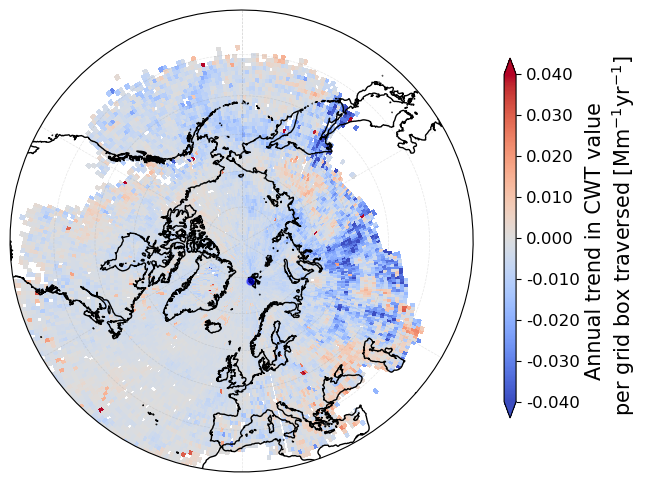

In [26]:
array_trend = HYplot.turn_grid_df_to_array(df_hits_trends, var='slope', threshold=None)

fig = HYplot.circular_plots_array(array_trend, vmin=-0.04, vmax=0.04, cmap='coolwarm', 
               orientation='vertical', colourbar_label="Annual trend in CWT value \n per grid box traversed [Mm$^{-1}$yr$^{-1}$]", 
               colourbar_labelsize=15, colourbar_tick_fontsize=12, decimal_places_colourbar=3,
               scientific_notation=False, axes_projection='North_Stereo', array_projection='rotated_pole', title='',
               extend='both')

mean: -0.004264310790921996
median: -0.00334357650390015
mean after threshold applied: -0.004264310790921996
median after threshold applied: -0.00334357650390015
(90, 360)


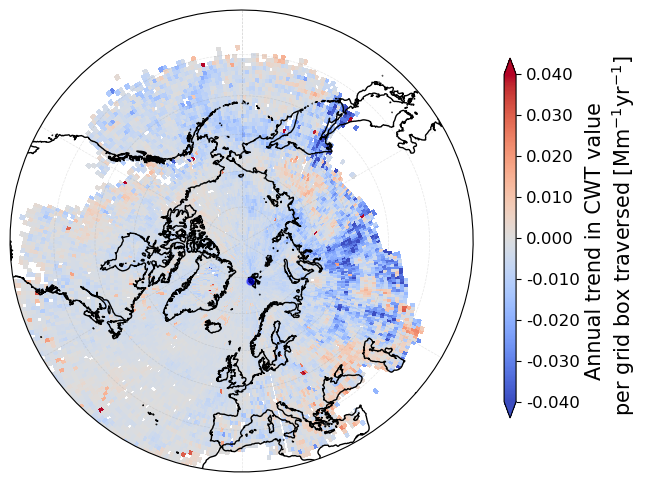

In [27]:
array_trend = HYplot.turn_grid_df_to_array(df_merged, var='slope', threshold=None)

fig = HYplot.circular_plots_array(array_trend, vmin=-0.04, vmax=0.04, cmap='coolwarm', 
               orientation='vertical', colourbar_label="Annual trend in CWT value \n per grid box traversed [Mm$^{-1}$yr$^{-1}$]", 
               colourbar_labelsize=15, colourbar_tick_fontsize=12, decimal_places_colourbar=3,
               scientific_notation=False, axes_projection='North_Stereo', array_projection='rotated_pole', title='',
               extend='both')

In [28]:
df_hits_trends_ = df_hits_trends.copy()

In [29]:
def get_ss(df_hits_trends, sig=95):
    df_hits_trends_ = df_hits_trends.copy()
    df_hits_trends_.loc[df_hits_trends_['ss'] != sig, 'slope'] = np.nan
    df_ss = df_hits_trends_.copy() 
    return df_ss

In [30]:
print(len(df_merged.loc[df_merged['ss'] != 90, 'slope']))

16560


In [31]:
df_ss = get_ss(df_merged, sig=90)

In [32]:
def get_nonss(df_hits_trends):
    df_hits_trends_ = df_hits_trends.copy()
    df_hits_trends_['slope'] = np.nan
    df_hits_trends_.loc[(df_hits_trends_['ss'] != 95) & (pd.isnull(df_hits_trends['slope'])), 'slope'] = 1
    df_nonss = df_hits_trends_.copy() 
    len(df_nonss[df_nonss['slope'] == 1])
    return df_nonss

In [33]:
df_nonss = get_nonss(df_hits_trends)

In [34]:
array_ss = HYplot.turn_grid_df_to_array(df_ss, var='slope', threshold=None)

mean: -0.0045011629943388165
median: -0.00354645790839805
mean after threshold applied: -0.0045011629943388165
median after threshold applied: -0.00354645790839805
(90, 360)


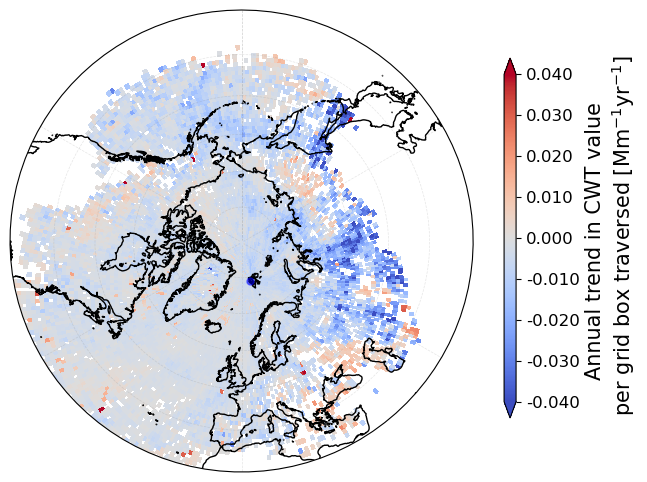

In [35]:
fig = HYplot.circular_plots_array(array_ss, vmin=-0.04, vmax=0.04, cmap='coolwarm', 
               orientation='vertical', colourbar_label="Annual trend in CWT value \n per grid box traversed [Mm$^{-1}$yr$^{-1}$]", 
               colourbar_labelsize=15, colourbar_tick_fontsize=12, decimal_places_colourbar=3,
               scientific_notation=False, axes_projection='North_Stereo', array_projection='rotated_pole', title='',
               extend='both')

In [36]:
array_nonss = HYplot.turn_grid_df_to_array(df_nonss, var='slope', threshold=None)

mean: 1.0
median: 1.0
mean after threshold applied: 1.0
median after threshold applied: 1.0
(90, 360)


In [37]:
def circular_plots_array(array, noss_array, vmax, cmap, orientation, colourbar_label, colourbar_labelsize=20, colourbar_tick_fontsize=12, 
                   scientific_notation=True, decimal_places_colourbar=0, axes_projection='North_Stereo', 
                   array_projection='rotated_pole', title=None, ZEP_lat=78.906,ZEP_lon=11.888, test_data=None,
                   figsize_x=6,fig_size_y=6, vmin=0, extend='max', central_longitude=0,
                   lat_min=30, df_cluster=None, df_ss=None): 
    
    dict_projections = HYplot.create_projections_dict(ZEP_lat=78.906,ZEP_lon=11.888, central_longitude=central_longitude)                   
    projection = dict_projections[axes_projection] 
    array_projection = dict_projections[array_projection] 
    geo = dict_projections['geo']    
    
    fig, ax = HYplot.sp_map(1, projection=projection, figsize=(figsize_x,fig_size_y))

    lat_lims = [lat_min,90]
    HYplot.polarCentral_set_latlim(lat_lims, ax)                
    lons = np.arange(-178.5, 181.5, 1) #lons = np.arange(-180.5, 179.5, 1)    
    lats = np.arange(1.5, 91.5, 1) #lats = np.arange(-0.5, 89.5, 1) 
        
    empty_array = HYplot.make_array(1)
    cs = ax.pcolormesh(lons, lats, empty_array, hatch='/', alpha=0., transform=array_projection,
                      edgecolor='black')
    cs = ax.pcolormesh(lons, lats, array, transform=array_projection, color='k', alpha=.1)

    cs_ = ax.pcolormesh(lons, lats, noss_array, shading='auto', transform=array_projection, 
                       vmin=0, vmax=1, cmap='gray') 
    
    cs = ax.pcolormesh(lons, lats, array, shading='auto', transform=array_projection, 
                       vmin=vmin, vmax=vmax, cmap=cmap) 

    ax.plot([ZEP_lon], [ZEP_lat], 'bo', ms=5, alpha=0.5, transform=geo) 
    
    if test_data is not None:
        latitudes = list(test_data['latitude'].values)
        longitudes = list(test_data['longitude'].values)
        ax.plot(longitudes, latitudes, 'bo', ms=5, alpha=0.2, transform=geo) 
    
    if orientation =='horizontal':
        cax = fig.add_axes([0.15, .08, 0.72, 0.03]) # position of colorbar [left, bottom, width, height]
    if orientation =='vertical':
        cax = fig.add_axes([0.95, .2, 0.02, 0.6]) # position of colorbar [left, bottom, width, height]
    
    if scientific_notation == True:
        fmt = ticker.ScalarFormatter(useMathText=True)
        fmt.set_powerlimits((0, 0))
        cbar = fig.colorbar(cs, extend=extend, orientation='vertical', cax=cax, format=fmt) #, **kwargs)
        cbar.set_label(colourbar_label, size=colourbar_labelsize)
        cbar.ax.tick_params(labelsize=colourbar_tick_fontsize)
        cbar.ax.yaxis.set_offset_position('left')  
        #cbar.ax.yaxis.get_offset_text().set_position((2,2))            
        cbar.update_ticks()

    else:
        kwargs = {'format': '%.'+str(decimal_places_colourbar)+'f'}
        cbar = fig.colorbar(cs, extend=extend, orientation='vertical', cax=cax, **kwargs)        
        cbar.set_label(colourbar_label, size=colourbar_labelsize)
        cbar.ax.tick_params(labelsize=colourbar_tick_fontsize)
    
    ax.set_title(str(title), loc='left', size=15)  
    HYplot.add_map_features(ax) 

    if df_cluster is not None:
        for i in range(len(df_cluster)):           
            lon_traj = df_cluster['lon'].values
            lat_traj = df_cluster['lat'].values            
            ax.scatter(lon_traj, lat_traj, marker="o", 
                       color='k', transform=array_projection,
                       s=6, alpha=0.5)

    plt.show()
    return fig

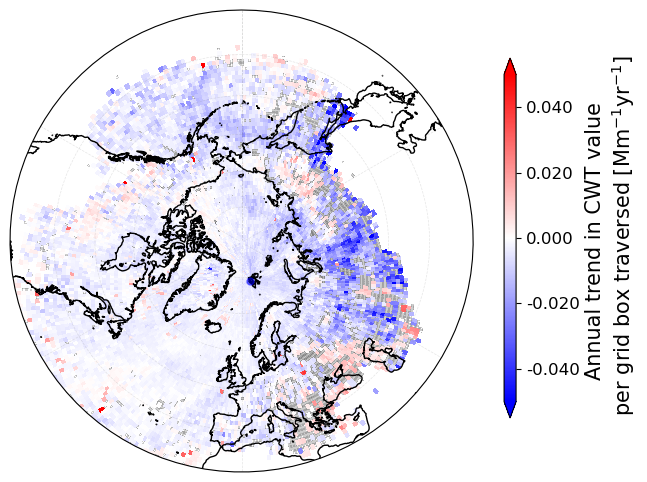

['C:\\Users\\DominicHeslinRees\\Documents\\ACP_2023\\plots']
make folder
saved as: C:\Users\DominicHeslinRees\Documents\ACP_2023\plots\\Figure3.png


In [38]:
fig = circular_plots_array(array=array_ss, noss_array=array_nonss, vmin=-0.05, vmax=0.05, cmap='bwr', 
               orientation='vertical', colourbar_label="Annual trend in CWT value \n per grid box traversed [Mm$^{-1}$yr$^{-1}$]", 
               colourbar_labelsize=15, colourbar_tick_fontsize=12, decimal_places_colourbar=3,
               scientific_notation=False, axes_projection='North_Stereo', array_projection='rotated_pole', title='',
               extend='both')
HYplot.save_plot(fig, savepath_plot, name='Figure3', formate='.png', dpi=300)